<a href="https://colab.research.google.com/github/Jindapornphopomee/BSC_DPDM23/blob/main/MIDTERM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

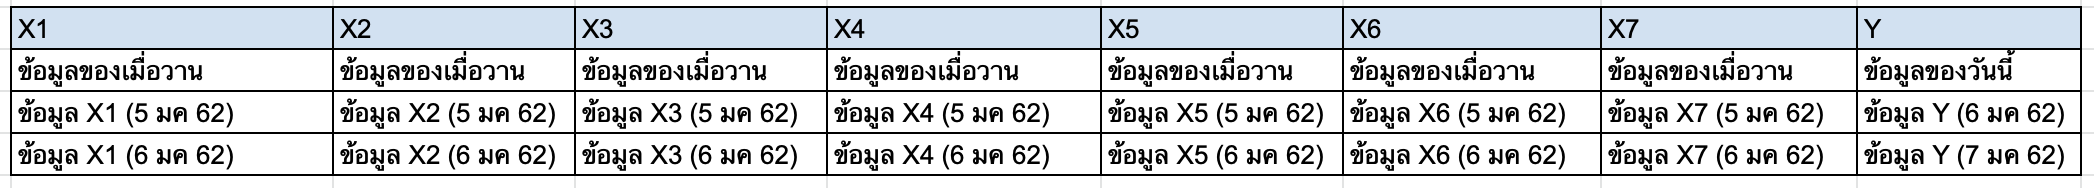

In [1]:
import pandas as pd

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# **Data Preprocessing**

## ความกดอากาศ (air pressure)

## ขอนแก่น

In [3]:
air_KK = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx')

In [4]:
air_KK

ความกด(เปอร์เซ็นต์)                Unnamed: 1           Unnamed: 2  \
0              รายวัน                        NaN                  NaN   
1                  NaN                       NaN                  NaN   
2                  ที่                     สถานี             เดือน/ปี   
3                  NaN                       NaN                  NaN   
4                  1    352201-หนองคาย จ.หนองคาย  2011-10-01 00:00:00   
5                  2    352201-หนองคาย จ.หนองคาย  2011-11-01 00:00:00   
6                  3    352201-หนองคาย จ.หนองคาย  2011-12-01 00:00:00   
7                  1    352201-หนองคาย จ.หนองคาย  2012-01-01 00:00:00   
8                  2    352201-หนองคาย จ.หนองคาย  2012-02-01 00:00:00   
9                  3    352201-หนองคาย จ.หนองคาย  2012-10-01 00:00:00   
10                 4    352201-หนองคาย จ.หนองคาย  2012-11-01 00:00:00   
11                 5    352201-หนองคาย จ.หนองคาย  2012-12-01 00:00:00   
12                 6    352201-หนองคาย จ.หนองคาย  2013-01-01 00:00:00   
13                 7    352201-หนองคาย จ.หนองคาย  2013-02-01 00:00:00   
14                 8    352201-หนองคาย จ.หนองคาย  2013-10-01 00:00:00   
15                 9    352201-หนองคาย จ.หนองคาย  2013-11-01 00:00:00   
16                10    352201-หนองคาย จ.หนองคาย  2013-12-01 00:00:00   
17                11    352201-หนองคาย จ.หนองคาย  2014-01-01 00:00:00   
18                12    352201-หนองคาย จ.หนองคาย  2014-02-01 00:00:00   
19                13    352201-หนองคาย จ.หนองคาย  2014-10-01 00:00:00   
20                14    352201-หนองคาย จ.หนองคาย  2014-11-01 00:00:00   
21                15    352201-หนองคาย จ.หนองคาย  2014-12-01 00:00:00   
22                16    352201-หนองคาย จ.หนองคาย  2015-01-01 00:00:00   
23                17    352201-หนองคาย จ.หนองคาย  2015-02-01 00:00:00   
24                18    352201-หนองคาย จ.หนองคาย  2015-10-01 00:00:00   
25                19    352201-หนองคาย จ.หนองคาย  2015-11-01 00:00:00   
26                20    352201-หนองคาย จ.หนองคาย  2015-12-01 00:00:00   
27                21    352201-หนองคาย จ.หนองคาย  2016-01-01 00:00:00   
28                22    352201-หนองคาย จ.หนองคาย  2016-02-01 00:00:00   
29                23    352201-หนองคาย จ.หนองคาย  2016-10-01 00:00:00   
30                24    352201-หนองคาย จ.หนองคาย  2016-11-01 00:00:00   
31                25    352201-หนองคาย จ.หนองคาย  2016-12-01 00:00:00   
32                26    352201-หนองคาย จ.หนองคาย  2017-01-01 00:00:00   
33                27    352201-หนองคาย จ.หนองคาย  2017-02-01 00:00:00   
34                28    352201-หนองคาย จ.หนองคาย  2017-10-01 00:00:00   
35                29    352201-หนองคาย จ.หนองคาย  2017-11-01 00:00:00   
36                30    352201-หนองคาย จ.หนองคาย  2017-12-01 00:00:00   
37                31    352201-หนองคาย จ.หนองคาย  2018-01-01 00:00:00   
38                32    352201-หนองคาย จ.หนองคาย  2018-02-01 00:00:00   
39                33    352201-หนองคาย จ.หนองคาย  2018-10-01 00:00:00   
40                34    352201-หนองคาย จ.หนองคาย  2018-11-01 00:00:00   
41                35    352201-หนองคาย จ.หนองคาย  2018-12-01 00:00:00   
42                36    352201-หนองคาย จ.หนองคาย  2019-01-01 00:00:00   
43                37    352201-หนองคาย จ.หนองคาย  2019-02-01 00:00:00   
44                38    352201-หนองคาย จ.หนองคาย  2019-10-01 00:00:00   
45                39    352201-หนองคาย จ.หนองคาย  2019-11-01 00:00:00   
46                40    352201-หนองคาย จ.หนองคาย  2019-12-01 00:00:00   
47                41    352201-หนองคาย จ.หนองคาย  2020-01-01 00:00:00   
48                42    352201-หนองคาย จ.หนองคาย  2020-02-01 00:00:00   
49                43    352201-หนองคาย จ.หนองคาย  2020-10-01 00:00:00   
50                44    352201-หนองคาย จ.หนองคาย  2020-11-01 00:00:00   
51                45    352201-หนองคาย จ.หนองคาย  2020-12-01 00:00:00   
52                46    352201-หนองคาย จ.หนองคาย  2021-01-01 00:00:00   
53                47    352201-หนองคาย จ.หนองคาย  2021-02-01 

### ทำการตัดแถวที่ไม่ใช้ออก

In [5]:
air_KK.index

RangeIndex(start=0, stop=59, step=1)

In [6]:
air_KK.columns

Index(['ความกด(เปอร์เซ็นต์)', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34'],
      dtype='object')

In [7]:
air_KK.drop(0, inplace=True)
air_KK.drop(1, inplace=True)
air_KK.drop(2, inplace=True)
air_KK.drop(3, inplace=True)

In [8]:
air_KK.head()

ความกด(เปอร์เซ็นต์)                Unnamed: 1           Unnamed: 2  \
4                 1    352201-หนองคาย จ.หนองคาย  2011-10-01 00:00:00   
5                 2    352201-หนองคาย จ.หนองคาย  2011-11-01 00:00:00   
6                 3    352201-หนองคาย จ.หนองคาย  2011-12-01 00:00:00   
7                 1    352201-หนองคาย จ.หนองคาย  2012-01-01 00:00:00   
8                 2    352201-หนองคาย จ.หนองคาย  2012-02-01 00:00:00   

  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
4    1005.47     1006.65     1007.49     1008.28     1009.88     1011.36   
5    1011.79     1010.83     1010.74     1010.71     1010.09     1009.24   
6    1011.43     1012.57     1012.28     1012.97     1013.09     1012.03   
7    1015.67     1014.11     1012.91     1014.06     1015.51     1015.88   
8    1013.26     1012.92     1013.61     1013.18     1011.26     1008.80   

   Unnamed: 9  ...  Unnamed: 25  Unnamed: 26  Unnamed: 27  Unnamed: 28  \
4     1011.17  ...      1010.76      1010.23      1011.34      1011.84   
5     1008.03  ...      1014.07      1015.40      1013.95      1012.35   
6     1012.05  ...      1012.88      1015.78      1018.56      1018.65   
7     1017.72  ...      1010.91      1011.27      1011.65      1012.56   
8     1008.16  ...      1005.75      1005.46      1004.80      1005.08   

   Unnamed: 29  Unnamed: 30  Unnamed: 31  Unnamed: 32  Unnamed: 33  \
4      1011.89      1012.29      1011.67       1011.3      1011.52   
5      1011.31      1009.59      1010.13      1010.47            -   
6      1016.88      1016.05      1014.98      1015.53       1016.4   
7      1010.76      1010.26      1010.69      1012.34      1014.52   
8      1006.57      1005.96      1006.53      1010.47            -   

   Unnamed: 34  
4  1010.350645  
5     1011.717  
6      1016.47  
7  1012.484516  
8  1009.749667  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [9]:
air_KK.rename(columns={'Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 3':'1', 'Unnamed: 4':'2',
       'Unnamed: 5':'3', 'Unnamed: 6':'4', 'Unnamed: 7':'5', 'Unnamed: 8':'6', 'Unnamed: 9':'7',
       'Unnamed: 10':'8', 'Unnamed: 11':'9', 'Unnamed: 12':'10', 'Unnamed: 13':'11',
       'Unnamed: 14':'12', 'Unnamed: 15':'13', 'Unnamed: 16':'14', 'Unnamed: 17':'15',
       'Unnamed: 18':'16', 'Unnamed: 19':'17', 'Unnamed: 20':'18', 'Unnamed: 21':'19',
       'Unnamed: 22':'20', 'Unnamed: 23':'21', 'Unnamed: 24':'22', 'Unnamed: 25':'23',
       'Unnamed: 26':'24', 'Unnamed: 27':'25', 'Unnamed: 28':'26', 'Unnamed: 29':'27',
       'Unnamed: 30':'28', 'Unnamed: 31':'29', 'Unnamed: 32':'30', 'Unnamed: 33':'31','Unnamed: 34':'เฉลี่ย'}, inplace=True)

In [10]:
air_KK.rename(columns={'ความกด(เปอร์เซ็นต์)':'ที่'}, inplace=True)

In [11]:
air_KK.head()

ที่                     สถานี             เดือน/ปี        1        2  \
4  1    352201-หนองคาย จ.หนองคาย  2011-10-01 00:00:00  1005.47  1006.65   
5  2    352201-หนองคาย จ.หนองคาย  2011-11-01 00:00:00  1011.79  1010.83   
6  3    352201-หนองคาย จ.หนองคาย  2011-12-01 00:00:00  1011.43  1012.57   
7  1    352201-หนองคาย จ.หนองคาย  2012-01-01 00:00:00  1015.67  1014.11   
8  2    352201-หนองคาย จ.หนองคาย  2012-02-01 00:00:00  1013.26  1012.92   

         3        4        5        6        7  ...       23       24  \
4  1007.49  1008.28  1009.88  1011.36  1011.17  ...  1010.76  1010.23   
5  1010.74  1010.71  1010.09  1009.24  1008.03  ...  1014.07  1015.40   
6  1012.28  1012.97  1013.09  1012.03  1012.05  ...  1012.88  1015.78   
7  1012.91  1014.06  1015.51  1015.88  1017.72  ...  1010.91  1011.27   
8  1013.61  1013.18  1011.26  1008.80  1008.16  ...  1005.75  1005.46   

        25       26       27       28       29       30       31       เฉลี่ย  
4  1011.34  1011.84  1011.89  1012.29  1011.67   1011.3  1011.52  1010.350645  
5  1013.95  1012.35  1011.31  1009.59  1010.13  1010.47        -     1011.717  
6  1018.56  1018.65  1016.88  1016.05  1014.98  1015.53   1016.4      1016.47  
7  1011.65  1012.56  1010.76  1010.26  1010.69  1012.34  1014.52  1012.484516  
8  1004.80  1005.08  1006.57  1005.96  1006.53  1010.47        -  1009.749667  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [12]:
air_KK.shape

(55, 35)

In [13]:
air_KK .isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### จะพบว่าไม่มีค่า Missing เลย เพราะข้อมูลไม่ได้ถูกปล่อยให้ว่างไว้ แต่ค่าที่ไม่มีข้อมูลจะทำการใส่ "-" แทน โดย Column ที่ไม่มีข้อมูลนั้นจะเป็นข้อมูลระหว่างวันที่ 29-31 เนื่องจากในแต่ละเดือนมีจำนวนวันที่ไม่เท่ากัน จึงไม่มีข้อมูล

### ดังนั้น จึงต้องทำการนำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [14]:
import numpy as np

In [15]:
air_Nan_KK = air_KK.replace('-',np.NaN)

### ตรวจหา Missing อีกครั้ง

In [16]:
air_Nan_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### ทำการแก้ Missing โดยการแทนที่ด้วยค่าเฉลี่ย

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [17]:
for i in range(len(air_Nan_KK['ที่'])):air_Nan_KK.iloc[i,:]=air_Nan_KK.iloc[i,:].fillna(air_Nan_KK.iloc[i]['เฉลี่ย'])

In [18]:
air_Nan_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## นครพนม

In [19]:
air_NKP = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx')

In [20]:
air_NKP.head()

ความกด(เปอร์เซ็นต์)                Unnamed: 1           Unnamed: 2  \
0             รายวัน                        NaN                  NaN   
1                 NaN                       NaN                  NaN   
2                 ที่                     สถานี             เดือน/ปี   
3                 NaN                       NaN                  NaN   
4                 1    352201-หนองคาย จ.หนองคาย  2011-10-01 00:00:00   

  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0   จ.นครพนม         NaN         NaN         NaN         NaN         NaN   
1        NaN         NaN         NaN         NaN         NaN         NaN   
2     วันที่         NaN         NaN         NaN         NaN         NaN   
3          1        2.00        3.00        4.00        5.00        6.00   
4     1006.3     1007.38     1008.07     1008.44     1010.51     1011.65   

   Unnamed: 9  ...  Unnamed: 25  Unnamed: 26  Unnamed: 27  Unnamed: 28  \
0         NaN  ...          NaN          NaN          NaN          NaN   
1         NaN  ...          NaN          NaN          NaN          NaN   
2         NaN  ...          NaN          NaN          NaN          NaN   
3        7.00  ...        23.00        24.00        25.00        26.00   
4     1011.24  ...      1011.09      1010.64      1012.01      1012.47   

   Unnamed: 29  Unnamed: 30  Unnamed: 31  Unnamed: 32  Unnamed: 33  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3        27.00        28.00           29           30           31   
4      1012.46      1012.85      1012.43      1011.69      1012.28   

   Unnamed: 34  
0          NaN  
1          NaN  
2       เฉลี่ย  
3          NaN  
4  1010.754839  

[5 rows x 35 columns]

### ทำการตัดแถวที่ไม่ใช้ออก

In [21]:
air_NKP.index

RangeIndex(start=0, stop=59, step=1)

In [22]:
air_NKP.drop(0, inplace=True)
air_NKP.drop(1, inplace=True)
air_NKP.drop(2, inplace=True)
air_NKP.drop(3, inplace=True)

In [23]:
air_NKP.head()

ความกด(เปอร์เซ็นต์)                Unnamed: 1           Unnamed: 2  \
4                 1    352201-หนองคาย จ.หนองคาย  2011-10-01 00:00:00   
5                 2    352201-หนองคาย จ.หนองคาย  2011-11-01 00:00:00   
6                 3    352201-หนองคาย จ.หนองคาย  2011-12-01 00:00:00   
7                 1    352201-หนองคาย จ.หนองคาย  2012-01-01 00:00:00   
8                 2    352201-หนองคาย จ.หนองคาย  2012-02-01 00:00:00   

  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
4     1006.3     1007.38     1008.07     1008.44     1010.51     1011.65   
5    1012.28     1011.23     1011.08     1010.96     1010.57     1009.20   
6    1012.15     1013.75     1013.24     1013.94     1013.35     1012.62   
7    1016.56     1014.88     1013.41     1015.85     1016.94     1017.13   
8    1013.98     1013.75     1014.96     1013.52     1011.85     1008.82   

   Unnamed: 9  ...  Unnamed: 25  Unnamed: 26  Unnamed: 27  Unnamed: 28  \
4     1011.24  ...      1011.09      1010.64      1012.01      1012.47   
5     1007.99  ...      1015.49      1016.09      1014.62      1012.80   
6     1012.48  ...      1014.23      1017.58      1019.77      1019.71   
7     1019.21  ...      1013.13      1012.45      1013.59      1013.15   
8     1008.15  ...      1005.76      1005.13      1004.94      1006.42   

   Unnamed: 29  Unnamed: 30  Unnamed: 31  Unnamed: 32  Unnamed: 33  \
4      1012.46      1012.85      1012.43      1011.69      1012.28   
5      1011.83      1010.00       1010.6      1011.13            -   
6      1017.34      1017.01      1015.64      1016.89      1017.73   
7      1011.56      1010.71      1011.95      1013.77       1015.5   
8      1008.93      1007.88      1007.29      1011.13            -   

   Unnamed: 34  
4  1010.754839  
5  1012.184667  
6      1016.47  
7      1013.51  
8     1010.608  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [24]:
air_NKP.rename(columns={'ความกด(เปอร์เซ็นต์)':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 3':'1', 'Unnamed: 4':'2',
       'Unnamed: 5':'3', 'Unnamed: 6':'4', 'Unnamed: 7':'5', 'Unnamed: 8':'6', 'Unnamed: 9':'7',
       'Unnamed: 10':'8', 'Unnamed: 11':'9', 'Unnamed: 12':'10', 'Unnamed: 13':'11',
       'Unnamed: 14':'12', 'Unnamed: 15':'13', 'Unnamed: 16':'14', 'Unnamed: 17':'15',
       'Unnamed: 18':'16', 'Unnamed: 19':'17', 'Unnamed: 20':'18', 'Unnamed: 21':'19',
       'Unnamed: 22':'20', 'Unnamed: 23':'21', 'Unnamed: 24':'22', 'Unnamed: 25':'23',
       'Unnamed: 26':'24', 'Unnamed: 27':'25', 'Unnamed: 28':'26', 'Unnamed: 29':'27',
       'Unnamed: 30':'28', 'Unnamed: 31':'29', 'Unnamed: 32':'30', 'Unnamed: 33':'31','Unnamed: 34':'เฉลี่ย'}, inplace=True)

In [25]:
air_NKP.head()

ที่                     สถานี             เดือน/ปี        1        2  \
4  1    352201-หนองคาย จ.หนองคาย  2011-10-01 00:00:00   1006.3  1007.38   
5  2    352201-หนองคาย จ.หนองคาย  2011-11-01 00:00:00  1012.28  1011.23   
6  3    352201-หนองคาย จ.หนองคาย  2011-12-01 00:00:00  1012.15  1013.75   
7  1    352201-หนองคาย จ.หนองคาย  2012-01-01 00:00:00  1016.56  1014.88   
8  2    352201-หนองคาย จ.หนองคาย  2012-02-01 00:00:00  1013.98  1013.75   

         3        4        5        6        7  ...       23       24  \
4  1008.07  1008.44  1010.51  1011.65  1011.24  ...  1011.09  1010.64   
5  1011.08  1010.96  1010.57  1009.20  1007.99  ...  1015.49  1016.09   
6  1013.24  1013.94  1013.35  1012.62  1012.48  ...  1014.23  1017.58   
7  1013.41  1015.85  1016.94  1017.13  1019.21  ...  1013.13  1012.45   
8  1014.96  1013.52  1011.85  1008.82  1008.15  ...  1005.76  1005.13   

        25       26       27       28       29       30       31       เฉลี่ย  
4  1012.01  1012.47  1012.46  1012.85  1012.43  1011.69  1012.28  1010.754839  
5  1014.62  1012.80  1011.83  1010.00   1010.6  1011.13        -  1012.184667  
6  1019.77  1019.71  1017.34  1017.01  1015.64  1016.89  1017.73      1016.47  
7  1013.59  1013.15  1011.56  1010.71  1011.95  1013.77   1015.5      1013.51  
8  1004.94  1006.42  1008.93  1007.88  1007.29  1011.13        -     1010.608  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [26]:
air_NKP.shape

(55, 35)

In [27]:
air_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [28]:
air_Nan_NKP = air_NKP.replace('-',np.NaN)

### ตรวจหา Missing อีกครั้ง

In [29]:
air_Nan_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [30]:
for i in range(len(air_Nan_NKP['ที่'])):air_Nan_NKP.iloc[i,:]=air_Nan_NKP.iloc[i,:].fillna(air_Nan_NKP.iloc[i]['เฉลี่ย'])


In [31]:
air_Nan_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## สกลนคร

### ทำการเอาแถวที่ไม่ได้ใช้ออกแต่แรกเพื่อลดขั้นตอน

In [32]:
air_SKN = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)

In [33]:
air_SKN.head()

Unnamed: 0                Unnamed: 1 Unnamed: 2        1        2        3  \
0        1    352201-หนองคาย จ.หนองคาย 2011-10-01  1005.84  1007.16  1007.87   
1        2    352201-หนองคาย จ.หนองคาย 2011-11-01  1012.41  1011.47  1011.22   
2        3    352201-หนองคาย จ.หนองคาย 2011-12-01  1012.16  1013.74  1013.44   
3        1    352201-หนองคาย จ.หนองคาย 2012-01-01  1016.61  1014.92  1013.86   
4        2    352201-หนองคาย จ.หนองคาย 2012-02-01  1014.05  1013.71  1014.95   

         4        5        6        7  ...       23       24       25  \
0  1008.56  1010.55  1011.83  1011.24  ...  1011.24  1010.80  1012.02   
1  1011.16  1010.51  1009.26  1008.20  ...  1015.21  1016.11  1014.65   
2  1014.00  1013.28  1012.69  1012.57  ...  1014.22  1017.34  1019.63   
3  1015.71  1016.87  1017.17  1018.83  ...  1012.80  1012.37  1013.47   
4  1013.68  1011.72  1008.93  1008.08  ...  1005.73  1005.04  1004.96   

        26       27       28       29       30       31  Unnamed: 34  
0  1012.36  1012.42  1012.97  1012.52  1011.87  1012.21  1010.772258  
1  1012.96  1011.91  1010.10  1010.78  1011.06        -  1012.255000  
2  1019.96  1017.56  1017.02   1015.8  1016.96  1017.63  1016.470000  
3  1013.39  1011.36  1010.64  1011.95  1013.86  1015.52  1013.485484  
4  1005.94  1008.70  1007.38  1007.25  1011.06        -  1010.554000  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [34]:
air_SKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)

In [35]:
air_SKN.head()

ที่                     สถานี   เดือน/ปี        1        2        3  \
0  1    352201-หนองคาย จ.หนองคาย 2011-10-01  1005.84  1007.16  1007.87   
1  2    352201-หนองคาย จ.หนองคาย 2011-11-01  1012.41  1011.47  1011.22   
2  3    352201-หนองคาย จ.หนองคาย 2011-12-01  1012.16  1013.74  1013.44   
3  1    352201-หนองคาย จ.หนองคาย 2012-01-01  1016.61  1014.92  1013.86   
4  2    352201-หนองคาย จ.หนองคาย 2012-02-01  1014.05  1013.71  1014.95   

         4        5        6        7  ...       23       24       25  \
0  1008.56  1010.55  1011.83  1011.24  ...  1011.24  1010.80  1012.02   
1  1011.16  1010.51  1009.26  1008.20  ...  1015.21  1016.11  1014.65   
2  1014.00  1013.28  1012.69  1012.57  ...  1014.22  1017.34  1019.63   
3  1015.71  1016.87  1017.17  1018.83  ...  1012.80  1012.37  1013.47   
4  1013.68  1011.72  1008.93  1008.08  ...  1005.73  1005.04  1004.96   

        26       27       28       29       30       31       เฉลี่ย  
0  1012.36  1012.42  1012.97  1012.52  1011.87  1012.21  1010.772258  
1  1012.96  1011.91  1010.10  1010.78  1011.06        -  1012.255000  
2  1019.96  1017.56  1017.02   1015.8  1016.96  1017.63  1016.470000  
3  1013.39  1011.36  1010.64  1011.95  1013.86  1015.52  1013.485484  
4  1005.94  1008.70  1007.38  1007.25  1011.06        -  1010.554000  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [36]:
air_SKN.shape

(55, 35)

In [37]:
air_SKN.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [38]:
air_Nan_SKN = air_SKN.replace('-',np.NaN)

### ตรวจหา Missing อีกครั้ง

In [39]:
air_Nan_SKN.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [40]:
for i in range(len(air_Nan_SKN['ที่'])):air_Nan_SKN.iloc[i,:]=air_Nan_SKN.iloc[i,:].fillna(air_Nan_SKN.iloc[i]['เฉลี่ย'])

In [41]:
air_Nan_SKN.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## หนองคาย

In [42]:
air_NK = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)

In [43]:
air_NK.head()

Unnamed: 0                Unnamed: 1 Unnamed: 2        1        2        3  \
0        1    352201-หนองคาย จ.หนองคาย 2011-10-01  1005.34  1006.67  1007.39   
1        2    352201-หนองคาย จ.หนองคาย 2011-11-01  1012.05  1011.35  1011.28   
2        3    352201-หนองคาย จ.หนองคาย 2011-12-01  1012.16  1013.26  1012.40   
3        1    352201-หนองคาย จ.หนองคาย 2012-01-01  1016.26  1014.60  1012.83   
4        2    352201-หนองคาย จ.หนองคาย 2012-02-01  1013.64  1013.36  1014.86   

         4        5        6        7  ...       23       24       25  \
0  1008.11  1009.69  1011.55  1011.28  ...  1011.01  1010.71  1011.67   
1  1011.27  1010.62  1009.58  1008.55  ...  1015.27  1016.46  1014.65   
2  1013.57  1013.68  1012.72  1012.44  ...  1013.94  1016.92  1019.05   
3  1014.85  1016.69  1016.56  1018.50  ...  1011.56  1011.98  1012.20   
4  1013.93  1011.87  1008.77  1008.42  ...  1005.89  1005.54  1005.28   

        26       27       28       29       30       31  Unnamed: 34  
0  1012.36  1012.50  1012.81  1011.88  1011.77  1012.18  1010.580645  
1  1013.08  1011.62  1010.21  1010.71   1011.1        -  1012.332333  
2  1019.88  1017.86  1016.76  1015.63  1016.31  1017.19  1015.468065  
3  1012.95  1011.23  1010.63  1010.96  1013.16  1015.38  1013.062903  
4  1005.32  1007.59  1006.66  1007.07   1011.1        -  1010.214667  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [44]:
air_NK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)

In [45]:
air_NK.head()

ที่                     สถานี   เดือน/ปี        1        2        3  \
0  1    352201-หนองคาย จ.หนองคาย 2011-10-01  1005.34  1006.67  1007.39   
1  2    352201-หนองคาย จ.หนองคาย 2011-11-01  1012.05  1011.35  1011.28   
2  3    352201-หนองคาย จ.หนองคาย 2011-12-01  1012.16  1013.26  1012.40   
3  1    352201-หนองคาย จ.หนองคาย 2012-01-01  1016.26  1014.60  1012.83   
4  2    352201-หนองคาย จ.หนองคาย 2012-02-01  1013.64  1013.36  1014.86   

         4        5        6        7  ...       23       24       25  \
0  1008.11  1009.69  1011.55  1011.28  ...  1011.01  1010.71  1011.67   
1  1011.27  1010.62  1009.58  1008.55  ...  1015.27  1016.46  1014.65   
2  1013.57  1013.68  1012.72  1012.44  ...  1013.94  1016.92  1019.05   
3  1014.85  1016.69  1016.56  1018.50  ...  1011.56  1011.98  1012.20   
4  1013.93  1011.87  1008.77  1008.42  ...  1005.89  1005.54  1005.28   

        26       27       28       29       30       31       เฉลี่ย  
0  1012.36  1012.50  1012.81  1011.88  1011.77  1012.18  1010.580645  
1  1013.08  1011.62  1010.21  1010.71   1011.1        -  1012.332333  
2  1019.88  1017.86  1016.76  1015.63  1016.31  1017.19  1015.468065  
3  1012.95  1011.23  1010.63  1010.96  1013.16  1015.38  1013.062903  
4  1005.32  1007.59  1006.66  1007.07   1011.1        -  1010.214667  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [46]:
air_NK.shape

(55, 35)

In [47]:
air_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [48]:
air_Nan_NK = air_NK.replace('-',np.NaN)

### ตรวจหา Missing อีกครั้ง

In [49]:
air_Nan_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [50]:
for i in range(len(air_Nan_NK['ที่'])):air_Nan_NK.iloc[i,:]=air_Nan_NK.iloc[i,:].fillna(air_Nan_NK.iloc[i]['เฉลี่ย'])

In [51]:
air_Nan_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## เลย

In [52]:
air_L = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)

In [53]:
air_L.head()

Unnamed: 0                Unnamed: 1 Unnamed: 2        1        2        3  \
0        1    352201-หนองคาย จ.หนองคาย 2011-10-01  1005.12  1006.51  1007.81   
1        2    352201-หนองคาย จ.หนองคาย 2011-11-01  1012.09  1011.32  1010.99   
2        3    352201-หนองคาย จ.หนองคาย 2011-12-01  1010.43  1011.81  1012.45   
3        1    352201-หนองคาย จ.หนองคาย 2012-01-01  1015.42  1014.07  1012.35   
4        2    352201-หนองคาย จ.หนองคาย 2012-02-01  1013.19  1012.82  1013.94   

         4        5        6        7  ...       23       24       25  \
0  1008.15  1009.21  1011.28  1011.22  ...  1010.79  1010.25  1011.52   
1  1011.47  1010.88  1009.62  1008.28  ...  1014.79  1015.74  1014.36   
2  1012.03  1013.29  1013.21  1012.81  ...  1013.75  1013.11  1015.95   
3  1013.49  1014.99  1015.70  1017.24  ...  1010.10  1010.76  1011.11   
4  1013.18  1010.99  1008.58  1008.19  ...  1005.78  1005.48  1004.96   

        26       27       28       29       30       31  Unnamed: 34  
0  1012.04  1012.00  1012.74  1011.69  1011.27  1011.71  1010.343871  
1  1013.30  1011.92  1009.86   1010.1  1010.43        -  1012.078333  
2  1018.79  1019.39  1017.88  1016.49  1014.97  1015.62  1016.470000  
3  1011.72  1010.91  1010.31  1010.16  1012.61   1014.4  1012.367419  
4  1005.05  1006.27  1005.59  1006.52  1010.43        -  1009.516667  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [54]:
air_L.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)

In [55]:
air_L.head()

ที่                     สถานี   เดือน/ปี        1        2        3  \
0  1    352201-หนองคาย จ.หนองคาย 2011-10-01  1005.12  1006.51  1007.81   
1  2    352201-หนองคาย จ.หนองคาย 2011-11-01  1012.09  1011.32  1010.99   
2  3    352201-หนองคาย จ.หนองคาย 2011-12-01  1010.43  1011.81  1012.45   
3  1    352201-หนองคาย จ.หนองคาย 2012-01-01  1015.42  1014.07  1012.35   
4  2    352201-หนองคาย จ.หนองคาย 2012-02-01  1013.19  1012.82  1013.94   

         4        5        6        7  ...       23       24       25  \
0  1008.15  1009.21  1011.28  1011.22  ...  1010.79  1010.25  1011.52   
1  1011.47  1010.88  1009.62  1008.28  ...  1014.79  1015.74  1014.36   
2  1012.03  1013.29  1013.21  1012.81  ...  1013.75  1013.11  1015.95   
3  1013.49  1014.99  1015.70  1017.24  ...  1010.10  1010.76  1011.11   
4  1013.18  1010.99  1008.58  1008.19  ...  1005.78  1005.48  1004.96   

        26       27       28       29       30       31       เฉลี่ย  
0  1012.04  1012.00  1012.74  1011.69  1011.27  1011.71  1010.343871  
1  1013.30  1011.92  1009.86   1010.1  1010.43        -  1012.078333  
2  1018.79  1019.39  1017.88  1016.49  1014.97  1015.62  1016.470000  
3  1011.72  1010.91  1010.31  1010.16  1012.61   1014.4  1012.367419  
4  1005.05  1006.27  1005.59  1006.52  1010.43        -  1009.516667  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [56]:
air_L.shape

(55, 35)

In [57]:
air_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [58]:
air_Nan_L = air_L.replace('-',np.NaN)

### ตรวจหา Missing อีกครั้ง

In [59]:
air_Nan_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [60]:
for i in range(len(air_Nan_L['ที่'])):air_Nan_L.iloc[i,:]=air_Nan_L.iloc[i,:].fillna(air_Nan_L.iloc[i]['เฉลี่ย'])

In [61]:
air_Nan_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## ลำดับตารางของทุกจังหวัดใหม่

## ขอนแก่น

### ทำการแยก วัน/เดือน/ปี

In [62]:
air_Nan_KK['เดือน/ปี'] = pd.to_datetime(air_Nan_KK['เดือน/ปี'])

air_Nan_KK['month'] = air_Nan_KK['เดือน/ปี'].dt.month
air_Nan_KK['year'] = air_Nan_KK['เดือน/ปี'].dt.year

In [63]:
air_Nan_KK.head()

ที่                     สถานี   เดือน/ปี        1        2        3  \
4  1    352201-หนองคาย จ.หนองคาย 2011-10-01  1005.47  1006.65  1007.49   
5  2    352201-หนองคาย จ.หนองคาย 2011-11-01  1011.79  1010.83  1010.74   
6  3    352201-หนองคาย จ.หนองคาย 2011-12-01  1011.43  1012.57  1012.28   
7  1    352201-หนองคาย จ.หนองคาย 2012-01-01  1015.67  1014.11  1012.91   
8  2    352201-หนองคาย จ.หนองคาย 2012-02-01  1013.26  1012.92  1013.61   

         4        5        6        7  ...       25       26       27  \
4  1008.28  1009.88  1011.36  1011.17  ...  1011.34  1011.84  1011.89   
5  1010.71  1010.09  1009.24  1008.03  ...  1013.95  1012.35  1011.31   
6  1012.97  1013.09  1012.03  1012.05  ...  1018.56  1018.65  1016.88   
7  1014.06  1015.51  1015.88  1017.72  ...  1011.65  1012.56  1010.76   
8  1013.18  1011.26  1008.80  1008.16  ...  1004.80  1005.08  1006.57   

        28       29       30           31       เฉลี่ย  month  year  
4  1012.29  1011.67  1011.30  1011.520000  1010.350645     10  2011  
5  1009.59  1010.13  1010.47  1011.717000  1011.717000     11  2011  
6  1016.05  1014.98  1015.53  1016.400000  1016.470000     12  2011  
7  1010.26  1010.69  1012.34  1014.520000  1012.484516      1  2012  
8  1005.96  1006.53  1010.47  1009.749667  1009.749667      2  2012  

[5 rows x 37 columns]

In [64]:
air_Nan_KK.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
air_Nan_KK.head()

ที่                     สถานี        1        2        3        4        5  \
4  1    352201-หนองคาย จ.หนองคาย  1005.47  1006.65  1007.49  1008.28  1009.88   
5  2    352201-หนองคาย จ.หนองคาย  1011.79  1010.83  1010.74  1010.71  1010.09   
6  3    352201-หนองคาย จ.หนองคาย  1011.43  1012.57  1012.28  1012.97  1013.09   
7  1    352201-หนองคาย จ.หนองคาย  1015.67  1014.11  1012.91  1014.06  1015.51   
8  2    352201-หนองคาย จ.หนองคาย  1013.26  1012.92  1013.61  1013.18  1011.26   

         6        7        8  ...       24       25       26       27  \
4  1011.36  1011.17  1010.20  ...  1010.23  1011.34  1011.84  1011.89   
5  1009.24  1008.03  1007.20  ...  1015.40  1013.95  1012.35  1011.31   
6  1012.03  1012.05  1011.94  ...  1015.78  1018.56  1018.65  1016.88   
7  1015.88  1017.72  1018.06  ...  1011.27  1011.65  1012.56  1010.76   
8  1008.80  1008.16  1009.66  ...  1005.46  1004.80  1005.08  1006.57   

        28       29       30           31  month  year  
4  1012.29  1011.67  1011.30  1011.520000     10  2011  
5  1009.59  1010.13  1010.47  1011.717000     11  2011  
6  1016.05  1014.98  1015.53  1016.400000     12  2011  
7  1010.26  1010.69  1012.34  1014.520000      1  2012  
8  1005.96  1006.53  1010.47  1009.749667      2  2012  

[5 rows x 35 columns]

In [65]:
air_Nan_KK_reset = air_Nan_KK.set_index(['สถานี','ที่','year','month']).stack().reset_index()
air_Nan_KK_reset.head()

สถานี  ที่  year  month level_4        0
0  352201-หนองคาย จ.หนองคาย  1    2011     10       1  1005.47
1  352201-หนองคาย จ.หนองคาย  1    2011     10       2  1006.65
2  352201-หนองคาย จ.หนองคาย  1    2011     10       3  1007.49
3  352201-หนองคาย จ.หนองคาย  1    2011     10       4  1008.28
4  352201-หนองคาย จ.หนองคาย  1    2011     10       5  1009.88

In [66]:
air_Nan_KK_reset.rename(columns={'level_4':'day',0:'ความกดอากาศ(%)'},inplace=True)
air_Nan_KK_reset

สถานี  ที่  year  month day  ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย  1    2011     10   1     1005.470000
1     352201-หนองคาย จ.หนองคาย  1    2011     10   2     1006.650000
2     352201-หนองคาย จ.หนองคาย  1    2011     10   3     1007.490000
3     352201-หนองคาย จ.หนองคาย  1    2011     10   4     1008.280000
4     352201-หนองคาย จ.หนองคาย  1    2011     10   5     1009.880000
...                        ...  ...   ...    ...  ..             ...
1700  352201-หนองคาย จ.หนองคาย  2    2022      2  27     1014.370000
1701  352201-หนองคาย จ.หนองคาย  2    2022      2  28     1013.040000
1702  352201-หนองคาย จ.หนองคาย  2    2022      2  29     1013.370000
1703  352201-หนองคาย จ.หนองคาย  2    2022      2  30     1013.980000
1704  352201-หนองคาย จ.หนองคาย  2    2022      2  31     1012.456667

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [67]:
air_Nan_KK_reset['province_cd'] = len(air_Nan_KK_reset)*['KKC']
air_Nan_KK_reset

สถานี  ที่  year  month day  ความกดอากาศ(%)  \
0     352201-หนองคาย จ.หนองคาย  1    2011     10   1     1005.470000   
1     352201-หนองคาย จ.หนองคาย  1    2011     10   2     1006.650000   
2     352201-หนองคาย จ.หนองคาย  1    2011     10   3     1007.490000   
3     352201-หนองคาย จ.หนองคาย  1    2011     10   4     1008.280000   
4     352201-หนองคาย จ.หนองคาย  1    2011     10   5     1009.880000   
...                        ...  ...   ...    ...  ..             ...   
1700  352201-หนองคาย จ.หนองคาย  2    2022      2  27     1014.370000   
1701  352201-หนองคาย จ.หนองคาย  2    2022      2  28     1013.040000   
1702  352201-หนองคาย จ.หนองคาย  2    2022      2  29     1013.370000   
1703  352201-หนองคาย จ.หนองคาย  2    2022      2  30     1013.980000   
1704  352201-หนองคาย จ.หนองคาย  2    2022      2  31     1012.456667   

     province_cd  
0            KKC  
1            KKC  
2            KKC  
3            KKC  
4            KKC  
...          ...  
1700         KKC  
1701         KKC  
1702         KKC  
1703         KKC  
1704         KKC  

[1705 rows x 7 columns]

## นครพนม

### ทำการแยก วัน/เดือน/ปี

In [68]:
air_Nan_NKP['เดือน/ปี'] = pd.to_datetime(air_Nan_NKP['เดือน/ปี'])

air_Nan_NKP['month'] = air_Nan_NKP['เดือน/ปี'].dt.month
air_Nan_NKP['year'] = air_Nan_NKP['เดือน/ปี'].dt.year

In [69]:
air_Nan_NKP.head()

ที่                     สถานี   เดือน/ปี        1        2        3  \
4  1    352201-หนองคาย จ.หนองคาย 2011-10-01  1006.30  1007.38  1008.07   
5  2    352201-หนองคาย จ.หนองคาย 2011-11-01  1012.28  1011.23  1011.08   
6  3    352201-หนองคาย จ.หนองคาย 2011-12-01  1012.15  1013.75  1013.24   
7  1    352201-หนองคาย จ.หนองคาย 2012-01-01  1016.56  1014.88  1013.41   
8  2    352201-หนองคาย จ.หนองคาย 2012-02-01  1013.98  1013.75  1014.96   

         4        5        6        7  ...       25       26       27  \
4  1008.44  1010.51  1011.65  1011.24  ...  1012.01  1012.47  1012.46   
5  1010.96  1010.57  1009.20  1007.99  ...  1014.62  1012.80  1011.83   
6  1013.94  1013.35  1012.62  1012.48  ...  1019.77  1019.71  1017.34   
7  1015.85  1016.94  1017.13  1019.21  ...  1013.59  1013.15  1011.56   
8  1013.52  1011.85  1008.82  1008.15  ...  1004.94  1006.42  1008.93   

        28       29       30           31       เฉลี่ย  month  year  
4  1012.85  1012.43  1011.69  1012.280000  1010.754839     10  2011  
5  1010.00  1010.60  1011.13  1012.184667  1012.184667     11  2011  
6  1017.01  1015.64  1016.89  1017.730000  1016.470000     12  2011  
7  1010.71  1011.95  1013.77  1015.500000  1013.510000      1  2012  
8  1007.88  1007.29  1011.13  1010.608000  1010.608000      2  2012  

[5 rows x 37 columns]

In [70]:
air_Nan_NKP.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
air_Nan_NKP.head()

ที่                     สถานี        1        2        3        4        5  \
4  1    352201-หนองคาย จ.หนองคาย  1006.30  1007.38  1008.07  1008.44  1010.51   
5  2    352201-หนองคาย จ.หนองคาย  1012.28  1011.23  1011.08  1010.96  1010.57   
6  3    352201-หนองคาย จ.หนองคาย  1012.15  1013.75  1013.24  1013.94  1013.35   
7  1    352201-หนองคาย จ.หนองคาย  1016.56  1014.88  1013.41  1015.85  1016.94   
8  2    352201-หนองคาย จ.หนองคาย  1013.98  1013.75  1014.96  1013.52  1011.85   

         6        7        8  ...       24       25       26       27  \
4  1011.65  1011.24  1010.68  ...  1010.64  1012.01  1012.47  1012.46   
5  1009.20  1007.99  1007.38  ...  1016.09  1014.62  1012.80  1011.83   
6  1012.62  1012.48  1012.96  ...  1017.58  1019.77  1019.71  1017.34   
7  1017.13  1019.21  1019.57  ...  1012.45  1013.59  1013.15  1011.56   
8  1008.82  1008.15  1011.78  ...  1005.13  1004.94  1006.42  1008.93   

        28       29       30           31  month  year  
4  1012.85  1012.43  1011.69  1012.280000     10  2011  
5  1010.00  1010.60  1011.13  1012.184667     11  2011  
6  1017.01  1015.64  1016.89  1017.730000     12  2011  
7  1010.71  1011.95  1013.77  1015.500000      1  2012  
8  1007.88  1007.29  1011.13  1010.608000      2  2012  

[5 rows x 35 columns]

In [71]:
air_Nan_NKP_reset = air_Nan_KK.set_index(['สถานี','ที่','year','month']).stack().reset_index()
air_Nan_NKP_reset .head()

สถานี  ที่  year  month level_4        0
0  352201-หนองคาย จ.หนองคาย  1    2011     10       1  1005.47
1  352201-หนองคาย จ.หนองคาย  1    2011     10       2  1006.65
2  352201-หนองคาย จ.หนองคาย  1    2011     10       3  1007.49
3  352201-หนองคาย จ.หนองคาย  1    2011     10       4  1008.28
4  352201-หนองคาย จ.หนองคาย  1    2011     10       5  1009.88

In [72]:
air_Nan_NKP_reset.rename(columns={'level_4':'day',0:'ความกดอากาศ(%)'},inplace=True)
air_Nan_NKP_reset

สถานี  ที่  year  month day  ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย  1    2011     10   1     1005.470000
1     352201-หนองคาย จ.หนองคาย  1    2011     10   2     1006.650000
2     352201-หนองคาย จ.หนองคาย  1    2011     10   3     1007.490000
3     352201-หนองคาย จ.หนองคาย  1    2011     10   4     1008.280000
4     352201-หนองคาย จ.หนองคาย  1    2011     10   5     1009.880000
...                        ...  ...   ...    ...  ..             ...
1700  352201-หนองคาย จ.หนองคาย  2    2022      2  27     1014.370000
1701  352201-หนองคาย จ.หนองคาย  2    2022      2  28     1013.040000
1702  352201-หนองคาย จ.หนองคาย  2    2022      2  29     1013.370000
1703  352201-หนองคาย จ.หนองคาย  2    2022      2  30     1013.980000
1704  352201-หนองคาย จ.หนองคาย  2    2022      2  31     1012.456667

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [73]:
air_Nan_NKP_reset['province_cd'] = len(air_Nan_KK_reset)*['NKP']
air_Nan_NKP_reset

สถานี  ที่  year  month day  ความกดอากาศ(%)  \
0     352201-หนองคาย จ.หนองคาย  1    2011     10   1     1005.470000   
1     352201-หนองคาย จ.หนองคาย  1    2011     10   2     1006.650000   
2     352201-หนองคาย จ.หนองคาย  1    2011     10   3     1007.490000   
3     352201-หนองคาย จ.หนองคาย  1    2011     10   4     1008.280000   
4     352201-หนองคาย จ.หนองคาย  1    2011     10   5     1009.880000   
...                        ...  ...   ...    ...  ..             ...   
1700  352201-หนองคาย จ.หนองคาย  2    2022      2  27     1014.370000   
1701  352201-หนองคาย จ.หนองคาย  2    2022      2  28     1013.040000   
1702  352201-หนองคาย จ.หนองคาย  2    2022      2  29     1013.370000   
1703  352201-หนองคาย จ.หนองคาย  2    2022      2  30     1013.980000   
1704  352201-หนองคาย จ.หนองคาย  2    2022      2  31     1012.456667   

     province_cd  
0            NKP  
1            NKP  
2            NKP  
3            NKP  
4            NKP  
...          ...  
1700         NKP  
1701         NKP  
1702         NKP  
1703         NKP  
1704         NKP  

[1705 rows x 7 columns]

## สกลนคร

### ทำการแยก วัน/เดือน/ปี

In [74]:
air_Nan_SKN['เดือน/ปี'] = pd.to_datetime(air_Nan_SKN['เดือน/ปี'])

air_Nan_SKN['month'] = air_Nan_SKN['เดือน/ปี'].dt.month
air_Nan_SKN['year'] = air_Nan_SKN['เดือน/ปี'].dt.year

In [75]:
air_Nan_SKN.head()

ที่                     สถานี   เดือน/ปี        1        2        3  \
0  1    352201-หนองคาย จ.หนองคาย 2011-10-01  1005.84  1007.16  1007.87   
1  2    352201-หนองคาย จ.หนองคาย 2011-11-01  1012.41  1011.47  1011.22   
2  3    352201-หนองคาย จ.หนองคาย 2011-12-01  1012.16  1013.74  1013.44   
3  1    352201-หนองคาย จ.หนองคาย 2012-01-01  1016.61  1014.92  1013.86   
4  2    352201-หนองคาย จ.หนองคาย 2012-02-01  1014.05  1013.71  1014.95   

         4        5        6        7  ...       25       26       27  \
0  1008.56  1010.55  1011.83  1011.24  ...  1012.02  1012.36  1012.42   
1  1011.16  1010.51  1009.26  1008.20  ...  1014.65  1012.96  1011.91   
2  1014.00  1013.28  1012.69  1012.57  ...  1019.63  1019.96  1017.56   
3  1015.71  1016.87  1017.17  1018.83  ...  1013.47  1013.39  1011.36   
4  1013.68  1011.72  1008.93  1008.08  ...  1004.96  1005.94  1008.70   

        28       29       30        31       เฉลี่ย  month  year  
0  1012.97  1012.52  1011.87  1012.210  1010.772258     10  2011  
1  1010.10  1010.78  1011.06  1012.255  1012.255000     11  2011  
2  1017.02  1015.80  1016.96  1017.630  1016.470000     12  2011  
3  1010.64  1011.95  1013.86  1015.520  1013.485484      1  2012  
4  1007.38  1007.25  1011.06  1010.554  1010.554000      2  2012  

[5 rows x 37 columns]

In [76]:
air_Nan_SKN.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
air_Nan_SKN.head()

ที่                     สถานี        1        2        3        4        5  \
0  1    352201-หนองคาย จ.หนองคาย  1005.84  1007.16  1007.87  1008.56  1010.55   
1  2    352201-หนองคาย จ.หนองคาย  1012.41  1011.47  1011.22  1011.16  1010.51   
2  3    352201-หนองคาย จ.หนองคาย  1012.16  1013.74  1013.44  1014.00  1013.28   
3  1    352201-หนองคาย จ.หนองคาย  1016.61  1014.92  1013.86  1015.71  1016.87   
4  2    352201-หนองคาย จ.หนองคาย  1014.05  1013.71  1014.95  1013.68  1011.72   

         6        7        8  ...       24       25       26       27  \
0  1011.83  1011.24  1010.74  ...  1010.80  1012.02  1012.36  1012.42   
1  1009.26  1008.20  1007.41  ...  1016.11  1014.65  1012.96  1011.91   
2  1012.69  1012.57  1012.82  ...  1017.34  1019.63  1019.96  1017.56   
3  1017.17  1018.83  1019.52  ...  1012.37  1013.47  1013.39  1011.36   
4  1008.93  1008.08  1011.60  ...  1005.04  1004.96  1005.94  1008.70   

        28       29       30        31  month  year  
0  1012.97  1012.52  1011.87  1012.210     10  2011  
1  1010.10  1010.78  1011.06  1012.255     11  2011  
2  1017.02  1015.80  1016.96  1017.630     12  2011  
3  1010.64  1011.95  1013.86  1015.520      1  2012  
4  1007.38  1007.25  1011.06  1010.554      2  2012  

[5 rows x 35 columns]

In [77]:
air_Nan_SKN_reset = air_Nan_SKN.set_index(['สถานี','ที่','year','month']).stack().reset_index()
air_Nan_SKN_reset .head()

สถานี  ที่  year  month  level_4        0
0  352201-หนองคาย จ.หนองคาย  1    2011     10        1  1005.84
1  352201-หนองคาย จ.หนองคาย  1    2011     10        2  1007.16
2  352201-หนองคาย จ.หนองคาย  1    2011     10        3  1007.87
3  352201-หนองคาย จ.หนองคาย  1    2011     10        4  1008.56
4  352201-หนองคาย จ.หนองคาย  1    2011     10        5  1010.55

In [78]:
air_Nan_SKN_reset.rename(columns={'level_4':'day',0:'ความกดอากาศ(%)'},inplace=True)
air_Nan_SKN_reset

สถานี  ที่  year  month  day  ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย  1    2011     10    1     1005.840000
1     352201-หนองคาย จ.หนองคาย  1    2011     10    2     1007.160000
2     352201-หนองคาย จ.หนองคาย  1    2011     10    3     1007.870000
3     352201-หนองคาย จ.หนองคาย  1    2011     10    4     1008.560000
4     352201-หนองคาย จ.หนองคาย  1    2011     10    5     1010.550000
...                        ...  ...   ...    ...  ...             ...
1700  352201-หนองคาย จ.หนองคาย  2    2022      2   27     1014.950000
1701  352201-หนองคาย จ.หนองคาย  2    2022      2   28     1012.890000
1702  352201-หนองคาย จ.หนองคาย  2    2022      2   29     1013.370000
1703  352201-หนองคาย จ.หนองคาย  2    2022      2   30     1013.980000
1704  352201-หนองคาย จ.หนองคาย  2    2022      2   31     1012.840333

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [79]:
air_Nan_SKN_reset['province_cd'] = len(air_Nan_SKN_reset)*['SKN']
air_Nan_SKN_reset

สถานี  ที่  year  month  day  ความกดอากาศ(%)  \
0     352201-หนองคาย จ.หนองคาย  1    2011     10    1     1005.840000   
1     352201-หนองคาย จ.หนองคาย  1    2011     10    2     1007.160000   
2     352201-หนองคาย จ.หนองคาย  1    2011     10    3     1007.870000   
3     352201-หนองคาย จ.หนองคาย  1    2011     10    4     1008.560000   
4     352201-หนองคาย จ.หนองคาย  1    2011     10    5     1010.550000   
...                        ...  ...   ...    ...  ...             ...   
1700  352201-หนองคาย จ.หนองคาย  2    2022      2   27     1014.950000   
1701  352201-หนองคาย จ.หนองคาย  2    2022      2   28     1012.890000   
1702  352201-หนองคาย จ.หนองคาย  2    2022      2   29     1013.370000   
1703  352201-หนองคาย จ.หนองคาย  2    2022      2   30     1013.980000   
1704  352201-หนองคาย จ.หนองคาย  2    2022      2   31     1012.840333   

     province_cd  
0            SKN  
1            SKN  
2            SKN  
3            SKN  
4            SKN  
...          ...  
1700         SKN  
1701         SKN  
1702         SKN  
1703         SKN  
1704         SKN  

[1705 rows x 7 columns]

## หนองคาย

### ทำการแยก วัน/เดือน/ปี

In [80]:
air_Nan_NK['เดือน/ปี'] = pd.to_datetime(air_Nan_NK['เดือน/ปี'])

air_Nan_NK['month'] = air_Nan_NK['เดือน/ปี'].dt.month
air_Nan_NK['year'] = air_Nan_NK['เดือน/ปี'].dt.year

In [81]:
air_Nan_NK.head()

ที่                     สถานี   เดือน/ปี        1        2        3  \
0  1    352201-หนองคาย จ.หนองคาย 2011-10-01  1005.34  1006.67  1007.39   
1  2    352201-หนองคาย จ.หนองคาย 2011-11-01  1012.05  1011.35  1011.28   
2  3    352201-หนองคาย จ.หนองคาย 2011-12-01  1012.16  1013.26  1012.40   
3  1    352201-หนองคาย จ.หนองคาย 2012-01-01  1016.26  1014.60  1012.83   
4  2    352201-หนองคาย จ.หนองคาย 2012-02-01  1013.64  1013.36  1014.86   

         4        5        6        7  ...       25       26       27  \
0  1008.11  1009.69  1011.55  1011.28  ...  1011.67  1012.36  1012.50   
1  1011.27  1010.62  1009.58  1008.55  ...  1014.65  1013.08  1011.62   
2  1013.57  1013.68  1012.72  1012.44  ...  1019.05  1019.88  1017.86   
3  1014.85  1016.69  1016.56  1018.50  ...  1012.20  1012.95  1011.23   
4  1013.93  1011.87  1008.77  1008.42  ...  1005.28  1005.32  1007.59   

        28       29       30           31       เฉลี่ย  month  year  
0  1012.81  1011.88  1011.77  1012.180000  1010.580645     10  2011  
1  1010.21  1010.71  1011.10  1012.332333  1012.332333     11  2011  
2  1016.76  1015.63  1016.31  1017.190000  1015.468065     12  2011  
3  1010.63  1010.96  1013.16  1015.380000  1013.062903      1  2012  
4  1006.66  1007.07  1011.10  1010.214667  1010.214667      2  2012  

[5 rows x 37 columns]

In [82]:
air_Nan_NK.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
air_Nan_NK.head()

ที่                     สถานี        1        2        3        4        5  \
0  1    352201-หนองคาย จ.หนองคาย  1005.34  1006.67  1007.39  1008.11  1009.69   
1  2    352201-หนองคาย จ.หนองคาย  1012.05  1011.35  1011.28  1011.27  1010.62   
2  3    352201-หนองคาย จ.หนองคาย  1012.16  1013.26  1012.40  1013.57  1013.68   
3  1    352201-หนองคาย จ.หนองคาย  1016.26  1014.60  1012.83  1014.85  1016.69   
4  2    352201-หนองคาย จ.หนองคาย  1013.64  1013.36  1014.86  1013.93  1011.87   

         6        7        8  ...       24       25       26       27  \
0  1011.55  1011.28  1010.40  ...  1010.71  1011.67  1012.36  1012.50   
1  1009.58  1008.55  1007.65  ...  1016.46  1014.65  1013.08  1011.62   
2  1012.72  1012.44  1012.14  ...  1016.92  1019.05  1019.88  1017.86   
3  1016.56  1018.50  1019.33  ...  1011.98  1012.20  1012.95  1011.23   
4  1008.77  1008.42  1010.50  ...  1005.54  1005.28  1005.32  1007.59   

        28       29       30           31  month  year  
0  1012.81  1011.88  1011.77  1012.180000     10  2011  
1  1010.21  1010.71  1011.10  1012.332333     11  2011  
2  1016.76  1015.63  1016.31  1017.190000     12  2011  
3  1010.63  1010.96  1013.16  1015.380000      1  2012  
4  1006.66  1007.07  1011.10  1010.214667      2  2012  

[5 rows x 35 columns]

In [83]:
air_Nan_NK_reset = air_Nan_NK.set_index(['สถานี','ที่','year','month']).stack().reset_index()
air_Nan_NK_reset .head()

สถานี  ที่  year  month  level_4        0
0  352201-หนองคาย จ.หนองคาย  1    2011     10        1  1005.34
1  352201-หนองคาย จ.หนองคาย  1    2011     10        2  1006.67
2  352201-หนองคาย จ.หนองคาย  1    2011     10        3  1007.39
3  352201-หนองคาย จ.หนองคาย  1    2011     10        4  1008.11
4  352201-หนองคาย จ.หนองคาย  1    2011     10        5  1009.69

In [84]:
air_Nan_NK_reset.rename(columns={'level_4':'day',0:'ความกดอากาศ(%)'},inplace=True)
air_Nan_NK_reset

สถานี  ที่  year  month  day  ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย  1    2011     10    1     1005.340000
1     352201-หนองคาย จ.หนองคาย  1    2011     10    2     1006.670000
2     352201-หนองคาย จ.หนองคาย  1    2011     10    3     1007.390000
3     352201-หนองคาย จ.หนองคาย  1    2011     10    4     1008.110000
4     352201-หนองคาย จ.หนองคาย  1    2011     10    5     1009.690000
...                        ...  ...   ...    ...  ...             ...
1700  352201-หนองคาย จ.หนองคาย  2    2022      2   27     1015.310000
1701  352201-หนองคาย จ.หนองคาย  2    2022      2   28     1013.060000
1702  352201-หนองคาย จ.หนองคาย  2    2022      2   29     1012.519286
1703  352201-หนองคาย จ.หนองคาย  2    2022      2   30     1012.519286
1704  352201-หนองคาย จ.หนองคาย  2    2022      2   31     1012.519286

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [85]:
air_Nan_NK_reset['province_cd'] = len(air_Nan_NK_reset)*['NKC']
air_Nan_NK_reset

สถานี  ที่  year  month  day  ความกดอากาศ(%)  \
0     352201-หนองคาย จ.หนองคาย  1    2011     10    1     1005.340000   
1     352201-หนองคาย จ.หนองคาย  1    2011     10    2     1006.670000   
2     352201-หนองคาย จ.หนองคาย  1    2011     10    3     1007.390000   
3     352201-หนองคาย จ.หนองคาย  1    2011     10    4     1008.110000   
4     352201-หนองคาย จ.หนองคาย  1    2011     10    5     1009.690000   
...                        ...  ...   ...    ...  ...             ...   
1700  352201-หนองคาย จ.หนองคาย  2    2022      2   27     1015.310000   
1701  352201-หนองคาย จ.หนองคาย  2    2022      2   28     1013.060000   
1702  352201-หนองคาย จ.หนองคาย  2    2022      2   29     1012.519286   
1703  352201-หนองคาย จ.หนองคาย  2    2022      2   30     1012.519286   
1704  352201-หนองคาย จ.หนองคาย  2    2022      2   31     1012.519286   

     province_cd  
0            NKC  
1            NKC  
2            NKC  
3            NKC  
4            NKC  
...          ...  
1700         NKC  
1701         NKC  
1702         NKC  
1703         NKC  
1704         NKC  

[1705 rows x 7 columns]

## เลย

### ทำการแยก วัน/เดือน/ปี

In [86]:
air_Nan_L['เดือน/ปี'] = pd.to_datetime(air_Nan_L['เดือน/ปี'])

air_Nan_L['month'] = air_Nan_L['เดือน/ปี'].dt.month
air_Nan_L['year'] = air_Nan_L['เดือน/ปี'].dt.year

In [87]:
air_Nan_L.head()

ที่                     สถานี   เดือน/ปี        1        2        3  \
0  1    352201-หนองคาย จ.หนองคาย 2011-10-01  1005.12  1006.51  1007.81   
1  2    352201-หนองคาย จ.หนองคาย 2011-11-01  1012.09  1011.32  1010.99   
2  3    352201-หนองคาย จ.หนองคาย 2011-12-01  1010.43  1011.81  1012.45   
3  1    352201-หนองคาย จ.หนองคาย 2012-01-01  1015.42  1014.07  1012.35   
4  2    352201-หนองคาย จ.หนองคาย 2012-02-01  1013.19  1012.82  1013.94   

         4        5        6        7  ...       25       26       27  \
0  1008.15  1009.21  1011.28  1011.22  ...  1011.52  1012.04  1012.00   
1  1011.47  1010.88  1009.62  1008.28  ...  1014.36  1013.30  1011.92   
2  1012.03  1013.29  1013.21  1012.81  ...  1015.95  1018.79  1019.39   
3  1013.49  1014.99  1015.70  1017.24  ...  1011.11  1011.72  1010.91   
4  1013.18  1010.99  1008.58  1008.19  ...  1004.96  1005.05  1006.27   

        28       29       30           31       เฉลี่ย  month  year  
0  1012.74  1011.69  1011.27  1011.710000  1010.343871     10  2011  
1  1009.86  1010.10  1010.43  1012.078333  1012.078333     11  2011  
2  1017.88  1016.49  1014.97  1015.620000  1016.470000     12  2011  
3  1010.31  1010.16  1012.61  1014.400000  1012.367419      1  2012  
4  1005.59  1006.52  1010.43  1009.516667  1009.516667      2  2012  

[5 rows x 37 columns]

In [88]:
air_Nan_L.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
air_Nan_L.head()

ที่                     สถานี        1        2        3        4        5  \
0  1    352201-หนองคาย จ.หนองคาย  1005.12  1006.51  1007.81  1008.15  1009.21   
1  2    352201-หนองคาย จ.หนองคาย  1012.09  1011.32  1010.99  1011.47  1010.88   
2  3    352201-หนองคาย จ.หนองคาย  1010.43  1011.81  1012.45  1012.03  1013.29   
3  1    352201-หนองคาย จ.หนองคาย  1015.42  1014.07  1012.35  1013.49  1014.99   
4  2    352201-หนองคาย จ.หนองคาย  1013.19  1012.82  1013.94  1013.18  1010.99   

         6        7        8  ...       24       25       26       27  \
0  1011.28  1011.22  1010.36  ...  1010.25  1011.52  1012.04  1012.00   
1  1009.62  1008.28  1007.65  ...  1015.74  1014.36  1013.30  1011.92   
2  1013.21  1012.81  1012.23  ...  1013.11  1015.95  1018.79  1019.39   
3  1015.70  1017.24  1018.10  ...  1010.76  1011.11  1011.72  1010.91   
4  1008.58  1008.19  1009.60  ...  1005.48  1004.96  1005.05  1006.27   

        28       29       30           31  month  year  
0  1012.74  1011.69  1011.27  1011.710000     10  2011  
1  1009.86  1010.10  1010.43  1012.078333     11  2011  
2  1017.88  1016.49  1014.97  1015.620000     12  2011  
3  1010.31  1010.16  1012.61  1014.400000      1  2012  
4  1005.59  1006.52  1010.43  1009.516667      2  2012  

[5 rows x 35 columns]

In [89]:
air_Nan_L_reset = air_Nan_L.set_index(['สถานี','ที่','year','month']).stack().reset_index()
air_Nan_L_reset .head()

สถานี  ที่  year  month  level_4        0
0  352201-หนองคาย จ.หนองคาย  1    2011     10        1  1005.12
1  352201-หนองคาย จ.หนองคาย  1    2011     10        2  1006.51
2  352201-หนองคาย จ.หนองคาย  1    2011     10        3  1007.81
3  352201-หนองคาย จ.หนองคาย  1    2011     10        4  1008.15
4  352201-หนองคาย จ.หนองคาย  1    2011     10        5  1009.21

In [90]:
air_Nan_L_reset.rename(columns={'level_4':'day',0:'ความกดอากาศ(%)'},inplace=True)
air_Nan_L_reset

สถานี  ที่  year  month  day  ความกดอากาศ(%)
0     352201-หนองคาย จ.หนองคาย  1    2011     10    1     1005.120000
1     352201-หนองคาย จ.หนองคาย  1    2011     10    2     1006.510000
2     352201-หนองคาย จ.หนองคาย  1    2011     10    3     1007.810000
3     352201-หนองคาย จ.หนองคาย  1    2011     10    4     1008.150000
4     352201-หนองคาย จ.หนองคาย  1    2011     10    5     1009.210000
...                        ...  ...   ...    ...  ...             ...
1700  352201-หนองคาย จ.หนองคาย  2    2022      2   27     1014.970000
1701  352201-หนองคาย จ.หนองคาย  2    2022      2   28     1012.880000
1702  352201-หนองคาย จ.หนองคาย  2    2022      2   29     1012.366071
1703  352201-หนองคาย จ.หนองคาย  2    2022      2   30     1012.366071
1704  352201-หนองคาย จ.หนองคาย  2    2022      2   31     1012.366071

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [91]:
air_Nan_L_reset['province_cd'] = len(air_Nan_L_reset)*['LEI']
air_Nan_L_reset

สถานี  ที่  year  month  day  ความกดอากาศ(%)  \
0     352201-หนองคาย จ.หนองคาย  1    2011     10    1     1005.120000   
1     352201-หนองคาย จ.หนองคาย  1    2011     10    2     1006.510000   
2     352201-หนองคาย จ.หนองคาย  1    2011     10    3     1007.810000   
3     352201-หนองคาย จ.หนองคาย  1    2011     10    4     1008.150000   
4     352201-หนองคาย จ.หนองคาย  1    2011     10    5     1009.210000   
...                        ...  ...   ...    ...  ...             ...   
1700  352201-หนองคาย จ.หนองคาย  2    2022      2   27     1014.970000   
1701  352201-หนองคาย จ.หนองคาย  2    2022      2   28     1012.880000   
1702  352201-หนองคาย จ.หนองคาย  2    2022      2   29     1012.366071   
1703  352201-หนองคาย จ.หนองคาย  2    2022      2   30     1012.366071   
1704  352201-หนองคาย จ.หนองคาย  2    2022      2   31     1012.366071   

     province_cd  
0            LEI  
1            LEI  
2            LEI  
3            LEI  
4            LEI  
...          ...  
1700         LEI  
1701         LEI  
1702         LEI  
1703         LEI  
1704         LEI  

[1705 rows x 7 columns]

## ความชื้นสัมพัทธ์ (relative humidity)

## ขอนแก่น

In [92]:
humi_KK = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
humi_KK.head()

Unnamed: 0                Unnamed: 1 Unnamed: 2   1   2   3   4   5   6   7  \
0        1    381201-ขอนแก่น จ.ขอนแก่น 2011-10-01  83  92  86  80  86  86  83   
1        2    381201-ขอนแก่น จ.ขอนแก่น 2011-11-01  71  65  68  65  65  68  69   
2        3    381201-ขอนแก่น จ.ขอนแก่น 2011-12-01  66  61  61  62  61  60  69   
3        1    381201-ขอนแก่น จ.ขอนแก่น 2012-01-01  65  66  69  63  64  68  65   
4        2    381201-ขอนแก่น จ.ขอนแก่น 2012-02-01  71  72  71  72  70  68  61   

   ...  23  24  25  26  27  28  29  30  31  Unnamed: 34  
0  ...  73  72  73  69  69  75  71  71  68           79  
1  ...  65  66  65  67  68  67  67  65   -           68  
2  ...  63  62  60  60  62  65  66  63  64           63  
3  ...  80  74  75  71  75  69  70  67  68           69  
4  ...  58  53  48  57  71  73  68   -   -           65  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [93]:
humi_KK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
humi_KK.head()

ที่                     สถานี   เดือน/ปี   1   2   3   4   5   6   7  ...  \
0  1    381201-ขอนแก่น จ.ขอนแก่น 2011-10-01  83  92  86  80  86  86  83  ...   
1  2    381201-ขอนแก่น จ.ขอนแก่น 2011-11-01  71  65  68  65  65  68  69  ...   
2  3    381201-ขอนแก่น จ.ขอนแก่น 2011-12-01  66  61  61  62  61  60  69  ...   
3  1    381201-ขอนแก่น จ.ขอนแก่น 2012-01-01  65  66  69  63  64  68  65  ...   
4  2    381201-ขอนแก่น จ.ขอนแก่น 2012-02-01  71  72  71  72  70  68  61  ...   

   23  24  25  26  27  28  29  30  31  เฉลี่ย  
0  73  72  73  69  69  75  71  71  68      79  
1  65  66  65  67  68  67  67  65   -      68  
2  63  62  60  60  62  65  66  63  64      63  
3  80  74  75  71  75  69  70  67  68      69  
4  58  53  48  57  71  73  68   -   -      65  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [94]:
humi_KK.shape

(55, 35)

In [95]:
humi_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [96]:
humi_Nan_KK = humi_KK.replace('-',np.NaN)

In [97]:
humi_Nan_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [98]:
for i in range(len(humi_Nan_KK['ที่'])):humi_Nan_KK.iloc[i,:]=humi_Nan_KK.iloc[i,:].fillna(humi_Nan_KK.iloc[i]['เฉลี่ย'])

In [99]:
humi_Nan_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## นครพนม

In [100]:
humi_NKP = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
humi_NKP.head()

Unnamed: 0              Unnamed: 1 Unnamed: 2   1   2   3   4   5   6   7  \
0        1    357201-นครพนม จ.นครพนม 2011-10-01  95  84  74  72  87  88  81   
1        2    357201-นครพนม จ.นครพนม 2011-11-01  69  67  70  68  71  68  73   
2        3    357201-นครพนม จ.นครพนม 2011-12-01  64  56  62  67  69  77  73   
3        1    357201-นครพนม จ.นครพนม 2012-01-01  71  70  64  59  68  69  66   
4        2    357201-นครพนม จ.นครพนม 2012-02-01  68  69  66  71  71  71  64   

   ...  23  24  25  26  27  28  29  30  31  Unnamed: 34  
0  ...  66  67  70  69  71  66  72  70  69           77  
1  ...  66  66  70  78  74  69  66  65   -           69  
2  ...  66  54  60  61  70  71  63  66  70           65  
3  ...  73  74  62  67  74  71  61  59  62           71  
4  ...  63  61  64  64  68  76  69   -   -           65  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [101]:
humi_NKP.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
humi_NKP.head()

ที่                   สถานี   เดือน/ปี   1   2   3   4   5   6   7  ...  \
0  1    357201-นครพนม จ.นครพนม 2011-10-01  95  84  74  72  87  88  81  ...   
1  2    357201-นครพนม จ.นครพนม 2011-11-01  69  67  70  68  71  68  73  ...   
2  3    357201-นครพนม จ.นครพนม 2011-12-01  64  56  62  67  69  77  73  ...   
3  1    357201-นครพนม จ.นครพนม 2012-01-01  71  70  64  59  68  69  66  ...   
4  2    357201-นครพนม จ.นครพนม 2012-02-01  68  69  66  71  71  71  64  ...   

   23  24  25  26  27  28  29  30  31  เฉลี่ย  
0  66  67  70  69  71  66  72  70  69      77  
1  66  66  70  78  74  69  66  65   -      69  
2  66  54  60  61  70  71  63  66  70      65  
3  73  74  62  67  74  71  61  59  62      71  
4  63  61  64  64  68  76  69   -   -      65  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [102]:
humi_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [103]:
humi_Nan_NKP = humi_NKP.replace('-',np.NaN)

In [104]:
humi_Nan_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [105]:
for i in range(len(humi_Nan_NKP['ที่'])):humi_Nan_NKP.iloc[i,:]=humi_Nan_NKP.iloc[i,:].fillna(humi_Nan_NKP.iloc[i]['เฉลี่ย'])

In [106]:
humi_Nan_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## สกลนคร

In [107]:
humi_SKN = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
humi_SKN.head()

Unnamed: 0              Unnamed: 1 Unnamed: 2   1   2   3   4   5   6   7  \
0        1    356201-สกลนคร จ.สกลนคร 2011-10-01  87  88  77  75  87  86  81   
1        2    356201-สกลนคร จ.สกลนคร 2011-11-01  71  71  71  72  73  70  75   
2        3    356201-สกลนคร จ.สกลนคร 2011-12-01  66  61  64  67  70  73  72   
3        1    356201-สกลนคร จ.สกลนคร 2012-01-01  67  69  66  63  65  67  65   
4        2    356201-สกลนคร จ.สกลนคร 2012-02-01  66  70  67  69  73  64  60   

   ...  23  24  25  26  27  28  29  30  31  Unnamed: 34  
0  ...  74  73  73  72  72  70  74  73  72           78  
1  ...  68  66  71  71  70  70  69  69   -           70  
2  ...  69  65  64  62  69  69  69  69  68            6  
3  ...  75  72  67  72  73  71  64  64  62           72  
4  ...  55  53  55  64  69  74  71   -   -           64  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [108]:
humi_SKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
humi_SKN.head()

ที่                   สถานี   เดือน/ปี   1   2   3   4   5   6   7  ...  \
0  1    356201-สกลนคร จ.สกลนคร 2011-10-01  87  88  77  75  87  86  81  ...   
1  2    356201-สกลนคร จ.สกลนคร 2011-11-01  71  71  71  72  73  70  75  ...   
2  3    356201-สกลนคร จ.สกลนคร 2011-12-01  66  61  64  67  70  73  72  ...   
3  1    356201-สกลนคร จ.สกลนคร 2012-01-01  67  69  66  63  65  67  65  ...   
4  2    356201-สกลนคร จ.สกลนคร 2012-02-01  66  70  67  69  73  64  60  ...   

   23  24  25  26  27  28  29  30  31  เฉลี่ย  
0  74  73  73  72  72  70  74  73  72      78  
1  68  66  71  71  70  70  69  69   -      70  
2  69  65  64  62  69  69  69  69  68       6  
3  75  72  67  72  73  71  64  64  62      72  
4  55  53  55  64  69  74  71   -   -      64  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [109]:
humi_SKN.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [110]:
humi_Nan_SKN = humi_SKN.replace('-',np.NaN)

In [111]:
humi_Nan_SKN.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [112]:
for i in range(len(humi_Nan_SKN['ที่'])):humi_Nan_SKN.iloc[i,:]=humi_Nan_SKN.iloc[i,:].fillna(humi_Nan_SKN.iloc[i]['เฉลี่ย'])

In [113]:
humi_Nan_SKN.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## หนองคาย

In [114]:
humi_NK = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
humi_NK.head()

Unnamed: 0                Unnamed: 1 Unnamed: 2   1   2   3   4   5   6   7  \
0        1    352201-หนองคาย จ.หนองคาย 2011-10-01  89  91  78  75  90  88  87   
1        2    352201-หนองคาย จ.หนองคาย 2011-11-01  68  66  66  67  68  69  68   
2        3    352201-หนองคาย จ.หนองคาย 2011-12-01  67  62  66  66  65  68  71   
3        1    352201-หนองคาย จ.หนองคาย 2012-01-01  67  70  68  65  73  68  66   
4        2    352201-หนองคาย จ.หนองคาย 2012-02-01  68  71  91  79  78  71  67   

   ...  23  24  25  26  27  28  29  30  31  Unnamed: 34  
0  ...  76  73  68  71  70  71  70  66  68           76  
1  ...  60  64  65  67  68  69  71  69   -           68  
2  ...  65  56  61  58  67  71  70  67  68           65  
3  ...  81  71  71  68  71  69  65  68  73           70  
4  ...  63  63  61  62  69  76  69   -   -           69  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [115]:
humi_NK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
humi_NK.head()

ที่                     สถานี   เดือน/ปี   1   2   3   4   5   6   7  ...  \
0  1    352201-หนองคาย จ.หนองคาย 2011-10-01  89  91  78  75  90  88  87  ...   
1  2    352201-หนองคาย จ.หนองคาย 2011-11-01  68  66  66  67  68  69  68  ...   
2  3    352201-หนองคาย จ.หนองคาย 2011-12-01  67  62  66  66  65  68  71  ...   
3  1    352201-หนองคาย จ.หนองคาย 2012-01-01  67  70  68  65  73  68  66  ...   
4  2    352201-หนองคาย จ.หนองคาย 2012-02-01  68  71  91  79  78  71  67  ...   

   23  24  25  26  27  28  29  30  31  เฉลี่ย  
0  76  73  68  71  70  71  70  66  68      76  
1  60  64  65  67  68  69  71  69   -      68  
2  65  56  61  58  67  71  70  67  68      65  
3  81  71  71  68  71  69  65  68  73      70  
4  63  63  61  62  69  76  69   -   -      69  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [116]:
humi_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [117]:
humi_Nan_NK = humi_NK.replace('-',np.NaN)

In [118]:
humi_Nan_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [119]:
for i in range(len(humi_Nan_NK['ที่'])):humi_Nan_NK.iloc[i,:]=humi_Nan_NK.iloc[i,:].fillna(humi_Nan_NK.iloc[i]['เฉลี่ย'])

In [120]:
humi_Nan_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## เลย

In [121]:
humi_L = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)
humi_L.head()

Unnamed: 0             Unnamed: 1 Unnamed: 2   1   2   3   4   5   6   7  \
0        1    353301-เลย สกษ. จ.เลย 2011-10-01  90  95  92  89  86  94  90   
1        2    353301-เลย สกษ. จ.เลย 2011-11-01  85  83  84  83  83  85  83   
2        3    353301-เลย สกษ. จ.เลย 2011-12-01  80  77  77  76  78  83  82   
3        1    353301-เลย สกษ. จ.เลย 2012-01-01  75  78  81  79  73  77  82   
4        2    353301-เลย สกษ. จ.เลย 2012-02-01  79  81  91  84  78  73  69   

   ...  23  24  25  26  27  28  29  30  31  Unnamed: 34  
0  ...  85  86  83  84  85  85  82  83  85           87  
1  ...  73  77  80  81  80  84  82  79   -           82  
2  ...  80  74  75  74  80  80  78  81  78           77  
3  ...  83  80  83  79  80  78  77  82  79           78  
4  ...  67  68  68  67  76  73  70   -   -           73  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [122]:
humi_L.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
humi_L.head()

ที่                  สถานี   เดือน/ปี   1   2   3   4   5   6   7  ...  23  \
0  1    353301-เลย สกษ. จ.เลย 2011-10-01  90  95  92  89  86  94  90  ...  85   
1  2    353301-เลย สกษ. จ.เลย 2011-11-01  85  83  84  83  83  85  83  ...  73   
2  3    353301-เลย สกษ. จ.เลย 2011-12-01  80  77  77  76  78  83  82  ...  80   
3  1    353301-เลย สกษ. จ.เลย 2012-01-01  75  78  81  79  73  77  82  ...  83   
4  2    353301-เลย สกษ. จ.เลย 2012-02-01  79  81  91  84  78  73  69  ...  67   

   24  25  26  27  28  29  30  31  เฉลี่ย  
0  86  83  84  85  85  82  83  85      87  
1  77  80  81  80  84  82  79   -      82  
2  74  75  74  80  80  78  81  78      77  
3  80  83  79  80  78  77  82  79      78  
4  68  68  67  76  73  70   -   -      73  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [123]:
humi_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [124]:
humi_Nan_L= humi_L.replace('-',np.NaN)

In [125]:
humi_Nan_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [126]:
for i in range(len(humi_Nan_L['ที่'])):humi_Nan_L.iloc[i,:]=humi_Nan_L.iloc[i,:].fillna(humi_Nan_L.iloc[i]['เฉลี่ย'])

In [127]:
humi_Nan_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## ลำดับตารางของทุกจังหวัดใหม่

## ขอนแก่น

### ทำการแยก วัน/เดือน/ปี

In [128]:
humi_Nan_KK['เดือน/ปี'] = pd.to_datetime(humi_Nan_KK['เดือน/ปี'])

humi_Nan_KK['month'] = humi_Nan_KK['เดือน/ปี'].dt.month
humi_Nan_KK['year'] = humi_Nan_KK['เดือน/ปี'].dt.year

In [129]:
humi_Nan_KK.head()

ที่                     สถานี   เดือน/ปี   1   2   3   4   5   6   7  ...  \
0  1    381201-ขอนแก่น จ.ขอนแก่น 2011-10-01  83  92  86  80  86  86  83  ...   
1  2    381201-ขอนแก่น จ.ขอนแก่น 2011-11-01  71  65  68  65  65  68  69  ...   
2  3    381201-ขอนแก่น จ.ขอนแก่น 2011-12-01  66  61  61  62  61  60  69  ...   
3  1    381201-ขอนแก่น จ.ขอนแก่น 2012-01-01  65  66  69  63  64  68  65  ...   
4  2    381201-ขอนแก่น จ.ขอนแก่น 2012-02-01  71  72  71  72  70  68  61  ...   

   25  26  27  28    29    30    31  เฉลี่ย  month  year  
0  73  69  69  75  71.0  71.0  68.0      79     10  2011  
1  65  67  68  67  67.0  65.0  68.0      68     11  2011  
2  60  60  62  65  66.0  63.0  64.0      63     12  2011  
3  75  71  75  69  70.0  67.0  68.0      69      1  2012  
4  48  57  71  73  68.0  65.0  65.0      65      2  2012  

[5 rows x 37 columns]

In [130]:
humi_Nan_KK.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
humi_Nan_KK.head()

ที่                     สถานี   1   2   3   4   5   6   7   8  ...  24  25  \
0  1    381201-ขอนแก่น จ.ขอนแก่น  83  92  86  80  86  86  83  82  ...  72  73   
1  2    381201-ขอนแก่น จ.ขอนแก่น  71  65  68  65  65  68  69  69  ...  66  65   
2  3    381201-ขอนแก่น จ.ขอนแก่น  66  61  61  62  61  60  69  68  ...  62  60   
3  1    381201-ขอนแก่น จ.ขอนแก่น  65  66  69  63  64  68  65  62  ...  74  75   
4  2    381201-ขอนแก่น จ.ขอนแก่น  71  72  71  72  70  68  61  69  ...  53  48   

   26  27  28    29    30    31  month  year  
0  69  69  75  71.0  71.0  68.0     10  2011  
1  67  68  67  67.0  65.0  68.0     11  2011  
2  60  62  65  66.0  63.0  64.0     12  2011  
3  71  75  69  70.0  67.0  68.0      1  2012  
4  57  71  73  68.0  65.0  65.0      2  2012  

[5 rows x 35 columns]

In [131]:
humi_Nan_KK_reset = humi_Nan_KK.set_index(['สถานี','ที่','year','month']).stack().reset_index()
humi_Nan_KK_reset .head()

สถานี  ที่  year  month  level_4     0
0  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        1  83.0
1  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        2  92.0
2  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        3  86.0
3  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        4  80.0
4  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        5  86.0

In [132]:
humi_Nan_KK_reset.rename(columns={'level_4':'day',0:'ความชื้นสัมพัทธ์(%)'},inplace=True)
humi_Nan_KK_reset

สถานี  ที่  year  month  day  ความชื้นสัมพัทธ์(%)
0     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    1                 83.0
1     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    2                 92.0
2     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    3                 86.0
3     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    4                 80.0
4     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    5                 86.0
...                        ...  ...   ...    ...  ...                  ...
1700  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   27                 58.0
1701  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   28                 62.0
1702  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   29                 69.0
1703  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   30                 69.0
1704  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   31                 69.0

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [133]:
humi_Nan_KK_reset['province_cd'] = len(humi_Nan_KK_reset)*['KKC']
humi_Nan_KK_reset

สถานี  ที่  year  month  day  ความชื้นสัมพัทธ์(%)  \
0     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    1                 83.0   
1     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    2                 92.0   
2     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    3                 86.0   
3     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    4                 80.0   
4     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    5                 86.0   
...                        ...  ...   ...    ...  ...                  ...   
1700  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   27                 58.0   
1701  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   28                 62.0   
1702  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   29                 69.0   
1703  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   30                 69.0   
1704  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   31                 69.0   

     province_cd  
0            KKC  
1            KKC  
2            KKC  
3            KKC  
4            KKC  
...          ...  
1700         KKC  
1701         KKC  
1702         KKC  
1703         KKC  
1704         KKC  

[1705 rows x 7 columns]

## นครพนม

### ทำการแยก วัน/เดือน/ปี

In [134]:
humi_Nan_NKP['เดือน/ปี'] = pd.to_datetime(humi_Nan_NKP['เดือน/ปี'])

humi_Nan_NKP['month'] = humi_Nan_NKP['เดือน/ปี'].dt.month
humi_Nan_NKP['year'] = humi_Nan_NKP['เดือน/ปี'].dt.year

In [135]:
humi_Nan_NKP.head()

ที่                   สถานี   เดือน/ปี   1   2   3   4   5   6   7  ...  \
0  1    357201-นครพนม จ.นครพนม 2011-10-01  95  84  74  72  87  88  81  ...   
1  2    357201-นครพนม จ.นครพนม 2011-11-01  69  67  70  68  71  68  73  ...   
2  3    357201-นครพนม จ.นครพนม 2011-12-01  64  56  62  67  69  77  73  ...   
3  1    357201-นครพนม จ.นครพนม 2012-01-01  71  70  64  59  68  69  66  ...   
4  2    357201-นครพนม จ.นครพนม 2012-02-01  68  69  66  71  71  71  64  ...   

   25  26  27  28    29    30    31  เฉลี่ย  month  year  
0  70  69  71  66  72.0  70.0  69.0      77     10  2011  
1  70  78  74  69  66.0  65.0  69.0      69     11  2011  
2  60  61  70  71  63.0  66.0  70.0      65     12  2011  
3  62  67  74  71  61.0  59.0  62.0      71      1  2012  
4  64  64  68  76  69.0  65.0  65.0      65      2  2012  

[5 rows x 37 columns]

In [136]:
humi_Nan_NKP.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
humi_Nan_NKP.head()

ที่                   สถานี   1   2   3   4   5   6   7   8  ...  24  25  \
0  1    357201-นครพนม จ.นครพนม  95  84  74  72  87  88  81  82  ...  67  70   
1  2    357201-นครพนม จ.นครพนม  69  67  70  68  71  68  73  72  ...  66  70   
2  3    357201-นครพนม จ.นครพนม  64  56  62  67  69  77  73  68  ...  54  60   
3  1    357201-นครพนม จ.นครพนม  71  70  64  59  68  69  66  67  ...  74  62   
4  2    357201-นครพนม จ.นครพนม  68  69  66  71  71  71  64  61  ...  61  64   

   26  27  28    29    30    31  month  year  
0  69  71  66  72.0  70.0  69.0     10  2011  
1  78  74  69  66.0  65.0  69.0     11  2011  
2  61  70  71  63.0  66.0  70.0     12  2011  
3  67  74  71  61.0  59.0  62.0      1  2012  
4  64  68  76  69.0  65.0  65.0      2  2012  

[5 rows x 35 columns]

In [137]:
humi_Nan_NKP_reset = humi_Nan_NKP.set_index(['สถานี','ที่','year','month']).stack().reset_index()
humi_Nan_NKP_reset .head()

สถานี  ที่  year  month  level_4     0
0  357201-นครพนม จ.นครพนม  1    2011     10        1  95.0
1  357201-นครพนม จ.นครพนม  1    2011     10        2  84.0
2  357201-นครพนม จ.นครพนม  1    2011     10        3  74.0
3  357201-นครพนม จ.นครพนม  1    2011     10        4  72.0
4  357201-นครพนม จ.นครพนม  1    2011     10        5  87.0

In [138]:
humi_Nan_NKP_reset.rename(columns={'level_4':'day',0:'ความชื้นสัมพัทธ์(%)'},inplace=True)
humi_Nan_NKP_reset

สถานี  ที่  year  month  day  ความชื้นสัมพัทธ์(%)
0     357201-นครพนม จ.นครพนม  1    2011     10    1                 95.0
1     357201-นครพนม จ.นครพนม  1    2011     10    2                 84.0
2     357201-นครพนม จ.นครพนม  1    2011     10    3                 74.0
3     357201-นครพนม จ.นครพนม  1    2011     10    4                 72.0
4     357201-นครพนม จ.นครพนม  1    2011     10    5                 87.0
...                      ...  ...   ...    ...  ...                  ...
1700  357201-นครพนม จ.นครพนม  2    2022      2   27                 52.0
1701  357201-นครพนม จ.นครพนม  2    2022      2   28                 60.0
1702  357201-นครพนม จ.นครพนม  2    2022      2   29                 64.0
1703  357201-นครพนม จ.นครพนม  2    2022      2   30                 64.0
1704  357201-นครพนม จ.นครพนม  2    2022      2   31                 64.0

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [139]:
humi_Nan_NKP_reset['province_cd'] = len(humi_Nan_NKP_reset)*['NKP']
humi_Nan_NKP_reset

สถานี  ที่  year  month  day  ความชื้นสัมพัทธ์(%)  \
0     357201-นครพนม จ.นครพนม  1    2011     10    1                 95.0   
1     357201-นครพนม จ.นครพนม  1    2011     10    2                 84.0   
2     357201-นครพนม จ.นครพนม  1    2011     10    3                 74.0   
3     357201-นครพนม จ.นครพนม  1    2011     10    4                 72.0   
4     357201-นครพนม จ.นครพนม  1    2011     10    5                 87.0   
...                      ...  ...   ...    ...  ...                  ...   
1700  357201-นครพนม จ.นครพนม  2    2022      2   27                 52.0   
1701  357201-นครพนม จ.นครพนม  2    2022      2   28                 60.0   
1702  357201-นครพนม จ.นครพนม  2    2022      2   29                 64.0   
1703  357201-นครพนม จ.นครพนม  2    2022      2   30                 64.0   
1704  357201-นครพนม จ.นครพนม  2    2022      2   31                 64.0   

     province_cd  
0            NKP  
1            NKP  
2            NKP  
3            NKP  
4            NKP  
...          ...  
1700         NKP  
1701         NKP  
1702         NKP  
1703         NKP  
1704         NKP  

[1705 rows x 7 columns]

## สกลนคร

### ทำการแยก วัน/เดือน/ปี

In [140]:
humi_Nan_SKN['เดือน/ปี'] = pd.to_datetime(humi_Nan_SKN['เดือน/ปี'])

humi_Nan_SKN['month'] = humi_Nan_SKN['เดือน/ปี'].dt.month
humi_Nan_SKN['year'] = humi_Nan_SKN['เดือน/ปี'].dt.year

In [141]:
humi_Nan_SKN.head()

ที่                   สถานี   เดือน/ปี   1   2   3   4   5   6   7  ...  \
0  1    356201-สกลนคร จ.สกลนคร 2011-10-01  87  88  77  75  87  86  81  ...   
1  2    356201-สกลนคร จ.สกลนคร 2011-11-01  71  71  71  72  73  70  75  ...   
2  3    356201-สกลนคร จ.สกลนคร 2011-12-01  66  61  64  67  70  73  72  ...   
3  1    356201-สกลนคร จ.สกลนคร 2012-01-01  67  69  66  63  65  67  65  ...   
4  2    356201-สกลนคร จ.สกลนคร 2012-02-01  66  70  67  69  73  64  60  ...   

   25  26  27  28    29    30    31  เฉลี่ย  month  year  
0  73  72  72  70  74.0  73.0  72.0      78     10  2011  
1  71  71  70  70  69.0  69.0  70.0      70     11  2011  
2  64  62  69  69  69.0  69.0  68.0       6     12  2011  
3  67  72  73  71  64.0  64.0  62.0      72      1  2012  
4  55  64  69  74  71.0  64.0  64.0      64      2  2012  

[5 rows x 37 columns]

In [142]:
humi_Nan_SKN.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
humi_Nan_SKN.head()

ที่                   สถานี   1   2   3   4   5   6   7   8  ...  24  25  \
0  1    356201-สกลนคร จ.สกลนคร  87  88  77  75  87  86  81  77  ...  73  73   
1  2    356201-สกลนคร จ.สกลนคร  71  71  71  72  73  70  75  68  ...  66  71   
2  3    356201-สกลนคร จ.สกลนคร  66  61  64  67  70  73  72  71  ...  65  64   
3  1    356201-สกลนคร จ.สกลนคร  67  69  66  63  65  67  65  69  ...  72  67   
4  2    356201-สกลนคร จ.สกลนคร  66  70  67  69  73  64  60  64  ...  53  55   

   26  27  28    29    30    31  month  year  
0  72  72  70  74.0  73.0  72.0     10  2011  
1  71  70  70  69.0  69.0  70.0     11  2011  
2  62  69  69  69.0  69.0  68.0     12  2011  
3  72  73  71  64.0  64.0  62.0      1  2012  
4  64  69  74  71.0  64.0  64.0      2  2012  

[5 rows x 35 columns]

In [143]:
humi_Nan_SKN_reset = humi_Nan_SKN.set_index(['สถานี','ที่','year','month']).stack().reset_index()
humi_Nan_SKN_reset .head()

สถานี  ที่  year  month  level_4     0
0  356201-สกลนคร จ.สกลนคร  1    2011     10        1  87.0
1  356201-สกลนคร จ.สกลนคร  1    2011     10        2  88.0
2  356201-สกลนคร จ.สกลนคร  1    2011     10        3  77.0
3  356201-สกลนคร จ.สกลนคร  1    2011     10        4  75.0
4  356201-สกลนคร จ.สกลนคร  1    2011     10        5  87.0

In [144]:
humi_Nan_SKN_reset.rename(columns={'level_4':'day',0:'ความชื้นสัมพัทธ์(%)'},inplace=True)
humi_Nan_SKN_reset

สถานี  ที่  year  month  day  ความชื้นสัมพัทธ์(%)
0     356201-สกลนคร จ.สกลนคร  1    2011     10    1                 87.0
1     356201-สกลนคร จ.สกลนคร  1    2011     10    2                 88.0
2     356201-สกลนคร จ.สกลนคร  1    2011     10    3                 77.0
3     356201-สกลนคร จ.สกลนคร  1    2011     10    4                 75.0
4     356201-สกลนคร จ.สกลนคร  1    2011     10    5                 87.0
...                      ...  ...   ...    ...  ...                  ...
1700  356201-สกลนคร จ.สกลนคร  2    2022      2   27                 65.0
1701  356201-สกลนคร จ.สกลนคร  2    2022      2   28                 68.0
1702  356201-สกลนคร จ.สกลนคร  2    2022      2   29                 73.0
1703  356201-สกลนคร จ.สกลนคร  2    2022      2   30                 73.0
1704  356201-สกลนคร จ.สกลนคร  2    2022      2   31                 73.0

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [145]:
humi_Nan_SKN_reset['province_cd'] = len(humi_Nan_SKN_reset)*['SKN']
humi_Nan_SKN_reset

สถานี  ที่  year  month  day  ความชื้นสัมพัทธ์(%)  \
0     356201-สกลนคร จ.สกลนคร  1    2011     10    1                 87.0   
1     356201-สกลนคร จ.สกลนคร  1    2011     10    2                 88.0   
2     356201-สกลนคร จ.สกลนคร  1    2011     10    3                 77.0   
3     356201-สกลนคร จ.สกลนคร  1    2011     10    4                 75.0   
4     356201-สกลนคร จ.สกลนคร  1    2011     10    5                 87.0   
...                      ...  ...   ...    ...  ...                  ...   
1700  356201-สกลนคร จ.สกลนคร  2    2022      2   27                 65.0   
1701  356201-สกลนคร จ.สกลนคร  2    2022      2   28                 68.0   
1702  356201-สกลนคร จ.สกลนคร  2    2022      2   29                 73.0   
1703  356201-สกลนคร จ.สกลนคร  2    2022      2   30                 73.0   
1704  356201-สกลนคร จ.สกลนคร  2    2022      2   31                 73.0   

     province_cd  
0            SKN  
1            SKN  
2            SKN  
3            SKN  
4            SKN  
...          ...  
1700         SKN  
1701         SKN  
1702         SKN  
1703         SKN  
1704         SKN  

[1705 rows x 7 columns]

## หนองคาย

### ทำการแยก วัน/เดือน/ปี

In [146]:
humi_Nan_NK['เดือน/ปี'] = pd.to_datetime(humi_Nan_NK['เดือน/ปี'])

humi_Nan_NK['month'] = humi_Nan_NK['เดือน/ปี'].dt.month
humi_Nan_NK['year'] = humi_Nan_NK['เดือน/ปี'].dt.year

In [147]:
humi_Nan_NK.head()

ที่                     สถานี   เดือน/ปี   1   2   3   4   5   6   7  ...  \
0  1    352201-หนองคาย จ.หนองคาย 2011-10-01  89  91  78  75  90  88  87  ...   
1  2    352201-หนองคาย จ.หนองคาย 2011-11-01  68  66  66  67  68  69  68  ...   
2  3    352201-หนองคาย จ.หนองคาย 2011-12-01  67  62  66  66  65  68  71  ...   
3  1    352201-หนองคาย จ.หนองคาย 2012-01-01  67  70  68  65  73  68  66  ...   
4  2    352201-หนองคาย จ.หนองคาย 2012-02-01  68  71  91  79  78  71  67  ...   

   25  26  27  28    29    30    31  เฉลี่ย  month  year  
0  68  71  70  71  70.0  66.0  68.0      76     10  2011  
1  65  67  68  69  71.0  69.0  68.0      68     11  2011  
2  61  58  67  71  70.0  67.0  68.0      65     12  2011  
3  71  68  71  69  65.0  68.0  73.0      70      1  2012  
4  61  62  69  76  69.0  69.0  69.0      69      2  2012  

[5 rows x 37 columns]

In [148]:
humi_Nan_NK.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
humi_Nan_NK.head()

ที่                     สถานี   1   2   3   4   5   6   7   8  ...  24  25  \
0  1    352201-หนองคาย จ.หนองคาย  89  91  78  75  90  88  87  74  ...  73  68   
1  2    352201-หนองคาย จ.หนองคาย  68  66  66  67  68  69  68  73  ...  64  65   
2  3    352201-หนองคาย จ.หนองคาย  67  62  66  66  65  68  71  67  ...  56  61   
3  1    352201-หนองคาย จ.หนองคาย  67  70  68  65  73  68  66  69  ...  71  71   
4  2    352201-หนองคาย จ.หนองคาย  68  71  91  79  78  71  67  69  ...  63  61   

   26  27  28    29    30    31  month  year  
0  71  70  71  70.0  66.0  68.0     10  2011  
1  67  68  69  71.0  69.0  68.0     11  2011  
2  58  67  71  70.0  67.0  68.0     12  2011  
3  68  71  69  65.0  68.0  73.0      1  2012  
4  62  69  76  69.0  69.0  69.0      2  2012  

[5 rows x 35 columns]

In [149]:
humi_Nan_NK_reset = humi_Nan_NK.set_index(['สถานี','ที่','year','month']).stack().reset_index()
humi_Nan_NK_reset .head()

สถานี  ที่  year  month  level_4     0
0  352201-หนองคาย จ.หนองคาย  1    2011     10        1  89.0
1  352201-หนองคาย จ.หนองคาย  1    2011     10        2  91.0
2  352201-หนองคาย จ.หนองคาย  1    2011     10        3  78.0
3  352201-หนองคาย จ.หนองคาย  1    2011     10        4  75.0
4  352201-หนองคาย จ.หนองคาย  1    2011     10        5  90.0

In [150]:
humi_Nan_NK_reset.rename(columns={'level_4':'day',0:'ความชื้นสัมพัทธ์(%)'},inplace=True)
humi_Nan_NK_reset

สถานี  ที่  year  month  day  ความชื้นสัมพัทธ์(%)
0     352201-หนองคาย จ.หนองคาย  1    2011     10    1                 89.0
1     352201-หนองคาย จ.หนองคาย  1    2011     10    2                 91.0
2     352201-หนองคาย จ.หนองคาย  1    2011     10    3                 78.0
3     352201-หนองคาย จ.หนองคาย  1    2011     10    4                 75.0
4     352201-หนองคาย จ.หนองคาย  1    2011     10    5                 90.0
...                        ...  ...   ...    ...  ...                  ...
1700  352201-หนองคาย จ.หนองคาย  2    2022      2   27                 62.0
1701  352201-หนองคาย จ.หนองคาย  2    2022      2   28                 65.0
1702  352201-หนองคาย จ.หนองคาย  2    2022      2   29                 71.0
1703  352201-หนองคาย จ.หนองคาย  2    2022      2   30                 71.0
1704  352201-หนองคาย จ.หนองคาย  2    2022      2   31                 71.0

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [151]:
humi_Nan_NK_reset['province_cd'] = len(humi_Nan_NK_reset)*['NKC']
humi_Nan_NK_reset

สถานี  ที่  year  month  day  ความชื้นสัมพัทธ์(%)  \
0     352201-หนองคาย จ.หนองคาย  1    2011     10    1                 89.0   
1     352201-หนองคาย จ.หนองคาย  1    2011     10    2                 91.0   
2     352201-หนองคาย จ.หนองคาย  1    2011     10    3                 78.0   
3     352201-หนองคาย จ.หนองคาย  1    2011     10    4                 75.0   
4     352201-หนองคาย จ.หนองคาย  1    2011     10    5                 90.0   
...                        ...  ...   ...    ...  ...                  ...   
1700  352201-หนองคาย จ.หนองคาย  2    2022      2   27                 62.0   
1701  352201-หนองคาย จ.หนองคาย  2    2022      2   28                 65.0   
1702  352201-หนองคาย จ.หนองคาย  2    2022      2   29                 71.0   
1703  352201-หนองคาย จ.หนองคาย  2    2022      2   30                 71.0   
1704  352201-หนองคาย จ.หนองคาย  2    2022      2   31                 71.0   

     province_cd  
0            NKC  
1            NKC  
2            NKC  
3            NKC  
4            NKC  
...          ...  
1700         NKC  
1701         NKC  
1702         NKC  
1703         NKC  
1704         NKC  

[1705 rows x 7 columns]

## เลย

### ทำการแยก วัน/เดือน/ปี

In [152]:
humi_Nan_L['เดือน/ปี'] = pd.to_datetime(humi_Nan_L['เดือน/ปี'])

humi_Nan_L['month'] = humi_Nan_L['เดือน/ปี'].dt.month
humi_Nan_L['year'] = humi_Nan_L['เดือน/ปี'].dt.year

In [153]:
humi_Nan_L.head()

ที่                  สถานี   เดือน/ปี   1   2   3   4   5   6   7  ...  25  \
0  1    353301-เลย สกษ. จ.เลย 2011-10-01  90  95  92  89  86  94  90  ...  83   
1  2    353301-เลย สกษ. จ.เลย 2011-11-01  85  83  84  83  83  85  83  ...  80   
2  3    353301-เลย สกษ. จ.เลย 2011-12-01  80  77  77  76  78  83  82  ...  75   
3  1    353301-เลย สกษ. จ.เลย 2012-01-01  75  78  81  79  73  77  82  ...  83   
4  2    353301-เลย สกษ. จ.เลย 2012-02-01  79  81  91  84  78  73  69  ...  68   

   26  27  28    29    30    31  เฉลี่ย  month  year  
0  84  85  85  82.0  83.0  85.0      87     10  2011  
1  81  80  84  82.0  79.0  82.0      82     11  2011  
2  74  80  80  78.0  81.0  78.0      77     12  2011  
3  79  80  78  77.0  82.0  79.0      78      1  2012  
4  67  76  73  70.0  73.0  73.0      73      2  2012  

[5 rows x 37 columns]

In [154]:
humi_Nan_L.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
humi_Nan_L.head()

ที่                  สถานี   1   2   3   4   5   6   7   8  ...  24  25  \
0  1    353301-เลย สกษ. จ.เลย  90  95  92  89  86  94  90  88  ...  86  83   
1  2    353301-เลย สกษ. จ.เลย  85  83  84  83  83  85  83  82  ...  77  80   
2  3    353301-เลย สกษ. จ.เลย  80  77  77  76  78  83  82  79  ...  74  75   
3  1    353301-เลย สกษ. จ.เลย  75  78  81  79  73  77  82  78  ...  80  83   
4  2    353301-เลย สกษ. จ.เลย  79  81  91  84  78  73  69  71  ...  68  68   

   26  27  28    29    30    31  month  year  
0  84  85  85  82.0  83.0  85.0     10  2011  
1  81  80  84  82.0  79.0  82.0     11  2011  
2  74  80  80  78.0  81.0  78.0     12  2011  
3  79  80  78  77.0  82.0  79.0      1  2012  
4  67  76  73  70.0  73.0  73.0      2  2012  

[5 rows x 35 columns]

In [155]:
humi_Nan_L_reset = humi_Nan_L.set_index(['สถานี','ที่','year','month']).stack().reset_index()
humi_Nan_L_reset .head()

สถานี  ที่  year  month  level_4     0
0  353301-เลย สกษ. จ.เลย  1    2011     10        1  90.0
1  353301-เลย สกษ. จ.เลย  1    2011     10        2  95.0
2  353301-เลย สกษ. จ.เลย  1    2011     10        3  92.0
3  353301-เลย สกษ. จ.เลย  1    2011     10        4  89.0
4  353301-เลย สกษ. จ.เลย  1    2011     10        5  86.0

In [156]:
humi_Nan_L_reset.rename(columns={'level_4':'day',0:'ความชื้นสัมพัทธ์(%)'},inplace=True)
humi_Nan_L_reset

สถานี  ที่  year  month  day  ความชื้นสัมพัทธ์(%)
0     353301-เลย สกษ. จ.เลย  1    2011     10    1                 90.0
1     353301-เลย สกษ. จ.เลย  1    2011     10    2                 95.0
2     353301-เลย สกษ. จ.เลย  1    2011     10    3                 92.0
3     353301-เลย สกษ. จ.เลย  1    2011     10    4                 89.0
4     353301-เลย สกษ. จ.เลย  1    2011     10    5                 86.0
...                     ...  ...   ...    ...  ...                  ...
1700  353301-เลย สกษ. จ.เลย  2    2022      2   27                 74.0
1701  353301-เลย สกษ. จ.เลย  2    2022      2   28                 72.0
1702  353301-เลย สกษ. จ.เลย  2    2022      2   29                 80.0
1703  353301-เลย สกษ. จ.เลย  2    2022      2   30                 80.0
1704  353301-เลย สกษ. จ.เลย  2    2022      2   31                 80.0

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [157]:
humi_Nan_L_reset['province_cd'] = len(humi_Nan_L_reset)*['LEI']
humi_Nan_L_reset

สถานี  ที่  year  month  day  ความชื้นสัมพัทธ์(%)  \
0     353301-เลย สกษ. จ.เลย  1    2011     10    1                 90.0   
1     353301-เลย สกษ. จ.เลย  1    2011     10    2                 95.0   
2     353301-เลย สกษ. จ.เลย  1    2011     10    3                 92.0   
3     353301-เลย สกษ. จ.เลย  1    2011     10    4                 89.0   
4     353301-เลย สกษ. จ.เลย  1    2011     10    5                 86.0   
...                     ...  ...   ...    ...  ...                  ...   
1700  353301-เลย สกษ. จ.เลย  2    2022      2   27                 74.0   
1701  353301-เลย สกษ. จ.เลย  2    2022      2   28                 72.0   
1702  353301-เลย สกษ. จ.เลย  2    2022      2   29                 80.0   
1703  353301-เลย สกษ. จ.เลย  2    2022      2   30                 80.0   
1704  353301-เลย สกษ. จ.เลย  2    2022      2   31                 80.0   

     province_cd  
0            LEI  
1            LEI  
2            LEI  
3            LEI  
4            LEI  
...          ...  
1700         LEI  
1701         LEI  
1702         LEI  
1703         LEI  
1704         LEI  

[1705 rows x 7 columns]

## ความเร็วลม (wind speed)

## ขอนแก่น

In [158]:
wind_KK = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx',header=4)
wind_KK.head()

Unnamed: 0             Unnamed: 1 Unnamed: 2  1  2  3  4  5  6  7  ...  23  \
0        1    353301-เลย สกษ. จ.เลย 2011-10-01  3  2  3  2  2  3  4  ...   2   
1        2    353301-เลย สกษ. จ.เลย 2011-11-01  4  5  3  3  5  2  3  ...   7   
2        3    353301-เลย สกษ. จ.เลย 2011-12-01  3  4  4  4  4  4  4  ...   5   
3        1    353301-เลย สกษ. จ.เลย 2012-01-01  4  2  1  4  4  2  4  ...   3   
4        2    353301-เลย สกษ. จ.เลย 2012-02-01  2  2  3  2  3  1  2  ...   1   

   24  25  26  27  28  29  30  31  Unnamed: 34  
0   3   5   5   5   4   6   4   5     3.354839  
1   6   5   5   3   1   3   3   -     3.466667  
2   6   7   6   5   4   4   6   5     4.806452  
3   3   4   2   2   1   3   4   4     3.129032  
4   2   3   2   4   3   3   3   -     2.566667  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [159]:
wind_KK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
wind_KK.head()

ที่                  สถานี   เดือน/ปี  1  2  3  4  5  6  7  ...  23  24  \
0  1    353301-เลย สกษ. จ.เลย 2011-10-01  3  2  3  2  2  3  4  ...   2   3   
1  2    353301-เลย สกษ. จ.เลย 2011-11-01  4  5  3  3  5  2  3  ...   7   6   
2  3    353301-เลย สกษ. จ.เลย 2011-12-01  3  4  4  4  4  4  4  ...   5   6   
3  1    353301-เลย สกษ. จ.เลย 2012-01-01  4  2  1  4  4  2  4  ...   3   3   
4  2    353301-เลย สกษ. จ.เลย 2012-02-01  2  2  3  2  3  1  2  ...   1   2   

   25  26  27  28  29  30  31    เฉลี่ย  
0   5   5   5   4   6   4   5  3.354839  
1   5   5   3   1   3   3   -  3.466667  
2   7   6   5   4   4   6   5  4.806452  
3   4   2   2   1   3   4   4  3.129032  
4   3   2   4   3   3   3   -  2.566667  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [160]:
wind_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [161]:
wind_Nan_KK = wind_KK.replace('-',np.NaN)

In [162]:
wind_Nan_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3            True
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21           True
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [163]:
for i in range(len(wind_Nan_KK['ที่'])):wind_Nan_KK.iloc[i,:]=wind_Nan_KK.iloc[i,:].fillna(wind_Nan_KK.iloc[i]['เฉลี่ย'])

In [164]:
wind_Nan_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## นครพนม

In [165]:
wind_NKP = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx',header=4)
wind_NKP.head()

Unnamed: 0             Unnamed: 1 Unnamed: 2  1  2  3  4  5  6  7  ... 23  \
0        1    353301-เลย สกษ. จ.เลย 2011-10-01  1  1  2  2  1  0  2  ...  1   
1        2    353301-เลย สกษ. จ.เลย 2011-11-01  1  1  1  1  1  1  1  ...  3   
2        3    353301-เลย สกษ. จ.เลย 2011-12-01  1  2  2  1  1  1  1  ...  1   
3        1    353301-เลย สกษ. จ.เลย 2012-01-01  2  2  3  5  2  3  3  ...  4   
4        2    353301-เลย สกษ. จ.เลย 2012-02-01  1  3  4  0  0  1  1  ...  1   

   24 25 26 27  28  29 30 31  Unnamed: 34  
0   2  2  1  2   2   1  1  1     1.322581  
1   3  2  2  1   1   1  1  -     1.200000  
2   3  3  1  2   1   1  2  2     1.741935  
3   1  5  1  1   1   4  5  4     2.448276  
4   2  2  3  3   3   1  2  -     2.200000  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [166]:
wind_NKP.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
wind_NKP.head()

ที่                  สถานี   เดือน/ปี  1  2  3  4  5  6  7  ... 23  24 25  \
0  1    353301-เลย สกษ. จ.เลย 2011-10-01  1  1  2  2  1  0  2  ...  1   2  2   
1  2    353301-เลย สกษ. จ.เลย 2011-11-01  1  1  1  1  1  1  1  ...  3   3  2   
2  3    353301-เลย สกษ. จ.เลย 2011-12-01  1  2  2  1  1  1  1  ...  1   3  3   
3  1    353301-เลย สกษ. จ.เลย 2012-01-01  2  2  3  5  2  3  3  ...  4   1  5   
4  2    353301-เลย สกษ. จ.เลย 2012-02-01  1  3  4  0  0  1  1  ...  1   2  2   

  26 27  28  29 30 31    เฉลี่ย  
0  1  2   2   1  1  1  1.322581  
1  2  1   1   1  1  -  1.200000  
2  1  2   1   1  2  2  1.741935  
3  1  1   1   4  5  4  2.448276  
4  3  3   3   1  2  -  2.200000  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [167]:
wind_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [168]:
wind_Nan_NKP = wind_NKP.replace('-',np.NaN)

In [169]:
wind_Nan_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4            True
5            True
6           False
7            True
8            True
9           False
10           True
11           True
12           True
13          False
14          False
15           True
16           True
17          False
18           True
19          False
20           True
21           True
22           True
23          False
24           True
25           True
26          False
27          False
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [170]:
for i in range(len(wind_Nan_NKP['ที่'])):wind_Nan_NKP.iloc[i,:]=wind_Nan_NKP.iloc[i,:].fillna(wind_Nan_NKP.iloc[i]['เฉลี่ย'])

In [171]:
wind_Nan_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## สกลนคร

In [172]:
wind_SKN = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx',header=4)
wind_SKN.head()

Unnamed: 0             Unnamed: 1 Unnamed: 2  1  2  3  4  5  6  7  ...  23  \
0        1    353301-เลย สกษ. จ.เลย 2011-10-01  1  1  2  2  1  0  2  ...   1   
1        2    353301-เลย สกษ. จ.เลย 2011-11-01  1  1  1  1  1  1  1  ...   3   
2        3    353301-เลย สกษ. จ.เลย 2011-12-01  1  2  2  1  1  1  1  ...   1   
3        1    353301-เลย สกษ. จ.เลย 2012-01-01  2  2  3  5  3  2  4  ...   5   
4        2    353301-เลย สกษ. จ.เลย 2012-02-01  2  3  4  2  1  2  2  ...   1   

   24  25  26  27  28  29  30  31  Unnamed: 34  
0   2   2   1   2   2   1   1   1     1.322581  
1   3   2   2   1   1   1   1   -     1.200000  
2   3   3   1   2   1   1   2   2     1.741935  
3   4   5   3   2   3   3   3   4     2.870968  
4   2   1   3   7   5   3   2   -     2.733333  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [173]:
wind_SKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
wind_SKN.head()

ที่                  สถานี   เดือน/ปี  1  2  3  4  5  6  7  ...  23  24  \
0  1    353301-เลย สกษ. จ.เลย 2011-10-01  1  1  2  2  1  0  2  ...   1   2   
1  2    353301-เลย สกษ. จ.เลย 2011-11-01  1  1  1  1  1  1  1  ...   3   3   
2  3    353301-เลย สกษ. จ.เลย 2011-12-01  1  2  2  1  1  1  1  ...   1   3   
3  1    353301-เลย สกษ. จ.เลย 2012-01-01  2  2  3  5  3  2  4  ...   5   4   
4  2    353301-เลย สกษ. จ.เลย 2012-02-01  2  3  4  2  1  2  2  ...   1   2   

   25  26  27  28  29  30  31    เฉลี่ย  
0   2   1   2   2   1   1   1  1.322581  
1   2   2   1   1   1   1   -  1.200000  
2   3   1   2   1   1   2   2  1.741935  
3   5   3   2   3   3   3   4  2.870968  
4   1   3   7   5   3   2   -  2.733333  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [174]:
wind_SKN.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [175]:
wind_Nan_SKN = wind_SKN.replace('-',np.NaN)

In [176]:
wind_Nan_SKN.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4            True
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20           True
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [177]:
for i in range(len(wind_Nan_SKN['ที่'])):wind_Nan_SKN.iloc[i,:]=wind_Nan_SKN.iloc[i,:].fillna(wind_Nan_SKN.iloc[i]['เฉลี่ย'])

In [178]:
wind_Nan_SKN.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## หนองคาย

In [179]:
wind_NK = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx',header=4)
wind_NK.head()

Unnamed: 0             Unnamed: 1 Unnamed: 2  1  2  3  4  5  6  7  ...  23  \
0        1    353301-เลย สกษ. จ.เลย 2011-10-01  1  4  4  2  1  3  1  ...   2   
1        2    353301-เลย สกษ. จ.เลย 2011-11-01  3  3  3  2  2  1  2  ...   7   
2        3    353301-เลย สกษ. จ.เลย 2011-12-01  2  5  3  2  2  2  2  ...   3   
3        1    353301-เลย สกษ. จ.เลย 2012-01-01  2  2  3  5  3  2  4  ...   5   
4        2    353301-เลย สกษ. จ.เลย 2012-02-01  2  3  4  2  1  2  2  ...   1   

   24  25  26  27  28  29  30  31  Unnamed: 34  
0   2   3   3   3   3   3   3   4     2.580645  
1   4   2   3   2   2   2   2   -     2.433333  
2   6   5   4   2   2   2   3   2     3.161290  
3   4   5   3   2   3   3   3   4     2.870968  
4   2   1   3   7   5   3   2   -     2.733333  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [180]:
wind_NK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
wind_NK.head()

ที่                  สถานี   เดือน/ปี  1  2  3  4  5  6  7  ...  23  24  \
0  1    353301-เลย สกษ. จ.เลย 2011-10-01  1  4  4  2  1  3  1  ...   2   2   
1  2    353301-เลย สกษ. จ.เลย 2011-11-01  3  3  3  2  2  1  2  ...   7   4   
2  3    353301-เลย สกษ. จ.เลย 2011-12-01  2  5  3  2  2  2  2  ...   3   6   
3  1    353301-เลย สกษ. จ.เลย 2012-01-01  2  2  3  5  3  2  4  ...   5   4   
4  2    353301-เลย สกษ. จ.เลย 2012-02-01  2  3  4  2  1  2  2  ...   1   2   

   25  26  27  28  29  30  31    เฉลี่ย  
0   3   3   3   3   3   3   4  2.580645  
1   2   3   2   2   2   2   -  2.433333  
2   5   4   2   2   2   3   2  3.161290  
3   5   3   2   3   3   3   4  2.870968  
4   1   3   7   5   3   2   -  2.733333  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [181]:
wind_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [182]:
wind_Nan_NK = wind_NK.replace('-',np.NaN)

In [183]:
wind_Nan_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4            True
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [184]:
for i in range(len(wind_Nan_NK['ที่'])):wind_Nan_NK.iloc[i,:]=wind_Nan_NK.iloc[i,:].fillna(wind_Nan_NK.iloc[i]['เฉลี่ย'])

In [185]:
wind_Nan_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## เลย

In [186]:
wind_L = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx',header=4)
wind_L.head()

Unnamed: 0             Unnamed: 1 Unnamed: 2  1  2  3  4  5  6  7  ...  23  \
0        1    353301-เลย สกษ. จ.เลย 2011-10-01  2  2  3  2  3  2  1  ...   1   
1        2    353301-เลย สกษ. จ.เลย 2011-11-01  1  2  1  1  2  2  2  ...   3   
2        3    353301-เลย สกษ. จ.เลย 2011-12-01  2  2  3  2  1  2  1  ...   1   
3        1    353301-เลย สกษ. จ.เลย 2012-01-01  2  2  1  2  2  2  2  ...   2   
4        2    353301-เลย สกษ. จ.เลย 2012-02-01  1  2  2  1  1  2  1  ...   1   

   24  25  26  27  28  29  30 31  Unnamed: 34  
0   1   2   2   1   2   2   2  1     1.612903  
1   2   1   1   2   1   2   1  -     1.700000  
2   2   3   2   1   2   1   2  2     1.870968  
3   1   3   2   2   2   2   1  1     1.838710  
4   1   1   1   3   4   2   1  -     1.700000  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [187]:
wind_L.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
wind_L.head()

ที่                  สถานี   เดือน/ปี  1  2  3  4  5  6  7  ...  23  24  \
0  1    353301-เลย สกษ. จ.เลย 2011-10-01  2  2  3  2  3  2  1  ...   1   1   
1  2    353301-เลย สกษ. จ.เลย 2011-11-01  1  2  1  1  2  2  2  ...   3   2   
2  3    353301-เลย สกษ. จ.เลย 2011-12-01  2  2  3  2  1  2  1  ...   1   2   
3  1    353301-เลย สกษ. จ.เลย 2012-01-01  2  2  1  2  2  2  2  ...   2   1   
4  2    353301-เลย สกษ. จ.เลย 2012-02-01  1  2  2  1  1  2  1  ...   1   1   

   25  26  27  28  29  30 31    เฉลี่ย  
0   2   2   1   2   2   2  1  1.612903  
1   1   1   2   1   2   1  -  1.700000  
2   3   2   1   2   1   2  2  1.870968  
3   3   2   2   2   2   1  1  1.838710  
4   1   1   3   4   2   1  -  1.700000  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [188]:
wind_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [189]:
wind_Nan_L = wind_L.replace('-',np.NaN)

In [190]:
wind_Nan_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5            True
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16           True
17          False
18          False
19           True
20          False
21          False
22          False
23          False
24           True
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [191]:
for i in range(len(wind_Nan_L['ที่'])):wind_Nan_L.iloc[i,:]=wind_Nan_L.iloc[i,:].fillna(wind_Nan_L.iloc[i]['เฉลี่ย'])

In [192]:
wind_Nan_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## ลำดับตารางของทุกจังหวัดใหม่

## ขอนแก่น

### ทำการแยก วัน/เดือน/ปี

In [193]:
wind_Nan_KK['เดือน/ปี'] = pd.to_datetime(wind_Nan_KK['เดือน/ปี'])

wind_Nan_KK['month'] = wind_Nan_KK['เดือน/ปี'].dt.month
wind_Nan_KK['year'] = wind_Nan_KK['เดือน/ปี'].dt.year

In [194]:
wind_Nan_KK.head()

ที่                  สถานี   เดือน/ปี  1  2    3  4  5  6  7  ...  25  26  \
0  1    353301-เลย สกษ. จ.เลย 2011-10-01  3  2  3.0  2  2  3  4  ...   5   5   
1  2    353301-เลย สกษ. จ.เลย 2011-11-01  4  5  3.0  3  5  2  3  ...   5   5   
2  3    353301-เลย สกษ. จ.เลย 2011-12-01  3  4  4.0  4  4  4  4  ...   7   6   
3  1    353301-เลย สกษ. จ.เลย 2012-01-01  4  2  1.0  4  4  2  4  ...   4   2   
4  2    353301-เลย สกษ. จ.เลย 2012-02-01  2  2  3.0  2  3  1  2  ...   3   2   

   27  28   29   30        31    เฉลี่ย  month  year  
0   5   4  6.0  4.0  5.000000  3.354839     10  2011  
1   3   1  3.0  3.0  3.466667  3.466667     11  2011  
2   5   4  4.0  6.0  5.000000  4.806452     12  2011  
3   2   1  3.0  4.0  4.000000  3.129032      1  2012  
4   4   3  3.0  3.0  2.566667  2.566667      2  2012  

[5 rows x 37 columns]

In [195]:
wind_Nan_KK.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
wind_Nan_KK.head()

ที่                  สถานี  1  2    3  4  5  6  7  8  ...  24  25  26  27  \
0  1    353301-เลย สกษ. จ.เลย  3  2  3.0  2  2  3  4  3  ...   3   5   5   5   
1  2    353301-เลย สกษ. จ.เลย  4  5  3.0  3  5  2  3  3  ...   6   5   5   3   
2  3    353301-เลย สกษ. จ.เลย  3  4  4.0  4  4  4  4  4  ...   6   7   6   5   
3  1    353301-เลย สกษ. จ.เลย  4  2  1.0  4  4  2  4  6  ...   3   4   2   2   
4  2    353301-เลย สกษ. จ.เลย  2  2  3.0  2  3  1  2  3  ...   2   3   2   4   

   28   29   30        31  month  year  
0   4  6.0  4.0  5.000000     10  2011  
1   1  3.0  3.0  3.466667     11  2011  
2   4  4.0  6.0  5.000000     12  2011  
3   1  3.0  4.0  4.000000      1  2012  
4   3  3.0  3.0  2.566667      2  2012  

[5 rows x 35 columns]

In [196]:
wind_Nan_KK_reset = wind_Nan_KK.set_index(['สถานี','ที่','year','month']).stack().reset_index()
wind_Nan_KK_reset .head()

สถานี  ที่  year  month  level_4    0
0  353301-เลย สกษ. จ.เลย  1    2011     10        1  3.0
1  353301-เลย สกษ. จ.เลย  1    2011     10        2  2.0
2  353301-เลย สกษ. จ.เลย  1    2011     10        3  3.0
3  353301-เลย สกษ. จ.เลย  1    2011     10        4  2.0
4  353301-เลย สกษ. จ.เลย  1    2011     10        5  2.0

In [197]:
wind_Nan_KK_reset.rename(columns={'level_4':'day',0:'ความเร็วลม (knots)'},inplace=True)
wind_Nan_KK_reset

สถานี  ที่  year  month  day  ความเร็วลม (knots)
0     353301-เลย สกษ. จ.เลย  1    2011     10    1            3.000000
1     353301-เลย สกษ. จ.เลย  1    2011     10    2            2.000000
2     353301-เลย สกษ. จ.เลย  1    2011     10    3            3.000000
3     353301-เลย สกษ. จ.เลย  1    2011     10    4            2.000000
4     353301-เลย สกษ. จ.เลย  1    2011     10    5            2.000000
...                     ...  ...   ...    ...  ...                 ...
1700  353301-เลย สกษ. จ.เลย  2    2022      2   27            2.000000
1701  353301-เลย สกษ. จ.เลย  2    2022      2   28            2.000000
1702  353301-เลย สกษ. จ.เลย  2    2022      2   29            2.571429
1703  353301-เลย สกษ. จ.เลย  2    2022      2   30            2.571429
1704  353301-เลย สกษ. จ.เลย  2    2022      2   31            2.571429

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [198]:
wind_Nan_KK_reset['province_cd'] = len(wind_Nan_KK_reset)*['KKC']
wind_Nan_KK_reset

สถานี  ที่  year  month  day  ความเร็วลม (knots)  \
0     353301-เลย สกษ. จ.เลย  1    2011     10    1            3.000000   
1     353301-เลย สกษ. จ.เลย  1    2011     10    2            2.000000   
2     353301-เลย สกษ. จ.เลย  1    2011     10    3            3.000000   
3     353301-เลย สกษ. จ.เลย  1    2011     10    4            2.000000   
4     353301-เลย สกษ. จ.เลย  1    2011     10    5            2.000000   
...                     ...  ...   ...    ...  ...                 ...   
1700  353301-เลย สกษ. จ.เลย  2    2022      2   27            2.000000   
1701  353301-เลย สกษ. จ.เลย  2    2022      2   28            2.000000   
1702  353301-เลย สกษ. จ.เลย  2    2022      2   29            2.571429   
1703  353301-เลย สกษ. จ.เลย  2    2022      2   30            2.571429   
1704  353301-เลย สกษ. จ.เลย  2    2022      2   31            2.571429   

     province_cd  
0            KKC  
1            KKC  
2            KKC  
3            KKC  
4            KKC  
...          ...  
1700         KKC  
1701         KKC  
1702         KKC  
1703         KKC  
1704         KKC  

[1705 rows x 7 columns]

## นครพนม

### ทำการแยก วัน/เดือน/ปี

In [199]:
wind_Nan_NKP['เดือน/ปี'] = pd.to_datetime(wind_Nan_NKP['เดือน/ปี'])

wind_Nan_NKP['month'] = wind_Nan_NKP['เดือน/ปี'].dt.month
wind_Nan_NKP['year'] = wind_Nan_NKP['เดือน/ปี'].dt.year

wind_Nan_NKP.head()

ที่                  สถานี   เดือน/ปี  1  2  3    4    5  6    7  ...   25  \
0  1    353301-เลย สกษ. จ.เลย 2011-10-01  1  1  2  2.0  1.0  0  2.0  ...  2.0   
1  2    353301-เลย สกษ. จ.เลย 2011-11-01  1  1  1  1.0  1.0  1  1.0  ...  2.0   
2  3    353301-เลย สกษ. จ.เลย 2011-12-01  1  2  2  1.0  1.0  1  1.0  ...  3.0   
3  1    353301-เลย สกษ. จ.เลย 2012-01-01  2  2  3  5.0  2.0  3  3.0  ...  5.0   
4  2    353301-เลย สกษ. จ.เลย 2012-02-01  1  3  4  0.0  0.0  1  1.0  ...  2.0   

   26  27   28   29   30   31    เฉลี่ย  month  year  
0   1   2  2.0  1.0  1.0  1.0  1.322581     10  2011  
1   2   1  1.0  1.0  1.0  1.2  1.200000     11  2011  
2   1   2  1.0  1.0  2.0  2.0  1.741935     12  2011  
3   1   1  1.0  4.0  5.0  4.0  2.448276      1  2012  
4   3   3  3.0  1.0  2.0  2.2  2.200000      2  2012  

[5 rows x 37 columns]

In [200]:
wind_Nan_NKP.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
wind_Nan_NKP.head()

ที่                  สถานี  1  2  3    4    5  6    7    8  ...   24   25  \
0  1    353301-เลย สกษ. จ.เลย  1  1  2  2.0  1.0  0  2.0  1.0  ...  2.0  2.0   
1  2    353301-เลย สกษ. จ.เลย  1  1  1  1.0  1.0  1  1.0  1.0  ...  3.0  2.0   
2  3    353301-เลย สกษ. จ.เลย  1  2  2  1.0  1.0  1  1.0  2.0  ...  3.0  3.0   
3  1    353301-เลย สกษ. จ.เลย  2  2  3  5.0  2.0  3  3.0  4.0  ...  1.0  5.0   
4  2    353301-เลย สกษ. จ.เลย  1  3  4  0.0  0.0  1  1.0  4.0  ...  2.0  2.0   

   26  27   28   29   30   31  month  year  
0   1   2  2.0  1.0  1.0  1.0     10  2011  
1   2   1  1.0  1.0  1.0  1.2     11  2011  
2   1   2  1.0  1.0  2.0  2.0     12  2011  
3   1   1  1.0  4.0  5.0  4.0      1  2012  
4   3   3  3.0  1.0  2.0  2.2      2  2012  

[5 rows x 35 columns]

In [201]:
wind_Nan_NKP_reset = wind_Nan_NKP.set_index(['สถานี','ที่','year','month']).stack().reset_index()
wind_Nan_NKP_reset .head()

สถานี  ที่  year  month  level_4    0
0  353301-เลย สกษ. จ.เลย  1    2011     10        1  1.0
1  353301-เลย สกษ. จ.เลย  1    2011     10        2  1.0
2  353301-เลย สกษ. จ.เลย  1    2011     10        3  2.0
3  353301-เลย สกษ. จ.เลย  1    2011     10        4  2.0
4  353301-เลย สกษ. จ.เลย  1    2011     10        5  1.0

In [202]:
wind_Nan_NKP_reset.rename(columns={'level_4':'day',0:'ความเร็วลม (knots)'},inplace=True)
wind_Nan_NKP_reset

สถานี  ที่  year  month  day  ความเร็วลม (knots)
0     353301-เลย สกษ. จ.เลย  1    2011     10    1            1.000000
1     353301-เลย สกษ. จ.เลย  1    2011     10    2            1.000000
2     353301-เลย สกษ. จ.เลย  1    2011     10    3            2.000000
3     353301-เลย สกษ. จ.เลย  1    2011     10    4            2.000000
4     353301-เลย สกษ. จ.เลย  1    2011     10    5            1.000000
...                     ...  ...   ...    ...  ...                 ...
1700  353301-เลย สกษ. จ.เลย  2    2022      2   27            2.000000
1701  353301-เลย สกษ. จ.เลย  2    2022      2   28            1.000000
1702  353301-เลย สกษ. จ.เลย  2    2022      2   29            2.142857
1703  353301-เลย สกษ. จ.เลย  2    2022      2   30            2.142857
1704  353301-เลย สกษ. จ.เลย  2    2022      2   31            2.142857

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [203]:
wind_Nan_NKP_reset['province_cd'] = len(wind_Nan_NKP_reset)*['NKP']
wind_Nan_NKP_reset

สถานี  ที่  year  month  day  ความเร็วลม (knots)  \
0     353301-เลย สกษ. จ.เลย  1    2011     10    1            1.000000   
1     353301-เลย สกษ. จ.เลย  1    2011     10    2            1.000000   
2     353301-เลย สกษ. จ.เลย  1    2011     10    3            2.000000   
3     353301-เลย สกษ. จ.เลย  1    2011     10    4            2.000000   
4     353301-เลย สกษ. จ.เลย  1    2011     10    5            1.000000   
...                     ...  ...   ...    ...  ...                 ...   
1700  353301-เลย สกษ. จ.เลย  2    2022      2   27            2.000000   
1701  353301-เลย สกษ. จ.เลย  2    2022      2   28            1.000000   
1702  353301-เลย สกษ. จ.เลย  2    2022      2   29            2.142857   
1703  353301-เลย สกษ. จ.เลย  2    2022      2   30            2.142857   
1704  353301-เลย สกษ. จ.เลย  2    2022      2   31            2.142857   

     province_cd  
0            NKP  
1            NKP  
2            NKP  
3            NKP  
4            NKP  
...          ...  
1700         NKP  
1701         NKP  
1702         NKP  
1703         NKP  
1704         NKP  

[1705 rows x 7 columns]

## สกลนคร

### ทำการแยก วัน/เดือน/ปี

In [204]:
wind_Nan_SKN['เดือน/ปี'] = pd.to_datetime(wind_Nan_SKN['เดือน/ปี'])

wind_Nan_SKN['month'] = wind_Nan_SKN['เดือน/ปี'].dt.month
wind_Nan_SKN['year'] = wind_Nan_SKN['เดือน/ปี'].dt.year

wind_Nan_SKN.head()

ที่                  สถานี   เดือน/ปี  1  2  3    4  5  6  7  ...  25  26  \
0  1    353301-เลย สกษ. จ.เลย 2011-10-01  1  1  2  2.0  1  0  2  ...   2   1   
1  2    353301-เลย สกษ. จ.เลย 2011-11-01  1  1  1  1.0  1  1  1  ...   2   2   
2  3    353301-เลย สกษ. จ.เลย 2011-12-01  1  2  2  1.0  1  1  1  ...   3   1   
3  1    353301-เลย สกษ. จ.เลย 2012-01-01  2  2  3  5.0  3  2  4  ...   5   3   
4  2    353301-เลย สกษ. จ.เลย 2012-02-01  2  3  4  2.0  1  2  2  ...   1   3   

   27  28   29   30        31    เฉลี่ย  month  year  
0   2   2  1.0  1.0  1.000000  1.322581     10  2011  
1   1   1  1.0  1.0  1.200000  1.200000     11  2011  
2   2   1  1.0  2.0  2.000000  1.741935     12  2011  
3   2   3  3.0  3.0  4.000000  2.870968      1  2012  
4   7   5  3.0  2.0  2.733333  2.733333      2  2012  

[5 rows x 37 columns]

In [205]:
wind_Nan_SKN.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
wind_Nan_SKN.head()

ที่                  สถานี  1  2  3    4  5  6  7  8  ...  24  25  26  27  \
0  1    353301-เลย สกษ. จ.เลย  1  1  2  2.0  1  0  2  1  ...   2   2   1   2   
1  2    353301-เลย สกษ. จ.เลย  1  1  1  1.0  1  1  1  1  ...   3   2   2   1   
2  3    353301-เลย สกษ. จ.เลย  1  2  2  1.0  1  1  1  2  ...   3   3   1   2   
3  1    353301-เลย สกษ. จ.เลย  2  2  3  5.0  3  2  4  3  ...   4   5   3   2   
4  2    353301-เลย สกษ. จ.เลย  2  3  4  2.0  1  2  2  3  ...   2   1   3   7   

   28   29   30        31  month  year  
0   2  1.0  1.0  1.000000     10  2011  
1   1  1.0  1.0  1.200000     11  2011  
2   1  1.0  2.0  2.000000     12  2011  
3   3  3.0  3.0  4.000000      1  2012  
4   5  3.0  2.0  2.733333      2  2012  

[5 rows x 35 columns]

In [206]:
wind_Nan_SKN_reset = wind_Nan_SKN.set_index(['สถานี','ที่','year','month']).stack().reset_index()
wind_Nan_SKN_reset.head()

สถานี  ที่  year  month  level_4    0
0  353301-เลย สกษ. จ.เลย  1    2011     10        1  1.0
1  353301-เลย สกษ. จ.เลย  1    2011     10        2  1.0
2  353301-เลย สกษ. จ.เลย  1    2011     10        3  2.0
3  353301-เลย สกษ. จ.เลย  1    2011     10        4  2.0
4  353301-เลย สกษ. จ.เลย  1    2011     10        5  1.0

In [207]:
wind_Nan_SKN_reset.rename(columns={'level_4':'day',0:'ความเร็วลม (knots)'},inplace=True)
wind_Nan_SKN_reset

สถานี  ที่  year  month  day  ความเร็วลม (knots)
0     353301-เลย สกษ. จ.เลย  1    2011     10    1            1.000000
1     353301-เลย สกษ. จ.เลย  1    2011     10    2            1.000000
2     353301-เลย สกษ. จ.เลย  1    2011     10    3            2.000000
3     353301-เลย สกษ. จ.เลย  1    2011     10    4            2.000000
4     353301-เลย สกษ. จ.เลย  1    2011     10    5            1.000000
...                     ...  ...   ...    ...  ...                 ...
1700  353301-เลย สกษ. จ.เลย  2    2022      2   27            3.000000
1701  353301-เลย สกษ. จ.เลย  2    2022      2   28            2.000000
1702  353301-เลย สกษ. จ.เลย  2    2022      2   29            3.035714
1703  353301-เลย สกษ. จ.เลย  2    2022      2   30            3.035714
1704  353301-เลย สกษ. จ.เลย  2    2022      2   31            3.035714

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [208]:
wind_Nan_SKN_reset['province_cd'] = len(wind_Nan_SKN_reset)*['SKN']
wind_Nan_SKN_reset

สถานี  ที่  year  month  day  ความเร็วลม (knots)  \
0     353301-เลย สกษ. จ.เลย  1    2011     10    1            1.000000   
1     353301-เลย สกษ. จ.เลย  1    2011     10    2            1.000000   
2     353301-เลย สกษ. จ.เลย  1    2011     10    3            2.000000   
3     353301-เลย สกษ. จ.เลย  1    2011     10    4            2.000000   
4     353301-เลย สกษ. จ.เลย  1    2011     10    5            1.000000   
...                     ...  ...   ...    ...  ...                 ...   
1700  353301-เลย สกษ. จ.เลย  2    2022      2   27            3.000000   
1701  353301-เลย สกษ. จ.เลย  2    2022      2   28            2.000000   
1702  353301-เลย สกษ. จ.เลย  2    2022      2   29            3.035714   
1703  353301-เลย สกษ. จ.เลย  2    2022      2   30            3.035714   
1704  353301-เลย สกษ. จ.เลย  2    2022      2   31            3.035714   

     province_cd  
0            SKN  
1            SKN  
2            SKN  
3            SKN  
4            SKN  
...          ...  
1700         SKN  
1701         SKN  
1702         SKN  
1703         SKN  
1704         SKN  

[1705 rows x 7 columns]

## หนองคาย

### ทำการแยก วัน/เดือน/ปี

In [209]:
wind_Nan_NK['เดือน/ปี'] = pd.to_datetime(wind_Nan_NK['เดือน/ปี'])

wind_Nan_NK['month'] = wind_Nan_NK['เดือน/ปี'].dt.month
wind_Nan_NK['year'] = wind_Nan_NK['เดือน/ปี'].dt.year

wind_Nan_NK.head()

ที่                  สถานี   เดือน/ปี  1  2  3    4  5  6  7  ...  25  26  \
0  1    353301-เลย สกษ. จ.เลย 2011-10-01  1  4  4  2.0  1  3  1  ...   3   3   
1  2    353301-เลย สกษ. จ.เลย 2011-11-01  3  3  3  2.0  2  1  2  ...   2   3   
2  3    353301-เลย สกษ. จ.เลย 2011-12-01  2  5  3  2.0  2  2  2  ...   5   4   
3  1    353301-เลย สกษ. จ.เลย 2012-01-01  2  2  3  5.0  3  2  4  ...   5   3   
4  2    353301-เลย สกษ. จ.เลย 2012-02-01  2  3  4  2.0  1  2  2  ...   1   3   

   27  28   29   30        31    เฉลี่ย  month  year  
0   3   3  3.0  3.0  4.000000  2.580645     10  2011  
1   2   2  2.0  2.0  2.433333  2.433333     11  2011  
2   2   2  2.0  3.0  2.000000  3.161290     12  2011  
3   2   3  3.0  3.0  4.000000  2.870968      1  2012  
4   7   5  3.0  2.0  2.733333  2.733333      2  2012  

[5 rows x 37 columns]

In [210]:
wind_Nan_NK.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
wind_Nan_NK.head()

ที่                  สถานี  1  2  3    4  5  6  7  8  ...  24  25  26  27  \
0  1    353301-เลย สกษ. จ.เลย  1  4  4  2.0  1  3  1  2  ...   2   3   3   3   
1  2    353301-เลย สกษ. จ.เลย  3  3  3  2.0  2  1  2  3  ...   4   2   3   2   
2  3    353301-เลย สกษ. จ.เลย  2  5  3  2.0  2  2  2  4  ...   6   5   4   2   
3  1    353301-เลย สกษ. จ.เลย  2  2  3  5.0  3  2  4  3  ...   4   5   3   2   
4  2    353301-เลย สกษ. จ.เลย  2  3  4  2.0  1  2  2  3  ...   2   1   3   7   

   28   29   30        31  month  year  
0   3  3.0  3.0  4.000000     10  2011  
1   2  2.0  2.0  2.433333     11  2011  
2   2  2.0  3.0  2.000000     12  2011  
3   3  3.0  3.0  4.000000      1  2012  
4   5  3.0  2.0  2.733333      2  2012  

[5 rows x 35 columns]

In [211]:
wind_Nan_NK_reset = wind_Nan_NK.set_index(['สถานี','ที่','year','month']).stack().reset_index()
wind_Nan_NK_reset.head()

สถานี  ที่  year  month  level_4    0
0  353301-เลย สกษ. จ.เลย  1    2011     10        1  1.0
1  353301-เลย สกษ. จ.เลย  1    2011     10        2  4.0
2  353301-เลย สกษ. จ.เลย  1    2011     10        3  4.0
3  353301-เลย สกษ. จ.เลย  1    2011     10        4  2.0
4  353301-เลย สกษ. จ.เลย  1    2011     10        5  1.0

In [212]:
wind_Nan_NK_reset.rename(columns={'level_4':'day',0:'ความเร็วลม (knots)'},inplace=True)
wind_Nan_NK_reset

สถานี  ที่  year  month  day  ความเร็วลม (knots)
0     353301-เลย สกษ. จ.เลย  1    2011     10    1            1.000000
1     353301-เลย สกษ. จ.เลย  1    2011     10    2            4.000000
2     353301-เลย สกษ. จ.เลย  1    2011     10    3            4.000000
3     353301-เลย สกษ. จ.เลย  1    2011     10    4            2.000000
4     353301-เลย สกษ. จ.เลย  1    2011     10    5            1.000000
...                     ...  ...   ...    ...  ...                 ...
1700  353301-เลย สกษ. จ.เลย  2    2022      2   27            2.000000
1701  353301-เลย สกษ. จ.เลย  2    2022      2   28            2.000000
1702  353301-เลย สกษ. จ.เลย  2    2022      2   29            2.392857
1703  353301-เลย สกษ. จ.เลย  2    2022      2   30            2.392857
1704  353301-เลย สกษ. จ.เลย  2    2022      2   31            2.392857

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [213]:
wind_Nan_NK_reset['province_cd'] = len(wind_Nan_NK_reset)*['NKC']
wind_Nan_NK_reset

สถานี  ที่  year  month  day  ความเร็วลม (knots)  \
0     353301-เลย สกษ. จ.เลย  1    2011     10    1            1.000000   
1     353301-เลย สกษ. จ.เลย  1    2011     10    2            4.000000   
2     353301-เลย สกษ. จ.เลย  1    2011     10    3            4.000000   
3     353301-เลย สกษ. จ.เลย  1    2011     10    4            2.000000   
4     353301-เลย สกษ. จ.เลย  1    2011     10    5            1.000000   
...                     ...  ...   ...    ...  ...                 ...   
1700  353301-เลย สกษ. จ.เลย  2    2022      2   27            2.000000   
1701  353301-เลย สกษ. จ.เลย  2    2022      2   28            2.000000   
1702  353301-เลย สกษ. จ.เลย  2    2022      2   29            2.392857   
1703  353301-เลย สกษ. จ.เลย  2    2022      2   30            2.392857   
1704  353301-เลย สกษ. จ.เลย  2    2022      2   31            2.392857   

     province_cd  
0            NKC  
1            NKC  
2            NKC  
3            NKC  
4            NKC  
...          ...  
1700         NKC  
1701         NKC  
1702         NKC  
1703         NKC  
1704         NKC  

[1705 rows x 7 columns]

## เลย

### ทำการแยก วัน/เดือน/ปี

In [214]:
wind_Nan_L['เดือน/ปี'] = pd.to_datetime(wind_Nan_L['เดือน/ปี'])

wind_Nan_L['month'] = wind_Nan_L['เดือน/ปี'].dt.month
wind_Nan_L['year'] = wind_Nan_L['เดือน/ปี'].dt.year

wind_Nan_L.head()

ที่                  สถานี   เดือน/ปี  1  2  3  4    5  6  7  ...  25  26  \
0  1    353301-เลย สกษ. จ.เลย 2011-10-01  2  2  3  2  3.0  2  1  ...   2   2   
1  2    353301-เลย สกษ. จ.เลย 2011-11-01  1  2  1  1  2.0  2  2  ...   1   1   
2  3    353301-เลย สกษ. จ.เลย 2011-12-01  2  2  3  2  1.0  2  1  ...   3   2   
3  1    353301-เลย สกษ. จ.เลย 2012-01-01  2  2  1  2  2.0  2  2  ...   3   2   
4  2    353301-เลย สกษ. จ.เลย 2012-02-01  1  2  2  1  1.0  2  1  ...   1   1   

   27  28   29   30   31    เฉลี่ย  month  year  
0   1   2  2.0  2.0  1.0  1.612903     10  2011  
1   2   1  2.0  1.0  1.7  1.700000     11  2011  
2   1   2  1.0  2.0  2.0  1.870968     12  2011  
3   2   2  2.0  1.0  1.0  1.838710      1  2012  
4   3   4  2.0  1.0  1.7  1.700000      2  2012  

[5 rows x 37 columns]

In [215]:
wind_Nan_L.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
wind_Nan_L.head()

ที่                  สถานี  1  2  3  4    5  6  7  8  ...   24  25  26  27  \
0  1    353301-เลย สกษ. จ.เลย  2  2  3  2  3.0  2  1  1  ...  1.0   2   2   1   
1  2    353301-เลย สกษ. จ.เลย  1  2  1  1  2.0  2  2  2  ...  2.0   1   1   2   
2  3    353301-เลย สกษ. จ.เลย  2  2  3  2  1.0  2  1  1  ...  2.0   3   2   1   
3  1    353301-เลย สกษ. จ.เลย  2  2  1  2  2.0  2  2  2  ...  1.0   3   2   2   
4  2    353301-เลย สกษ. จ.เลย  1  2  2  1  1.0  2  1  2  ...  1.0   1   1   3   

   28   29   30   31  month  year  
0   2  2.0  2.0  1.0     10  2011  
1   1  2.0  1.0  1.7     11  2011  
2   2  1.0  2.0  2.0     12  2011  
3   2  2.0  1.0  1.0      1  2012  
4   4  2.0  1.0  1.7      2  2012  

[5 rows x 35 columns]

In [216]:
wind_Nan_L_reset = wind_Nan_L.set_index(['สถานี','ที่','year','month']).stack().reset_index()
wind_Nan_L_reset.head()

สถานี  ที่  year  month  level_4    0
0  353301-เลย สกษ. จ.เลย  1    2011     10        1  2.0
1  353301-เลย สกษ. จ.เลย  1    2011     10        2  2.0
2  353301-เลย สกษ. จ.เลย  1    2011     10        3  3.0
3  353301-เลย สกษ. จ.เลย  1    2011     10        4  2.0
4  353301-เลย สกษ. จ.เลย  1    2011     10        5  3.0

In [217]:
wind_Nan_L_reset.rename(columns={'level_4':'day',0:'ความเร็วลม (knots)'},inplace=True)
wind_Nan_L_reset

สถานี  ที่  year  month  day  ความเร็วลม (knots)
0     353301-เลย สกษ. จ.เลย  1    2011     10    1            2.000000
1     353301-เลย สกษ. จ.เลย  1    2011     10    2            2.000000
2     353301-เลย สกษ. จ.เลย  1    2011     10    3            3.000000
3     353301-เลย สกษ. จ.เลย  1    2011     10    4            2.000000
4     353301-เลย สกษ. จ.เลย  1    2011     10    5            3.000000
...                     ...  ...   ...    ...  ...                 ...
1700  353301-เลย สกษ. จ.เลย  2    2022      2   27            1.000000
1701  353301-เลย สกษ. จ.เลย  2    2022      2   28            1.000000
1702  353301-เลย สกษ. จ.เลย  2    2022      2   29            1.678571
1703  353301-เลย สกษ. จ.เลย  2    2022      2   30            1.678571
1704  353301-เลย สกษ. จ.เลย  2    2022      2   31            1.678571

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [218]:
wind_Nan_L_reset['province_cd'] = len(wind_Nan_L_reset)*['LEI']
wind_Nan_L_reset

สถานี  ที่  year  month  day  ความเร็วลม (knots)  \
0     353301-เลย สกษ. จ.เลย  1    2011     10    1            2.000000   
1     353301-เลย สกษ. จ.เลย  1    2011     10    2            2.000000   
2     353301-เลย สกษ. จ.เลย  1    2011     10    3            3.000000   
3     353301-เลย สกษ. จ.เลย  1    2011     10    4            2.000000   
4     353301-เลย สกษ. จ.เลย  1    2011     10    5            3.000000   
...                     ...  ...   ...    ...  ...                 ...   
1700  353301-เลย สกษ. จ.เลย  2    2022      2   27            1.000000   
1701  353301-เลย สกษ. จ.เลย  2    2022      2   28            1.000000   
1702  353301-เลย สกษ. จ.เลย  2    2022      2   29            1.678571   
1703  353301-เลย สกษ. จ.เลย  2    2022      2   30            1.678571   
1704  353301-เลย สกษ. จ.เลย  2    2022      2   31            1.678571   

     province_cd  
0            LEI  
1            LEI  
2            LEI  
3            LEI  
4            LEI  
...          ...  
1700         LEI  
1701         LEI  
1702         LEI  
1703         LEI  
1704         LEI  

[1705 rows x 7 columns]

## จำนวนเมฆ (Cloud)

## ขอนแก่น

In [219]:
cloud_KK = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx',header=4)
cloud_KK.head()

Unnamed: 0             Unnamed: 1 Unnamed: 2  1   2   3  4   5   6   7  ...  \
0        1    353301-เลย สกษ. จ.เลย 2011-10-01  9  10  10  8  10  10  10  ...   
1        2    353301-เลย สกษ. จ.เลย 2011-11-01  2   2   2  2   3   6   9  ...   
2        3    353301-เลย สกษ. จ.เลย 2011-12-01  2   3   4  4   5   8   7  ...   
3        1    353301-เลย สกษ. จ.เลย 2012-01-01  1   4   7  6   3   1   3  ...   
4        2    353301-เลย สกษ. จ.เลย 2012-02-01  6   6   8  8   3   3   1  ...   

   23  24  25  26  27  28  29  30  31  Unnamed: 34  
0   2   3   5   3   3   5   4   2   2     6.322581  
1   6   6   3   2   2   1   3   2   -     3.533333  
2   5   5   3   3   1   2   1   1   1     3.516129  
3   6   4   4   3   2   5   6  10  10     5.354839  
4   1   2   0   1   4   5   1   2   -     2.533333  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [220]:
cloud_KK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
cloud_KK.head()

ที่                  สถานี   เดือน/ปี  1   2   3  4   5   6   7  ...  23  \
0  1    353301-เลย สกษ. จ.เลย 2011-10-01  9  10  10  8  10  10  10  ...   2   
1  2    353301-เลย สกษ. จ.เลย 2011-11-01  2   2   2  2   3   6   9  ...   6   
2  3    353301-เลย สกษ. จ.เลย 2011-12-01  2   3   4  4   5   8   7  ...   5   
3  1    353301-เลย สกษ. จ.เลย 2012-01-01  1   4   7  6   3   1   3  ...   6   
4  2    353301-เลย สกษ. จ.เลย 2012-02-01  6   6   8  8   3   3   1  ...   1   

   24  25  26  27  28  29  30  31    เฉลี่ย  
0   3   5   3   3   5   4   2   2  6.322581  
1   6   3   2   2   1   3   2   -  3.533333  
2   5   3   3   1   2   1   1   1  3.516129  
3   4   4   3   2   5   6  10  10  5.354839  
4   2   0   1   4   5   1   2   -  2.533333  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [221]:
cloud_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [222]:
cloud_Nan_KK = cloud_KK.replace('-',np.NaN)

In [223]:
cloud_Nan_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3            True
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21           True
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [224]:
for i in range(len(cloud_Nan_KK['ที่'])):cloud_Nan_KK.iloc[i,:]=cloud_Nan_KK.iloc[i,:].fillna(cloud_Nan_KK.iloc[i]['เฉลี่ย'])

In [225]:
cloud_Nan_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## นครพนม

In [226]:
cloud_NKP = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx',header=4)
cloud_NKP.head()

Unnamed: 0             Unnamed: 1 Unnamed: 2   1  2  3  4   5   6  7  ...  \
0        1    353301-เลย สกษ. จ.เลย 2011-10-01  10  7  8  8  10  10  9  ...   
1        2    353301-เลย สกษ. จ.เลย 2011-11-01   2  2  2  3   5   7  9  ...   
2        3    353301-เลย สกษ. จ.เลย 2011-12-01   2  2  2  4   4   7  8  ...   
3        1    353301-เลย สกษ. จ.เลย 2012-01-01   1  1  4  6   4   2  5  ...   
4        2    353301-เลย สกษ. จ.เลย 2012-02-01   5  5  8  7   3   3  2  ...   

  23 24 25  26  27 28 29 30  31  Unnamed: 34  
0  2  2  2   2   3  3  4  2   4     5.903226  
1  4  4  4   2   2  2  1  1   -     3.066667  
2  4  2  2   2   2  1  2  1   1     3.290323  
3  5  3  2   2   2  3  3  6   5     4.741935  
4  2  2  2   3   7  6  2  1   -     2.966667  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [227]:
cloud_NKP.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
cloud_NKP.head()

ที่                  สถานี   เดือน/ปี   1  2  3  4   5   6  7  ... 23 24  \
0  1    353301-เลย สกษ. จ.เลย 2011-10-01  10  7  8  8  10  10  9  ...  2  2   
1  2    353301-เลย สกษ. จ.เลย 2011-11-01   2  2  2  3   5   7  9  ...  4  4   
2  3    353301-เลย สกษ. จ.เลย 2011-12-01   2  2  2  4   4   7  8  ...  4  2   
3  1    353301-เลย สกษ. จ.เลย 2012-01-01   1  1  4  6   4   2  5  ...  5  3   
4  2    353301-เลย สกษ. จ.เลย 2012-02-01   5  5  8  7   3   3  2  ...  2  2   

  25  26  27 28 29 30  31    เฉลี่ย  
0  2   2   3  3  4  2   4  5.903226  
1  4   2   2  2  1  1   -  3.066667  
2  2   2   2  1  2  1   1  3.290323  
3  2   2   2  3  3  6   5  4.741935  
4  2   3   7  6  2  1   -  2.966667  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [228]:
cloud_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [229]:
cloud_Nan_NKP = cloud_NKP.replace('-',np.NaN)

In [230]:
cloud_Nan_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11          False
12          False
13           True
14           True
15           True
16          False
17          False
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26          False
27           True
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [231]:
for i in range(len(cloud_Nan_NKP['ที่'])):cloud_Nan_NKP.iloc[i,:]=cloud_Nan_NKP.iloc[i,:].fillna(cloud_Nan_NKP.iloc[i]['เฉลี่ย'])

In [232]:
cloud_Nan_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## สกลนคร

In [233]:
cloud_SKN = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx',header=4)
cloud_SKN.head()

Unnamed: 0             Unnamed: 1 Unnamed: 2  1  2  3  4  5   6  7  ... 23  \
0        1    353301-เลย สกษ. จ.เลย 2011-10-01  9  9  7  7  9  10  8  ...  2   
1        2    353301-เลย สกษ. จ.เลย 2011-11-01  2  0  0  1  3   7  8  ...  4   
2        3    353301-เลย สกษ. จ.เลย 2011-12-01  1  1  2  2  2   6  6  ...  3   
3        1    353301-เลย สกษ. จ.เลย 2012-01-01  0  0  4  3  2   0  1  ...  4   
4        2    353301-เลย สกษ. จ.เลย 2012-02-01  4  4  8  5  1   0  0  ...  -   

  24 25 26 27 28 29 30 31 Unnamed: 34  
0  1  2  1  1  3  3  1  4    5.483871  
1  3  1  1  1  1  1  0  -    2.300000  
2  2  -  0  0  0  0  1  -    2.703704  
3  1  0  3  0  1  4  7  8    3.548387  
4  -  -  1  6  4  0  0  -    2.142857  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [234]:
cloud_SKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
cloud_SKN.head()

ที่                  สถานี   เดือน/ปี  1  2  3  4  5   6  7  ... 23 24 25  \
0  1    353301-เลย สกษ. จ.เลย 2011-10-01  9  9  7  7  9  10  8  ...  2  1  2   
1  2    353301-เลย สกษ. จ.เลย 2011-11-01  2  0  0  1  3   7  8  ...  4  3  1   
2  3    353301-เลย สกษ. จ.เลย 2011-12-01  1  1  2  2  2   6  6  ...  3  2  -   
3  1    353301-เลย สกษ. จ.เลย 2012-01-01  0  0  4  3  2   0  1  ...  4  1  0   
4  2    353301-เลย สกษ. จ.เลย 2012-02-01  4  4  8  5  1   0  0  ...  -  -  -   

  26 27 28 29 30 31    เฉลี่ย  
0  1  1  3  3  1  4  5.483871  
1  1  1  1  1  0  -  2.300000  
2  0  0  0  0  1  -  2.703704  
3  3  0  1  4  7  8  3.548387  
4  1  6  4  0  0  -  2.142857  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [235]:
cloud_SKN.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [236]:
cloud_Nan_SKN = cloud_SKN.replace('-',np.NaN)

In [237]:
cloud_Nan_SKN.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [238]:
for i in range(len(cloud_Nan_SKN['ที่'])):cloud_Nan_SKN.iloc[i,:]=cloud_Nan_SKN.iloc[i,:].fillna(cloud_Nan_SKN.iloc[i]['เฉลี่ย'])

In [239]:
cloud_Nan_SKN.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## หนองคาย

In [240]:
cloud_NK = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx',header=4)
cloud_NK.head()

Unnamed: 0             Unnamed: 1 Unnamed: 2   1   2   3  4  5   6   7  ...  \
0        1    353301-เลย สกษ. จ.เลย 2011-10-01  10  10   8  9  9  10  10  ...   
1        2    353301-เลย สกษ. จ.เลย 2011-11-01   1   0   0  1  1   2   6  ...   
2        3    353301-เลย สกษ. จ.เลย 2011-12-01   4   4   -  2  7   5   5  ...   
3        1    353301-เลย สกษ. จ.เลย 2012-01-01   1   1   3  6  8   2   3  ...   
4        2    353301-เลย สกษ. จ.เลย 2012-02-01   7   8  10  6  1   -   -  ...   

  23 24 25 26 27 28 29   30 31 Unnamed: 34  
0  3  1  1  2  1  1  1    4  3    5.580645  
1  6  6  -  0  1  2  4    2  -    2.571429  
2  2  8  1  -  3  1  1    3  -    3.285714  
3  8  5  6  6  1  0  6   10  9    4.774194  
4  -  -  -  -  6  5  6  NaN  -    4.928571  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [241]:
cloud_NK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
cloud_NK.head()

ที่                  สถานี   เดือน/ปี   1   2   3  4  5   6   7  ... 23 24  \
0  1    353301-เลย สกษ. จ.เลย 2011-10-01  10  10   8  9  9  10  10  ...  3  1   
1  2    353301-เลย สกษ. จ.เลย 2011-11-01   1   0   0  1  1   2   6  ...  6  6   
2  3    353301-เลย สกษ. จ.เลย 2011-12-01   4   4   -  2  7   5   5  ...  2  8   
3  1    353301-เลย สกษ. จ.เลย 2012-01-01   1   1   3  6  8   2   3  ...  8  5   
4  2    353301-เลย สกษ. จ.เลย 2012-02-01   7   8  10  6  1   -   -  ...  -  -   

  25 26 27 28 29   30 31    เฉลี่ย  
0  1  2  1  1  1    4  3  5.580645  
1  -  0  1  2  4    2  -  2.571429  
2  1  -  3  1  1    3  -  3.285714  
3  6  6  1  0  6   10  9  4.774194  
4  -  -  6  5  6  NaN  -  4.928571  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [242]:
cloud_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [243]:
cloud_Nan_NK = cloud_NK.replace('-',np.NaN)

In [244]:
cloud_Nan_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [245]:
for i in range(len(cloud_Nan_NK['ที่'])):cloud_Nan_NK.iloc[i,:]=cloud_Nan_NK.iloc[i,:].fillna(cloud_Nan_NK.iloc[i]['เฉลี่ย'])

In [246]:
cloud_Nan_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## เลย

In [247]:
cloud_L = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx',header=4)
cloud_L.head()

Unnamed: 0             Unnamed: 1 Unnamed: 2  1   2   3  4  5   6   7  ...  \
0        1    353301-เลย สกษ. จ.เลย 2011-10-01  8  10  10  9  8  10  10  ...   
1        2    353301-เลย สกษ. จ.เลย 2011-11-01  2   1   2  1  1   1   2  ...   
2        3    353301-เลย สกษ. จ.เลย 2011-12-01  1   3   1  3  3   2   3  ...   
3        1    353301-เลย สกษ. จ.เลย 2012-01-01  1   1   3  6  6   2   1  ...   
4        2    353301-เลย สกษ. จ.เลย 2012-02-01  8   5  10  7  1   0   -  ...   

  Unnamed: 35 Unnamed: 36 Unnamed: 37 Unnamed: 38 Unnamed: 39 Unnamed: 40  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

  Unnamed: 41 Unnamed: 42 Unnamed: 43 Unnamed: 44  
0         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN  
3         NaN         NaN         NaN         NaN  
4         NaN         NaN         NaN         NaN  

[5 rows x 45 columns]

### ทำการตัดคอลัมน์ที่ไม่ใช้ออก

In [248]:
cloud_L.drop(['Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41','Unnamed: 42','Unnamed: 43','Unnamed: 44'], axis=1, inplace=True)
cloud_L.head()

Unnamed: 0             Unnamed: 1 Unnamed: 2  1   2   3  4  5   6   7  ...  \
0        1    353301-เลย สกษ. จ.เลย 2011-10-01  8  10  10  9  8  10  10  ...   
1        2    353301-เลย สกษ. จ.เลย 2011-11-01  2   1   2  1  1   1   2  ...   
2        3    353301-เลย สกษ. จ.เลย 2011-12-01  1   3   1  3  3   2   3  ...   
3        1    353301-เลย สกษ. จ.เลย 2012-01-01  1   1   3  6  6   2   1  ...   
4        2    353301-เลย สกษ. จ.เลย 2012-02-01  8   5  10  7  1   0   -  ...   

  23 24 25 26 27 28 29 30 31 Unnamed: 34  
0  1  1  2  4  2  3  3  1  2    5.387097  
1  6  4  0  1  2  2  5  3  -    2.333333  
2  3  1  1  0  0  1  1  4  1    2.354839  
3  2  4  6  5  1  2  4  9  8    3.870968  
4  -  -  -  0  1  3  -  3  -    2.809524  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [249]:
cloud_L.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
cloud_L.head()

ที่                  สถานี   เดือน/ปี  1   2   3  4  5   6   7  ... 23 24  \
0  1    353301-เลย สกษ. จ.เลย 2011-10-01  8  10  10  9  8  10  10  ...  1  1   
1  2    353301-เลย สกษ. จ.เลย 2011-11-01  2   1   2  1  1   1   2  ...  6  4   
2  3    353301-เลย สกษ. จ.เลย 2011-12-01  1   3   1  3  3   2   3  ...  3  1   
3  1    353301-เลย สกษ. จ.เลย 2012-01-01  1   1   3  6  6   2   1  ...  2  4   
4  2    353301-เลย สกษ. จ.เลย 2012-02-01  8   5  10  7  1   0   -  ...  -  -   

  25 26 27 28 29 30 31    เฉลี่ย  
0  2  4  2  3  3  1  2  5.387097  
1  0  1  2  2  5  3  -  2.333333  
2  1  0  0  1  1  4  1  2.354839  
3  6  5  1  2  4  9  8  3.870968  
4  -  0  1  3  -  3  -  2.809524  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [250]:
cloud_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [251]:
cloud_Nan_L = cloud_L.replace('-',np.NaN)

In [252]:
cloud_Nan_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [253]:
for i in range(len(cloud_Nan_L['ที่'])):cloud_Nan_L.iloc[i,:]=cloud_Nan_L.iloc[i,:].fillna(cloud_Nan_L.iloc[i]['เฉลี่ย'])

In [254]:
cloud_Nan_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## ลำดับตารางของทุกจังหวัดใหม่

## ขอนแก่น

### ทำการแยก วัน/เดือน/ปี

In [255]:
cloud_Nan_KK['เดือน/ปี'] = pd.to_datetime(cloud_Nan_KK['เดือน/ปี'])

cloud_Nan_KK['month'] = cloud_Nan_KK['เดือน/ปี'].dt.month
cloud_Nan_KK['year'] = cloud_Nan_KK['เดือน/ปี'].dt.year

cloud_Nan_KK.head()

ที่                  สถานี   เดือน/ปี  1   2     3  4   5   6   7  ...  25  \
0  1    353301-เลย สกษ. จ.เลย 2011-10-01  9  10  10.0  8  10  10  10  ...   5   
1  2    353301-เลย สกษ. จ.เลย 2011-11-01  2   2   2.0  2   3   6   9  ...   3   
2  3    353301-เลย สกษ. จ.เลย 2011-12-01  2   3   4.0  4   5   8   7  ...   3   
3  1    353301-เลย สกษ. จ.เลย 2012-01-01  1   4   7.0  6   3   1   3  ...   4   
4  2    353301-เลย สกษ. จ.เลย 2012-02-01  6   6   8.0  8   3   3   1  ...   0   

   26  27  28   29    30         31    เฉลี่ย  month  year  
0   3   3   5  4.0   2.0   2.000000  6.322581     10  2011  
1   2   2   1  3.0   2.0   3.533333  3.533333     11  2011  
2   3   1   2  1.0   1.0   1.000000  3.516129     12  2011  
3   3   2   5  6.0  10.0  10.000000  5.354839      1  2012  
4   1   4   5  1.0   2.0   2.533333  2.533333      2  2012  

[5 rows x 37 columns]

In [256]:
cloud_Nan_KK.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
cloud_Nan_KK.head()

ที่                  สถานี  1   2     3  4   5   6   7  8  ...  24  25  26  \
0  1    353301-เลย สกษ. จ.เลย  9  10  10.0  8  10  10  10  7  ...   3   5   3   
1  2    353301-เลย สกษ. จ.เลย  2   2   2.0  2   3   6   9  6  ...   6   3   2   
2  3    353301-เลย สกษ. จ.เลย  2   3   4.0  4   5   8   7  6  ...   5   3   3   
3  1    353301-เลย สกษ. จ.เลย  1   4   7.0  6   3   1   3  3  ...   4   4   3   
4  2    353301-เลย สกษ. จ.เลย  6   6   8.0  8   3   3   1  2  ...   2   0   1   

   27  28   29    30         31  month  year  
0   3   5  4.0   2.0   2.000000     10  2011  
1   2   1  3.0   2.0   3.533333     11  2011  
2   1   2  1.0   1.0   1.000000     12  2011  
3   2   5  6.0  10.0  10.000000      1  2012  
4   4   5  1.0   2.0   2.533333      2  2012  

[5 rows x 35 columns]

In [257]:
cloud_Nan_KK_reset = cloud_Nan_KK.set_index(['สถานี','ที่','year','month']).stack().reset_index()
cloud_Nan_KK_reset.head()

สถานี  ที่  year  month  level_4     0
0  353301-เลย สกษ. จ.เลย  1    2011     10        1   9.0
1  353301-เลย สกษ. จ.เลย  1    2011     10        2  10.0
2  353301-เลย สกษ. จ.เลย  1    2011     10        3  10.0
3  353301-เลย สกษ. จ.เลย  1    2011     10        4   8.0
4  353301-เลย สกษ. จ.เลย  1    2011     10        5  10.0

In [258]:
cloud_Nan_KK_reset.rename(columns={'level_4':'day',0:'จำนวนเมฆ (10 ส่วน)'},inplace=True)
cloud_Nan_KK_reset

สถานี  ที่  year  month  day  จำนวนเมฆ (10 ส่วน)
0     353301-เลย สกษ. จ.เลย  1    2011     10    1            9.000000
1     353301-เลย สกษ. จ.เลย  1    2011     10    2           10.000000
2     353301-เลย สกษ. จ.เลย  1    2011     10    3           10.000000
3     353301-เลย สกษ. จ.เลย  1    2011     10    4            8.000000
4     353301-เลย สกษ. จ.เลย  1    2011     10    5           10.000000
...                     ...  ...   ...    ...  ...                 ...
1700  353301-เลย สกษ. จ.เลย  2    2022      2   27            2.000000
1701  353301-เลย สกษ. จ.เลย  2    2022      2   28            2.000000
1702  353301-เลย สกษ. จ.เลย  2    2022      2   29            2.571429
1703  353301-เลย สกษ. จ.เลย  2    2022      2   30            2.571429
1704  353301-เลย สกษ. จ.เลย  2    2022      2   31            2.571429

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [259]:
cloud_Nan_KK_reset['province_cd'] = len(cloud_Nan_KK_reset)*['KKC']
cloud_Nan_KK_reset

สถานี  ที่  year  month  day  จำนวนเมฆ (10 ส่วน)  \
0     353301-เลย สกษ. จ.เลย  1    2011     10    1            9.000000   
1     353301-เลย สกษ. จ.เลย  1    2011     10    2           10.000000   
2     353301-เลย สกษ. จ.เลย  1    2011     10    3           10.000000   
3     353301-เลย สกษ. จ.เลย  1    2011     10    4            8.000000   
4     353301-เลย สกษ. จ.เลย  1    2011     10    5           10.000000   
...                     ...  ...   ...    ...  ...                 ...   
1700  353301-เลย สกษ. จ.เลย  2    2022      2   27            2.000000   
1701  353301-เลย สกษ. จ.เลย  2    2022      2   28            2.000000   
1702  353301-เลย สกษ. จ.เลย  2    2022      2   29            2.571429   
1703  353301-เลย สกษ. จ.เลย  2    2022      2   30            2.571429   
1704  353301-เลย สกษ. จ.เลย  2    2022      2   31            2.571429   

     province_cd  
0            KKC  
1            KKC  
2            KKC  
3            KKC  
4            KKC  
...          ...  
1700         KKC  
1701         KKC  
1702         KKC  
1703         KKC  
1704         KKC  

[1705 rows x 7 columns]

## นครพนม

### ทำการแยก วัน/เดือน/ปี

In [260]:
cloud_Nan_NKP['เดือน/ปี'] = pd.to_datetime(cloud_Nan_NKP['เดือน/ปี'])

cloud_Nan_NKP['month'] = cloud_Nan_NKP['เดือน/ปี'].dt.month
cloud_Nan_NKP['year'] = cloud_Nan_NKP['เดือน/ปี'].dt.year

cloud_Nan_NKP.head()

ที่                  สถานี   เดือน/ปี     1    2    3    4     5     6  \
0  1    353301-เลย สกษ. จ.เลย 2011-10-01  10.0  7.0  8.0  8.0  10.0  10.0   
1  2    353301-เลย สกษ. จ.เลย 2011-11-01   2.0  2.0  2.0  3.0   5.0   7.0   
2  3    353301-เลย สกษ. จ.เลย 2011-12-01   2.0  2.0  2.0  4.0   4.0   7.0   
3  1    353301-เลย สกษ. จ.เลย 2012-01-01   1.0  1.0  4.0  6.0   4.0   2.0   
4  2    353301-เลย สกษ. จ.เลย 2012-02-01   5.0  5.0  8.0  7.0   3.0   3.0   

     7  ...   25  26   27  28   29   30        31    เฉลี่ย  month  year  
0  9.0  ...  2.0   2  3.0   3  4.0  2.0  4.000000  5.903226     10  2011  
1  9.0  ...  4.0   2  2.0   2  1.0  1.0  3.066667  3.066667     11  2011  
2  8.0  ...  2.0   2  2.0   1  2.0  1.0  1.000000  3.290323     12  2011  
3  5.0  ...  2.0   2  2.0   3  3.0  6.0  5.000000  4.741935      1  2012  
4  2.0  ...  2.0   3  7.0   6  2.0  1.0  2.966667  2.966667      2  2012  

[5 rows x 37 columns]

In [261]:
cloud_Nan_NKP.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
cloud_Nan_NKP.head()

ที่                  สถานี     1    2    3    4     5     6    7    8  ...  \
0  1    353301-เลย สกษ. จ.เลย  10.0  7.0  8.0  8.0  10.0  10.0  9.0  4.0  ...   
1  2    353301-เลย สกษ. จ.เลย   2.0  2.0  2.0  3.0   5.0   7.0  9.0  6.0  ...   
2  3    353301-เลย สกษ. จ.เลย   2.0  2.0  2.0  4.0   4.0   7.0  8.0  3.0  ...   
3  1    353301-เลย สกษ. จ.เลย   1.0  1.0  4.0  6.0   4.0   2.0  5.0  6.0  ...   
4  2    353301-เลย สกษ. จ.เลย   5.0  5.0  8.0  7.0   3.0   3.0  2.0  1.0  ...   

    24   25  26   27  28   29   30        31  month  year  
0  2.0  2.0   2  3.0   3  4.0  2.0  4.000000     10  2011  
1  4.0  4.0   2  2.0   2  1.0  1.0  3.066667     11  2011  
2  2.0  2.0   2  2.0   1  2.0  1.0  1.000000     12  2011  
3  3.0  2.0   2  2.0   3  3.0  6.0  5.000000      1  2012  
4  2.0  2.0   3  7.0   6  2.0  1.0  2.966667      2  2012  

[5 rows x 35 columns]

In [262]:
cloud_Nan_NKP_reset = cloud_Nan_NKP.set_index(['สถานี','ที่','year','month']).stack().reset_index()
cloud_Nan_NKP_reset.head()

สถานี  ที่  year  month  level_4     0
0  353301-เลย สกษ. จ.เลย  1    2011     10        1  10.0
1  353301-เลย สกษ. จ.เลย  1    2011     10        2   7.0
2  353301-เลย สกษ. จ.เลย  1    2011     10        3   8.0
3  353301-เลย สกษ. จ.เลย  1    2011     10        4   8.0
4  353301-เลย สกษ. จ.เลย  1    2011     10        5  10.0

In [263]:
cloud_Nan_NKP_reset.rename(columns={'level_4':'day',0:'จำนวนเมฆ (10 ส่วน)'},inplace=True)
cloud_Nan_NKP_reset

สถานี  ที่  year  month  day  จำนวนเมฆ (10 ส่วน)
0     353301-เลย สกษ. จ.เลย  1    2011     10    1           10.000000
1     353301-เลย สกษ. จ.เลย  1    2011     10    2            7.000000
2     353301-เลย สกษ. จ.เลย  1    2011     10    3            8.000000
3     353301-เลย สกษ. จ.เลย  1    2011     10    4            8.000000
4     353301-เลย สกษ. จ.เลย  1    2011     10    5           10.000000
...                     ...  ...   ...    ...  ...                 ...
1700  353301-เลย สกษ. จ.เลย  2    2022      2   27            1.000000
1701  353301-เลย สกษ. จ.เลย  2    2022      2   28            0.000000
1702  353301-เลย สกษ. จ.เลย  2    2022      2   29            4.518519
1703  353301-เลย สกษ. จ.เลย  2    2022      2   30            4.518519
1704  353301-เลย สกษ. จ.เลย  2    2022      2   31            4.518519

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [264]:
cloud_Nan_NKP_reset['province_cd'] = len(cloud_Nan_NKP_reset)*['NKP']
cloud_Nan_NKP_reset

สถานี  ที่  year  month  day  จำนวนเมฆ (10 ส่วน)  \
0     353301-เลย สกษ. จ.เลย  1    2011     10    1           10.000000   
1     353301-เลย สกษ. จ.เลย  1    2011     10    2            7.000000   
2     353301-เลย สกษ. จ.เลย  1    2011     10    3            8.000000   
3     353301-เลย สกษ. จ.เลย  1    2011     10    4            8.000000   
4     353301-เลย สกษ. จ.เลย  1    2011     10    5           10.000000   
...                     ...  ...   ...    ...  ...                 ...   
1700  353301-เลย สกษ. จ.เลย  2    2022      2   27            1.000000   
1701  353301-เลย สกษ. จ.เลย  2    2022      2   28            0.000000   
1702  353301-เลย สกษ. จ.เลย  2    2022      2   29            4.518519   
1703  353301-เลย สกษ. จ.เลย  2    2022      2   30            4.518519   
1704  353301-เลย สกษ. จ.เลย  2    2022      2   31            4.518519   

     province_cd  
0            NKP  
1            NKP  
2            NKP  
3            NKP  
4            NKP  
...          ...  
1700         NKP  
1701         NKP  
1702         NKP  
1703         NKP  
1704         NKP  

[1705 rows x 7 columns]

## สกลนคร

### ทำการแยก วัน/เดือน/ปี

In [265]:
cloud_Nan_SKN['เดือน/ปี'] = pd.to_datetime(cloud_Nan_SKN['เดือน/ปี'])

cloud_Nan_SKN['month'] = cloud_Nan_SKN['เดือน/ปี'].dt.month
cloud_Nan_SKN['year'] = cloud_Nan_SKN['เดือน/ปี'].dt.year

cloud_Nan_SKN.head()

ที่                  สถานี   เดือน/ปี    1    2    3    4    5     6    7  \
0  1    353301-เลย สกษ. จ.เลย 2011-10-01  9.0  9.0  7.0  7.0  9.0  10.0  8.0   
1  2    353301-เลย สกษ. จ.เลย 2011-11-01  2.0  0.0  0.0  1.0  3.0   7.0  8.0   
2  3    353301-เลย สกษ. จ.เลย 2011-12-01  1.0  1.0  2.0  2.0  2.0   6.0  6.0   
3  1    353301-เลย สกษ. จ.เลย 2012-01-01  0.0  0.0  4.0  3.0  2.0   0.0  1.0   
4  2    353301-เลย สกษ. จ.เลย 2012-02-01  4.0  4.0  8.0  5.0  1.0   0.0  0.0   

   ...        25   26   27   28   29   30        31    เฉลี่ย  month  year  
0  ...  2.000000  1.0  1.0  3.0  3.0  1.0  4.000000  5.483871     10  2011  
1  ...  1.000000  1.0  1.0  1.0  1.0  0.0  2.300000  2.300000     11  2011  
2  ...  2.703704  0.0  0.0  0.0  0.0  1.0  2.703704  2.703704     12  2011  
3  ...  0.000000  3.0  0.0  1.0  4.0  7.0  8.000000  3.548387      1  2012  
4  ...  2.142857  1.0  6.0  4.0  0.0  0.0  2.142857  2.142857      2  2012  

[5 rows x 37 columns]

In [266]:
cloud_Nan_SKN.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
cloud_Nan_SKN.head()

ที่                  สถานี    1    2    3    4    5     6    7    8  ...  \
0  1    353301-เลย สกษ. จ.เลย  9.0  9.0  7.0  7.0  9.0  10.0  8.0  6.0  ...   
1  2    353301-เลย สกษ. จ.เลย  2.0  0.0  0.0  1.0  3.0   7.0  8.0  5.0  ...   
2  3    353301-เลย สกษ. จ.เลย  1.0  1.0  2.0  2.0  2.0   6.0  6.0  4.0  ...   
3  1    353301-เลย สกษ. จ.เลย  0.0  0.0  4.0  3.0  2.0   0.0  1.0  2.0  ...   
4  2    353301-เลย สกษ. จ.เลย  4.0  4.0  8.0  5.0  1.0   0.0  0.0  0.0  ...   

         24        25   26   27   28   29   30        31  month  year  
0  1.000000  2.000000  1.0  1.0  3.0  3.0  1.0  4.000000     10  2011  
1  3.000000  1.000000  1.0  1.0  1.0  1.0  0.0  2.300000     11  2011  
2  2.000000  2.703704  0.0  0.0  0.0  0.0  1.0  2.703704     12  2011  
3  1.000000  0.000000  3.0  0.0  1.0  4.0  7.0  8.000000      1  2012  
4  2.142857  2.142857  1.0  6.0  4.0  0.0  0.0  2.142857      2  2012  

[5 rows x 35 columns]

In [267]:
cloud_Nan_SKN_reset = cloud_Nan_SKN.set_index(['สถานี','ที่','year','month']).stack().reset_index()
cloud_Nan_SKN_reset.head()

สถานี  ที่  year  month  level_4    0
0  353301-เลย สกษ. จ.เลย  1    2011     10        1  9.0
1  353301-เลย สกษ. จ.เลย  1    2011     10        2  9.0
2  353301-เลย สกษ. จ.เลย  1    2011     10        3  7.0
3  353301-เลย สกษ. จ.เลย  1    2011     10        4  7.0
4  353301-เลย สกษ. จ.เลย  1    2011     10        5  9.0

In [268]:
cloud_Nan_SKN_reset.rename(columns={'level_4':'day',0:'จำนวนเมฆ (10 ส่วน)'},inplace=True)
cloud_Nan_SKN_reset

สถานี  ที่  year  month  day  จำนวนเมฆ (10 ส่วน)
0     353301-เลย สกษ. จ.เลย  1    2011     10    1            9.000000
1     353301-เลย สกษ. จ.เลย  1    2011     10    2            9.000000
2     353301-เลย สกษ. จ.เลย  1    2011     10    3            7.000000
3     353301-เลย สกษ. จ.เลย  1    2011     10    4            7.000000
4     353301-เลย สกษ. จ.เลย  1    2011     10    5            9.000000
...                     ...  ...   ...    ...  ...                 ...
1700  353301-เลย สกษ. จ.เลย  2    2022      2   27            3.000000
1701  353301-เลย สกษ. จ.เลย  2    2022      2   28            0.000000
1702  353301-เลย สกษ. จ.เลย  2    2022      2   29            1.000000
1703  353301-เลย สกษ. จ.เลย  2    2022      2   30            1.000000
1704  353301-เลย สกษ. จ.เลย  2    2022      2   31            4.678571

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [269]:
cloud_Nan_SKN_reset['province_cd'] = len(cloud_Nan_SKN_reset)*['SKN']
cloud_Nan_SKN_reset

สถานี  ที่  year  month  day  จำนวนเมฆ (10 ส่วน)  \
0     353301-เลย สกษ. จ.เลย  1    2011     10    1            9.000000   
1     353301-เลย สกษ. จ.เลย  1    2011     10    2            9.000000   
2     353301-เลย สกษ. จ.เลย  1    2011     10    3            7.000000   
3     353301-เลย สกษ. จ.เลย  1    2011     10    4            7.000000   
4     353301-เลย สกษ. จ.เลย  1    2011     10    5            9.000000   
...                     ...  ...   ...    ...  ...                 ...   
1700  353301-เลย สกษ. จ.เลย  2    2022      2   27            3.000000   
1701  353301-เลย สกษ. จ.เลย  2    2022      2   28            0.000000   
1702  353301-เลย สกษ. จ.เลย  2    2022      2   29            1.000000   
1703  353301-เลย สกษ. จ.เลย  2    2022      2   30            1.000000   
1704  353301-เลย สกษ. จ.เลย  2    2022      2   31            4.678571   

     province_cd  
0            SKN  
1            SKN  
2            SKN  
3            SKN  
4            SKN  
...          ...  
1700         SKN  
1701         SKN  
1702         SKN  
1703         SKN  
1704         SKN  

[1705 rows x 7 columns]

## หนองคาย

### ทำการแยก วัน/เดือน/ปี

In [270]:
cloud_Nan_NK['เดือน/ปี'] = pd.to_datetime(cloud_Nan_NK['เดือน/ปี'])

cloud_Nan_NK['month'] = cloud_Nan_NK['เดือน/ปี'].dt.month
cloud_Nan_NK['year'] = cloud_Nan_NK['เดือน/ปี'].dt.year

cloud_Nan_NK.head()

ที่                  สถานี   เดือน/ปี     1     2          3    4    5  \
0  1    353301-เลย สกษ. จ.เลย 2011-10-01  10.0  10.0   8.000000  9.0  9.0   
1  2    353301-เลย สกษ. จ.เลย 2011-11-01   1.0   0.0   0.000000  1.0  1.0   
2  3    353301-เลย สกษ. จ.เลย 2011-12-01   4.0   4.0   3.285714  2.0  7.0   
3  1    353301-เลย สกษ. จ.เลย 2012-01-01   1.0   1.0   3.000000  6.0  8.0   
4  2    353301-เลย สกษ. จ.เลย 2012-02-01   7.0   8.0  10.000000  6.0  1.0   

           6          7  ...        25        26   27   28   29         30  \
0  10.000000  10.000000  ...  1.000000  2.000000  1.0  1.0  1.0   4.000000   
1   2.000000   6.000000  ...  2.571429  0.000000  1.0  2.0  4.0   2.000000   
2   5.000000   5.000000  ...  1.000000  3.285714  3.0  1.0  1.0   3.000000   
3   2.000000   3.000000  ...  6.000000  6.000000  1.0  0.0  6.0  10.000000   
4   4.928571   4.928571  ...  4.928571  4.928571  6.0  5.0  6.0   4.928571   

         31    เฉลี่ย  month  year  
0  3.000000  5.580645     10  2011  
1  2.571429  2.571429     11  2011  
2  3.285714  3.285714     12  2011  
3  9.000000  4.774194      1  2012  
4  4.928571  4.928571      2  2012  

[5 rows x 37 columns]

In [271]:
cloud_Nan_NK.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
cloud_Nan_NK.head()

ที่                  สถานี     1     2          3    4    5          6  \
0  1    353301-เลย สกษ. จ.เลย  10.0  10.0   8.000000  9.0  9.0  10.000000   
1  2    353301-เลย สกษ. จ.เลย   1.0   0.0   0.000000  1.0  1.0   2.000000   
2  3    353301-เลย สกษ. จ.เลย   4.0   4.0   3.285714  2.0  7.0   5.000000   
3  1    353301-เลย สกษ. จ.เลย   1.0   1.0   3.000000  6.0  8.0   2.000000   
4  2    353301-เลย สกษ. จ.เลย   7.0   8.0  10.000000  6.0  1.0   4.928571   

           7         8  ...        24        25        26   27   28   29  \
0  10.000000  6.000000  ...  1.000000  1.000000  2.000000  1.0  1.0  1.0   
1   6.000000  4.000000  ...  6.000000  2.571429  0.000000  1.0  2.0  4.0   
2   5.000000  5.000000  ...  8.000000  1.000000  3.285714  3.0  1.0  1.0   
3   3.000000  4.000000  ...  5.000000  6.000000  6.000000  1.0  0.0  6.0   
4   4.928571  4.928571  ...  4.928571  4.928571  4.928571  6.0  5.0  6.0   

          30        31  month  year  
0   4.000000  3.000000     10  2011  
1   2.000000  2.571429     11  2011  
2   3.000000  3.285714     12  2011  
3  10.000000  9.000000      1  2012  
4   4.928571  4.928571      2  2012  

[5 rows x 35 columns]

In [272]:
cloud_Nan_NK_reset = cloud_Nan_NK.set_index(['สถานี','ที่','year','month']).stack().reset_index()
cloud_Nan_NK_reset.head()

สถานี  ที่  year  month  level_4     0
0  353301-เลย สกษ. จ.เลย  1    2011     10        1  10.0
1  353301-เลย สกษ. จ.เลย  1    2011     10        2  10.0
2  353301-เลย สกษ. จ.เลย  1    2011     10        3   8.0
3  353301-เลย สกษ. จ.เลย  1    2011     10        4   9.0
4  353301-เลย สกษ. จ.เลย  1    2011     10        5   9.0

In [273]:
cloud_Nan_NK_reset.rename(columns={'level_4':'day',0:'จำนวนเมฆ (10 ส่วน)'},inplace=True)
cloud_Nan_NK_reset

สถานี  ที่  year  month  day  จำนวนเมฆ (10 ส่วน)
0     353301-เลย สกษ. จ.เลย  1    2011     10    1           10.000000
1     353301-เลย สกษ. จ.เลย  1    2011     10    2           10.000000
2     353301-เลย สกษ. จ.เลย  1    2011     10    3            8.000000
3     353301-เลย สกษ. จ.เลย  1    2011     10    4            9.000000
4     353301-เลย สกษ. จ.เลย  1    2011     10    5            9.000000
...                     ...  ...   ...    ...  ...                 ...
1700  353301-เลย สกษ. จ.เลย  2    2022      2   27            3.000000
1701  353301-เลย สกษ. จ.เลย  2    2022      2   28            2.000000
1702  353301-เลย สกษ. จ.เลย  2    2022      2   29            1.000000
1703  353301-เลย สกษ. จ.เลย  2    2022      2   30            1.000000
1704  353301-เลย สกษ. จ.เลย  2    2022      2   31            4.566667

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [274]:
cloud_Nan_NK_reset['province_cd'] = len(cloud_Nan_NK_reset)*['NKC']
cloud_Nan_NK_reset

สถานี  ที่  year  month  day  จำนวนเมฆ (10 ส่วน)  \
0     353301-เลย สกษ. จ.เลย  1    2011     10    1           10.000000   
1     353301-เลย สกษ. จ.เลย  1    2011     10    2           10.000000   
2     353301-เลย สกษ. จ.เลย  1    2011     10    3            8.000000   
3     353301-เลย สกษ. จ.เลย  1    2011     10    4            9.000000   
4     353301-เลย สกษ. จ.เลย  1    2011     10    5            9.000000   
...                     ...  ...   ...    ...  ...                 ...   
1700  353301-เลย สกษ. จ.เลย  2    2022      2   27            3.000000   
1701  353301-เลย สกษ. จ.เลย  2    2022      2   28            2.000000   
1702  353301-เลย สกษ. จ.เลย  2    2022      2   29            1.000000   
1703  353301-เลย สกษ. จ.เลย  2    2022      2   30            1.000000   
1704  353301-เลย สกษ. จ.เลย  2    2022      2   31            4.566667   

     province_cd  
0            NKC  
1            NKC  
2            NKC  
3            NKC  
4            NKC  
...          ...  
1700         NKC  
1701         NKC  
1702         NKC  
1703         NKC  
1704         NKC  

[1705 rows x 7 columns]

## เลย

### ทำการแยก วัน/เดือน/ปี

In [275]:
cloud_Nan_L['เดือน/ปี'] = pd.to_datetime(cloud_Nan_L['เดือน/ปี'])

cloud_Nan_L['month'] = cloud_Nan_L['เดือน/ปี'].dt.month
cloud_Nan_L['year'] = cloud_Nan_L['เดือน/ปี'].dt.year

cloud_Nan_L.head()

ที่                  สถานี   เดือน/ปี    1     2     3    4    5     6  \
0  1    353301-เลย สกษ. จ.เลย 2011-10-01  8.0  10.0  10.0  9.0  8.0  10.0   
1  2    353301-เลย สกษ. จ.เลย 2011-11-01  2.0   1.0   2.0  1.0  1.0   1.0   
2  3    353301-เลย สกษ. จ.เลย 2011-12-01  1.0   3.0   1.0  3.0  3.0   2.0   
3  1    353301-เลย สกษ. จ.เลย 2012-01-01  1.0   1.0   3.0  6.0  6.0   2.0   
4  2    353301-เลย สกษ. จ.เลย 2012-02-01  8.0   5.0  10.0  7.0  1.0   0.0   

           7  ...        25   26   27   28        29   30        31    เฉลี่ย  \
0  10.000000  ...  2.000000  4.0  2.0  3.0  3.000000  1.0  2.000000  5.387097   
1   2.000000  ...  0.000000  1.0  2.0  2.0  5.000000  3.0  2.333333  2.333333   
2   3.000000  ...  1.000000  0.0  0.0  1.0  1.000000  4.0  1.000000  2.354839   
3   1.000000  ...  6.000000  5.0  1.0  2.0  4.000000  9.0  8.000000  3.870968   
4   2.809524  ...  2.809524  0.0  1.0  3.0  2.809524  3.0  2.809524  2.809524   

   month  year  
0     10  2011  
1     11  2011  
2     12  2011  
3      1  2012  
4      2  2012  

[5 rows x 37 columns]

In [276]:
cloud_Nan_L.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
cloud_Nan_L.head()

ที่                  สถานี    1     2     3    4    5     6          7  \
0  1    353301-เลย สกษ. จ.เลย  8.0  10.0  10.0  9.0  8.0  10.0  10.000000   
1  2    353301-เลย สกษ. จ.เลย  2.0   1.0   2.0  1.0  1.0   1.0   2.000000   
2  3    353301-เลย สกษ. จ.เลย  1.0   3.0   1.0  3.0  3.0   2.0   3.000000   
3  1    353301-เลย สกษ. จ.เลย  1.0   1.0   3.0  6.0  6.0   2.0   1.000000   
4  2    353301-เลย สกษ. จ.เลย  8.0   5.0  10.0  7.0  1.0   0.0   2.809524   

          8  ...        24        25   26   27   28        29   30        31  \
0  7.000000  ...  1.000000  2.000000  4.0  2.0  3.0  3.000000  1.0  2.000000   
1  2.000000  ...  4.000000  0.000000  1.0  2.0  2.0  5.000000  3.0  2.333333   
2  5.000000  ...  1.000000  1.000000  0.0  0.0  1.0  1.000000  4.0  1.000000   
3  1.000000  ...  4.000000  6.000000  5.0  1.0  2.0  4.000000  9.0  8.000000   
4  2.809524  ...  2.809524  2.809524  0.0  1.0  3.0  2.809524  3.0  2.809524   

   month  year  
0     10  2011  
1     11  2011  
2     12  2011  
3      1  2012  
4      2  2012  

[5 rows x 35 columns]

In [277]:
cloud_Nan_L_reset = cloud_Nan_L.set_index(['สถานี','ที่','year','month']).stack().reset_index()
cloud_Nan_L_reset.head()

สถานี  ที่  year  month  level_4     0
0  353301-เลย สกษ. จ.เลย  1    2011     10        1   8.0
1  353301-เลย สกษ. จ.เลย  1    2011     10        2  10.0
2  353301-เลย สกษ. จ.เลย  1    2011     10        3  10.0
3  353301-เลย สกษ. จ.เลย  1    2011     10        4   9.0
4  353301-เลย สกษ. จ.เลย  1    2011     10        5   8.0

In [278]:
cloud_Nan_L_reset.rename(columns={'level_4':'day',0:'จำนวนเมฆ (10 ส่วน)'},inplace=True)
cloud_Nan_L_reset

สถานี  ที่  year  month  day  จำนวนเมฆ (10 ส่วน)
0     353301-เลย สกษ. จ.เลย  1    2011     10    1            8.000000
1     353301-เลย สกษ. จ.เลย  1    2011     10    2           10.000000
2     353301-เลย สกษ. จ.เลย  1    2011     10    3           10.000000
3     353301-เลย สกษ. จ.เลย  1    2011     10    4            9.000000
4     353301-เลย สกษ. จ.เลย  1    2011     10    5            8.000000
...                     ...  ...   ...    ...  ...                 ...
1700  353301-เลย สกษ. จ.เลย  2    2022      2   27            3.000000
1701  353301-เลย สกษ. จ.เลย  2    2022      2   28            2.000000
1702  353301-เลย สกษ. จ.เลย  2    2022      2   29            4.925926
1703  353301-เลย สกษ. จ.เลย  2    2022      2   30            4.925926
1704  353301-เลย สกษ. จ.เลย  2    2022      2   31            4.925926

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [279]:
cloud_Nan_L_reset['province_cd'] = len(cloud_Nan_L_reset)*['LEI']
cloud_Nan_L_reset

สถานี  ที่  year  month  day  จำนวนเมฆ (10 ส่วน)  \
0     353301-เลย สกษ. จ.เลย  1    2011     10    1            8.000000   
1     353301-เลย สกษ. จ.เลย  1    2011     10    2           10.000000   
2     353301-เลย สกษ. จ.เลย  1    2011     10    3           10.000000   
3     353301-เลย สกษ. จ.เลย  1    2011     10    4            9.000000   
4     353301-เลย สกษ. จ.เลย  1    2011     10    5            8.000000   
...                     ...  ...   ...    ...  ...                 ...   
1700  353301-เลย สกษ. จ.เลย  2    2022      2   27            3.000000   
1701  353301-เลย สกษ. จ.เลย  2    2022      2   28            2.000000   
1702  353301-เลย สกษ. จ.เลย  2    2022      2   29            4.925926   
1703  353301-เลย สกษ. จ.เลย  2    2022      2   30            4.925926   
1704  353301-เลย สกษ. จ.เลย  2    2022      2   31            4.925926   

     province_cd  
0            LEI  
1            LEI  
2            LEI  
3            LEI  
4            LEI  
...          ...  
1700         LEI  
1701         LEI  
1702         LEI  
1703         LEI  
1704         LEI  

[1705 rows x 7 columns]

## ปริมาณฝน (Rainfall Amount)

## ขอนแก่น

In [280]:
rain_KK = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx',header=4)
rain_KK.head()

Unnamed: 0                Unnamed: 1 Unnamed: 2    1     2  3  4    5    6  \
0        1    381201-ขอนแก่น จ.ขอนแก่น 2011-10-01  1.4  17.7  3  0  2.2  0.5   
1        2    381201-ขอนแก่น จ.ขอนแก่น 2011-11-01    0     0  0  0    0    0   
2        3    381201-ขอนแก่น จ.ขอนแก่น 2011-12-01    0     0  0  0    0    0   
3        1    381201-ขอนแก่น จ.ขอนแก่น 2012-01-01    0     0  0  0    0    0   
4        2    381201-ขอนแก่น จ.ขอนแก่น 2012-02-01    0     0  T  0    0    0   

     7  ... 23 24 25 26   27   28 29 30 31 Unnamed: 34  
0  1.3  ...  0  0  T  0  0.5  1.1  0  0  0       176.8  
1    0  ...  0  0  0  0    0    0  0  0  -        11.8  
2    0  ...  0  0  0  0    0    0  0  0  0           -  
3    0  ...  0  0  0  0    0    0  0  T  0        38.7  
4    0  ...  0  0  0  0    0    0  0  -  -           T  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [281]:
rain_KK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
rain_KK.head()

ที่                     สถานี   เดือน/ปี    1     2  3  4    5    6    7  \
0  1    381201-ขอนแก่น จ.ขอนแก่น 2011-10-01  1.4  17.7  3  0  2.2  0.5  1.3   
1  2    381201-ขอนแก่น จ.ขอนแก่น 2011-11-01    0     0  0  0    0    0    0   
2  3    381201-ขอนแก่น จ.ขอนแก่น 2011-12-01    0     0  0  0    0    0    0   
3  1    381201-ขอนแก่น จ.ขอนแก่น 2012-01-01    0     0  0  0    0    0    0   
4  2    381201-ขอนแก่น จ.ขอนแก่น 2012-02-01    0     0  T  0    0    0    0   

   ... 23 24 25 26   27   28 29 30 31 เฉลี่ย  
0  ...  0  0  T  0  0.5  1.1  0  0  0  176.8  
1  ...  0  0  0  0    0    0  0  0  -   11.8  
2  ...  0  0  0  0    0    0  0  0  0      -  
3  ...  0  0  0  0    0    0  0  T  0   38.7  
4  ...  0  0  0  0    0    0  0  -  -      T  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [282]:
rain_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [283]:
rain_Nan_KK = rain_KK.replace('-',np.NaN)

In [284]:
rain_Nan_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [285]:
for i in range(len(rain_Nan_KK['ที่'])):rain_Nan_KK.iloc[i,:]=rain_Nan_KK.iloc[i,:].fillna(rain_Nan_KK.iloc[i]['เฉลี่ย'])

In [286]:
rain_Nan_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

### ฝนวัดปริมาณไม่ได้(Trace : T) หมายถึง ปริมาณน้ำฝนต่ำกว่า 0.1 มม. ดังนั้นใส่ค่า "T" เป็น 0.1

In [287]:
rain_T_KK = rain_Nan_KK.replace('T',np.NaN)

In [288]:
rain_T_KK.fillna(0.1, inplace=True)

In [289]:
rain_T_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## นครพนม

In [290]:
rain_NKP = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx',header=4)
rain_NKP.head()

Unnamed: 0              Unnamed: 1 Unnamed: 2   1    2  3    4    5  6  7  \
0        1    357201-นครพนม จ.นครพนม 2011-10-01  17  0.3  0  0.3  1.9  T  0   
1        2    357201-นครพนม จ.นครพนม 2011-11-01   0    0  0    0    T  T  0   
2        3    357201-นครพนม จ.นครพนม 2011-12-01   0    0  0    0    0  0  0   
3        1    357201-นครพนม จ.นครพนม 2012-01-01   0    0  0    0    0  0  0   
4        2    357201-นครพนม จ.นครพนม 2012-02-01   0    0  T    0    0  0  0   

   ...   23 24 25 26   27 28 29 30 31 Unnamed: 34  
0  ...    0  0  0  0    0  0  0  0  0        75.4  
1  ...    0  0  0  0  0.5  0  0  0  -         0.5  
2  ...    0  0  0  0    0  0  0  0  0           -  
3  ...  2.3  0  0  0    0  0  0  0  0        14.9  
4  ...    0  0  0  0  1.2  0  0  -  -         1.2  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [291]:
rain_NKP.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
rain_NKP.head()

ที่                   สถานี   เดือน/ปี   1    2  3    4    5  6  7  ...  \
0  1    357201-นครพนม จ.นครพนม 2011-10-01  17  0.3  0  0.3  1.9  T  0  ...   
1  2    357201-นครพนม จ.นครพนม 2011-11-01   0    0  0    0    T  T  0  ...   
2  3    357201-นครพนม จ.นครพนม 2011-12-01   0    0  0    0    0  0  0  ...   
3  1    357201-นครพนม จ.นครพนม 2012-01-01   0    0  0    0    0  0  0  ...   
4  2    357201-นครพนม จ.นครพนม 2012-02-01   0    0  T    0    0  0  0  ...   

    23 24 25 26   27 28 29 30 31 เฉลี่ย  
0    0  0  0  0    0  0  0  0  0   75.4  
1    0  0  0  0  0.5  0  0  0  -    0.5  
2    0  0  0  0    0  0  0  0  0      -  
3  2.3  0  0  0    0  0  0  0  0   14.9  
4    0  0  0  0  1.2  0  0  -  -    1.2  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [292]:
rain_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [293]:
rain_Nan_NKP = rain_NKP.replace('-',np.NaN)

In [294]:
rain_Nan_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [295]:
for i in range(len(rain_Nan_NKP['ที่'])):rain_Nan_NKP.iloc[i,:]=rain_Nan_NKP.iloc[i,:].fillna(rain_Nan_NKP.iloc[i]['เฉลี่ย'])

In [296]:
rain_Nan_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14          False
15           True
16           True
17           True
18           True
19          False
20           True
21          False
22           True
23           True
24          False
25           True
26          False
27          False
28          False
29          False
30           True
31           True
เฉลี่ย       True
dtype: bool

### ฝนวัดปริมาณไม่ได้(Trace : T) หมายถึง ปริมาณน้ำฝนต่ำกว่า 0.1 มม. ดังนั้นใส่ค่า "T" เป็น 0.1


In [297]:
rain_T_NKP = rain_Nan_NKP.replace('T',np.NaN)
rain_T_NKP.fillna(0.1, inplace=True)
rain_T_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## สกลนคร

In [298]:
rain_SKN = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx',header=4)
rain_SKN.head()

Unnamed: 0              Unnamed: 1 Unnamed: 2     1     2  3  4    5    6  \
0        1    356201-สกลนคร จ.สกลนคร 2011-10-01  84.8  28.1  0  T  5.5  0.3   
1        2    356201-สกลนคร จ.สกลนคร 2011-11-01     0     0  0  0    T    T   
2        3    356201-สกลนคร จ.สกลนคร 2011-12-01     0     0  0  0    0    0   
3        1    356201-สกลนคร จ.สกลนคร 2012-01-01     0     0  0  0    0    0   
4        2    356201-สกลนคร จ.สกลนคร 2012-02-01     0     0  0  0    0    0   

     7  ...   23 24 25   26   27 28 29 30 31 Unnamed: 34  
0    0  ...    0  0  0    0    0  0  1  0  0       200.8  
1  2.8  ...    0  0  0    0    0  0  0  0  -         2.8  
2    0  ...    0  0  0    0    0  0  0  0  0           -  
3    0  ...  0.9  0  0    0    0  0  0  0  0        30.4  
4    0  ...    0  0  0  0.4  5.6  0  0  -  -           6  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [299]:
rain_SKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
rain_SKN.head()

ที่                   สถานี   เดือน/ปี     1     2  3  4    5    6    7  \
0  1    356201-สกลนคร จ.สกลนคร 2011-10-01  84.8  28.1  0  T  5.5  0.3    0   
1  2    356201-สกลนคร จ.สกลนคร 2011-11-01     0     0  0  0    T    T  2.8   
2  3    356201-สกลนคร จ.สกลนคร 2011-12-01     0     0  0  0    0    0    0   
3  1    356201-สกลนคร จ.สกลนคร 2012-01-01     0     0  0  0    0    0    0   
4  2    356201-สกลนคร จ.สกลนคร 2012-02-01     0     0  0  0    0    0    0   

   ...   23 24 25   26   27 28 29 30 31 เฉลี่ย  
0  ...    0  0  0    0    0  0  1  0  0  200.8  
1  ...    0  0  0    0    0  0  0  0  -    2.8  
2  ...    0  0  0    0    0  0  0  0  0      -  
3  ...  0.9  0  0    0    0  0  0  0  0   30.4  
4  ...    0  0  0  0.4  5.6  0  0  -  -      6  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [300]:
rain_SKN.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [301]:
rain_Nan_SKN = rain_SKN.replace('-',np.NaN)

In [302]:
rain_Nan_SKN.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [303]:
for i in range(len(rain_Nan_SKN['ที่'])):rain_Nan_SKN.iloc[i,:]=rain_Nan_SKN.iloc[i,:].fillna(rain_Nan_SKN.iloc[i]['เฉลี่ย'])

In [304]:
rain_Nan_SKN.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

### ฝนวัดปริมาณไม่ได้(Trace : T) หมายถึง ปริมาณน้ำฝนต่ำกว่า 0.1 มม. ดังนั้นใส่ค่า "T" เป็น 0.1

In [305]:
rain_T_SKN = rain_Nan_SKN.replace('T',np.NaN)
rain_T_SKN.fillna(0.1, inplace=True)
rain_T_SKN.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## หนองคาย

In [306]:
rain_NK = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx',header=4)
rain_NK.head()

Unnamed: 0                Unnamed: 1 Unnamed: 2     1     2    3  4     5  \
0        1    352201-หนองคาย จ.หนองคาย 2011-10-01  48.6    59    0  1  19.1   
1        2    352201-หนองคาย จ.หนองคาย 2011-11-01     0     0    0  0     0   
2        3    352201-หนองคาย จ.หนองคาย 2011-12-01     0     0    0  0     0   
3        1    352201-หนองคาย จ.หนองคาย 2012-01-01     0     0    0  0   1.1   
4        2    352201-หนองคาย จ.หนองคาย 2012-02-01     0  28.7  9.1  0     0   

     6    7  ... 23 24 25 26   27 28 29 30   31 Unnamed: 34  
0  6.2  0.2  ...  0  0  0  0    0  0  0  0    0       184.3  
1    0    0  ...  0  0  0  0    0  0  0  0    -         5.1  
2    0    0  ...  0  0  0  0    0  0  0  0    0           -  
3    0    0  ...  0  0  0  0    0  0  0  0  0.4         3.4  
4    0    0  ...  0  0  0  0  6.1  0  0  -    -        43.9  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [307]:
rain_NK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
rain_NK.head()

ที่                     สถานี   เดือน/ปี     1     2    3  4     5    6  \
0  1    352201-หนองคาย จ.หนองคาย 2011-10-01  48.6    59    0  1  19.1  6.2   
1  2    352201-หนองคาย จ.หนองคาย 2011-11-01     0     0    0  0     0    0   
2  3    352201-หนองคาย จ.หนองคาย 2011-12-01     0     0    0  0     0    0   
3  1    352201-หนองคาย จ.หนองคาย 2012-01-01     0     0    0  0   1.1    0   
4  2    352201-หนองคาย จ.หนองคาย 2012-02-01     0  28.7  9.1  0     0    0   

     7  ... 23 24 25 26   27 28 29 30   31 เฉลี่ย  
0  0.2  ...  0  0  0  0    0  0  0  0    0  184.3  
1    0  ...  0  0  0  0    0  0  0  0    -    5.1  
2    0  ...  0  0  0  0    0  0  0  0    0      -  
3    0  ...  0  0  0  0    0  0  0  0  0.4    3.4  
4    0  ...  0  0  0  0  6.1  0  0  -    -   43.9  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [308]:
rain_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [309]:
rain_Nan_NK = rain_NK.replace('-',np.NaN)

In [310]:
rain_Nan_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [311]:
for i in range(len(rain_Nan_NK['ที่'])):rain_Nan_NK.iloc[i,:]=rain_Nan_NK.iloc[i,:].fillna(rain_Nan_NK.iloc[i]['เฉลี่ย'])

In [312]:
rain_Nan_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

### ฝนวัดปริมาณไม่ได้(Trace : T) หมายถึง ปริมาณน้ำฝนต่ำกว่า 0.1 มม. ดังนั้นใส่ค่า "T" เป็น 0.1

In [313]:
rain_T_NK = rain_Nan_NK.replace('T',np.NaN)
rain_T_NK.fillna(0.1, inplace=True)
rain_T_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## เลย

In [314]:
rain_L = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx',header=4)
rain_L.head()

Unnamed: 0        Unnamed: 1 Unnamed: 2     1      2    3  4  5    6    7  \
0        1    353201-เลย จ.เลย 2011-10-01  21.6  111.4  0.4  0  0  3.4  1.8   
1        2    353201-เลย จ.เลย 2011-11-01     0      0    0  0  0    0    0   
2        3    353201-เลย จ.เลย 2011-12-01     0      0    0  0  0    0    0   
3        1    353201-เลย จ.เลย 2012-01-01     0      0    0  0  0    0    0   
4        2    353201-เลย จ.เลย 2012-02-01     0    0.2  1.2  0  0    0    0   

   ... 23 24 25 26 27   28 29 30 31 Unnamed: 34  
0  ...  0  0  0  0  0  0.2  0  0  0         183  
1  ...  0  0  0  0  0  0.6  0  0  -         7.4  
2  ...  0  0  0  0  0    0  0  0  0         0.2  
3  ...  0  0  0  0  0    0  0  T  0        18.2  
4  ...  0  0  0  0  1    0  0  -  -         2.4  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [315]:
rain_L.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
rain_L.head()

ที่             สถานี   เดือน/ปี     1      2    3  4  5    6    7  ... 23  \
0  1    353201-เลย จ.เลย 2011-10-01  21.6  111.4  0.4  0  0  3.4  1.8  ...  0   
1  2    353201-เลย จ.เลย 2011-11-01     0      0    0  0  0    0    0  ...  0   
2  3    353201-เลย จ.เลย 2011-12-01     0      0    0  0  0    0    0  ...  0   
3  1    353201-เลย จ.เลย 2012-01-01     0      0    0  0  0    0    0  ...  0   
4  2    353201-เลย จ.เลย 2012-02-01     0    0.2  1.2  0  0    0    0  ...  0   

  24 25 26 27   28 29 30 31 เฉลี่ย  
0  0  0  0  0  0.2  0  0  0    183  
1  0  0  0  0  0.6  0  0  -    7.4  
2  0  0  0  0    0  0  0  0    0.2  
3  0  0  0  0    0  0  T  0   18.2  
4  0  0  0  1    0  0  -  -    2.4  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [316]:
rain_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [317]:
rain_Nan_L = rain_L.replace('-',np.NaN)

In [318]:
rain_Nan_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [319]:
for i in range(len(rain_Nan_L['ที่'])):rain_Nan_L.iloc[i,:]=rain_Nan_L.iloc[i,:].fillna(rain_Nan_L.iloc[i]['เฉลี่ย'])

In [320]:
rain_Nan_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

### ฝนวัดปริมาณไม่ได้(Trace : T) หมายถึง ปริมาณน้ำฝนต่ำกว่า 0.1 มม. ดังนั้นใส่ค่า "T" เป็น 0.1

In [321]:
rain_T_L = rain_Nan_L.replace('T',np.NaN)
rain_T_L.fillna(0.1, inplace=True)
rain_T_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## ลำดับตารางของทุกจังหวัดใหม่

## ขอนแก่น

### ทำการแยก วัน/เดือน/ปี

In [322]:
rain_T_KK['เดือน/ปี'] = pd.to_datetime(rain_T_KK['เดือน/ปี'])

rain_T_KK['month'] = rain_T_KK['เดือน/ปี'].dt.month
rain_T_KK['year'] = rain_T_KK['เดือน/ปี'].dt.year

rain_T_KK.head()

ที่                     สถานี   เดือน/ปี    1     2    3    4    5    6  \
0  1    381201-ขอนแก่น จ.ขอนแก่น 2011-10-01  1.4  17.7  3.0  0.0  2.2  0.5   
1  2    381201-ขอนแก่น จ.ขอนแก่น 2011-11-01  0.0   0.0  0.0  0.0  0.0  0.0   
2  3    381201-ขอนแก่น จ.ขอนแก่น 2011-12-01  0.0   0.0  0.0  0.0  0.0  0.0   
3  1    381201-ขอนแก่น จ.ขอนแก่น 2012-01-01  0.0   0.0  0.0  0.0  0.0  0.0   
4  2    381201-ขอนแก่น จ.ขอนแก่น 2012-02-01  0.0   0.0  0.1  0.0  0.0  0.0   

     7  ...   25   26   27   28   29   30    31  เฉลี่ย  month  year  
0  1.3  ...  0.1  0.0  0.5  1.1  0.0  0.0   0.0   176.8     10  2011  
1  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  11.8    11.8     11  2011  
2  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.1     12  2011  
3  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.1   0.0    38.7      1  2012  
4  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.1   0.1     0.1      2  2012  

[5 rows x 37 columns]

In [323]:
rain_T_KK.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
rain_T_KK.head()

ที่                     สถานี    1     2    3    4    5    6    7    8  \
0  1    381201-ขอนแก่น จ.ขอนแก่น  1.4  17.7  3.0  0.0  2.2  0.5  1.3  0.2   
1  2    381201-ขอนแก่น จ.ขอนแก่น  0.0   0.0  0.0  0.0  0.0  0.0  0.0  3.2   
2  3    381201-ขอนแก่น จ.ขอนแก่น  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  1    381201-ขอนแก่น จ.ขอนแก่น  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  2    381201-ขอนแก่น จ.ขอนแก่น  0.0   0.0  0.1  0.0  0.0  0.0  0.0  0.0   

   ...   24   25   26   27   28   29   30    31  month  year  
0  ...  0.0  0.1  0.0  0.5  1.1  0.0  0.0   0.0     10  2011  
1  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  11.8     11  2011  
2  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0     12  2011  
3  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.1   0.0      1  2012  
4  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.1   0.1      2  2012  

[5 rows x 35 columns]

In [324]:
rain_T_KK_reset = rain_T_KK.set_index(['สถานี','ที่','year','month']).stack().reset_index()
rain_T_KK_reset.head()

สถานี  ที่  year  month  level_4     0
0  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        1   1.4
1  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        2  17.7
2  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        3   3.0
3  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        4   0.0
4  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        5   2.2

In [325]:
rain_T_KK_reset.rename(columns={'level_4':'day',0:'ปริมาณฝน (มิลลิเมตร)'},inplace=True)
rain_T_KK_reset

สถานี  ที่  year  month  day  ปริมาณฝน (มิลลิเมตร)
0     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    1                   1.4
1     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    2                  17.7
2     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    3                   3.0
3     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    4                   0.0
4     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    5                   2.2
...                        ...  ...   ...    ...  ...                   ...
1700  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   27                   0.0
1701  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   28                  45.2
1702  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   29                  45.2
1703  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   30                  45.2
1704  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   31                  45.2

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [326]:
rain_T_KK_reset['province_cd'] = len(rain_T_KK_reset)*['KKC']
rain_T_KK_reset

สถานี  ที่  year  month  day  ปริมาณฝน (มิลลิเมตร)  \
0     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    1                   1.4   
1     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    2                  17.7   
2     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    3                   3.0   
3     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    4                   0.0   
4     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    5                   2.2   
...                        ...  ...   ...    ...  ...                   ...   
1700  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   27                   0.0   
1701  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   28                  45.2   
1702  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   29                  45.2   
1703  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   30                  45.2   
1704  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   31                  45.2   

     province_cd  
0            KKC  
1            KKC  
2            KKC  
3            KKC  
4            KKC  
...          ...  
1700         KKC  
1701         KKC  
1702         KKC  
1703         KKC  
1704         KKC  

[1705 rows x 7 columns]

## นครพนม

### ทำการแยก วัน/เดือน/ปี

In [327]:
rain_T_NKP['เดือน/ปี'] = pd.to_datetime(rain_T_NKP['เดือน/ปี'])

rain_T_NKP['month'] = rain_T_NKP['เดือน/ปี'].dt.month
rain_T_NKP['year'] = rain_T_NKP['เดือน/ปี'].dt.year

rain_T_NKP.head()

ที่                   สถานี   เดือน/ปี     1    2    3    4    5    6    7  \
0  1    357201-นครพนม จ.นครพนม 2011-10-01  17.0  0.3  0.0  0.3  1.9  0.1  0.0   
1  2    357201-นครพนม จ.นครพนม 2011-11-01   0.0  0.0  0.0  0.0  0.1  0.1  0.0   
2  3    357201-นครพนม จ.นครพนม 2011-12-01   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  1    357201-นครพนม จ.นครพนม 2012-01-01   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  2    357201-นครพนม จ.นครพนม 2012-02-01   0.0  0.0  0.1  0.0  0.0  0.0  0.0   

   ...   25   26   27   28   29   30   31  เฉลี่ย  month  year  
0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0    75.4     10  2011  
1  ...  0.0  0.0  0.5  0.0  0.0  0.0  0.5     0.5     11  2011  
2  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.1     12  2011  
3  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0    14.9      1  2012  
4  ...  0.0  0.0  1.2  0.0  0.0  1.2  1.2     1.2      2  2012  

[5 rows x 37 columns]

In [328]:
rain_T_NKP.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
rain_T_NKP.head()

ที่                   สถานี     1    2    3    4    5    6    7    8  ...  \
0  1    357201-นครพนม จ.นครพนม  17.0  0.3  0.0  0.3  1.9  0.1  0.0  0.8  ...   
1  2    357201-นครพนม จ.นครพนม   0.0  0.0  0.0  0.0  0.1  0.1  0.0  0.0  ...   
2  3    357201-นครพนม จ.นครพนม   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3  1    357201-นครพนม จ.นครพนม   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4  2    357201-นครพนม จ.นครพนม   0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0  ...   

    24   25   26   27   28   29   30   31  month  year  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     10  2011  
1  0.0  0.0  0.0  0.5  0.0  0.0  0.0  0.5     11  2011  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     12  2011  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      1  2012  
4  0.0  0.0  0.0  1.2  0.0  0.0  1.2  1.2      2  2012  

[5 rows x 35 columns]

In [329]:
rain_T_NKP_reset = rain_T_NKP.set_index(['สถานี','ที่','year','month']).stack().reset_index()
rain_T_NKP_reset.head()

สถานี  ที่  year  month  level_4     0
0  357201-นครพนม จ.นครพนม  1    2011     10        1  17.0
1  357201-นครพนม จ.นครพนม  1    2011     10        2   0.3
2  357201-นครพนม จ.นครพนม  1    2011     10        3   0.0
3  357201-นครพนม จ.นครพนม  1    2011     10        4   0.3
4  357201-นครพนม จ.นครพนม  1    2011     10        5   1.9

In [330]:
rain_T_NKP_reset.rename(columns={'level_4':'day',0:'ปริมาณฝน (มิลลิเมตร)'},inplace=True)
rain_T_NKP_reset

สถานี  ที่  year  month  day  ปริมาณฝน (มิลลิเมตร)
0     357201-นครพนม จ.นครพนม  1    2011     10    1                  17.0
1     357201-นครพนม จ.นครพนม  1    2011     10    2                   0.3
2     357201-นครพนม จ.นครพนม  1    2011     10    3                   0.0
3     357201-นครพนม จ.นครพนม  1    2011     10    4                   0.3
4     357201-นครพนม จ.นครพนม  1    2011     10    5                   1.9
...                      ...  ...   ...    ...  ...                   ...
1700  357201-นครพนม จ.นครพนม  2    2022      2   27                   0.0
1701  357201-นครพนม จ.นครพนม  2    2022      2   28                   0.0
1702  357201-นครพนม จ.นครพนม  2    2022      2   29                  21.7
1703  357201-นครพนม จ.นครพนม  2    2022      2   30                  21.7
1704  357201-นครพนม จ.นครพนม  2    2022      2   31                  21.7

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [331]:
rain_T_NKP_reset['province_cd'] = len(rain_T_NKP_reset)*['NKP']
rain_T_NKP_reset

สถานี  ที่  year  month  day  ปริมาณฝน (มิลลิเมตร)  \
0     357201-นครพนม จ.นครพนม  1    2011     10    1                  17.0   
1     357201-นครพนม จ.นครพนม  1    2011     10    2                   0.3   
2     357201-นครพนม จ.นครพนม  1    2011     10    3                   0.0   
3     357201-นครพนม จ.นครพนม  1    2011     10    4                   0.3   
4     357201-นครพนม จ.นครพนม  1    2011     10    5                   1.9   
...                      ...  ...   ...    ...  ...                   ...   
1700  357201-นครพนม จ.นครพนม  2    2022      2   27                   0.0   
1701  357201-นครพนม จ.นครพนม  2    2022      2   28                   0.0   
1702  357201-นครพนม จ.นครพนม  2    2022      2   29                  21.7   
1703  357201-นครพนม จ.นครพนม  2    2022      2   30                  21.7   
1704  357201-นครพนม จ.นครพนม  2    2022      2   31                  21.7   

     province_cd  
0            NKP  
1            NKP  
2            NKP  
3            NKP  
4            NKP  
...          ...  
1700         NKP  
1701         NKP  
1702         NKP  
1703         NKP  
1704         NKP  

[1705 rows x 7 columns]

## สกลนคร

### ทำการแยก วัน/เดือน/ปี

In [332]:
rain_T_SKN['เดือน/ปี'] = pd.to_datetime(rain_T_SKN['เดือน/ปี'])

rain_T_SKN['month'] = rain_T_SKN['เดือน/ปี'].dt.month
rain_T_SKN['year'] = rain_T_SKN['เดือน/ปี'].dt.year

rain_T_SKN.head()

ที่                   สถานี   เดือน/ปี     1     2    3    4    5    6  \
0  1    356201-สกลนคร จ.สกลนคร 2011-10-01  84.8  28.1  0.0  0.1  5.5  0.3   
1  2    356201-สกลนคร จ.สกลนคร 2011-11-01   0.0   0.0  0.0  0.0  0.1  0.1   
2  3    356201-สกลนคร จ.สกลนคร 2011-12-01   0.0   0.0  0.0  0.0  0.0  0.0   
3  1    356201-สกลนคร จ.สกลนคร 2012-01-01   0.0   0.0  0.0  0.0  0.0  0.0   
4  2    356201-สกลนคร จ.สกลนคร 2012-02-01   0.0   0.0  0.0  0.0  0.0  0.0   

     7  ...   25   26   27   28   29   30   31  เฉลี่ย  month  year  
0  0.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0   200.8     10  2011  
1  2.8  ...  0.0  0.0  0.0  0.0  0.0  0.0  2.8     2.8     11  2011  
2  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.1     12  2011  
3  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0    30.4      1  2012  
4  0.0  ...  0.0  0.4  5.6  0.0  0.0  6.0  6.0     6.0      2  2012  

[5 rows x 37 columns]

In [333]:
rain_T_SKN.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
rain_T_SKN.head()

ที่                   สถานี     1     2    3    4    5    6    7    8  ...  \
0  1    356201-สกลนคร จ.สกลนคร  84.8  28.1  0.0  0.1  5.5  0.3  0.0  0.3  ...   
1  2    356201-สกลนคร จ.สกลนคร   0.0   0.0  0.0  0.0  0.1  0.1  2.8  0.0  ...   
2  3    356201-สกลนคร จ.สกลนคร   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3  1    356201-สกลนคร จ.สกลนคร   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4  2    356201-สกลนคร จ.สกลนคร   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

    24   25   26   27   28   29   30   31  month  year  
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0     10  2011  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.8     11  2011  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     12  2011  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      1  2012  
4  0.0  0.0  0.4  5.6  0.0  0.0  6.0  6.0      2  2012  

[5 rows x 35 columns]

In [334]:
rain_T_SKN_reset = rain_T_SKN.set_index(['สถานี','ที่','year','month']).stack().reset_index()
rain_T_SKN_reset.head()

สถานี  ที่  year  month  level_4     0
0  356201-สกลนคร จ.สกลนคร  1    2011     10        1  84.8
1  356201-สกลนคร จ.สกลนคร  1    2011     10        2  28.1
2  356201-สกลนคร จ.สกลนคร  1    2011     10        3   0.0
3  356201-สกลนคร จ.สกลนคร  1    2011     10        4   0.1
4  356201-สกลนคร จ.สกลนคร  1    2011     10        5   5.5

In [335]:
rain_T_SKN_reset.rename(columns={'level_4':'day',0:'ปริมาณฝน (มิลลิเมตร)'},inplace=True)
rain_T_SKN_reset

สถานี  ที่  year  month  day  ปริมาณฝน (มิลลิเมตร)
0     356201-สกลนคร จ.สกลนคร  1    2011     10    1                  84.8
1     356201-สกลนคร จ.สกลนคร  1    2011     10    2                  28.1
2     356201-สกลนคร จ.สกลนคร  1    2011     10    3                   0.0
3     356201-สกลนคร จ.สกลนคร  1    2011     10    4                   0.1
4     356201-สกลนคร จ.สกลนคร  1    2011     10    5                   5.5
...                      ...  ...   ...    ...  ...                   ...
1700  356201-สกลนคร จ.สกลนคร  2    2022      2   27                   0.0
1701  356201-สกลนคร จ.สกลนคร  2    2022      2   28                  38.8
1702  356201-สกลนคร จ.สกลนคร  2    2022      2   29                  38.8
1703  356201-สกลนคร จ.สกลนคร  2    2022      2   30                  38.8
1704  356201-สกลนคร จ.สกลนคร  2    2022      2   31                  38.8

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด


In [336]:
rain_T_SKN_reset['province_cd'] = len(rain_T_SKN_reset)*['SKN']
rain_T_SKN_reset

สถานี  ที่  year  month  day  ปริมาณฝน (มิลลิเมตร)  \
0     356201-สกลนคร จ.สกลนคร  1    2011     10    1                  84.8   
1     356201-สกลนคร จ.สกลนคร  1    2011     10    2                  28.1   
2     356201-สกลนคร จ.สกลนคร  1    2011     10    3                   0.0   
3     356201-สกลนคร จ.สกลนคร  1    2011     10    4                   0.1   
4     356201-สกลนคร จ.สกลนคร  1    2011     10    5                   5.5   
...                      ...  ...   ...    ...  ...                   ...   
1700  356201-สกลนคร จ.สกลนคร  2    2022      2   27                   0.0   
1701  356201-สกลนคร จ.สกลนคร  2    2022      2   28                  38.8   
1702  356201-สกลนคร จ.สกลนคร  2    2022      2   29                  38.8   
1703  356201-สกลนคร จ.สกลนคร  2    2022      2   30                  38.8   
1704  356201-สกลนคร จ.สกลนคร  2    2022      2   31                  38.8   

     province_cd  
0            SKN  
1            SKN  
2            SKN  
3            SKN  
4            SKN  
...          ...  
1700         SKN  
1701         SKN  
1702         SKN  
1703         SKN  
1704         SKN  

[1705 rows x 7 columns]

## หนองคาย

In [337]:
rain_T_NK['เดือน/ปี'] = pd.to_datetime(rain_T_NK['เดือน/ปี'])

rain_T_NK['month'] = rain_T_NK['เดือน/ปี'].dt.month
rain_T_NK['year'] = rain_T_NK['เดือน/ปี'].dt.year

rain_T_NK.head()

ที่                     สถานี   เดือน/ปี     1     2    3    4     5    6  \
0  1    352201-หนองคาย จ.หนองคาย 2011-10-01  48.6  59.0  0.0  1.0  19.1  6.2   
1  2    352201-หนองคาย จ.หนองคาย 2011-11-01   0.0   0.0  0.0  0.0   0.0  0.0   
2  3    352201-หนองคาย จ.หนองคาย 2011-12-01   0.0   0.0  0.0  0.0   0.0  0.0   
3  1    352201-หนองคาย จ.หนองคาย 2012-01-01   0.0   0.0  0.0  0.0   1.1  0.0   
4  2    352201-หนองคาย จ.หนองคาย 2012-02-01   0.0  28.7  9.1  0.0   0.0  0.0   

     7  ...   25   26   27   28   29    30    31  เฉลี่ย  month  year  
0  0.2  ...  0.0  0.0  0.0  0.0  0.0   0.0   0.0   184.3     10  2011  
1  0.0  ...  0.0  0.0  0.0  0.0  0.0   0.0   5.1     5.1     11  2011  
2  0.0  ...  0.0  0.0  0.0  0.0  0.0   0.0   0.0     0.1     12  2011  
3  0.0  ...  0.0  0.0  0.0  0.0  0.0   0.0   0.4     3.4      1  2012  
4  0.0  ...  0.0  0.0  6.1  0.0  0.0  43.9  43.9    43.9      2  2012  

[5 rows x 37 columns]

In [338]:
rain_T_NK.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
rain_T_NK.head()

ที่                     สถานี     1     2    3    4     5    6    7    8  \
0  1    352201-หนองคาย จ.หนองคาย  48.6  59.0  0.0  1.0  19.1  6.2  0.2  0.0   
1  2    352201-หนองคาย จ.หนองคาย   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.9   
2  3    352201-หนองคาย จ.หนองคาย   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0   
3  1    352201-หนองคาย จ.หนองคาย   0.0   0.0  0.0  0.0   1.1  0.0  0.0  0.0   
4  2    352201-หนองคาย จ.หนองคาย   0.0  28.7  9.1  0.0   0.0  0.0  0.0  0.0   

   ...   24   25   26   27   28   29    30    31  month  year  
0  ...  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0     10  2011  
1  ...  0.0  0.0  0.0  0.0  0.0  0.0   0.0   5.1     11  2011  
2  ...  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0     12  2011  
3  ...  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.4      1  2012  
4  ...  0.0  0.0  0.0  6.1  0.0  0.0  43.9  43.9      2  2012  

[5 rows x 35 columns]

In [339]:
rain_T_NK_reset = rain_T_NK.set_index(['สถานี','ที่','year','month']).stack().reset_index()
rain_T_NK_reset.head()

สถานี  ที่  year  month  level_4     0
0  352201-หนองคาย จ.หนองคาย  1    2011     10        1  48.6
1  352201-หนองคาย จ.หนองคาย  1    2011     10        2  59.0
2  352201-หนองคาย จ.หนองคาย  1    2011     10        3   0.0
3  352201-หนองคาย จ.หนองคาย  1    2011     10        4   1.0
4  352201-หนองคาย จ.หนองคาย  1    2011     10        5  19.1

In [340]:
rain_T_NK_reset.rename(columns={'level_4':'day',0:'ปริมาณฝน (มิลลิเมตร)'},inplace=True)
rain_T_NK_reset

สถานี  ที่  year  month  day  ปริมาณฝน (มิลลิเมตร)
0     352201-หนองคาย จ.หนองคาย  1    2011     10    1                  48.6
1     352201-หนองคาย จ.หนองคาย  1    2011     10    2                  59.0
2     352201-หนองคาย จ.หนองคาย  1    2011     10    3                   0.0
3     352201-หนองคาย จ.หนองคาย  1    2011     10    4                   1.0
4     352201-หนองคาย จ.หนองคาย  1    2011     10    5                  19.1
...                        ...  ...   ...    ...  ...                   ...
1700  352201-หนองคาย จ.หนองคาย  2    2022      2   27                   0.0
1701  352201-หนองคาย จ.หนองคาย  2    2022      2   28                   0.0
1702  352201-หนองคาย จ.หนองคาย  2    2022      2   29                 148.4
1703  352201-หนองคาย จ.หนองคาย  2    2022      2   30                 148.4
1704  352201-หนองคาย จ.หนองคาย  2    2022      2   31                 148.4

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [341]:
rain_T_NK_reset['province_cd'] = len(rain_T_NK_reset)*['NKC']
rain_T_NK_reset

สถานี  ที่  year  month  day  ปริมาณฝน (มิลลิเมตร)  \
0     352201-หนองคาย จ.หนองคาย  1    2011     10    1                  48.6   
1     352201-หนองคาย จ.หนองคาย  1    2011     10    2                  59.0   
2     352201-หนองคาย จ.หนองคาย  1    2011     10    3                   0.0   
3     352201-หนองคาย จ.หนองคาย  1    2011     10    4                   1.0   
4     352201-หนองคาย จ.หนองคาย  1    2011     10    5                  19.1   
...                        ...  ...   ...    ...  ...                   ...   
1700  352201-หนองคาย จ.หนองคาย  2    2022      2   27                   0.0   
1701  352201-หนองคาย จ.หนองคาย  2    2022      2   28                   0.0   
1702  352201-หนองคาย จ.หนองคาย  2    2022      2   29                 148.4   
1703  352201-หนองคาย จ.หนองคาย  2    2022      2   30                 148.4   
1704  352201-หนองคาย จ.หนองคาย  2    2022      2   31                 148.4   

     province_cd  
0            NKC  
1            NKC  
2            NKC  
3            NKC  
4            NKC  
...          ...  
1700         NKC  
1701         NKC  
1702         NKC  
1703         NKC  
1704         NKC  

[1705 rows x 7 columns]

## เลย

### ทำการแยก วัน/เดือน/ปี

In [342]:
rain_T_L['เดือน/ปี'] = pd.to_datetime(rain_T_L['เดือน/ปี'])

rain_T_L['month'] = rain_T_L['เดือน/ปี'].dt.month
rain_T_L['year'] = rain_T_L['เดือน/ปี'].dt.year

rain_T_L.head()

ที่             สถานี   เดือน/ปี     1      2    3    4    5    6    7  \
0  1    353201-เลย จ.เลย 2011-10-01  21.6  111.4  0.4  0.0  0.0  3.4  1.8   
1  2    353201-เลย จ.เลย 2011-11-01   0.0    0.0  0.0  0.0  0.0  0.0  0.0   
2  3    353201-เลย จ.เลย 2011-12-01   0.0    0.0  0.0  0.0  0.0  0.0  0.0   
3  1    353201-เลย จ.เลย 2012-01-01   0.0    0.0  0.0  0.0  0.0  0.0  0.0   
4  2    353201-เลย จ.เลย 2012-02-01   0.0    0.2  1.2  0.0  0.0  0.0  0.0   

   ...   25   26   27   28   29   30   31  เฉลี่ย  month  year  
0  ...  0.0  0.0  0.0  0.2  0.0  0.0  0.0   183.0     10  2011  
1  ...  0.0  0.0  0.0  0.6  0.0  0.0  7.4     7.4     11  2011  
2  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.2     12  2011  
3  ...  0.0  0.0  0.0  0.0  0.0  0.1  0.0    18.2      1  2012  
4  ...  0.0  0.0  1.0  0.0  0.0  2.4  2.4     2.4      2  2012  

[5 rows x 37 columns]

In [343]:
rain_T_L.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
rain_T_L.head()

ที่             สถานี     1      2    3    4    5    6    7    8  ...   24  \
0  1    353201-เลย จ.เลย  21.6  111.4  0.4  0.0  0.0  3.4  1.8  0.6  ...  0.0   
1  2    353201-เลย จ.เลย   0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2  3    353201-เลย จ.เลย   0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3  1    353201-เลย จ.เลย   0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
4  2    353201-เลย จ.เลย   0.0    0.2  1.2  0.0  0.0  0.0  0.0  0.0  ...  0.0   

    25   26   27   28   29   30   31  month  year  
0  0.0  0.0  0.0  0.2  0.0  0.0  0.0     10  2011  
1  0.0  0.0  0.0  0.6  0.0  0.0  7.4     11  2011  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0     12  2011  
3  0.0  0.0  0.0  0.0  0.0  0.1  0.0      1  2012  
4  0.0  0.0  1.0  0.0  0.0  2.4  2.4      2  2012  

[5 rows x 35 columns]

In [344]:
rain_T_L_reset = rain_T_L.set_index(['สถานี','ที่','year','month']).stack().reset_index()
rain_T_L_reset.head()

สถานี  ที่  year  month  level_4      0
0  353201-เลย จ.เลย  1    2011     10        1   21.6
1  353201-เลย จ.เลย  1    2011     10        2  111.4
2  353201-เลย จ.เลย  1    2011     10        3    0.4
3  353201-เลย จ.เลย  1    2011     10        4    0.0
4  353201-เลย จ.เลย  1    2011     10        5    0.0

In [345]:
rain_T_L_reset.rename(columns={'level_4':'day',0:'ปริมาณฝน (มิลลิเมตร)'},inplace=True)
rain_T_L_reset

สถานี  ที่  year  month  day  ปริมาณฝน (มิลลิเมตร)
0     353201-เลย จ.เลย  1    2011     10    1                  21.6
1     353201-เลย จ.เลย  1    2011     10    2                 111.4
2     353201-เลย จ.เลย  1    2011     10    3                   0.4
3     353201-เลย จ.เลย  1    2011     10    4                   0.0
4     353201-เลย จ.เลย  1    2011     10    5                   0.0
...                ...  ...   ...    ...  ...                   ...
1700  353201-เลย จ.เลย  2    2022      2   27                   0.0
1701  353201-เลย จ.เลย  2    2022      2   28                   0.0
1702  353201-เลย จ.เลย  2    2022      2   29                  74.1
1703  353201-เลย จ.เลย  2    2022      2   30                  74.1
1704  353201-เลย จ.เลย  2    2022      2   31                  74.1

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [346]:
rain_T_L_reset['province_cd'] = len(rain_T_L_reset)*['LEI']
rain_T_L_reset

สถานี  ที่  year  month  day  ปริมาณฝน (มิลลิเมตร)  \
0     353201-เลย จ.เลย  1    2011     10    1                  21.6   
1     353201-เลย จ.เลย  1    2011     10    2                 111.4   
2     353201-เลย จ.เลย  1    2011     10    3                   0.4   
3     353201-เลย จ.เลย  1    2011     10    4                   0.0   
4     353201-เลย จ.เลย  1    2011     10    5                   0.0   
...                ...  ...   ...    ...  ...                   ...   
1700  353201-เลย จ.เลย  2    2022      2   27                   0.0   
1701  353201-เลย จ.เลย  2    2022      2   28                   0.0   
1702  353201-เลย จ.เลย  2    2022      2   29                  74.1   
1703  353201-เลย จ.เลย  2    2022      2   30                  74.1   
1704  353201-เลย จ.เลย  2    2022      2   31                  74.1   

     province_cd  
0            LEI  
1            LEI  
2            LEI  
3            LEI  
4            LEI  
...          ...  
1700         LEI  
1701         LEI  
1702         LEI  
1703         LEI  
1704         LEI  

[1705 rows x 7 columns]

## อุณหภูมิจุดน้ำค้าง (Dew point temperature)

## ขอนแก่น

In [347]:
dew_KK = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
dew_KK.head()

Unnamed: 0                Unnamed: 1 Unnamed: 2     1     2     3     4  \
0        1    381201-ขอนแก่น จ.ขอนแก่น 2011-10-01  24.2  24.0  22.9  21.9   
1        2    381201-ขอนแก่น จ.ขอนแก่น 2011-11-01  20.2  18.5  19.4  19.0   
2        3    381201-ขอนแก่น จ.ขอนแก่น 2011-12-01  17.7  15.3  12.7  14.0   
3        1    381201-ขอนแก่น จ.ขอนแก่น 2012-01-01  16.5  17.4  18.7  17.0   
4        2    381201-ขอนแก่น จ.ขอนแก่น 2012-02-01  18.0  19.6  19.5  19.2   

      5     6     7  ...    23    24    25    26    27    28    29    30  \
0  21.7  21.3  21.9  ...  21.0  21.8  21.8  20.7  20.8  21.9  20.3  19.7   
1  19.2  20.6  21.3  ...  18.9  16.7  16.7  18.3  19.2  18.9    19  18.3   
2  14.6  16.6  19.1  ...  15.8  12.9   9.8   9.7  12.4  16.1  16.3  16.1   
3  15.3  16.7  15.6  ...  21.5  19.2  19.2  16.3  19.5  19.7  19.4  18.7   
4  20.7  20.8  19.1  ...  18.4  17.0  16.3  18.8  22.3  22.1  21.3     -   

     31  Unnamed: 34  
0  19.7    21.903226  
1     -    18.910000  
2  16.3    14.525806  
3  16.7    18.058065  
4     -    18.772414  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [348]:
dew_KK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
dew_KK.head()

ที่                     สถานี   เดือน/ปี     1     2     3     4     5  \
0  1    381201-ขอนแก่น จ.ขอนแก่น 2011-10-01  24.2  24.0  22.9  21.9  21.7   
1  2    381201-ขอนแก่น จ.ขอนแก่น 2011-11-01  20.2  18.5  19.4  19.0  19.2   
2  3    381201-ขอนแก่น จ.ขอนแก่น 2011-12-01  17.7  15.3  12.7  14.0  14.6   
3  1    381201-ขอนแก่น จ.ขอนแก่น 2012-01-01  16.5  17.4  18.7  17.0  15.3   
4  2    381201-ขอนแก่น จ.ขอนแก่น 2012-02-01  18.0  19.6  19.5  19.2  20.7   

      6     7  ...    23    24    25    26    27    28    29    30    31  \
0  21.3  21.9  ...  21.0  21.8  21.8  20.7  20.8  21.9  20.3  19.7  19.7   
1  20.6  21.3  ...  18.9  16.7  16.7  18.3  19.2  18.9    19  18.3     -   
2  16.6  19.1  ...  15.8  12.9   9.8   9.7  12.4  16.1  16.3  16.1  16.3   
3  16.7  15.6  ...  21.5  19.2  19.2  16.3  19.5  19.7  19.4  18.7  16.7   
4  20.8  19.1  ...  18.4  17.0  16.3  18.8  22.3  22.1  21.3     -     -   

      เฉลี่ย  
0  21.903226  
1  18.910000  
2  14.525806  
3  18.058065  
4  18.772414  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [349]:
dew_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [350]:
dew_Nan_KK = dew_KK.replace('-',np.NaN)

In [351]:
dew_Nan_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [352]:
for i in range(len(dew_Nan_KK['ที่'])):dew_Nan_KK.iloc[i,:]=dew_Nan_KK.iloc[i,:].fillna(dew_Nan_KK.iloc[i]['เฉลี่ย'])

In [353]:
dew_Nan_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## นครพนม

In [354]:
dew_NKP = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
dew_NKP.head()

Unnamed: 0              Unnamed: 1 Unnamed: 2     1     2     3     4     5  \
0        1    357201-นครพนม จ.นครพนม 2011-10-01  25.1  23.1  20.1  18.9  20.7   
1        2    357201-นครพนม จ.นครพนม 2011-11-01  19.2  18.8  19.1  19.8  20.3   
2        3    357201-นครพนม จ.นครพนม 2011-12-01  17.6  12.7  12.2  14.1  16.0   
3        1    357201-นครพนม จ.นครพนม 2012-01-01  15.6  16.4  17.1  14.7  13.8   
4        2    357201-นครพนม จ.นครพนม 2012-02-01  16.3  17.8  16.6  17.9  19.3   

      6     7  ...    23    24    25    26    27    28    29    30    31  \
0  21.1  21.7  ...  20.0  20.7  20.7  20.8  21.0  20.3  19.8  19.3  19.3   
1  20.9  21.7  ...  18.1  16.5  17.5  20.2  19.7  19.5  18.6  18.5     -   
2  18.5  19.7  ...  14.4  10.3   9.0   9.6  13.7  15.8    16  16.2  15.7   
3  14.7  14.0  ...  15.8  16.1  13.4  14.7  17.4  18.7  16.2  15.5  14.6   
4  20.7  19.6  ...  18.4  19.6  20.3  19.7  17.4  17.7  19.9  18.5     -   

   Unnamed: 34  
0    21.200000  
1    18.896667  
2    14.041935  
3    16.664516  
4    17.546667  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [355]:
dew_NKP.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
dew_NKP.head()

ที่                   สถานี   เดือน/ปี     1     2     3     4     5     6  \
0  1    357201-นครพนม จ.นครพนม 2011-10-01  25.1  23.1  20.1  18.9  20.7  21.1   
1  2    357201-นครพนม จ.นครพนม 2011-11-01  19.2  18.8  19.1  19.8  20.3  20.9   
2  3    357201-นครพนม จ.นครพนม 2011-12-01  17.6  12.7  12.2  14.1  16.0  18.5   
3  1    357201-นครพนม จ.นครพนม 2012-01-01  15.6  16.4  17.1  14.7  13.8  14.7   
4  2    357201-นครพนม จ.นครพนม 2012-02-01  16.3  17.8  16.6  17.9  19.3  20.7   

      7  ...    23    24    25    26    27    28    29    30    31     เฉลี่ย  
0  21.7  ...  20.0  20.7  20.7  20.8  21.0  20.3  19.8  19.3  19.3  21.200000  
1  21.7  ...  18.1  16.5  17.5  20.2  19.7  19.5  18.6  18.5     -  18.896667  
2  19.7  ...  14.4  10.3   9.0   9.6  13.7  15.8    16  16.2  15.7  14.041935  
3  14.0  ...  15.8  16.1  13.4  14.7  17.4  18.7  16.2  15.5  14.6  16.664516  
4  19.6  ...  18.4  19.6  20.3  19.7  17.4  17.7  19.9  18.5     -  17.546667  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [356]:
dew_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [357]:
dew_Nan_NKP = dew_NKP.replace('-',np.NaN)

In [358]:
dew_Nan_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [359]:
for i in range(len(dew_Nan_NKP['ที่'])):dew_Nan_NKP.iloc[i,:]=dew_Nan_NKP.iloc[i,:].fillna(dew_Nan_NKP.iloc[i]['เฉลี่ย'])

In [360]:
dew_Nan_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## สกลนคร

In [361]:
dew_SKN = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx',header=4)
dew_SKN.head()

Unnamed: 0              Unnamed: 1 Unnamed: 2     1     2     3     4     5  \
0        1    356201-สกลนคร จ.สกลนคร 2011-10-01  24.5  23.6  21.1  20.0  21.2   
1        2    356201-สกลนคร จ.สกลนคร 2011-11-01  19.6  19.4  19.5  20.0  20.9   
2        3    356201-สกลนคร จ.สกลนคร 2011-12-01  18.0  14.0  12.3  14.1  15.7   
3        1    356201-สกลนคร จ.สกลนคร 2012-01-01  15.3  16.3  17.0  15.6  13.5   
4        2    356201-สกลนคร จ.สกลนคร 2012-02-01  15.9  18.0  16.6  17.6  20.2   

      6     7  ...    23    24    25    26    27    28    29    30    31  \
0  20.8  21.9  ...  20.7  21.5  21.1  21.0  21.2  21.1  20.4  19.5  19.7   
1  21.4  21.7  ...  18.9  16.9  17.5  18.7  19.1  19.1  18.4  18.5     -   
2  18.1  19.5  ...  15.1  12.2   9.6  10.1  13.5  15.6    16  16.2  15.5   
3  14.6  13.6  ...  17.2  16.7  14.4  14.6  17.6  19.1  16.9  16.1  14.4   
4  19.7  18.8  ...  16.0  18.0  17.8  19.5  18.2  18.7  20.3  18.5     -   

   Unnamed: 34  
0    21.429032  
1    18.973333  
2    14.400000  
3    16.845161  
4    17.233333  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [362]:
dew_SKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
dew_SKN.head()

ที่                   สถานี   เดือน/ปี     1     2     3     4     5     6  \
0  1    356201-สกลนคร จ.สกลนคร 2011-10-01  24.5  23.6  21.1  20.0  21.2  20.8   
1  2    356201-สกลนคร จ.สกลนคร 2011-11-01  19.6  19.4  19.5  20.0  20.9  21.4   
2  3    356201-สกลนคร จ.สกลนคร 2011-12-01  18.0  14.0  12.3  14.1  15.7  18.1   
3  1    356201-สกลนคร จ.สกลนคร 2012-01-01  15.3  16.3  17.0  15.6  13.5  14.6   
4  2    356201-สกลนคร จ.สกลนคร 2012-02-01  15.9  18.0  16.6  17.6  20.2  19.7   

      7  ...    23    24    25    26    27    28    29    30    31     เฉลี่ย  
0  21.9  ...  20.7  21.5  21.1  21.0  21.2  21.1  20.4  19.5  19.7  21.429032  
1  21.7  ...  18.9  16.9  17.5  18.7  19.1  19.1  18.4  18.5     -  18.973333  
2  19.5  ...  15.1  12.2   9.6  10.1  13.5  15.6    16  16.2  15.5  14.400000  
3  13.6  ...  17.2  16.7  14.4  14.6  17.6  19.1  16.9  16.1  14.4  16.845161  
4  18.8  ...  16.0  18.0  17.8  19.5  18.2  18.7  20.3  18.5     -  17.233333  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [363]:
dew_SKN.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [364]:
dew_Nan_SKN = dew_SKN.replace('-',np.NaN)

In [365]:
dew_Nan_SKN.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [366]:
for i in range(len(dew_Nan_SKN['ที่'])):dew_Nan_SKN.iloc[i,:]=dew_Nan_SKN.iloc[i,:].fillna(dew_Nan_SKN.iloc[i]['เฉลี่ย'])

In [367]:
dew_Nan_SKN.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## หนองคาย

In [368]:
dew_NK = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
dew_NK.head()

Unnamed: 0                Unnamed: 1 Unnamed: 2     1     2     3     4  \
0        1    352201-หนองคาย จ.หนองคาย 2011-10-01  24.6  23.8  22.4  21.9   
1        2    352201-หนองคาย จ.หนองคาย 2011-11-01  19.3  19.0  18.7  19.1   
2        3    352201-หนองคาย จ.หนองคาย 2011-12-01  18.4  15.5  14.4  14.6   
3        1    352201-หนองคาย จ.หนองคาย 2012-01-01  16.4  17.6  18.3  16.9   
4        2    352201-หนองคาย จ.หนองคาย 2012-02-01  17.5  18.8  20.0  19.8   

      5     6     7  ...    23    24    25    26    27    28    29    30  \
0  23.3  22.0  23.0  ...  22.6  22.3  21.1  21.5  21.4  21.3  20.8  19.8   
1  20.2  20.7  21.5  ...  17.9  16.2  16.2  18.1  18.7  19.1  19.7  19.1   
2  15.6  17.7  19.0  ...  15.2  11.4   8.9   8.5  13.0  16.7  17.7  17.6   
3  15.4  16.2  15.8  ...  20.9  17.0  17.4  15.4  18.3  18.9  18.3  18.4   
4  21.3  21.2  19.8  ...  18.5  18.7  18.5  19.9  19.5  20.6  20.2  19.1   

     31  Unnamed: 34  
0  20.3    22.074194  
1     -    19.040000  
2  16.7    14.751613  
3  17.2    17.532258  
4     -    18.890000  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [369]:
dew_NK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
dew_NK.head()

ที่                     สถานี   เดือน/ปี     1     2     3     4     5  \
0  1    352201-หนองคาย จ.หนองคาย 2011-10-01  24.6  23.8  22.4  21.9  23.3   
1  2    352201-หนองคาย จ.หนองคาย 2011-11-01  19.3  19.0  18.7  19.1  20.2   
2  3    352201-หนองคาย จ.หนองคาย 2011-12-01  18.4  15.5  14.4  14.6  15.6   
3  1    352201-หนองคาย จ.หนองคาย 2012-01-01  16.4  17.6  18.3  16.9  15.4   
4  2    352201-หนองคาย จ.หนองคาย 2012-02-01  17.5  18.8  20.0  19.8  21.3   

      6     7  ...    23    24    25    26    27    28    29    30    31  \
0  22.0  23.0  ...  22.6  22.3  21.1  21.5  21.4  21.3  20.8  19.8  20.3   
1  20.7  21.5  ...  17.9  16.2  16.2  18.1  18.7  19.1  19.7  19.1     -   
2  17.7  19.0  ...  15.2  11.4   8.9   8.5  13.0  16.7  17.7  17.6  16.7   
3  16.2  15.8  ...  20.9  17.0  17.4  15.4  18.3  18.9  18.3  18.4  17.2   
4  21.2  19.8  ...  18.5  18.7  18.5  19.9  19.5  20.6  20.2  19.1     -   

      เฉลี่ย  
0  22.074194  
1  19.040000  
2  14.751613  
3  17.532258  
4  18.890000  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [370]:
dew_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [371]:
dew_Nan_NK = dew_NK.replace('-',np.NaN)

In [372]:
dew_Nan_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [373]:
for i in range(len(dew_Nan_NK['ที่'])):dew_Nan_NK.iloc[i,:]=dew_Nan_NK.iloc[i,:].fillna(dew_Nan_NK.iloc[i]['เฉลี่ย'])

In [374]:
dew_Nan_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## เลย

In [375]:
dew_L = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx',header=4)
dew_L.head()

Unnamed: 0        Unnamed: 1 Unnamed: 2     1     2     3     4     5     6  \
0        1    353201-เลย จ.เลย 2011-10-01  23.6  23.5  21.9  21.9  21.8  21.6   
1        2    353201-เลย จ.เลย 2011-11-01  20.1  19.5  19.5  19.1  19.5  20.5   
2        3    353201-เลย จ.เลย 2011-12-01  18.0  16.6  15.0  14.6  15.3  16.7   
3        1    353201-เลย จ.เลย 2012-01-01  16.2  16.4  17.6  18.2  15.2  16.1   
4        2    353201-เลย จ.เลย 2012-02-01  17.8  18.8  20.7  19.1  19.5  18.2   

      7  ...    23    24    25    26    27    28    29    30    31  \
0  21.7  ...  21.0  21.5  21.2  21.0  21.6  21.3    21  20.2  20.2   
1  20.6  ...  18.6  17.0  16.7  17.5  18.8  19.2  19.5  19.4     -   
2  18.9  ...  16.1  12.8   9.7   9.4  11.0  14.9  16.2  16.2  16.5   
3  17.0  ...  20.6  18.7  18.5  16.9  17.6  18.5  19.2  18.2  17.4   
4  16.4  ...  15.0  16.3  17.1  16.7  18.7  18.6  16.9     -     -   

   Unnamed: 34  
0    21.793548  
1    18.953333  
2    14.735484  
3    16.851613  
4    17.310345  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [376]:
dew_L.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
dew_L.head()

ที่             สถานี   เดือน/ปี     1     2     3     4     5     6     7  \
0  1    353201-เลย จ.เลย 2011-10-01  23.6  23.5  21.9  21.9  21.8  21.6  21.7   
1  2    353201-เลย จ.เลย 2011-11-01  20.1  19.5  19.5  19.1  19.5  20.5  20.6   
2  3    353201-เลย จ.เลย 2011-12-01  18.0  16.6  15.0  14.6  15.3  16.7  18.9   
3  1    353201-เลย จ.เลย 2012-01-01  16.2  16.4  17.6  18.2  15.2  16.1  17.0   
4  2    353201-เลย จ.เลย 2012-02-01  17.8  18.8  20.7  19.1  19.5  18.2  16.4   

   ...    23    24    25    26    27    28    29    30    31     เฉลี่ย  
0  ...  21.0  21.5  21.2  21.0  21.6  21.3    21  20.2  20.2  21.793548  
1  ...  18.6  17.0  16.7  17.5  18.8  19.2  19.5  19.4     -  18.953333  
2  ...  16.1  12.8   9.7   9.4  11.0  14.9  16.2  16.2  16.5  14.735484  
3  ...  20.6  18.7  18.5  16.9  17.6  18.5  19.2  18.2  17.4  16.851613  
4  ...  15.0  16.3  17.1  16.7  18.7  18.6  16.9     -     -  17.310345  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [377]:
dew_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31           True
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [378]:
dew_Nan_L = dew_L.replace('-',np.NaN)

In [379]:
dew_Nan_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [380]:
for i in range(len(dew_Nan_L['ที่'])):dew_Nan_L.iloc[i,:]=dew_Nan_L.iloc[i,:].fillna(dew_Nan_L.iloc[i]['เฉลี่ย'])

In [381]:
dew_Nan_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## ลำดับตารางของทุกจังหวัดใหม่

## ขอนแก่น

### ทำการแยก วัน/เดือน/ปี

In [382]:
dew_Nan_KK['เดือน/ปี'] = pd.to_datetime(dew_Nan_KK['เดือน/ปี'])

dew_Nan_KK['month'] = dew_Nan_KK['เดือน/ปี'].dt.month
dew_Nan_KK['year'] = dew_Nan_KK['เดือน/ปี'].dt.year

dew_Nan_KK.head()

ที่                     สถานี   เดือน/ปี     1     2     3     4     5  \
0  1    381201-ขอนแก่น จ.ขอนแก่น 2011-10-01  24.2  24.0  22.9  21.9  21.7   
1  2    381201-ขอนแก่น จ.ขอนแก่น 2011-11-01  20.2  18.5  19.4  19.0  19.2   
2  3    381201-ขอนแก่น จ.ขอนแก่น 2011-12-01  17.7  15.3  12.7  14.0  14.6   
3  1    381201-ขอนแก่น จ.ขอนแก่น 2012-01-01  16.5  17.4  18.7  17.0  15.3   
4  2    381201-ขอนแก่น จ.ขอนแก่น 2012-02-01  18.0  19.6  19.5  19.2  20.7   

      6     7  ...    25    26    27    28    29         30         31  \
0  21.3  21.9  ...  21.8  20.7  20.8  21.9  20.3  19.700000  19.700000   
1  20.6  21.3  ...  16.7  18.3  19.2  18.9  19.0  18.300000  18.910000   
2  16.6  19.1  ...   9.8   9.7  12.4  16.1  16.3  16.100000  16.300000   
3  16.7  15.6  ...  19.2  16.3  19.5  19.7  19.4  18.700000  16.700000   
4  20.8  19.1  ...  16.3  18.8  22.3  22.1  21.3  18.772414  18.772414   

      เฉลี่ย  month  year  
0  21.903226     10  2011  
1  18.910000     11  2011  
2  14.525806     12  2011  
3  18.058065      1  2012  
4  18.772414      2  2012  

[5 rows x 37 columns]

In [383]:
dew_Nan_KK.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
dew_Nan_KK.head()

ที่                     สถานี     1     2     3     4     5     6     7  \
0  1    381201-ขอนแก่น จ.ขอนแก่น  24.2  24.0  22.9  21.9  21.7  21.3  21.9   
1  2    381201-ขอนแก่น จ.ขอนแก่น  20.2  18.5  19.4  19.0  19.2  20.6  21.3   
2  3    381201-ขอนแก่น จ.ขอนแก่น  17.7  15.3  12.7  14.0  14.6  16.6  19.1   
3  1    381201-ขอนแก่น จ.ขอนแก่น  16.5  17.4  18.7  17.0  15.3  16.7  15.6   
4  2    381201-ขอนแก่น จ.ขอนแก่น  18.0  19.6  19.5  19.2  20.7  20.8  19.1   

      8  ...    24    25    26    27    28    29         30         31  month  \
0  23.3  ...  21.8  21.8  20.7  20.8  21.9  20.3  19.700000  19.700000     10   
1  21.2  ...  16.7  16.7  18.3  19.2  18.9  19.0  18.300000  18.910000     11   
2  19.1  ...  12.9   9.8   9.7  12.4  16.1  16.3  16.100000  16.300000     12   
3  14.3  ...  19.2  19.2  16.3  19.5  19.7  19.4  18.700000  16.700000      1   
4  19.7  ...  17.0  16.3  18.8  22.3  22.1  21.3  18.772414  18.772414      2   

   year  
0  2011  
1  2011  
2  2011  
3  2012  
4  2012  

[5 rows x 35 columns]

In [384]:
dew_Nan_KK_reset = dew_Nan_KK.set_index(['สถานี','ที่','year','month']).stack().reset_index()
dew_Nan_KK_reset.head()

สถานี  ที่  year  month  level_4     0
0  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        1  24.2
1  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        2  24.0
2  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        3  22.9
3  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        4  21.9
4  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        5  21.7

In [385]:
dew_Nan_KK_reset.rename(columns={'level_4':'day',0:'อุณหภูมิจุดน้ำค้าง (เซลเซียส)'},inplace=True)
dew_Nan_KK_reset

สถานี  ที่  year  month  day  \
0     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    1   
1     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    2   
2     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    3   
3     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    4   
4     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    5   
...                        ...  ...   ...    ...  ...   
1700  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   27   
1701  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   28   
1702  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   29   
1703  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   30   
1704  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   31   

      อุณหภูมิจุดน้ำค้าง (เซลเซียส)  
0                         24.200000  
1                         24.000000  
2                         22.900000  
3                         21.900000  
4                         21.700000  
...                             ...  
1700                      15.700000  
1701                      17.500000  
1702                      17.978571  
1703                      17.978571  
1704                      17.978571  

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [386]:
dew_Nan_KK_reset['province_cd'] = len(dew_Nan_KK_reset)*['KKC']
dew_Nan_KK_reset

สถานี  ที่  year  month  day  \
0     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    1   
1     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    2   
2     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    3   
3     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    4   
4     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    5   
...                        ...  ...   ...    ...  ...   
1700  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   27   
1701  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   28   
1702  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   29   
1703  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   30   
1704  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   31   

      อุณหภูมิจุดน้ำค้าง (เซลเซียส) province_cd  
0                         24.200000         KKC  
1                         24.000000         KKC  
2                         22.900000         KKC  
3                         21.900000         KKC  
4                         21.700000         KKC  
...                             ...         ...  
1700                      15.700000         KKC  
1701                      17.500000         KKC  
1702                      17.978571         KKC  
1703                      17.978571         KKC  
1704                      17.978571         KKC  

[1705 rows x 7 columns]

## นครพนม

### ทำการแยก วัน/เดือน/ปี

In [387]:
dew_Nan_NKP['เดือน/ปี'] = pd.to_datetime(dew_Nan_NKP['เดือน/ปี'])

dew_Nan_NKP['month'] = dew_Nan_NKP['เดือน/ปี'].dt.month
dew_Nan_NKP['year'] = dew_Nan_NKP['เดือน/ปี'].dt.year

dew_Nan_NKP.head()

ที่                   สถานี   เดือน/ปี     1     2     3     4     5     6  \
0  1    357201-นครพนม จ.นครพนม 2011-10-01  25.1  23.1  20.1  18.9  20.7  21.1   
1  2    357201-นครพนม จ.นครพนม 2011-11-01  19.2  18.8  19.1  19.8  20.3  20.9   
2  3    357201-นครพนม จ.นครพนม 2011-12-01  17.6  12.7  12.2  14.1  16.0  18.5   
3  1    357201-นครพนม จ.นครพนม 2012-01-01  15.6  16.4  17.1  14.7  13.8  14.7   
4  2    357201-นครพนม จ.นครพนม 2012-02-01  16.3  17.8  16.6  17.9  19.3  20.7   

      7  ...    25    26    27    28    29    30         31     เฉลี่ย  month  \
0  21.7  ...  20.7  20.8  21.0  20.3  19.8  19.3  19.300000  21.200000     10   
1  21.7  ...  17.5  20.2  19.7  19.5  18.6  18.5  18.896667  18.896667     11   
2  19.7  ...   9.0   9.6  13.7  15.8  16.0  16.2  15.700000  14.041935     12   
3  14.0  ...  13.4  14.7  17.4  18.7  16.2  15.5  14.600000  16.664516      1   
4  19.6  ...  20.3  19.7  17.4  17.7  19.9  18.5  17.546667  17.546667      2   

   year  
0  2011  
1  2011  
2  2011  
3  2012  
4  2012  

[5 rows x 37 columns]

In [388]:
dew_Nan_NKP.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
dew_Nan_NKP.head()

ที่                   สถานี     1     2     3     4     5     6     7  \
0  1    357201-นครพนม จ.นครพนม  25.1  23.1  20.1  18.9  20.7  21.1  21.7   
1  2    357201-นครพนม จ.นครพนม  19.2  18.8  19.1  19.8  20.3  20.9  21.7   
2  3    357201-นครพนม จ.นครพนม  17.6  12.7  12.2  14.1  16.0  18.5  19.7   
3  1    357201-นครพนม จ.นครพนม  15.6  16.4  17.1  14.7  13.8  14.7  14.0   
4  2    357201-นครพนม จ.นครพนม  16.3  17.8  16.6  17.9  19.3  20.7  19.6   

      8  ...    24    25    26    27    28    29    30         31  month  year  
0  22.2  ...  20.7  20.7  20.8  21.0  20.3  19.8  19.3  19.300000     10  2011  
1  20.6  ...  16.5  17.5  20.2  19.7  19.5  18.6  18.5  18.896667     11  2011  
2  17.2  ...  10.3   9.0   9.6  13.7  15.8  16.0  16.2  15.700000     12  2011  
3  13.9  ...  16.1  13.4  14.7  17.4  18.7  16.2  15.5  14.600000      1  2012  
4  16.4  ...  19.6  20.3  19.7  17.4  17.7  19.9  18.5  17.546667      2  2012  

[5 rows x 35 columns]

In [389]:
dew_Nan_NKP_reset = dew_Nan_NKP.set_index(['สถานี','ที่','year','month']).stack().reset_index()
dew_Nan_NKP_reset.head()

สถานี  ที่  year  month  level_4     0
0  357201-นครพนม จ.นครพนม  1    2011     10        1  25.1
1  357201-นครพนม จ.นครพนม  1    2011     10        2  23.1
2  357201-นครพนม จ.นครพนม  1    2011     10        3  20.1
3  357201-นครพนม จ.นครพนม  1    2011     10        4  18.9
4  357201-นครพนม จ.นครพนม  1    2011     10        5  20.7

In [390]:
dew_Nan_NKP_reset.rename(columns={'level_4':'day',0:'อุณหภูมิจุดน้ำค้าง (เซลเซียส)'},inplace=True)
dew_Nan_NKP_reset

สถานี  ที่  year  month  day  \
0     357201-นครพนม จ.นครพนม  1    2011     10    1   
1     357201-นครพนม จ.นครพนม  1    2011     10    2   
2     357201-นครพนม จ.นครพนม  1    2011     10    3   
3     357201-นครพนม จ.นครพนม  1    2011     10    4   
4     357201-นครพนม จ.นครพนม  1    2011     10    5   
...                      ...  ...   ...    ...  ...   
1700  357201-นครพนม จ.นครพนม  2    2022      2   27   
1701  357201-นครพนม จ.นครพนม  2    2022      2   28   
1702  357201-นครพนม จ.นครพนม  2    2022      2   29   
1703  357201-นครพนม จ.นครพนม  2    2022      2   30   
1704  357201-นครพนม จ.นครพนม  2    2022      2   31   

      อุณหภูมิจุดน้ำค้าง (เซลเซียส)  
0                            25.100  
1                            23.100  
2                            20.100  
3                            18.900  
4                            20.700  
...                             ...  
1700                         13.200  
1701                         14.900  
1702                         15.575  
1703                         15.575  
1704                         15.575  

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [391]:
dew_Nan_NKP_reset['province_cd'] = len(dew_Nan_NKP_reset)*['NKP']
dew_Nan_NKP_reset

สถานี  ที่  year  month  day  \
0     357201-นครพนม จ.นครพนม  1    2011     10    1   
1     357201-นครพนม จ.นครพนม  1    2011     10    2   
2     357201-นครพนม จ.นครพนม  1    2011     10    3   
3     357201-นครพนม จ.นครพนม  1    2011     10    4   
4     357201-นครพนม จ.นครพนม  1    2011     10    5   
...                      ...  ...   ...    ...  ...   
1700  357201-นครพนม จ.นครพนม  2    2022      2   27   
1701  357201-นครพนม จ.นครพนม  2    2022      2   28   
1702  357201-นครพนม จ.นครพนม  2    2022      2   29   
1703  357201-นครพนม จ.นครพนม  2    2022      2   30   
1704  357201-นครพนม จ.นครพนม  2    2022      2   31   

      อุณหภูมิจุดน้ำค้าง (เซลเซียส) province_cd  
0                            25.100         NKP  
1                            23.100         NKP  
2                            20.100         NKP  
3                            18.900         NKP  
4                            20.700         NKP  
...                             ...         ...  
1700                         13.200         NKP  
1701                         14.900         NKP  
1702                         15.575         NKP  
1703                         15.575         NKP  
1704                         15.575         NKP  

[1705 rows x 7 columns]

## สกลนคร

### ทำการแยก วัน/เดือน/ปี

In [392]:
dew_Nan_SKN['เดือน/ปี'] = pd.to_datetime(dew_Nan_SKN['เดือน/ปี'])

dew_Nan_SKN['month'] = dew_Nan_SKN['เดือน/ปี'].dt.month
dew_Nan_SKN['year'] = dew_Nan_SKN['เดือน/ปี'].dt.year

dew_Nan_SKN.head()

ที่                   สถานี   เดือน/ปี     1     2     3     4     5     6  \
0  1    356201-สกลนคร จ.สกลนคร 2011-10-01  24.5  23.6  21.1  20.0  21.2  20.8   
1  2    356201-สกลนคร จ.สกลนคร 2011-11-01  19.6  19.4  19.5  20.0  20.9  21.4   
2  3    356201-สกลนคร จ.สกลนคร 2011-12-01  18.0  14.0  12.3  14.1  15.7  18.1   
3  1    356201-สกลนคร จ.สกลนคร 2012-01-01  15.3  16.3  17.0  15.6  13.5  14.6   
4  2    356201-สกลนคร จ.สกลนคร 2012-02-01  15.9  18.0  16.6  17.6  20.2  19.7   

      7  ...    25    26    27    28    29    30         31     เฉลี่ย  month  \
0  21.9  ...  21.1  21.0  21.2  21.1  20.4  19.5  19.700000  21.429032     10   
1  21.7  ...  17.5  18.7  19.1  19.1  18.4  18.5  18.973333  18.973333     11   
2  19.5  ...   9.6  10.1  13.5  15.6  16.0  16.2  15.500000  14.400000     12   
3  13.6  ...  14.4  14.6  17.6  19.1  16.9  16.1  14.400000  16.845161      1   
4  18.8  ...  17.8  19.5  18.2  18.7  20.3  18.5  17.233333  17.233333      2   

   year  
0  2011  
1  2011  
2  2011  
3  2012  
4  2012  

[5 rows x 37 columns]

In [393]:
dew_Nan_SKN.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
dew_Nan_SKN.head()

ที่                   สถานี     1     2     3     4     5     6     7  \
0  1    356201-สกลนคร จ.สกลนคร  24.5  23.6  21.1  20.0  21.2  20.8  21.9   
1  2    356201-สกลนคร จ.สกลนคร  19.6  19.4  19.5  20.0  20.9  21.4  21.7   
2  3    356201-สกลนคร จ.สกลนคร  18.0  14.0  12.3  14.1  15.7  18.1  19.5   
3  1    356201-สกลนคร จ.สกลนคร  15.3  16.3  17.0  15.6  13.5  14.6  13.6   
4  2    356201-สกลนคร จ.สกลนคร  15.9  18.0  16.6  17.6  20.2  19.7  18.8   

      8  ...    24    25    26    27    28    29    30         31  month  year  
0  22.0  ...  21.5  21.1  21.0  21.2  21.1  20.4  19.5  19.700000     10  2011  
1  20.4  ...  16.9  17.5  18.7  19.1  19.1  18.4  18.5  18.973333     11  2011  
2  18.2  ...  12.2   9.6  10.1  13.5  15.6  16.0  16.2  15.500000     12  2011  
3  13.7  ...  16.7  14.4  14.6  17.6  19.1  16.9  16.1  14.400000      1  2012  
4  16.6  ...  18.0  17.8  19.5  18.2  18.7  20.3  18.5  17.233333      2  2012  

[5 rows x 35 columns]

In [394]:
dew_Nan_SKN_reset = dew_Nan_SKN.set_index(['สถานี','ที่','year','month']).stack().reset_index()
dew_Nan_SKN_reset.head()

สถานี  ที่  year  month  level_4     0
0  356201-สกลนคร จ.สกลนคร  1    2011     10        1  24.5
1  356201-สกลนคร จ.สกลนคร  1    2011     10        2  23.6
2  356201-สกลนคร จ.สกลนคร  1    2011     10        3  21.1
3  356201-สกลนคร จ.สกลนคร  1    2011     10        4  20.0
4  356201-สกลนคร จ.สกลนคร  1    2011     10        5  21.2

In [395]:
dew_Nan_SKN_reset.rename(columns={'level_4':'day',0:'อุณหภูมิจุดน้ำค้าง (เซลเซียส)'},inplace=True)
dew_Nan_SKN_reset

สถานี  ที่  year  month  day  \
0     356201-สกลนคร จ.สกลนคร  1    2011     10    1   
1     356201-สกลนคร จ.สกลนคร  1    2011     10    2   
2     356201-สกลนคร จ.สกลนคร  1    2011     10    3   
3     356201-สกลนคร จ.สกลนคร  1    2011     10    4   
4     356201-สกลนคร จ.สกลนคร  1    2011     10    5   
...                      ...  ...   ...    ...  ...   
1700  356201-สกลนคร จ.สกลนคร  2    2022      2   27   
1701  356201-สกลนคร จ.สกลนคร  2    2022      2   28   
1702  356201-สกลนคร จ.สกลนคร  2    2022      2   29   
1703  356201-สกลนคร จ.สกลนคร  2    2022      2   30   
1704  356201-สกลนคร จ.สกลนคร  2    2022      2   31   

      อุณหภูมิจุดน้ำค้าง (เซลเซียส)  
0                         24.500000  
1                         23.600000  
2                         21.100000  
3                         20.000000  
4                         21.200000  
...                             ...  
1700                      15.700000  
1701                      17.300000  
1702                      17.428571  
1703                      17.428571  
1704                      17.428571  

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [396]:
dew_Nan_SKN_reset['province_cd'] = len(dew_Nan_SKN_reset)*['SKN']
dew_Nan_SKN_reset

สถานี  ที่  year  month  day  \
0     356201-สกลนคร จ.สกลนคร  1    2011     10    1   
1     356201-สกลนคร จ.สกลนคร  1    2011     10    2   
2     356201-สกลนคร จ.สกลนคร  1    2011     10    3   
3     356201-สกลนคร จ.สกลนคร  1    2011     10    4   
4     356201-สกลนคร จ.สกลนคร  1    2011     10    5   
...                      ...  ...   ...    ...  ...   
1700  356201-สกลนคร จ.สกลนคร  2    2022      2   27   
1701  356201-สกลนคร จ.สกลนคร  2    2022      2   28   
1702  356201-สกลนคร จ.สกลนคร  2    2022      2   29   
1703  356201-สกลนคร จ.สกลนคร  2    2022      2   30   
1704  356201-สกลนคร จ.สกลนคร  2    2022      2   31   

      อุณหภูมิจุดน้ำค้าง (เซลเซียส) province_cd  
0                         24.500000         SKN  
1                         23.600000         SKN  
2                         21.100000         SKN  
3                         20.000000         SKN  
4                         21.200000         SKN  
...                             ...         ...  
1700                      15.700000         SKN  
1701                      17.300000         SKN  
1702                      17.428571         SKN  
1703                      17.428571         SKN  
1704                      17.428571         SKN  

[1705 rows x 7 columns]

## หนองคาย

### ทำการแยก วัน/เดือน/ปี

In [397]:
dew_Nan_NK['เดือน/ปี'] = pd.to_datetime(dew_Nan_NK['เดือน/ปี'])

dew_Nan_NK['month'] = dew_Nan_NK['เดือน/ปี'].dt.month
dew_Nan_NK['year'] = dew_Nan_NK['เดือน/ปี'].dt.year

dew_Nan_NK.head()

ที่                     สถานี   เดือน/ปี     1     2     3     4     5  \
0  1    352201-หนองคาย จ.หนองคาย 2011-10-01  24.6  23.8  22.4  21.9  23.3   
1  2    352201-หนองคาย จ.หนองคาย 2011-11-01  19.3  19.0  18.7  19.1  20.2   
2  3    352201-หนองคาย จ.หนองคาย 2011-12-01  18.4  15.5  14.4  14.6  15.6   
3  1    352201-หนองคาย จ.หนองคาย 2012-01-01  16.4  17.6  18.3  16.9  15.4   
4  2    352201-หนองคาย จ.หนองคาย 2012-02-01  17.5  18.8  20.0  19.8  21.3   

      6     7  ...    25    26    27    28    29    30     31     เฉลี่ย  \
0  22.0  23.0  ...  21.1  21.5  21.4  21.3  20.8  19.8  20.30  22.074194   
1  20.7  21.5  ...  16.2  18.1  18.7  19.1  19.7  19.1  19.04  19.040000   
2  17.7  19.0  ...   8.9   8.5  13.0  16.7  17.7  17.6  16.70  14.751613   
3  16.2  15.8  ...  17.4  15.4  18.3  18.9  18.3  18.4  17.20  17.532258   
4  21.2  19.8  ...  18.5  19.9  19.5  20.6  20.2  19.1  18.89  18.890000   

   month  year  
0     10  2011  
1     11  2011  
2     12  2011  
3      1  2012  
4      2  2012  

[5 rows x 37 columns]

In [398]:
dew_Nan_NK.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
dew_Nan_NK.head()

ที่                     สถานี     1     2     3     4     5     6     7  \
0  1    352201-หนองคาย จ.หนองคาย  24.6  23.8  22.4  21.9  23.3  22.0  23.0   
1  2    352201-หนองคาย จ.หนองคาย  19.3  19.0  18.7  19.1  20.2  20.7  21.5   
2  3    352201-หนองคาย จ.หนองคาย  18.4  15.5  14.4  14.6  15.6  17.7  19.0   
3  1    352201-หนองคาย จ.หนองคาย  16.4  17.6  18.3  16.9  15.4  16.2  15.8   
4  2    352201-หนองคาย จ.หนองคาย  17.5  18.8  20.0  19.8  21.3  21.2  19.8   

      8  ...    24    25    26    27    28    29    30     31  month  year  
0  22.7  ...  22.3  21.1  21.5  21.4  21.3  20.8  19.8  20.30     10  2011  
1  21.9  ...  16.2  16.2  18.1  18.7  19.1  19.7  19.1  19.04     11  2011  
2  19.5  ...  11.4   8.9   8.5  13.0  16.7  17.7  17.6  16.70     12  2011  
3  15.4  ...  17.0  17.4  15.4  18.3  18.9  18.3  18.4  17.20      1  2012  
4  18.9  ...  18.7  18.5  19.9  19.5  20.6  20.2  19.1  18.89      2  2012  

[5 rows x 35 columns]

In [399]:
dew_Nan_NK_reset = dew_Nan_NK.set_index(['สถานี','ที่','year','month']).stack().reset_index()
dew_Nan_NK_reset.head()

สถานี  ที่  year  month  level_4     0
0  352201-หนองคาย จ.หนองคาย  1    2011     10        1  24.6
1  352201-หนองคาย จ.หนองคาย  1    2011     10        2  23.8
2  352201-หนองคาย จ.หนองคาย  1    2011     10        3  22.4
3  352201-หนองคาย จ.หนองคาย  1    2011     10        4  21.9
4  352201-หนองคาย จ.หนองคาย  1    2011     10        5  23.3

In [400]:
dew_Nan_NK_reset.rename(columns={'level_4':'day',0:'อุณหภูมิจุดน้ำค้าง (เซลเซียส)'},inplace=True)
dew_Nan_NK_reset

สถานี  ที่  year  month  day  \
0     352201-หนองคาย จ.หนองคาย  1    2011     10    1   
1     352201-หนองคาย จ.หนองคาย  1    2011     10    2   
2     352201-หนองคาย จ.หนองคาย  1    2011     10    3   
3     352201-หนองคาย จ.หนองคาย  1    2011     10    4   
4     352201-หนองคาย จ.หนองคาย  1    2011     10    5   
...                        ...  ...   ...    ...  ...   
1700  352201-หนองคาย จ.หนองคาย  2    2022      2   27   
1701  352201-หนองคาย จ.หนองคาย  2    2022      2   28   
1702  352201-หนองคาย จ.หนองคาย  2    2022      2   29   
1703  352201-หนองคาย จ.หนองคาย  2    2022      2   30   
1704  352201-หนองคาย จ.หนองคาย  2    2022      2   31   

      อุณหภูมิจุดน้ำค้าง (เซลเซียส)  
0                         24.600000  
1                         23.800000  
2                         22.400000  
3                         21.900000  
4                         23.300000  
...                             ...  
1700                      15.800000  
1701                      17.800000  
1702                      16.600000  
1703                      14.900000  
1704                      17.676667  

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [401]:
dew_Nan_NK_reset['province_cd'] = len(dew_Nan_NK_reset)*['NKC']
dew_Nan_NK_reset

สถานี  ที่  year  month  day  \
0     352201-หนองคาย จ.หนองคาย  1    2011     10    1   
1     352201-หนองคาย จ.หนองคาย  1    2011     10    2   
2     352201-หนองคาย จ.หนองคาย  1    2011     10    3   
3     352201-หนองคาย จ.หนองคาย  1    2011     10    4   
4     352201-หนองคาย จ.หนองคาย  1    2011     10    5   
...                        ...  ...   ...    ...  ...   
1700  352201-หนองคาย จ.หนองคาย  2    2022      2   27   
1701  352201-หนองคาย จ.หนองคาย  2    2022      2   28   
1702  352201-หนองคาย จ.หนองคาย  2    2022      2   29   
1703  352201-หนองคาย จ.หนองคาย  2    2022      2   30   
1704  352201-หนองคาย จ.หนองคาย  2    2022      2   31   

      อุณหภูมิจุดน้ำค้าง (เซลเซียส) province_cd  
0                         24.600000         NKC  
1                         23.800000         NKC  
2                         22.400000         NKC  
3                         21.900000         NKC  
4                         23.300000         NKC  
...                             ...         ...  
1700                      15.800000         NKC  
1701                      17.800000         NKC  
1702                      16.600000         NKC  
1703                      14.900000         NKC  
1704                      17.676667         NKC  

[1705 rows x 7 columns]

## เลย

### ทำการแยก วัน/เดือน/ปี

In [402]:
dew_Nan_L['เดือน/ปี'] = pd.to_datetime(dew_Nan_L['เดือน/ปี'])

dew_Nan_L['month'] = dew_Nan_L['เดือน/ปี'].dt.month
dew_Nan_L['year'] = dew_Nan_L['เดือน/ปี'].dt.year

dew_Nan_L.head()

ที่             สถานี   เดือน/ปี     1     2     3     4     5     6     7  \
0  1    353201-เลย จ.เลย 2011-10-01  23.6  23.5  21.9  21.9  21.8  21.6  21.7   
1  2    353201-เลย จ.เลย 2011-11-01  20.1  19.5  19.5  19.1  19.5  20.5  20.6   
2  3    353201-เลย จ.เลย 2011-12-01  18.0  16.6  15.0  14.6  15.3  16.7  18.9   
3  1    353201-เลย จ.เลย 2012-01-01  16.2  16.4  17.6  18.2  15.2  16.1  17.0   
4  2    353201-เลย จ.เลย 2012-02-01  17.8  18.8  20.7  19.1  19.5  18.2  16.4   

   ...    25    26    27    28    29         30         31     เฉลี่ย  month  \
0  ...  21.2  21.0  21.6  21.3  21.0  20.200000  20.200000  21.793548     10   
1  ...  16.7  17.5  18.8  19.2  19.5  19.400000  18.953333  18.953333     11   
2  ...   9.7   9.4  11.0  14.9  16.2  16.200000  16.500000  14.735484     12   
3  ...  18.5  16.9  17.6  18.5  19.2  18.200000  17.400000  16.851613      1   
4  ...  17.1  16.7  18.7  18.6  16.9  17.310345  17.310345  17.310345      2   

   year  
0  2011  
1  2011  
2  2011  
3  2012  
4  2012  

[5 rows x 37 columns]

In [403]:
dew_Nan_L.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
dew_Nan_L.head()

ที่             สถานี     1     2     3     4     5     6     7     8  ...  \
0  1    353201-เลย จ.เลย  23.6  23.5  21.9  21.9  21.8  21.6  21.7  22.6  ...   
1  2    353201-เลย จ.เลย  20.1  19.5  19.5  19.1  19.5  20.5  20.6  20.8  ...   
2  3    353201-เลย จ.เลย  18.0  16.6  15.0  14.6  15.3  16.7  18.9  20.2  ...   
3  1    353201-เลย จ.เลย  16.2  16.4  17.6  18.2  15.2  16.1  17.0  15.0  ...   
4  2    353201-เลย จ.เลย  17.8  18.8  20.7  19.1  19.5  18.2  16.4  16.4  ...   

     24    25    26    27    28    29         30         31  month  year  
0  21.5  21.2  21.0  21.6  21.3  21.0  20.200000  20.200000     10  2011  
1  17.0  16.7  17.5  18.8  19.2  19.5  19.400000  18.953333     11  2011  
2  12.8   9.7   9.4  11.0  14.9  16.2  16.200000  16.500000     12  2011  
3  18.7  18.5  16.9  17.6  18.5  19.2  18.200000  17.400000      1  2012  
4  16.3  17.1  16.7  18.7  18.6  16.9  17.310345  17.310345      2  2012  

[5 rows x 35 columns]

In [404]:
dew_Nan_L_reset = dew_Nan_L.set_index(['สถานี','ที่','year','month']).stack().reset_index()
dew_Nan_L_reset.head()

สถานี  ที่  year  month  level_4     0
0  353201-เลย จ.เลย  1    2011     10        1  23.6
1  353201-เลย จ.เลย  1    2011     10        2  23.5
2  353201-เลย จ.เลย  1    2011     10        3  21.9
3  353201-เลย จ.เลย  1    2011     10        4  21.9
4  353201-เลย จ.เลย  1    2011     10        5  21.8

In [405]:
dew_Nan_L_reset.rename(columns={'level_4':'day',0:'อุณหภูมิจุดน้ำค้าง (เซลเซียส)'},inplace=True)
dew_Nan_L_reset

สถานี   ที่  year  month  day  อุณหภูมิจุดน้ำค้าง (เซลเซียส)
0     353201-เลย จ.เลย   1    2011     10    1                      23.600000
1     353201-เลย จ.เลย   1    2011     10    2                      23.500000
2     353201-เลย จ.เลย   1    2011     10    3                      21.900000
3     353201-เลย จ.เลย   1    2011     10    4                      21.900000
4     353201-เลย จ.เลย   1    2011     10    5                      21.800000
...                ...   ...   ...    ...  ...                            ...
1545  353201-เลย จ.เลย  47    2021      2   27                      13.800000
1546  353201-เลย จ.เลย  47    2021      2   28                      15.200000
1547  353201-เลย จ.เลย  47    2021      2   29                      15.782143
1548  353201-เลย จ.เลย  47    2021      2   30                      15.782143
1549  353201-เลย จ.เลย  47    2021      2   31                      15.782143

[1550 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [406]:
dew_Nan_L_reset['province_cd'] = len(dew_Nan_L_reset)*['LEI']
dew_Nan_L_reset

สถานี   ที่  year  month  day  อุณหภูมิจุดน้ำค้าง (เซลเซียส)  \
0     353201-เลย จ.เลย   1    2011     10    1                      23.600000   
1     353201-เลย จ.เลย   1    2011     10    2                      23.500000   
2     353201-เลย จ.เลย   1    2011     10    3                      21.900000   
3     353201-เลย จ.เลย   1    2011     10    4                      21.900000   
4     353201-เลย จ.เลย   1    2011     10    5                      21.800000   
...                ...   ...   ...    ...  ...                            ...   
1545  353201-เลย จ.เลย  47    2021      2   27                      13.800000   
1546  353201-เลย จ.เลย  47    2021      2   28                      15.200000   
1547  353201-เลย จ.เลย  47    2021      2   29                      15.782143   
1548  353201-เลย จ.เลย  47    2021      2   30                      15.782143   
1549  353201-เลย จ.เลย  47    2021      2   31                      15.782143   

     province_cd  
0            LEI  
1            LEI  
2            LEI  
3            LEI  
4            LEI  
...          ...  
1545         LEI  
1546         LEI  
1547         LEI  
1548         LEI  
1549         LEI  

[1550 rows x 7 columns]

## อุณหภูมิตุ้มแห้ง (Dry-bulb temperature)

## ขอนแก่น

In [407]:
bulb_KK = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
bulb_KK.head()

Unnamed: 0                Unnamed: 1 Unnamed: 2     1     2     3     4  \
0        1    381201-ขอนแก่น จ.ขอนแก่น 2011-10-01  27.6  25.6  25.6  25.8   
1        2    381201-ขอนแก่น จ.ขอนแก่น 2011-11-01  26.3  26.3  26.3  26.6   
2        3    381201-ขอนแก่น จ.ขอนแก่น 2011-12-01  25.4  23.9  21.3  22.3   
3        1    381201-ขอนแก่น จ.ขอนแก่น 2012-01-01  23.8  24.5  25.0  24.8   
4        2    381201-ขอนแก่น จ.ขอนแก่น 2012-02-01  23.9  25.4  25.3  24.8   

      5     6     7  ...    23    24    25    26    27    28    29    30  \
0  24.3  24.0  25.1  ...  26.7  27.6  27.4  27.2  27.3  26.9  26.3  25.8   
1  26.8  27.5  27.9  ...  26.5  23.9  24.4  25.5  26.1  26.2    26    26   
2  23.0  25.6  25.4  ...  23.6  21.1  18.3  18.3  20.4  23.5  23.7  24.2   
3  22.8  23.4  23.1  ...  25.3  24.4  24.1  22.1  24.6  26.3  25.6  25.3   
4  27.2  28.2  28.3  ...  28.3  29.1  29.6  29.2  28.2  27.5  28.5     -   

     31  Unnamed: 34  
0  26.2         26.2  
1     -         25.8  
2  24.1         22.4  
3    23         24.4  
4     -         26.5  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [408]:
bulb_KK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
bulb_KK.head()

ที่                     สถานี   เดือน/ปี     1     2     3     4     5  \
0  1    381201-ขอนแก่น จ.ขอนแก่น 2011-10-01  27.6  25.6  25.6  25.8  24.3   
1  2    381201-ขอนแก่น จ.ขอนแก่น 2011-11-01  26.3  26.3  26.3  26.6  26.8   
2  3    381201-ขอนแก่น จ.ขอนแก่น 2011-12-01  25.4  23.9  21.3  22.3  23.0   
3  1    381201-ขอนแก่น จ.ขอนแก่น 2012-01-01  23.8  24.5  25.0  24.8  22.8   
4  2    381201-ขอนแก่น จ.ขอนแก่น 2012-02-01  23.9  25.4  25.3  24.8  27.2   

      6     7  ...    23    24    25    26    27    28    29    30    31  \
0  24.0  25.1  ...  26.7  27.6  27.4  27.2  27.3  26.9  26.3  25.8  26.2   
1  27.5  27.9  ...  26.5  23.9  24.4  25.5  26.1  26.2    26    26     -   
2  25.6  25.4  ...  23.6  21.1  18.3  18.3  20.4  23.5  23.7  24.2  24.1   
3  23.4  23.1  ...  25.3  24.4  24.1  22.1  24.6  26.3  25.6  25.3    23   
4  28.2  28.3  ...  28.3  29.1  29.6  29.2  28.2  27.5  28.5     -     -   

   เฉลี่ย  
0    26.2  
1    25.8  
2    22.4  
3    24.4  
4    26.5  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [409]:
bulb_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [410]:
bulb_Nan_KK = bulb_KK.replace('-',np.NaN)

In [411]:
bulb_Nan_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [412]:
for i in range(len(bulb_Nan_KK['ที่'])):bulb_Nan_KK.iloc[i,:]=bulb_Nan_KK.iloc[i,:].fillna(bulb_Nan_KK.iloc[i]['เฉลี่ย'])

In [413]:
bulb_Nan_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## นครพนม

In [414]:
bulb_NKP = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
bulb_NKP.head()

Unnamed: 0              Unnamed: 1 Unnamed: 2     1     2     3     4     5  \
0        1    357201-นครพนม จ.นครพนม 2011-10-01  25.9  26.1  25.3  24.7  23.1   
1        2    357201-นครพนม จ.นครพนม 2011-11-01  25.8  25.8  25.5  26.8  26.5   
2        3    357201-นครพนม จ.นครพนม 2011-12-01  25.4  22.1  20.4  21.3  22.6   
3        1    357201-นครพนม จ.นครพนม 2012-01-01  21.7  22.8  24.7  23.4  20.3   
4        2    357201-นครพนม จ.นครพนม 2012-02-01  23.0  24.3  23.4  24.0  25.6   

      6     7  ...    23    24    25    26    27    28    29    30    31  \
0  23.2  25.6  ...  27.3  27.9  27.0  27.2  27.1  27.6  25.5  25.8  25.9   
1  27.8  27.3  ...  25.5  23.7  23.9  24.8  25.2  26.2  26.2  26.2     -   
2  23.1  25.2  ...  21.6  20.0  17.4  18.0  20.0  22.0  23.9  23.2  21.9   
3  21.2  21.1  ...  20.9  21.4  21.3  21.4  22.8  25.2  24.5  24.1  22.6   
4  27.3  27.8  ...  27.4  28.8  28.5  27.4  23.8  22.4  26.7     -     -   

   Unnamed: 34  
0         26.0  
1         25.5  
2         21.3  
3         22.6  
4         25.1  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [415]:
bulb_NKP.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
bulb_NKP.head()

ที่                   สถานี   เดือน/ปี     1     2     3     4     5     6  \
0  1    357201-นครพนม จ.นครพนม 2011-10-01  25.9  26.1  25.3  24.7  23.1  23.2   
1  2    357201-นครพนม จ.นครพนม 2011-11-01  25.8  25.8  25.5  26.8  26.5  27.8   
2  3    357201-นครพนม จ.นครพนม 2011-12-01  25.4  22.1  20.4  21.3  22.6  23.1   
3  1    357201-นครพนม จ.นครพนม 2012-01-01  21.7  22.8  24.7  23.4  20.3  21.2   
4  2    357201-นครพนม จ.นครพนม 2012-02-01  23.0  24.3  23.4  24.0  25.6  27.3   

      7  ...    23    24    25    26    27    28    29    30    31  เฉลี่ย  
0  25.6  ...  27.3  27.9  27.0  27.2  27.1  27.6  25.5  25.8  25.9    26.0  
1  27.3  ...  25.5  23.7  23.9  24.8  25.2  26.2  26.2  26.2     -    25.5  
2  25.2  ...  21.6  20.0  17.4  18.0  20.0  22.0  23.9  23.2  21.9    21.3  
3  21.1  ...  20.9  21.4  21.3  21.4  22.8  25.2  24.5  24.1  22.6    22.6  
4  27.8  ...  27.4  28.8  28.5  27.4  23.8  22.4  26.7     -     -    25.1  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [416]:
bulb_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [417]:
bulb_Nan_NKP = bulb_NKP.replace('-',np.NaN)

In [418]:
bulb_Nan_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [419]:
for i in range(len(bulb_Nan_NKP['ที่'])):bulb_Nan_NKP.iloc[i,:]=bulb_Nan_NKP.iloc[i,:].fillna(bulb_Nan_NKP.iloc[i]['เฉลี่ย'])

In [420]:
bulb_Nan_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## สกลนคร

In [421]:
bulb_SKN = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx',header=4)
bulb_SKN.head()

Unnamed: 0              Unnamed: 1 Unnamed: 2     1     2     3     4     5  \
0        1    356201-สกลนคร จ.สกลนคร 2011-10-01  26.9  25.9  25.7  25.2  23.6   
1        2    356201-สกลนคร จ.สกลนคร 2011-11-01  25.7  25.5  25.5  26.1  26.7   
2        3    356201-สกลนคร จ.สกลนคร 2011-12-01  25.4  22.4  19.9  21.0  22.0   
3        1    356201-สกลนคร จ.สกลนคร 2012-01-01  22.2  22.7  24.3  23.3  20.5   
4        2    356201-สกลนคร จ.สกลนคร 2012-02-01  23.0  24.1  23.1  23.8  25.9   

      6     7  ...    23    24    25    26    27    28    29    30    31  \
0  23.5  25.6  ...  26.2  27.0  26.6  26.9  27.1  27.5  25.4  25.2  25.5   
1  27.8  26.7  ...  25.8  23.8  23.7  24.8  25.6  25.7  25.3  25.4     -   
2  23.5  25.2  ...  21.4  19.4  17.1  18.1  20.0  22.0  22.7  22.9  22.3   
3  21.4  20.9  ...  22.0  22.1  21.0  20.2  23.2  25.2  24.4  23.4  22.1   
4  27.8  28.1  ...  27.3  29.6  28.6  27.4  24.4  23.8  26.3     -     -   

   Unnamed: 34  
0         26.0  
1         25.3  
2         21.1  
3         22.6  
4         25.0  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [422]:
bulb_SKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
bulb_SKN.head()

ที่                   สถานี   เดือน/ปี     1     2     3     4     5     6  \
0  1    356201-สกลนคร จ.สกลนคร 2011-10-01  26.9  25.9  25.7  25.2  23.6  23.5   
1  2    356201-สกลนคร จ.สกลนคร 2011-11-01  25.7  25.5  25.5  26.1  26.7  27.8   
2  3    356201-สกลนคร จ.สกลนคร 2011-12-01  25.4  22.4  19.9  21.0  22.0  23.5   
3  1    356201-สกลนคร จ.สกลนคร 2012-01-01  22.2  22.7  24.3  23.3  20.5  21.4   
4  2    356201-สกลนคร จ.สกลนคร 2012-02-01  23.0  24.1  23.1  23.8  25.9  27.8   

      7  ...    23    24    25    26    27    28    29    30    31  เฉลี่ย  
0  25.6  ...  26.2  27.0  26.6  26.9  27.1  27.5  25.4  25.2  25.5    26.0  
1  26.7  ...  25.8  23.8  23.7  24.8  25.6  25.7  25.3  25.4     -    25.3  
2  25.2  ...  21.4  19.4  17.1  18.1  20.0  22.0  22.7  22.9  22.3    21.1  
3  20.9  ...  22.0  22.1  21.0  20.2  23.2  25.2  24.4  23.4  22.1    22.6  
4  28.1  ...  27.3  29.6  28.6  27.4  24.4  23.8  26.3     -     -    25.0  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [423]:
bulb_SKN.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [424]:
bulb_Nan_SKN = bulb_SKN.replace('-',np.NaN)

In [425]:
bulb_Nan_SKN.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [426]:
for i in range(len(bulb_Nan_SKN['ที่'])):bulb_Nan_SKN.iloc[i,:]=bulb_Nan_SKN.iloc[i,:].fillna(bulb_Nan_SKN.iloc[i]['เฉลี่ย'])

In [427]:
bulb_Nan_SKN.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## หนองคาย

In [428]:
bulb_NK = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
bulb_NK.head()

Unnamed: 0                Unnamed: 1 Unnamed: 2     1     2     3     4  \
0        1    352201-หนองคาย จ.หนองคาย 2011-10-01  26.7  25.5  27.0  26.8   
1        2    352201-หนองคาย จ.หนองคาย 2011-11-01  26.3  26.4  26.3  26.5   
2        3    352201-หนองคาย จ.หนองคาย 2011-12-01  25.6  23.6  21.4  21.9   
3        1    352201-หนองคาย จ.หนองคาย 2012-01-01  23.4  23.9  25.1  24.3   
4        2    352201-หนองคาย จ.หนองคาย 2012-02-01  24.1  24.6  21.7  23.9   

      5     6     7  ...    23    24    25    26    27    28    29    30  \
0  24.9  24.3  25.4  ...  27.7  27.9  28.0  27.8  27.8  27.4  27.2    27   
1  27.1  27.4  28.3  ...  26.8  23.9  23.9  25.2  25.6  26.0  25.7  25.8   
2  23.2  24.7  24.9  ...  22.5  20.9  17.0  17.4  19.8  22.8  23.9  24.6   
3  20.7  22.8  22.8  ...  24.6  23.0  23.2  21.8  24.3  25.8  25.9  24.9   
4  26.1  27.7  27.4  ...  27.2  27.4  27.4  28.3  25.8  25.5  26.9     -   

     31  Unnamed: 34  
0  27.2         27.0  
1     -         25.9  
2  23.5         22.1  
3  22.4         23.8  
4     -         25.6  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column


In [429]:
bulb_NK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
bulb_NK.head()

ที่                     สถานี   เดือน/ปี     1     2     3     4     5  \
0  1    352201-หนองคาย จ.หนองคาย 2011-10-01  26.7  25.5  27.0  26.8  24.9   
1  2    352201-หนองคาย จ.หนองคาย 2011-11-01  26.3  26.4  26.3  26.5  27.1   
2  3    352201-หนองคาย จ.หนองคาย 2011-12-01  25.6  23.6  21.4  21.9  23.2   
3  1    352201-หนองคาย จ.หนองคาย 2012-01-01  23.4  23.9  25.1  24.3  20.7   
4  2    352201-หนองคาย จ.หนองคาย 2012-02-01  24.1  24.6  21.7  23.9  26.1   

      6     7  ...    23    24    25    26    27    28    29    30    31  \
0  24.3  25.4  ...  27.7  27.9  28.0  27.8  27.8  27.4  27.2    27  27.2   
1  27.4  28.3  ...  26.8  23.9  23.9  25.2  25.6  26.0  25.7  25.8     -   
2  24.7  24.9  ...  22.5  20.9  17.0  17.4  19.8  22.8  23.9  24.6  23.5   
3  22.8  22.8  ...  24.6  23.0  23.2  21.8  24.3  25.8  25.9  24.9  22.4   
4  27.7  27.4  ...  27.2  27.4  27.4  28.3  25.8  25.5  26.9     -     -   

   เฉลี่ย  
0    27.0  
1    25.9  
2    22.1  
3    23.8  
4    25.6  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [430]:
bulb_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [431]:
bulb_Nan_NK = bulb_NK.replace('-',np.NaN)

In [432]:
bulb_Nan_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [433]:
for i in range(len(bulb_Nan_NK['ที่'])):bulb_Nan_NK.iloc[i,:]=bulb_Nan_NK.iloc[i,:].fillna(bulb_Nan_NK.iloc[i]['เฉลี่ย'])

In [434]:
bulb_Nan_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## เลย

In [435]:
bulb_L = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx',header=4)
bulb_L.head()

Unnamed: 0        Unnamed: 1 Unnamed: 2     1     2     3     4     5     6  \
0        1    353201-เลย จ.เลย 2011-10-01  26.3  25.1  24.4  25.2  25.6  23.7   
1        2    353201-เลย จ.เลย 2011-11-01  25.3  24.7  24.5  24.4  24.9  25.4   
2        3    353201-เลย จ.เลย 2011-12-01  23.9  22.9  21.0  20.9  22.3  21.6   
3        1    353201-เลย จ.เลย 2012-01-01  22.7  22.9  24.1  24.3  23.3  23.0   
4        2    353201-เลย จ.เลย 2012-02-01  23.4  24.2  23.2  24.0  25.6  26.3   

      7  ...    23    24    25    26    27    28    29    30    31  \
0  24.6  ...  25.8  26.1  26.1  26.2  25.9  25.6  26.3  25.6  24.8   
1  25.8  ...  26.3  23.6  22.9  23.3  24.5  24.1  25.5  25.5     -   
2  23.8  ...  21.8  19.8  16.6  16.4  17.6  21.1  22.7  22.6  23.2   
3  22.2  ...  25.2  24.4  23.5  22.8  23.4  24.9  25.5  23.5  23.5   
4  25.9  ...  25.5  25.9  26.9  26.8  26.5  26.7  26.7     -     -   

   Unnamed: 34  
0         25.6  
1         24.4  
2         21.1  
3         23.3  
4         25.4  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [436]:
bulb_L.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
bulb_L.head()

ที่             สถานี   เดือน/ปี     1     2     3     4     5     6     7  \
0  1    353201-เลย จ.เลย 2011-10-01  26.3  25.1  24.4  25.2  25.6  23.7  24.6   
1  2    353201-เลย จ.เลย 2011-11-01  25.3  24.7  24.5  24.4  24.9  25.4  25.8   
2  3    353201-เลย จ.เลย 2011-12-01  23.9  22.9  21.0  20.9  22.3  21.6  23.8   
3  1    353201-เลย จ.เลย 2012-01-01  22.7  22.9  24.1  24.3  23.3  23.0  22.2   
4  2    353201-เลย จ.เลย 2012-02-01  23.4  24.2  23.2  24.0  25.6  26.3  25.9   

   ...    23    24    25    26    27    28    29    30    31  เฉลี่ย  
0  ...  25.8  26.1  26.1  26.2  25.9  25.6  26.3  25.6  24.8    25.6  
1  ...  26.3  23.6  22.9  23.3  24.5  24.1  25.5  25.5     -    24.4  
2  ...  21.8  19.8  16.6  16.4  17.6  21.1  22.7  22.6  23.2    21.1  
3  ...  25.2  24.4  23.5  22.8  23.4  24.9  25.5  23.5  23.5    23.3  
4  ...  25.5  25.9  26.9  26.8  26.5  26.7  26.7     -     -    25.4  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [437]:
bulb_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [438]:
bulb_Nan_L = bulb_L.replace('-',np.NaN)

In [439]:
bulb_Nan_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [440]:
for i in range(len(bulb_Nan_L['ที่'])):bulb_Nan_L.iloc[i,:]=bulb_Nan_L.iloc[i,:].fillna(bulb_Nan_L.iloc[i]['เฉลี่ย'])

In [441]:
bulb_Nan_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## ลำดับตารางของทุกจังหวัดใหม่

## ขอนแก่น

### ทำการแยก วัน/เดือน/ปี

In [442]:
bulb_Nan_KK['เดือน/ปี'] = pd.to_datetime(bulb_Nan_KK['เดือน/ปี'])

bulb_Nan_KK['month'] = bulb_Nan_KK['เดือน/ปี'].dt.month
bulb_Nan_KK['year'] = bulb_Nan_KK['เดือน/ปี'].dt.year

bulb_Nan_KK.head()

ที่                     สถานี   เดือน/ปี     1     2     3     4     5  \
0  1    381201-ขอนแก่น จ.ขอนแก่น 2011-10-01  27.6  25.6  25.6  25.8  24.3   
1  2    381201-ขอนแก่น จ.ขอนแก่น 2011-11-01  26.3  26.3  26.3  26.6  26.8   
2  3    381201-ขอนแก่น จ.ขอนแก่น 2011-12-01  25.4  23.9  21.3  22.3  23.0   
3  1    381201-ขอนแก่น จ.ขอนแก่น 2012-01-01  23.8  24.5  25.0  24.8  22.8   
4  2    381201-ขอนแก่น จ.ขอนแก่น 2012-02-01  23.9  25.4  25.3  24.8  27.2   

      6     7  ...    25    26    27    28    29    30    31  เฉลี่ย  month  \
0  24.0  25.1  ...  27.4  27.2  27.3  26.9  26.3  25.8  26.2    26.2     10   
1  27.5  27.9  ...  24.4  25.5  26.1  26.2  26.0  26.0  25.8    25.8     11   
2  25.6  25.4  ...  18.3  18.3  20.4  23.5  23.7  24.2  24.1    22.4     12   
3  23.4  23.1  ...  24.1  22.1  24.6  26.3  25.6  25.3  23.0    24.4      1   
4  28.2  28.3  ...  29.6  29.2  28.2  27.5  28.5  26.5  26.5    26.5      2   

   year  
0  2011  
1  2011  
2  2011  
3  2012  
4  2012  

[5 rows x 37 columns]

In [443]:
bulb_Nan_KK.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
bulb_Nan_KK.head()

ที่                     สถานี     1     2     3     4     5     6     7  \
0  1    381201-ขอนแก่น จ.ขอนแก่น  27.6  25.6  25.6  25.8  24.3  24.0  25.1   
1  2    381201-ขอนแก่น จ.ขอนแก่น  26.3  26.3  26.3  26.6  26.8  27.5  27.9   
2  3    381201-ขอนแก่น จ.ขอนแก่น  25.4  23.9  21.3  22.3  23.0  25.6  25.4   
3  1    381201-ขอนแก่น จ.ขอนแก่น  23.8  24.5  25.0  24.8  22.8  23.4  23.1   
4  2    381201-ขอนแก่น จ.ขอนแก่น  23.9  25.4  25.3  24.8  27.2  28.2  28.3   

      8  ...    24    25    26    27    28    29    30    31  month  year  
0  27.0  ...  27.6  27.4  27.2  27.3  26.9  26.3  25.8  26.2     10  2011  
1  28.0  ...  23.9  24.4  25.5  26.1  26.2  26.0  26.0  25.8     11  2011  
2  25.7  ...  21.1  18.3  18.3  20.4  23.5  23.7  24.2  24.1     12  2011  
3  22.6  ...  24.4  24.1  22.1  24.6  26.3  25.6  25.3  23.0      1  2012  
4  26.4  ...  29.1  29.6  29.2  28.2  27.5  28.5  26.5  26.5      2  2012  

[5 rows x 35 columns]

In [444]:
bulb_Nan_KK_reset = bulb_Nan_KK.set_index(['สถานี','ที่','year','month']).stack().reset_index()
bulb_Nan_KK_reset.head()

สถานี  ที่  year  month  level_4     0
0  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        1  27.6
1  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        2  25.6
2  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        3  25.6
3  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        4  25.8
4  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        5  24.3

In [445]:
bulb_Nan_KK_reset.rename(columns={'level_4':'day',0:'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)
bulb_Nan_KK_reset

สถานี  ที่  year  month  day  \
0     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    1   
1     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    2   
2     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    3   
3     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    4   
4     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    5   
...                        ...  ...   ...    ...  ...   
1700  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   27   
1701  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   28   
1702  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   29   
1703  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   30   
1704  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   31   

      อุณหภูมิตุ้มแห้ง (เซลเซียส)  
0                            27.6  
1                            25.6  
2                            25.6  
3                            25.8  
4                            24.3  
...                           ...  
1700                         25.1  
1701                         25.9  
1702                         24.6  
1703                         24.6  
1704                         24.6  

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [446]:
bulb_Nan_KK_reset['province_cd'] = len(bulb_Nan_KK_reset)*['KKC']
bulb_Nan_KK_reset

สถานี  ที่  year  month  day  \
0     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    1   
1     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    2   
2     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    3   
3     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    4   
4     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    5   
...                        ...  ...   ...    ...  ...   
1700  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   27   
1701  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   28   
1702  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   29   
1703  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   30   
1704  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   31   

      อุณหภูมิตุ้มแห้ง (เซลเซียส) province_cd  
0                            27.6         KKC  
1                            25.6         KKC  
2                            25.6         KKC  
3                            25.8         KKC  
4                            24.3         KKC  
...                           ...         ...  
1700                         25.1         KKC  
1701                         25.9         KKC  
1702                         24.6         KKC  
1703                         24.6         KKC  
1704                         24.6         KKC  

[1705 rows x 7 columns]

## นครพนม

### ทำการแยก วัน/เดือน/ปี

In [447]:
bulb_Nan_NKP['เดือน/ปี'] = pd.to_datetime(bulb_Nan_NKP['เดือน/ปี'])

bulb_Nan_NKP['month'] = bulb_Nan_NKP['เดือน/ปี'].dt.month
bulb_Nan_NKP['year'] = bulb_Nan_NKP['เดือน/ปี'].dt.year

bulb_Nan_NKP.head()

ที่                   สถานี   เดือน/ปี     1     2     3     4     5     6  \
0  1    357201-นครพนม จ.นครพนม 2011-10-01  25.9  26.1  25.3  24.7  23.1  23.2   
1  2    357201-นครพนม จ.นครพนม 2011-11-01  25.8  25.8  25.5  26.8  26.5  27.8   
2  3    357201-นครพนม จ.นครพนม 2011-12-01  25.4  22.1  20.4  21.3  22.6  23.1   
3  1    357201-นครพนม จ.นครพนม 2012-01-01  21.7  22.8  24.7  23.4  20.3  21.2   
4  2    357201-นครพนม จ.นครพนม 2012-02-01  23.0  24.3  23.4  24.0  25.6  27.3   

      7  ...    25    26    27    28    29    30    31  เฉลี่ย  month  year  
0  25.6  ...  27.0  27.2  27.1  27.6  25.5  25.8  25.9    26.0     10  2011  
1  27.3  ...  23.9  24.8  25.2  26.2  26.2  26.2  25.5    25.5     11  2011  
2  25.2  ...  17.4  18.0  20.0  22.0  23.9  23.2  21.9    21.3     12  2011  
3  21.1  ...  21.3  21.4  22.8  25.2  24.5  24.1  22.6    22.6      1  2012  
4  27.8  ...  28.5  27.4  23.8  22.4  26.7  25.1  25.1    25.1      2  2012  

[5 rows x 37 columns]

In [448]:
bulb_Nan_NKP.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
bulb_Nan_NKP.head()

ที่                   สถานี     1     2     3     4     5     6     7  \
0  1    357201-นครพนม จ.นครพนม  25.9  26.1  25.3  24.7  23.1  23.2  25.6   
1  2    357201-นครพนม จ.นครพนม  25.8  25.8  25.5  26.8  26.5  27.8  27.3   
2  3    357201-นครพนม จ.นครพนม  25.4  22.1  20.4  21.3  22.6  23.1  25.2   
3  1    357201-นครพนม จ.นครพนม  21.7  22.8  24.7  23.4  20.3  21.2  21.1   
4  2    357201-นครพนม จ.นครพนม  23.0  24.3  23.4  24.0  25.6  27.3  27.8   

      8  ...    24    25    26    27    28    29    30    31  month  year  
0  25.7  ...  27.9  27.0  27.2  27.1  27.6  25.5  25.8  25.9     10  2011  
1  26.3  ...  23.7  23.9  24.8  25.2  26.2  26.2  26.2  25.5     11  2011  
2  24.2  ...  20.0  17.4  18.0  20.0  22.0  23.9  23.2  21.9     12  2011  
3  20.7  ...  21.4  21.3  21.4  22.8  25.2  24.5  24.1  22.6      1  2012  
4  24.6  ...  28.8  28.5  27.4  23.8  22.4  26.7  25.1  25.1      2  2012  

[5 rows x 35 columns]

In [449]:
bulb_Nan_NKP_reset = bulb_Nan_NKP.set_index(['สถานี','ที่','year','month']).stack().reset_index()
bulb_Nan_NKP_reset.head()

สถานี  ที่  year  month  level_4     0
0  357201-นครพนม จ.นครพนม  1    2011     10        1  25.9
1  357201-นครพนม จ.นครพนม  1    2011     10        2  26.1
2  357201-นครพนม จ.นครพนม  1    2011     10        3  25.3
3  357201-นครพนม จ.นครพนม  1    2011     10        4  24.7
4  357201-นครพนม จ.นครพนม  1    2011     10        5  23.1

In [450]:
bulb_Nan_NKP_reset.rename(columns={'level_4':'day',0:'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)
bulb_Nan_NKP_reset

สถานี  ที่  year  month  day  \
0     357201-นครพนม จ.นครพนม  1    2011     10    1   
1     357201-นครพนม จ.นครพนม  1    2011     10    2   
2     357201-นครพนม จ.นครพนม  1    2011     10    3   
3     357201-นครพนม จ.นครพนม  1    2011     10    4   
4     357201-นครพนม จ.นครพนม  1    2011     10    5   
...                      ...  ...   ...    ...  ...   
1700  357201-นครพนม จ.นครพนม  2    2022      2   27   
1701  357201-นครพนม จ.นครพนม  2    2022      2   28   
1702  357201-นครพนม จ.นครพนม  2    2022      2   29   
1703  357201-นครพนม จ.นครพนม  2    2022      2   30   
1704  357201-นครพนม จ.นครพนม  2    2022      2   31   

      อุณหภูมิตุ้มแห้ง (เซลเซียส)  
0                            25.9  
1                            26.1  
2                            25.3  
3                            24.7  
4                            23.1  
...                           ...  
1700                         24.1  
1701                         24.0  
1702                         23.2  
1703                         23.2  
1704                         23.2  

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [451]:
bulb_Nan_NKP_reset['province_cd'] = len(bulb_Nan_NKP_reset)*['NKP']
bulb_Nan_NKP_reset

สถานี  ที่  year  month  day  \
0     357201-นครพนม จ.นครพนม  1    2011     10    1   
1     357201-นครพนม จ.นครพนม  1    2011     10    2   
2     357201-นครพนม จ.นครพนม  1    2011     10    3   
3     357201-นครพนม จ.นครพนม  1    2011     10    4   
4     357201-นครพนม จ.นครพนม  1    2011     10    5   
...                      ...  ...   ...    ...  ...   
1700  357201-นครพนม จ.นครพนม  2    2022      2   27   
1701  357201-นครพนม จ.นครพนม  2    2022      2   28   
1702  357201-นครพนม จ.นครพนม  2    2022      2   29   
1703  357201-นครพนม จ.นครพนม  2    2022      2   30   
1704  357201-นครพนม จ.นครพนม  2    2022      2   31   

      อุณหภูมิตุ้มแห้ง (เซลเซียส) province_cd  
0                            25.9         NKP  
1                            26.1         NKP  
2                            25.3         NKP  
3                            24.7         NKP  
4                            23.1         NKP  
...                           ...         ...  
1700                         24.1         NKP  
1701                         24.0         NKP  
1702                         23.2         NKP  
1703                         23.2         NKP  
1704                         23.2         NKP  

[1705 rows x 7 columns]

## สกลนคร

### ทำการแยก วัน/เดือน/ปี

In [452]:
bulb_Nan_SKN['เดือน/ปี'] = pd.to_datetime(bulb_Nan_SKN['เดือน/ปี'])

bulb_Nan_SKN['month'] = bulb_Nan_SKN['เดือน/ปี'].dt.month
bulb_Nan_SKN['year'] = bulb_Nan_SKN['เดือน/ปี'].dt.year

bulb_Nan_SKN.head()

ที่                   สถานี   เดือน/ปี     1     2     3     4     5     6  \
0  1    356201-สกลนคร จ.สกลนคร 2011-10-01  26.9  25.9  25.7  25.2  23.6  23.5   
1  2    356201-สกลนคร จ.สกลนคร 2011-11-01  25.7  25.5  25.5  26.1  26.7  27.8   
2  3    356201-สกลนคร จ.สกลนคร 2011-12-01  25.4  22.4  19.9  21.0  22.0  23.5   
3  1    356201-สกลนคร จ.สกลนคร 2012-01-01  22.2  22.7  24.3  23.3  20.5  21.4   
4  2    356201-สกลนคร จ.สกลนคร 2012-02-01  23.0  24.1  23.1  23.8  25.9  27.8   

      7  ...    25    26    27    28    29    30    31  เฉลี่ย  month  year  
0  25.6  ...  26.6  26.9  27.1  27.5  25.4  25.2  25.5    26.0     10  2011  
1  26.7  ...  23.7  24.8  25.6  25.7  25.3  25.4  25.3    25.3     11  2011  
2  25.2  ...  17.1  18.1  20.0  22.0  22.7  22.9  22.3    21.1     12  2011  
3  20.9  ...  21.0  20.2  23.2  25.2  24.4  23.4  22.1    22.6      1  2012  
4  28.1  ...  28.6  27.4  24.4  23.8  26.3  25.0  25.0    25.0      2  2012  

[5 rows x 37 columns]

In [453]:
bulb_Nan_SKN.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
bulb_Nan_SKN.head()

ที่                   สถานี     1     2     3     4     5     6     7  \
0  1    356201-สกลนคร จ.สกลนคร  26.9  25.9  25.7  25.2  23.6  23.5  25.6   
1  2    356201-สกลนคร จ.สกลนคร  25.7  25.5  25.5  26.1  26.7  27.8  26.7   
2  3    356201-สกลนคร จ.สกลนคร  25.4  22.4  19.9  21.0  22.0  23.5  25.2   
3  1    356201-สกลนคร จ.สกลนคร  22.2  22.7  24.3  23.3  20.5  21.4  20.9   
4  2    356201-สกลนคร จ.สกลนคร  23.0  24.1  23.1  23.8  25.9  27.8  28.1   

      8  ...    24    25    26    27    28    29    30    31  month  year  
0  26.7  ...  27.0  26.6  26.9  27.1  27.5  25.4  25.2  25.5     10  2011  
1  27.2  ...  23.8  23.7  24.8  25.6  25.7  25.3  25.4  25.3     11  2011  
2  24.4  ...  19.4  17.1  18.1  20.0  22.0  22.7  22.9  22.3     12  2011  
3  20.2  ...  22.1  21.0  20.2  23.2  25.2  24.4  23.4  22.1      1  2012  
4  24.0  ...  29.6  28.6  27.4  24.4  23.8  26.3  25.0  25.0      2  2012  

[5 rows x 35 columns]

In [454]:
bulb_Nan_SKN_reset = bulb_Nan_SKN.set_index(['สถานี','ที่','year','month']).stack().reset_index()
bulb_Nan_SKN_reset.head()

สถานี  ที่  year  month  level_4     0
0  356201-สกลนคร จ.สกลนคร  1    2011     10        1  26.9
1  356201-สกลนคร จ.สกลนคร  1    2011     10        2  25.9
2  356201-สกลนคร จ.สกลนคร  1    2011     10        3  25.7
3  356201-สกลนคร จ.สกลนคร  1    2011     10        4  25.2
4  356201-สกลนคร จ.สกลนคร  1    2011     10        5  23.6

In [455]:
bulb_Nan_SKN_reset.rename(columns={'level_4':'day',0:'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)
bulb_Nan_SKN_reset

สถานี  ที่  year  month  day  \
0     356201-สกลนคร จ.สกลนคร  1    2011     10    1   
1     356201-สกลนคร จ.สกลนคร  1    2011     10    2   
2     356201-สกลนคร จ.สกลนคร  1    2011     10    3   
3     356201-สกลนคร จ.สกลนคร  1    2011     10    4   
4     356201-สกลนคร จ.สกลนคร  1    2011     10    5   
...                      ...  ...   ...    ...  ...   
1700  356201-สกลนคร จ.สกลนคร  2    2022      2   27   
1701  356201-สกลนคร จ.สกลนคร  2    2022      2   28   
1702  356201-สกลนคร จ.สกลนคร  2    2022      2   29   
1703  356201-สกลนคร จ.สกลนคร  2    2022      2   30   
1704  356201-สกลนคร จ.สกลนคร  2    2022      2   31   

      อุณหภูมิตุ้มแห้ง (เซลเซียส)  
0                            26.9  
1                            25.9  
2                            25.7  
3                            25.2  
4                            23.6  
...                           ...  
1700                         23.2  
1701                         24.4  
1702                         22.8  
1703                         22.8  
1704                         22.8  

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [456]:
bulb_Nan_SKN_reset['province_cd'] = len(bulb_Nan_SKN_reset)*['SKN']
bulb_Nan_SKN_reset

สถานี  ที่  year  month  day  \
0     356201-สกลนคร จ.สกลนคร  1    2011     10    1   
1     356201-สกลนคร จ.สกลนคร  1    2011     10    2   
2     356201-สกลนคร จ.สกลนคร  1    2011     10    3   
3     356201-สกลนคร จ.สกลนคร  1    2011     10    4   
4     356201-สกลนคร จ.สกลนคร  1    2011     10    5   
...                      ...  ...   ...    ...  ...   
1700  356201-สกลนคร จ.สกลนคร  2    2022      2   27   
1701  356201-สกลนคร จ.สกลนคร  2    2022      2   28   
1702  356201-สกลนคร จ.สกลนคร  2    2022      2   29   
1703  356201-สกลนคร จ.สกลนคร  2    2022      2   30   
1704  356201-สกลนคร จ.สกลนคร  2    2022      2   31   

      อุณหภูมิตุ้มแห้ง (เซลเซียส) province_cd  
0                            26.9         SKN  
1                            25.9         SKN  
2                            25.7         SKN  
3                            25.2         SKN  
4                            23.6         SKN  
...                           ...         ...  
1700                         23.2         SKN  
1701                         24.4         SKN  
1702                         22.8         SKN  
1703                         22.8         SKN  
1704                         22.8         SKN  

[1705 rows x 7 columns]

## หนองคาย

### ทำการแยก วัน/เดือน/ปี

In [457]:
bulb_Nan_NK['เดือน/ปี'] = pd.to_datetime(bulb_Nan_NK['เดือน/ปี'])

bulb_Nan_NK['month'] = bulb_Nan_NK['เดือน/ปี'].dt.month
bulb_Nan_NK['year'] = bulb_Nan_NK['เดือน/ปี'].dt.year

bulb_Nan_NK.head()

ที่                     สถานี   เดือน/ปี     1     2     3     4     5  \
0  1    352201-หนองคาย จ.หนองคาย 2011-10-01  26.7  25.5  27.0  26.8  24.9   
1  2    352201-หนองคาย จ.หนองคาย 2011-11-01  26.3  26.4  26.3  26.5  27.1   
2  3    352201-หนองคาย จ.หนองคาย 2011-12-01  25.6  23.6  21.4  21.9  23.2   
3  1    352201-หนองคาย จ.หนองคาย 2012-01-01  23.4  23.9  25.1  24.3  20.7   
4  2    352201-หนองคาย จ.หนองคาย 2012-02-01  24.1  24.6  21.7  23.9  26.1   

      6     7  ...    25    26    27    28    29    30    31  เฉลี่ย  month  \
0  24.3  25.4  ...  28.0  27.8  27.8  27.4  27.2  27.0  27.2    27.0     10   
1  27.4  28.3  ...  23.9  25.2  25.6  26.0  25.7  25.8  25.9    25.9     11   
2  24.7  24.9  ...  17.0  17.4  19.8  22.8  23.9  24.6  23.5    22.1     12   
3  22.8  22.8  ...  23.2  21.8  24.3  25.8  25.9  24.9  22.4    23.8      1   
4  27.7  27.4  ...  27.4  28.3  25.8  25.5  26.9  25.6  25.6    25.6      2   

   year  
0  2011  
1  2011  
2  2011  
3  2012  
4  2012  

[5 rows x 37 columns]

In [458]:
bulb_Nan_NK.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
bulb_Nan_NK.head()

ที่                     สถานี     1     2     3     4     5     6     7  \
0  1    352201-หนองคาย จ.หนองคาย  26.7  25.5  27.0  26.8  24.9  24.3  25.4   
1  2    352201-หนองคาย จ.หนองคาย  26.3  26.4  26.3  26.5  27.1  27.4  28.3   
2  3    352201-หนองคาย จ.หนองคาย  25.6  23.6  21.4  21.9  23.2  24.7  24.9   
3  1    352201-หนองคาย จ.หนองคาย  23.4  23.9  25.1  24.3  20.7  22.8  22.8   
4  2    352201-หนองคาย จ.หนองคาย  24.1  24.6  21.7  23.9  26.1  27.7  27.4   

      8  ...    24    25    26    27    28    29    30    31  month  year  
0  28.2  ...  27.9  28.0  27.8  27.8  27.4  27.2  27.0  27.2     10  2011  
1  27.6  ...  23.9  23.9  25.2  25.6  26.0  25.7  25.8  25.9     11  2011  
2  26.7  ...  20.9  17.0  17.4  19.8  22.8  23.9  24.6  23.5     12  2011  
3  21.6  ...  23.0  23.2  21.8  24.3  25.8  25.9  24.9  22.4      1  2012  
4  25.4  ...  27.4  27.4  28.3  25.8  25.5  26.9  25.6  25.6      2  2012  

[5 rows x 35 columns]

In [459]:
bulb_Nan_NK_reset = bulb_Nan_NK.set_index(['สถานี','ที่','year','month']).stack().reset_index()
bulb_Nan_NK_reset.head()

สถานี  ที่  year  month  level_4     0
0  352201-หนองคาย จ.หนองคาย  1    2011     10        1  26.7
1  352201-หนองคาย จ.หนองคาย  1    2011     10        2  25.5
2  352201-หนองคาย จ.หนองคาย  1    2011     10        3  27.0
3  352201-หนองคาย จ.หนองคาย  1    2011     10        4  26.8
4  352201-หนองคาย จ.หนองคาย  1    2011     10        5  24.9

In [460]:
bulb_Nan_NK_reset.rename(columns={'level_4':'day',0:'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)
bulb_Nan_NK_reset

สถานี  ที่  year  month  day  \
0     352201-หนองคาย จ.หนองคาย  1    2011     10    1   
1     352201-หนองคาย จ.หนองคาย  1    2011     10    2   
2     352201-หนองคาย จ.หนองคาย  1    2011     10    3   
3     352201-หนองคาย จ.หนองคาย  1    2011     10    4   
4     352201-หนองคาย จ.หนองคาย  1    2011     10    5   
...                        ...  ...   ...    ...  ...   
1700  352201-หนองคาย จ.หนองคาย  2    2022      2   27   
1701  352201-หนองคาย จ.หนองคาย  2    2022      2   28   
1702  352201-หนองคาย จ.หนองคาย  2    2022      2   29   
1703  352201-หนองคาย จ.หนองคาย  2    2022      2   30   
1704  352201-หนองคาย จ.หนองคาย  2    2022      2   31   

      อุณหภูมิตุ้มแห้ง (เซลเซียส)  
0                            26.7  
1                            25.5  
2                            27.0  
3                            26.8  
4                            24.9  
...                           ...  
1700                         23.8  
1701                         25.4  
1702                         23.7  
1703                         23.7  
1704                         23.7  

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [461]:
bulb_Nan_NK_reset['province_cd'] = len(bulb_Nan_NK_reset)*['NKC']
bulb_Nan_NK_reset

สถานี  ที่  year  month  day  \
0     352201-หนองคาย จ.หนองคาย  1    2011     10    1   
1     352201-หนองคาย จ.หนองคาย  1    2011     10    2   
2     352201-หนองคาย จ.หนองคาย  1    2011     10    3   
3     352201-หนองคาย จ.หนองคาย  1    2011     10    4   
4     352201-หนองคาย จ.หนองคาย  1    2011     10    5   
...                        ...  ...   ...    ...  ...   
1700  352201-หนองคาย จ.หนองคาย  2    2022      2   27   
1701  352201-หนองคาย จ.หนองคาย  2    2022      2   28   
1702  352201-หนองคาย จ.หนองคาย  2    2022      2   29   
1703  352201-หนองคาย จ.หนองคาย  2    2022      2   30   
1704  352201-หนองคาย จ.หนองคาย  2    2022      2   31   

      อุณหภูมิตุ้มแห้ง (เซลเซียส) province_cd  
0                            26.7         NKC  
1                            25.5         NKC  
2                            27.0         NKC  
3                            26.8         NKC  
4                            24.9         NKC  
...                           ...         ...  
1700                         23.8         NKC  
1701                         25.4         NKC  
1702                         23.7         NKC  
1703                         23.7         NKC  
1704                         23.7         NKC  

[1705 rows x 7 columns]

## เลย

### ทำการแยก วัน/เดือน/ปี

In [462]:
bulb_Nan_L['เดือน/ปี'] = pd.to_datetime(bulb_Nan_L['เดือน/ปี'])

bulb_Nan_L['month'] = bulb_Nan_L['เดือน/ปี'].dt.month
bulb_Nan_L['year'] = bulb_Nan_L['เดือน/ปี'].dt.year

bulb_Nan_L.head()

ที่             สถานี   เดือน/ปี     1     2     3     4     5     6     7  \
0  1    353201-เลย จ.เลย 2011-10-01  26.3  25.1  24.4  25.2  25.6  23.7  24.6   
1  2    353201-เลย จ.เลย 2011-11-01  25.3  24.7  24.5  24.4  24.9  25.4  25.8   
2  3    353201-เลย จ.เลย 2011-12-01  23.9  22.9  21.0  20.9  22.3  21.6  23.8   
3  1    353201-เลย จ.เลย 2012-01-01  22.7  22.9  24.1  24.3  23.3  23.0  22.2   
4  2    353201-เลย จ.เลย 2012-02-01  23.4  24.2  23.2  24.0  25.6  26.3  25.9   

   ...    25    26    27    28    29    30    31  เฉลี่ย  month  year  
0  ...  26.1  26.2  25.9  25.6  26.3  25.6  24.8    25.6     10  2011  
1  ...  22.9  23.3  24.5  24.1  25.5  25.5  24.4    24.4     11  2011  
2  ...  16.6  16.4  17.6  21.1  22.7  22.6  23.2    21.1     12  2011  
3  ...  23.5  22.8  23.4  24.9  25.5  23.5  23.5    23.3      1  2012  
4  ...  26.9  26.8  26.5  26.7  26.7  25.4  25.4    25.4      2  2012  

[5 rows x 37 columns]

In [463]:
bulb_Nan_L.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
bulb_Nan_L.head()

ที่             สถานี     1     2     3     4     5     6     7     8  ...  \
0  1    353201-เลย จ.เลย  26.3  25.1  24.4  25.2  25.6  23.7  24.6  26.2  ...   
1  2    353201-เลย จ.เลย  25.3  24.7  24.5  24.4  24.9  25.4  25.8  26.3  ...   
2  3    353201-เลย จ.เลย  23.9  22.9  21.0  20.9  22.3  21.6  23.8  26.0  ...   
3  1    353201-เลย จ.เลย  22.7  22.9  24.1  24.3  23.3  23.0  22.2  21.3  ...   
4  2    353201-เลย จ.เลย  23.4  24.2  23.2  24.0  25.6  26.3  25.9  25.4  ...   

     24    25    26    27    28    29    30    31  month  year  
0  26.1  26.1  26.2  25.9  25.6  26.3  25.6  24.8     10  2011  
1  23.6  22.9  23.3  24.5  24.1  25.5  25.5  24.4     11  2011  
2  19.8  16.6  16.4  17.6  21.1  22.7  22.6  23.2     12  2011  
3  24.4  23.5  22.8  23.4  24.9  25.5  23.5  23.5      1  2012  
4  25.9  26.9  26.8  26.5  26.7  26.7  25.4  25.4      2  2012  

[5 rows x 35 columns]

In [464]:
bulb_Nan_L_reset = bulb_Nan_L.set_index(['สถานี','ที่','year','month']).stack().reset_index()
bulb_Nan_L_reset.head()

สถานี  ที่  year  month  level_4     0
0  353201-เลย จ.เลย  1    2011     10        1  26.3
1  353201-เลย จ.เลย  1    2011     10        2  25.1
2  353201-เลย จ.เลย  1    2011     10        3  24.4
3  353201-เลย จ.เลย  1    2011     10        4  25.2
4  353201-เลย จ.เลย  1    2011     10        5  25.6

In [465]:
bulb_Nan_L_reset.rename(columns={'level_4':'day',0:'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)
bulb_Nan_L_reset

สถานี   ที่  year  month  day  อุณหภูมิตุ้มแห้ง (เซลเซียส)
0     353201-เลย จ.เลย   1    2011     10    1                         26.3
1     353201-เลย จ.เลย   1    2011     10    2                         25.1
2     353201-เลย จ.เลย   1    2011     10    3                         24.4
3     353201-เลย จ.เลย   1    2011     10    4                         25.2
4     353201-เลย จ.เลย   1    2011     10    5                         25.6
...                ...   ...   ...    ...  ...                          ...
1545  353201-เลย จ.เลย  47    2021      2   27                         25.2
1546  353201-เลย จ.เลย  47    2021      2   28                         25.6
1547  353201-เลย จ.เลย  47    2021      2   29                         24.1
1548  353201-เลย จ.เลย  47    2021      2   30                         24.1
1549  353201-เลย จ.เลย  47    2021      2   31                         24.1

[1550 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [466]:
bulb_Nan_L_reset['province_cd'] = len(bulb_Nan_L_reset)*['LEI']
bulb_Nan_L_reset

สถานี   ที่  year  month  day  อุณหภูมิตุ้มแห้ง (เซลเซียส)  \
0     353201-เลย จ.เลย   1    2011     10    1                         26.3   
1     353201-เลย จ.เลย   1    2011     10    2                         25.1   
2     353201-เลย จ.เลย   1    2011     10    3                         24.4   
3     353201-เลย จ.เลย   1    2011     10    4                         25.2   
4     353201-เลย จ.เลย   1    2011     10    5                         25.6   
...                ...   ...   ...    ...  ...                          ...   
1545  353201-เลย จ.เลย  47    2021      2   27                         25.2   
1546  353201-เลย จ.เลย  47    2021      2   28                         25.6   
1547  353201-เลย จ.เลย  47    2021      2   29                         24.1   
1548  353201-เลย จ.เลย  47    2021      2   30                         24.1   
1549  353201-เลย จ.เลย  47    2021      2   31                         24.1   

     province_cd  
0            LEI  
1            LEI  
2            LEI  
3            LEI  
4            LEI  
...          ...  
1545         LEI  
1546         LEI  
1547         LEI  
1548         LEI  
1549         LEI  

[1550 rows x 7 columns]

## อุณหภูมิต่ำสุด (Lowest temperature)

## ขอนแก่น

In [467]:
low_KK = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
low_KK.head()

Unnamed: 0                Unnamed: 1 Unnamed: 2     1     2     3     4  \
0        1    381201-ขอนแก่น จ.ขอนแก่น 2011-10-01  24.8  23.0  22.1  22.8   
1        2    381201-ขอนแก่น จ.ขอนแก่น 2011-11-01  20.7  20.4  20.5  20.9   
2        3    381201-ขอนแก่น จ.ขอนแก่น 2011-12-01  19.3  18.9  15.4  15.6   
3        1    381201-ขอนแก่น จ.ขอนแก่น 2012-01-01  17.7  19.6  20.4  20.7   
4        2    381201-ขอนแก่น จ.ขอนแก่น 2012-02-01  19.4  20.5  20.9  20.9   

      5     6     7  ...    23    24    25    26    27    28    29    30  \
0  23.1  21.7  22.0  ...  21.3    22  22.7  21.6  21.7  22.4  21.7  20.2   
1  20.6  22.2  23.8  ...  21.5  18.5  18.4  18.9  20.2  20.1  20.2  19.8   
2  16.3  20.2  20.8  ...  17.1  16.5  12.1  11.6  13.2  16.5  16.7  18.4   
3  16.8  16.9  16.8  ...  22.6  18.6  19.4  16.2  17.5  21.6  20.8  21.6   
4  21.5  21.1  20.7  ...  19.6  21.3  21.1  21.3  23.4    22  22.2     -   

     31  Unnamed: 34  
0  21.1         22.4  
1     -         20.3  
2    17         16.4  
3  20.1         19.4  
4     -         20.1  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [468]:
low_KK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
low_KK.head()

ที่                     สถานี   เดือน/ปี     1     2     3     4     5  \
0  1    381201-ขอนแก่น จ.ขอนแก่น 2011-10-01  24.8  23.0  22.1  22.8  23.1   
1  2    381201-ขอนแก่น จ.ขอนแก่น 2011-11-01  20.7  20.4  20.5  20.9  20.6   
2  3    381201-ขอนแก่น จ.ขอนแก่น 2011-12-01  19.3  18.9  15.4  15.6  16.3   
3  1    381201-ขอนแก่น จ.ขอนแก่น 2012-01-01  17.7  19.6  20.4  20.7  16.8   
4  2    381201-ขอนแก่น จ.ขอนแก่น 2012-02-01  19.4  20.5  20.9  20.9  21.5   

      6     7  ...    23    24    25    26    27    28    29    30    31  \
0  21.7  22.0  ...  21.3    22  22.7  21.6  21.7  22.4  21.7  20.2  21.1   
1  22.2  23.8  ...  21.5  18.5  18.4  18.9  20.2  20.1  20.2  19.8     -   
2  20.2  20.8  ...  17.1  16.5  12.1  11.6  13.2  16.5  16.7  18.4    17   
3  16.9  16.8  ...  22.6  18.6  19.4  16.2  17.5  21.6  20.8  21.6  20.1   
4  21.1  20.7  ...  19.6  21.3  21.1  21.3  23.4    22  22.2     -     -   

   เฉลี่ย  
0    22.4  
1    20.3  
2    16.4  
3    19.4  
4    20.1  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [469]:
low_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [470]:
low_Nan_KK = low_KK.replace('-',np.NaN)

In [471]:
low_Nan_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25          False
26          False
27           True
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [472]:
for i in range(len(low_Nan_KK['ที่'])):low_Nan_KK.iloc[i,:]=low_Nan_KK.iloc[i,:].fillna(low_Nan_KK.iloc[i]['เฉลี่ย'])

In [473]:
low_Nan_KK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## นครพนม

In [474]:
low_NKP = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx',header=4)
low_NKP.head()

Unnamed: 0              Unnamed: 1 Unnamed: 2     1     2     3     4     5  \
0        1    357201-นครพนม จ.นครพนม 2011-10-01  25.0  23.4  22.2  20.6  21.1   
1        2    357201-นครพนม จ.นครพนม 2011-11-01  20.4  20.5  19.7  20.6  21.3   
2        3    357201-นครพนม จ.นครพนม 2011-12-01  19.4  19.8  14.1  14.5    15   
3        1    357201-นครพนม จ.นครพนม 2012-01-01  15.1  15.5  19.9  21.7  14.9   
4        2    357201-นครพนม จ.นครพนม 2012-02-01  17.3  18.2  21.5  19.1  20.1   

      6     7  ...    23    24    25    26    27    28    29    30    31  \
0  21.0  22.5  ...    22  22.5  22.2  22.2  22.3  23.5  21.5  20.5    21   
1  23.7  24.4  ...  21.7  19.2  18.8  18.8  19.6  20.4  19.8  20.9     -   
2  18.1  20.7  ...  15.8  19.0  13.2  11.6  12.0  14.6  18.6  17.7  15.8   
3  13.8  15.9  ...  20.4  14.6  18.9  14.1  16.3  19.1  18.7  21.3  18.5   
4  21.3  21.4  ...  19.5  21.6  21.3  22.5  21.8  18.6    19     -     -   

  Unnamed: 34  
0        22.4  
1        20.4  
2        16.1  
3        17.9  
4        19.2  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [475]:
low_NKP.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
low_NKP.head()

ที่                   สถานี   เดือน/ปี     1     2     3     4     5     6  \
0  1    357201-นครพนม จ.นครพนม 2011-10-01  25.0  23.4  22.2  20.6  21.1  21.0   
1  2    357201-นครพนม จ.นครพนม 2011-11-01  20.4  20.5  19.7  20.6  21.3  23.7   
2  3    357201-นครพนม จ.นครพนม 2011-12-01  19.4  19.8  14.1  14.5    15  18.1   
3  1    357201-นครพนม จ.นครพนม 2012-01-01  15.1  15.5  19.9  21.7  14.9  13.8   
4  2    357201-นครพนม จ.นครพนม 2012-02-01  17.3  18.2  21.5  19.1  20.1  21.3   

      7  ...    23    24    25    26    27    28    29    30    31 เฉลี่ย  
0  22.5  ...    22  22.5  22.2  22.2  22.3  23.5  21.5  20.5    21   22.4  
1  24.4  ...  21.7  19.2  18.8  18.8  19.6  20.4  19.8  20.9     -   20.4  
2  20.7  ...  15.8  19.0  13.2  11.6  12.0  14.6  18.6  17.7  15.8   16.1  
3  15.9  ...  20.4  14.6  18.9  14.1  16.3  19.1  18.7  21.3  18.5   17.9  
4  21.4  ...  19.5  21.6  21.3  22.5  21.8  18.6    19     -     -   19.2  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [476]:
low_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [477]:
low_Nan_NKP= low_NKP.replace('-',np.NaN)

In [478]:
low_Nan_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5            True
6           False
7           False
8           False
9           False
10          False
11           True
12          False
13          False
14          False
15          False
16           True
17           True
18           True
19           True
20          False
21           True
22           True
23           True
24          False
25           True
26          False
27          False
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [479]:
for i in range(len(low_Nan_NKP['ที่'])):low_Nan_NKP.iloc[i,:]=low_Nan_NKP.iloc[i,:].fillna(low_Nan_NKP.iloc[i]['เฉลี่ย'])

In [480]:
low_Nan_NKP.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## สกลนคร

In [481]:
low_SKN = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx',header=4)
low_SKN.head()

Unnamed: 0              Unnamed: 1 Unnamed: 2     1     2     3     4     5  \
0        1    356201-สกลนคร จ.สกลนคร 2011-10-01  24.5  23.1  22.6  21.8  22.5   
1        2    356201-สกลนคร จ.สกลนคร 2011-11-01  20.5  20.5  20.4  20.6  21.5   
2        3    356201-สกลนคร จ.สกลนคร 2011-12-01  19.5  19.3  14.0  15.3  15.8   
3        1    356201-สกลนคร จ.สกลนคร 2012-01-01  16.9  16.5  18.6  19.9  15.3   
4        2    356201-สกลนคร จ.สกลนคร 2012-02-01  18.3  19.0  19.8  19.3  20.2   

      6     7  ...    23    24    25    26    27    28    29    30    31  \
0  21.1  23.0  ...  22.4  22.4  22.6  22.1  22.2  24.3    22  20.7  20.7   
1  24.0  24.3  ...  22.5  20.9  18.5  19.0  19.8    20  19.9  19.6     -   
2  18.0  21.2  ...  16.2  16.7  11.7  13.0  12.6  15.3  16.4  17.2    17   
3  15.0  16.0  ...  19.8  16.0  17.1  14.6  17.3    20  19.4    20  18.7   
4  20.5  21.5  ...  19.2  23.5  21.0  20.9  20.8  19.3  19.4     -     -   

   Unnamed: 34  
0         22.7  
1         20.5  
2         15.9  
3         18.2  
4         19.0  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [482]:
low_SKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
low_SKN.head()

ที่                   สถานี   เดือน/ปี     1     2     3     4     5     6  \
0  1    356201-สกลนคร จ.สกลนคร 2011-10-01  24.5  23.1  22.6  21.8  22.5  21.1   
1  2    356201-สกลนคร จ.สกลนคร 2011-11-01  20.5  20.5  20.4  20.6  21.5  24.0   
2  3    356201-สกลนคร จ.สกลนคร 2011-12-01  19.5  19.3  14.0  15.3  15.8  18.0   
3  1    356201-สกลนคร จ.สกลนคร 2012-01-01  16.9  16.5  18.6  19.9  15.3  15.0   
4  2    356201-สกลนคร จ.สกลนคร 2012-02-01  18.3  19.0  19.8  19.3  20.2  20.5   

      7  ...    23    24    25    26    27    28    29    30    31  เฉลี่ย  
0  23.0  ...  22.4  22.4  22.6  22.1  22.2  24.3    22  20.7  20.7    22.7  
1  24.3  ...  22.5  20.9  18.5  19.0  19.8    20  19.9  19.6     -    20.5  
2  21.2  ...  16.2  16.7  11.7  13.0  12.6  15.3  16.4  17.2    17    15.9  
3  16.0  ...  19.8  16.0  17.1  14.6  17.3    20  19.4    20  18.7    18.2  
4  21.5  ...  19.2  23.5  21.0  20.9  20.8  19.3  19.4     -     -    19.0  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [483]:
low_SKN.isnull().any()

ที่          True
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [484]:
low_Nan_SKN = low_SKN.replace('-',np.NaN)

In [485]:
low_Nan_SKN.isnull().any()

ที่          True
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21           True
22          False
23          False
24          False
25          False
26          False
27          False
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [486]:
for i in range(len(low_Nan_SKN['ที่'])):low_Nan_SKN.iloc[i,:]=low_Nan_SKN.iloc[i,:].fillna(low_Nan_SKN.iloc[i]['เฉลี่ย'])

In [487]:
low_Nan_SKN.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## หนองคาย

In [488]:
low_NK = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
low_NK.head()

Unnamed: 0                Unnamed: 1 Unnamed: 2     1     2     3     4  \
0        1    352201-หนองคาย จ.หนองคาย 2011-10-01  25.3  23.3  23.6  23.8   
1        2    352201-หนองคาย จ.หนองคาย 2011-11-01  21.2  21.4  21.0  21.3   
2        3    352201-หนองคาย จ.หนองคาย 2011-12-01  20.0  20.1  15.0  15.5   
3        1    352201-หนองคาย จ.หนองคาย 2012-01-01  17.1  17.8  19.3  20.5   
4        2    352201-หนองคาย จ.หนองคาย 2012-02-01  19.6  20.0  19.5  19.7   

      5     6     7  ...    23    24    25    26    27    28    29    30  \
0  23.3  22.0  22.5  ...  23.4  23.9  23.0  23.2  23.2  22.8  22.5    23   
1  22.0  22.6  24.2  ...  23.1  20.0  18.0  19.2  20.0    21  21.1  20.1   
2  17.2  18.8  20.8  ...  16.3  19.0  12.0  11.1  12.7    16    18  18.8   
3  17.8  16.8  16.8  ...  21.8  18.8  19.2  17.1  17.2    20  21.8  21.3   
4  20.1  21.8  21.3  ...  20.3  21.0  20.7  22.2  23.0  20.7  21.4     -   

     31  Unnamed: 34  
0  23.4         23.5  
1     -         21.0  
2  17.5         16.7  
3  20.9         19.0  
4     -         20.2  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [489]:
low_NK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
low_NK.head()

ที่                     สถานี   เดือน/ปี     1     2     3     4     5  \
0  1    352201-หนองคาย จ.หนองคาย 2011-10-01  25.3  23.3  23.6  23.8  23.3   
1  2    352201-หนองคาย จ.หนองคาย 2011-11-01  21.2  21.4  21.0  21.3  22.0   
2  3    352201-หนองคาย จ.หนองคาย 2011-12-01  20.0  20.1  15.0  15.5  17.2   
3  1    352201-หนองคาย จ.หนองคาย 2012-01-01  17.1  17.8  19.3  20.5  17.8   
4  2    352201-หนองคาย จ.หนองคาย 2012-02-01  19.6  20.0  19.5  19.7  20.1   

      6     7  ...    23    24    25    26    27    28    29    30    31  \
0  22.0  22.5  ...  23.4  23.9  23.0  23.2  23.2  22.8  22.5    23  23.4   
1  22.6  24.2  ...  23.1  20.0  18.0  19.2  20.0    21  21.1  20.1     -   
2  18.8  20.8  ...  16.3  19.0  12.0  11.1  12.7    16    18  18.8  17.5   
3  16.8  16.8  ...  21.8  18.8  19.2  17.1  17.2    20  21.8  21.3  20.9   
4  21.8  21.3  ...  20.3  21.0  20.7  22.2  23.0  20.7  21.4     -     -   

   เฉลี่ย  
0    23.5  
1    21.0  
2    16.7  
3    19.0  
4    20.2  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [490]:
low_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [491]:
low_Nan_NK = low_NK.replace('-',np.NaN)

In [492]:
low_Nan_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [493]:
for i in range(len(low_Nan_NK['ที่'])):low_Nan_NK.iloc[i,:]=low_Nan_NK.iloc[i,:].fillna(low_Nan_NK.iloc[i]['เฉลี่ย'])

In [494]:
low_Nan_NK.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## เลย

In [495]:
low_L = pd.read_excel('/content/drive/MyDrive/bsc_dpdm23_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx',header=4)
low_L.head()

Unnamed: 0        Unnamed: 1 Unnamed: 2     1     2     3     4     5     6  \
0        1    353201-เลย จ.เลย 2011-10-01  23.5  24.3  22.5  23.0  22.7  23.2   
1        2    353201-เลย จ.เลย 2011-11-01  20.7  19.9  19.1  19.0  19.5  19.8   
2        3    353201-เลย จ.เลย 2011-12-01    18  19.6  15.5  14.4  17.1  15.5   
3        1    353201-เลย จ.เลย 2012-01-01    16  16.1  17.9  20.9  19.6  16.8   
4        2    353201-เลย จ.เลย 2012-02-01    19  19.0  21.7  20.2  18.9  18.0   

      7  ...    23    24    25    26    27    28    29    30    31  \
0  21.0  ...  20.9  21.5  21.6  21.8  21.5  21.2  21.8    21  20.5   
1  20.5  ...  21.7  18.6  16.9  17.0  19.2  19.3  20.3  19.5     -   
2  17.2  ...  16.9  15.0  11.1   9.9  10.0    13  15.9  16.5  16.4   
3  17.0  ...  19.9  21.0  19.0  18.9  16.8    19    21  21.3  20.5   
4  16.5  ...  15.6  16.5  18.5  18.5  20.0  20.1  18.4     -     -   

   Unnamed: 34  
0         22.2  
1         19.2  
2         15.2  
3         18.2  
4         18.6  

[5 rows x 35 columns]

### ทำการเปลี่ยนชื่อ Column

In [496]:
low_L.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}, inplace=True)
low_L.head()

ที่             สถานี   เดือน/ปี     1     2     3     4     5     6     7  \
0  1    353201-เลย จ.เลย 2011-10-01  23.5  24.3  22.5  23.0  22.7  23.2  21.0   
1  2    353201-เลย จ.เลย 2011-11-01  20.7  19.9  19.1  19.0  19.5  19.8  20.5   
2  3    353201-เลย จ.เลย 2011-12-01    18  19.6  15.5  14.4  17.1  15.5  17.2   
3  1    353201-เลย จ.เลย 2012-01-01    16  16.1  17.9  20.9  19.6  16.8  17.0   
4  2    353201-เลย จ.เลย 2012-02-01    19  19.0  21.7  20.2  18.9  18.0  16.5   

   ...    23    24    25    26    27    28    29    30    31  เฉลี่ย  
0  ...  20.9  21.5  21.6  21.8  21.5  21.2  21.8    21  20.5    22.2  
1  ...  21.7  18.6  16.9  17.0  19.2  19.3  20.3  19.5     -    19.2  
2  ...  16.9  15.0  11.1   9.9  10.0    13  15.9  16.5  16.4    15.2  
3  ...  19.9  21.0  19.0  18.9  16.8    19    21  21.3  20.5    18.2  
4  ...  15.6  16.5  18.5  18.5  20.0  20.1  18.4     -     -    18.6  

[5 rows x 35 columns]

### ตรวจค่า Missing

In [497]:
low_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

### นำค่าเฉลี่ยของความกดอากาศมาใส่แทนที่ค่าที่ไม่มีข้อมูล โดยการทำให้ "-" เป็นค่า NaN

In [498]:
low_Nan_L = low_L.replace('-',np.NaN)

In [499]:
low_Nan_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1            True
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12           True
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

### แทนค่าว่างด้วยค่าเฉลี่ยของแต่ละแถวโดยแถวของมันเอง

In [500]:
for i in range(len(low_Nan_L['ที่'])):low_Nan_L.iloc[i,:]=low_Nan_L.iloc[i,:].fillna(low_Nan_L.iloc[i]['เฉลี่ย'])

In [501]:
low_Nan_L.isnull().any()

ที่         False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

## ลำดับตารางของทุกจังหวัดใหม่

## ขอนแก่น

### ทำการแยก วัน/เดือน/ปี

In [502]:
low_Nan_KK['เดือน/ปี'] = pd.to_datetime(low_Nan_KK['เดือน/ปี'])

low_Nan_KK['month'] = low_Nan_KK['เดือน/ปี'].dt.month
low_Nan_KK['year'] = low_Nan_KK['เดือน/ปี'].dt.year

low_Nan_KK.head()

ที่                     สถานี   เดือน/ปี     1     2     3     4     5  \
0  1    381201-ขอนแก่น จ.ขอนแก่น 2011-10-01  24.8  23.0  22.1  22.8  23.1   
1  2    381201-ขอนแก่น จ.ขอนแก่น 2011-11-01  20.7  20.4  20.5  20.9  20.6   
2  3    381201-ขอนแก่น จ.ขอนแก่น 2011-12-01  19.3  18.9  15.4  15.6  16.3   
3  1    381201-ขอนแก่น จ.ขอนแก่น 2012-01-01  17.7  19.6  20.4  20.7  16.8   
4  2    381201-ขอนแก่น จ.ขอนแก่น 2012-02-01  19.4  20.5  20.9  20.9  21.5   

      6     7  ...    25    26    27    28    29    30    31  เฉลี่ย  month  \
0  21.7  22.0  ...  22.7  21.6  21.7  22.4  21.7  20.2  21.1    22.4     10   
1  22.2  23.8  ...  18.4  18.9  20.2  20.1  20.2  19.8  20.3    20.3     11   
2  20.2  20.8  ...  12.1  11.6  13.2  16.5  16.7  18.4  17.0    16.4     12   
3  16.9  16.8  ...  19.4  16.2  17.5  21.6  20.8  21.6  20.1    19.4      1   
4  21.1  20.7  ...  21.1  21.3  23.4  22.0  22.2  20.1  20.1    20.1      2   

   year  
0  2011  
1  2011  
2  2011  
3  2012  
4  2012  

[5 rows x 37 columns]

In [503]:
low_Nan_KK.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
low_Nan_KK.head()

ที่                     สถานี     1     2     3     4     5     6     7  \
0  1    381201-ขอนแก่น จ.ขอนแก่น  24.8  23.0  22.1  22.8  23.1  21.7  22.0   
1  2    381201-ขอนแก่น จ.ขอนแก่น  20.7  20.4  20.5  20.9  20.6  22.2  23.8   
2  3    381201-ขอนแก่น จ.ขอนแก่น  19.3  18.9  15.4  15.6  16.3  20.2  20.8   
3  1    381201-ขอนแก่น จ.ขอนแก่น  17.7  19.6  20.4  20.7  16.8  16.9  16.8   
4  2    381201-ขอนแก่น จ.ขอนแก่น  19.4  20.5  20.9  20.9  21.5  21.1  20.7   

      8  ...    24    25    26    27    28    29    30    31  month  year  
0  23.2  ...  22.0  22.7  21.6  21.7  22.4  21.7  20.2  21.1     10  2011  
1  22.4  ...  18.5  18.4  18.9  20.2  20.1  20.2  19.8  20.3     11  2011  
2  21.0  ...  16.5  12.1  11.6  13.2  16.5  16.7  18.4  17.0     12  2011  
3  15.5  ...  18.6  19.4  16.2  17.5  21.6  20.8  21.6  20.1      1  2012  
4  20.4  ...  21.3  21.1  21.3  23.4  22.0  22.2  20.1  20.1      2  2012  

[5 rows x 35 columns]

In [504]:
low_Nan_KK_reset = low_Nan_KK.set_index(['สถานี','ที่','year','month']).stack().reset_index()
low_Nan_KK_reset.head()

สถานี  ที่  year  month  level_4     0
0  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        1  24.8
1  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        2  23.0
2  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        3  22.1
3  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        4  22.8
4  381201-ขอนแก่น จ.ขอนแก่น  1    2011     10        5  23.1

In [505]:
low_Nan_KK_reset.rename(columns={'level_4':'day',0:'อุณหภูมิต่ำสุด (เซลเซียส)'},inplace=True)
low_Nan_KK_reset

สถานี  ที่  year  month  day  \
0     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    1   
1     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    2   
2     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    3   
3     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    4   
4     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    5   
...                        ...  ...   ...    ...  ...   
1700  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   27   
1701  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   28   
1702  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   29   
1703  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   30   
1704  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   31   

      อุณหภูมิต่ำสุด (เซลเซียส)  
0                          24.8  
1                          23.0  
2                          22.1  
3                          22.8  
4                          23.1  
...                         ...  
1700                       18.2  
1701                       20.2  
1702                       20.2  
1703                       20.2  
1704                       20.2  

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [506]:
low_Nan_KK_reset['province_cd'] = len(low_Nan_KK_reset)*['KKC']
low_Nan_KK_reset

สถานี  ที่  year  month  day  \
0     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    1   
1     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    2   
2     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    3   
3     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    4   
4     381201-ขอนแก่น จ.ขอนแก่น  1    2011     10    5   
...                        ...  ...   ...    ...  ...   
1700  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   27   
1701  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   28   
1702  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   29   
1703  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   30   
1704  381201-ขอนแก่น จ.ขอนแก่น  2    2022      2   31   

      อุณหภูมิต่ำสุด (เซลเซียส) province_cd  
0                          24.8         KKC  
1                          23.0         KKC  
2                          22.1         KKC  
3                          22.8         KKC  
4                          23.1         KKC  
...                         ...         ...  
1700                       18.2         KKC  
1701                       20.2         KKC  
1702                       20.2         KKC  
1703                       20.2         KKC  
1704                       20.2         KKC  

[1705 rows x 7 columns]

## นครพนม

### ทำการแยก วัน/เดือน/ปี

In [507]:
low_Nan_NKP['เดือน/ปี'] = pd.to_datetime(low_Nan_NKP['เดือน/ปี'])

low_Nan_NKP['month'] = low_Nan_NKP['เดือน/ปี'].dt.month
low_Nan_NKP['year'] = low_Nan_NKP['เดือน/ปี'].dt.year

low_Nan_NKP.head()

ที่                   สถานี   เดือน/ปี     1     2     3     4     5     6  \
0  1    357201-นครพนม จ.นครพนม 2011-10-01  25.0  23.4  22.2  20.6  21.1  21.0   
1  2    357201-นครพนม จ.นครพนม 2011-11-01  20.4  20.5  19.7  20.6  21.3  23.7   
2  3    357201-นครพนม จ.นครพนม 2011-12-01  19.4  19.8  14.1  14.5  15.0  18.1   
3  1    357201-นครพนม จ.นครพนม 2012-01-01  15.1  15.5  19.9  21.7  14.9  13.8   
4  2    357201-นครพนม จ.นครพนม 2012-02-01  17.3  18.2  21.5  19.1  20.1  21.3   

      7  ...    25    26    27    28    29    30    31  เฉลี่ย  month  year  
0  22.5  ...  22.2  22.2  22.3  23.5  21.5  20.5  21.0    22.4     10  2011  
1  24.4  ...  18.8  18.8  19.6  20.4  19.8  20.9  20.4    20.4     11  2011  
2  20.7  ...  13.2  11.6  12.0  14.6  18.6  17.7  15.8    16.1     12  2011  
3  15.9  ...  18.9  14.1  16.3  19.1  18.7  21.3  18.5    17.9      1  2012  
4  21.4  ...  21.3  22.5  21.8  18.6  19.0  19.2  19.2    19.2      2  2012  

[5 rows x 37 columns]

In [508]:
low_Nan_NKP.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
low_Nan_NKP.head()

ที่                   สถานี     1     2     3     4     5     6     7  \
0  1    357201-นครพนม จ.นครพนม  25.0  23.4  22.2  20.6  21.1  21.0  22.5   
1  2    357201-นครพนม จ.นครพนม  20.4  20.5  19.7  20.6  21.3  23.7  24.4   
2  3    357201-นครพนม จ.นครพนม  19.4  19.8  14.1  14.5  15.0  18.1  20.7   
3  1    357201-นครพนม จ.นครพนม  15.1  15.5  19.9  21.7  14.9  13.8  15.9   
4  2    357201-นครพนม จ.นครพนม  17.3  18.2  21.5  19.1  20.1  21.3  21.4   

      8  ...    24    25    26    27    28    29    30    31  month  year  
0  21.4  ...  22.5  22.2  22.2  22.3  23.5  21.5  20.5  21.0     10  2011  
1  22.8  ...  19.2  18.8  18.8  19.6  20.4  19.8  20.9  20.4     11  2011  
2  19.8  ...  19.0  13.2  11.6  12.0  14.6  18.6  17.7  15.8     12  2011  
3  14.4  ...  14.6  18.9  14.1  16.3  19.1  18.7  21.3  18.5      1  2012  
4  20.9  ...  21.6  21.3  22.5  21.8  18.6  19.0  19.2  19.2      2  2012  

[5 rows x 35 columns]

In [509]:
low_Nan_NKP_reset = low_Nan_NKP.set_index(['สถานี','ที่','year','month']).stack().reset_index()
low_Nan_NKP_reset.head()

สถานี  ที่  year  month  level_4     0
0  357201-นครพนม จ.นครพนม  1    2011     10        1  25.0
1  357201-นครพนม จ.นครพนม  1    2011     10        2  23.4
2  357201-นครพนม จ.นครพนม  1    2011     10        3  22.2
3  357201-นครพนม จ.นครพนม  1    2011     10        4  20.6
4  357201-นครพนม จ.นครพนม  1    2011     10        5  21.1

In [510]:
low_Nan_NKP_reset.rename(columns={'level_4':'day',0:'อุณหภูมิต่ำสุด (เซลเซียส)'},inplace=True)
low_Nan_NKP_reset

สถานี  ที่  year  month  day  อุณหภูมิต่ำสุด (เซลเซียส)
0     357201-นครพนม จ.นครพนม  1    2011     10    1                       25.0
1     357201-นครพนม จ.นครพนม  1    2011     10    2                       23.4
2     357201-นครพนม จ.นครพนม  1    2011     10    3                       22.2
3     357201-นครพนม จ.นครพนม  1    2011     10    4                       20.6
4     357201-นครพนม จ.นครพนม  1    2011     10    5                       21.1
...                      ...  ...   ...    ...  ...                        ...
1700  357201-นครพนม จ.นครพนม  2    2022      2   27                       18.1
1701  357201-นครพนม จ.นครพนม  2    2022      2   28                       16.0
1702  357201-นครพนม จ.นครพนม  2    2022      2   29                       18.3
1703  357201-นครพนม จ.นครพนม  2    2022      2   30                       18.3
1704  357201-นครพนม จ.นครพนม  2    2022      2   31                       18.3

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [511]:
low_Nan_NKP_reset['province_cd'] = len(low_Nan_NKP_reset)*['NKP']
low_Nan_NKP_reset

สถานี  ที่  year  month  day  \
0     357201-นครพนม จ.นครพนม  1    2011     10    1   
1     357201-นครพนม จ.นครพนม  1    2011     10    2   
2     357201-นครพนม จ.นครพนม  1    2011     10    3   
3     357201-นครพนม จ.นครพนม  1    2011     10    4   
4     357201-นครพนม จ.นครพนม  1    2011     10    5   
...                      ...  ...   ...    ...  ...   
1700  357201-นครพนม จ.นครพนม  2    2022      2   27   
1701  357201-นครพนม จ.นครพนม  2    2022      2   28   
1702  357201-นครพนม จ.นครพนม  2    2022      2   29   
1703  357201-นครพนม จ.นครพนม  2    2022      2   30   
1704  357201-นครพนม จ.นครพนม  2    2022      2   31   

      อุณหภูมิต่ำสุด (เซลเซียส) province_cd  
0                          25.0         NKP  
1                          23.4         NKP  
2                          22.2         NKP  
3                          20.6         NKP  
4                          21.1         NKP  
...                         ...         ...  
1700                       18.1         NKP  
1701                       16.0         NKP  
1702                       18.3         NKP  
1703                       18.3         NKP  
1704                       18.3         NKP  

[1705 rows x 7 columns]

## สกลนคร

### ทำการแยก วัน/เดือน/ปี

In [512]:
low_Nan_SKN['เดือน/ปี'] = pd.to_datetime(low_Nan_SKN['เดือน/ปี'])

low_Nan_SKN['month'] = low_Nan_SKN['เดือน/ปี'].dt.month
low_Nan_SKN['year'] = low_Nan_SKN['เดือน/ปี'].dt.year

low_Nan_SKN.head()

ที่                   สถานี   เดือน/ปี     1     2     3     4     5     6  \
0  1    356201-สกลนคร จ.สกลนคร 2011-10-01  24.5  23.1  22.6  21.8  22.5  21.1   
1  2    356201-สกลนคร จ.สกลนคร 2011-11-01  20.5  20.5  20.4  20.6  21.5  24.0   
2  3    356201-สกลนคร จ.สกลนคร 2011-12-01  19.5  19.3  14.0  15.3  15.8  18.0   
3  1    356201-สกลนคร จ.สกลนคร 2012-01-01  16.9  16.5  18.6  19.9  15.3  15.0   
4  2    356201-สกลนคร จ.สกลนคร 2012-02-01  18.3  19.0  19.8  19.3  20.2  20.5   

      7  ...    25    26    27    28    29    30    31  เฉลี่ย  month  year  
0  23.0  ...  22.6  22.1  22.2  24.3  22.0  20.7  20.7    22.7     10  2011  
1  24.3  ...  18.5  19.0  19.8  20.0  19.9  19.6  20.5    20.5     11  2011  
2  21.2  ...  11.7  13.0  12.6  15.3  16.4  17.2  17.0    15.9     12  2011  
3  16.0  ...  17.1  14.6  17.3  20.0  19.4  20.0  18.7    18.2      1  2012  
4  21.5  ...  21.0  20.9  20.8  19.3  19.4  19.0  19.0    19.0      2  2012  

[5 rows x 37 columns]

In [513]:
low_Nan_SKN.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
low_Nan_SKN.head()

ที่                   สถานี     1     2     3     4     5     6     7  \
0  1    356201-สกลนคร จ.สกลนคร  24.5  23.1  22.6  21.8  22.5  21.1  23.0   
1  2    356201-สกลนคร จ.สกลนคร  20.5  20.5  20.4  20.6  21.5  24.0  24.3   
2  3    356201-สกลนคร จ.สกลนคร  19.5  19.3  14.0  15.3  15.8  18.0  21.2   
3  1    356201-สกลนคร จ.สกลนคร  16.9  16.5  18.6  19.9  15.3  15.0  16.0   
4  2    356201-สกลนคร จ.สกลนคร  18.3  19.0  19.8  19.3  20.2  20.5  21.5   

      8  ...    24    25    26    27    28    29    30    31  month  year  
0  23.4  ...  22.4  22.6  22.1  22.2  24.3  22.0  20.7  20.7     10  2011  
1  22.7  ...  20.9  18.5  19.0  19.8  20.0  19.9  19.6  20.5     11  2011  
2  20.0  ...  16.7  11.7  13.0  12.6  15.3  16.4  17.2  17.0     12  2011  
3  14.5  ...  16.0  17.1  14.6  17.3  20.0  19.4  20.0  18.7      1  2012  
4  19.1  ...  23.5  21.0  20.9  20.8  19.3  19.4  19.0  19.0      2  2012  

[5 rows x 35 columns]

In [514]:
low_Nan_SKN_reset = low_Nan_SKN.set_index(['สถานี','ที่','year','month']).stack().reset_index()
low_Nan_SKN_reset.head()

สถานี  ที่  year  month  level_4     0
0  356201-สกลนคร จ.สกลนคร  1    2011     10        1  24.5
1  356201-สกลนคร จ.สกลนคร  1    2011     10        2  23.1
2  356201-สกลนคร จ.สกลนคร  1    2011     10        3  22.6
3  356201-สกลนคร จ.สกลนคร  1    2011     10        4  21.8
4  356201-สกลนคร จ.สกลนคร  1    2011     10        5  22.5

In [515]:
low_Nan_SKN_reset.rename(columns={'level_4':'day',0:'อุณหภูมิต่ำสุด (เซลเซียส)'},inplace=True)
low_Nan_SKN_reset

สถานี  ที่  year  month  day  อุณหภูมิต่ำสุด (เซลเซียส)
0     356201-สกลนคร จ.สกลนคร  1    2011     10    1                       24.5
1     356201-สกลนคร จ.สกลนคร  1    2011     10    2                       23.1
2     356201-สกลนคร จ.สกลนคร  1    2011     10    3                       22.6
3     356201-สกลนคร จ.สกลนคร  1    2011     10    4                       21.8
4     356201-สกลนคร จ.สกลนคร  1    2011     10    5                       22.5
...                      ...  ...   ...    ...  ...                        ...
1700  356201-สกลนคร จ.สกลนคร  2    2022      2   27                       16.1
1701  356201-สกลนคร จ.สกลนคร  2    2022      2   28                       17.0
1702  356201-สกลนคร จ.สกลนคร  2    2022      2   29                       17.0
1703  356201-สกลนคร จ.สกลนคร  2    2022      2   30                       17.0
1704  356201-สกลนคร จ.สกลนคร  2    2022      2   31                       17.0

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [516]:
low_Nan_SKN_reset['province_cd'] = len(low_Nan_SKN_reset)*['SKN']
low_Nan_SKN_reset

สถานี  ที่  year  month  day  \
0     356201-สกลนคร จ.สกลนคร  1    2011     10    1   
1     356201-สกลนคร จ.สกลนคร  1    2011     10    2   
2     356201-สกลนคร จ.สกลนคร  1    2011     10    3   
3     356201-สกลนคร จ.สกลนคร  1    2011     10    4   
4     356201-สกลนคร จ.สกลนคร  1    2011     10    5   
...                      ...  ...   ...    ...  ...   
1700  356201-สกลนคร จ.สกลนคร  2    2022      2   27   
1701  356201-สกลนคร จ.สกลนคร  2    2022      2   28   
1702  356201-สกลนคร จ.สกลนคร  2    2022      2   29   
1703  356201-สกลนคร จ.สกลนคร  2    2022      2   30   
1704  356201-สกลนคร จ.สกลนคร  2    2022      2   31   

      อุณหภูมิต่ำสุด (เซลเซียส) province_cd  
0                          24.5         SKN  
1                          23.1         SKN  
2                          22.6         SKN  
3                          21.8         SKN  
4                          22.5         SKN  
...                         ...         ...  
1700                       16.1         SKN  
1701                       17.0         SKN  
1702                       17.0         SKN  
1703                       17.0         SKN  
1704                       17.0         SKN  

[1705 rows x 7 columns]

## หนองคาย

### ทำการแยก วัน/เดือน/ปี

In [517]:
low_Nan_NK['เดือน/ปี'] = pd.to_datetime(low_Nan_NK['เดือน/ปี'])

low_Nan_NK['month'] = low_Nan_NK['เดือน/ปี'].dt.month
low_Nan_NK['year'] = low_Nan_NK['เดือน/ปี'].dt.year

low_Nan_NK.head()

ที่                     สถานี   เดือน/ปี     1     2     3     4     5  \
0  1    352201-หนองคาย จ.หนองคาย 2011-10-01  25.3  23.3  23.6  23.8  23.3   
1  2    352201-หนองคาย จ.หนองคาย 2011-11-01  21.2  21.4  21.0  21.3  22.0   
2  3    352201-หนองคาย จ.หนองคาย 2011-12-01  20.0  20.1  15.0  15.5  17.2   
3  1    352201-หนองคาย จ.หนองคาย 2012-01-01  17.1  17.8  19.3  20.5  17.8   
4  2    352201-หนองคาย จ.หนองคาย 2012-02-01  19.6  20.0  19.5  19.7  20.1   

      6     7  ...    25    26    27    28    29    30    31  เฉลี่ย  month  \
0  22.0  22.5  ...  23.0  23.2  23.2  22.8  22.5  23.0  23.4    23.5     10   
1  22.6  24.2  ...  18.0  19.2  20.0  21.0  21.1  20.1  21.0    21.0     11   
2  18.8  20.8  ...  12.0  11.1  12.7  16.0  18.0  18.8  17.5    16.7     12   
3  16.8  16.8  ...  19.2  17.1  17.2  20.0  21.8  21.3  20.9    19.0      1   
4  21.8  21.3  ...  20.7  22.2  23.0  20.7  21.4  20.2  20.2    20.2      2   

   year  
0  2011  
1  2011  
2  2011  
3  2012  
4  2012  

[5 rows x 37 columns]

In [518]:
low_Nan_NK.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
low_Nan_NK.head()

ที่                     สถานี     1     2     3     4     5     6     7  \
0  1    352201-หนองคาย จ.หนองคาย  25.3  23.3  23.6  23.8  23.3  22.0  22.5   
1  2    352201-หนองคาย จ.หนองคาย  21.2  21.4  21.0  21.3  22.0  22.6  24.2   
2  3    352201-หนองคาย จ.หนองคาย  20.0  20.1  15.0  15.5  17.2  18.8  20.8   
3  1    352201-หนองคาย จ.หนองคาย  17.1  17.8  19.3  20.5  17.8  16.8  16.8   
4  2    352201-หนองคาย จ.หนองคาย  19.6  20.0  19.5  19.7  20.1  21.8  21.3   

      8  ...    24    25    26    27    28    29    30    31  month  year  
0  23.8  ...  23.9  23.0  23.2  23.2  22.8  22.5  23.0  23.4     10  2011  
1  24.0  ...  20.0  18.0  19.2  20.0  21.0  21.1  20.1  21.0     11  2011  
2  21.6  ...  19.0  12.0  11.1  12.7  16.0  18.0  18.8  17.5     12  2011  
3  15.5  ...  18.8  19.2  17.1  17.2  20.0  21.8  21.3  20.9      1  2012  
4  20.3  ...  21.0  20.7  22.2  23.0  20.7  21.4  20.2  20.2      2  2012  

[5 rows x 35 columns]

In [519]:
low_Nan_NK_reset = low_Nan_NK.set_index(['สถานี','ที่','year','month']).stack().reset_index()
low_Nan_NK_reset.head()

สถานี  ที่  year  month  level_4     0
0  352201-หนองคาย จ.หนองคาย  1    2011     10        1  25.3
1  352201-หนองคาย จ.หนองคาย  1    2011     10        2  23.3
2  352201-หนองคาย จ.หนองคาย  1    2011     10        3  23.6
3  352201-หนองคาย จ.หนองคาย  1    2011     10        4  23.8
4  352201-หนองคาย จ.หนองคาย  1    2011     10        5  23.3

In [520]:
low_Nan_NK_reset.rename(columns={'level_4':'day',0:'อุณหภูมิต่ำสุด (เซลเซียส)'},inplace=True)
low_Nan_NK_reset

สถานี  ที่  year  month  day  \
0     352201-หนองคาย จ.หนองคาย  1    2011     10    1   
1     352201-หนองคาย จ.หนองคาย  1    2011     10    2   
2     352201-หนองคาย จ.หนองคาย  1    2011     10    3   
3     352201-หนองคาย จ.หนองคาย  1    2011     10    4   
4     352201-หนองคาย จ.หนองคาย  1    2011     10    5   
...                        ...  ...   ...    ...  ...   
1700  352201-หนองคาย จ.หนองคาย  2    2022      2   27   
1701  352201-หนองคาย จ.หนองคาย  2    2022      2   28   
1702  352201-หนองคาย จ.หนองคาย  2    2022      2   29   
1703  352201-หนองคาย จ.หนองคาย  2    2022      2   30   
1704  352201-หนองคาย จ.หนองคาย  2    2022      2   31   

      อุณหภูมิต่ำสุด (เซลเซียส)  
0                          25.3  
1                          23.3  
2                          23.6  
3                          23.8  
4                          23.3  
...                         ...  
1700                       17.5  
1701                       19.0  
1702                       19.0  
1703                       19.0  
1704                       19.0  

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [521]:
low_Nan_NK_reset['province_cd'] = len(low_Nan_NK_reset)*['NKC']
low_Nan_NK_reset

สถานี  ที่  year  month  day  \
0     352201-หนองคาย จ.หนองคาย  1    2011     10    1   
1     352201-หนองคาย จ.หนองคาย  1    2011     10    2   
2     352201-หนองคาย จ.หนองคาย  1    2011     10    3   
3     352201-หนองคาย จ.หนองคาย  1    2011     10    4   
4     352201-หนองคาย จ.หนองคาย  1    2011     10    5   
...                        ...  ...   ...    ...  ...   
1700  352201-หนองคาย จ.หนองคาย  2    2022      2   27   
1701  352201-หนองคาย จ.หนองคาย  2    2022      2   28   
1702  352201-หนองคาย จ.หนองคาย  2    2022      2   29   
1703  352201-หนองคาย จ.หนองคาย  2    2022      2   30   
1704  352201-หนองคาย จ.หนองคาย  2    2022      2   31   

      อุณหภูมิต่ำสุด (เซลเซียส) province_cd  
0                          25.3         NKC  
1                          23.3         NKC  
2                          23.6         NKC  
3                          23.8         NKC  
4                          23.3         NKC  
...                         ...         ...  
1700                       17.5         NKC  
1701                       19.0         NKC  
1702                       19.0         NKC  
1703                       19.0         NKC  
1704                       19.0         NKC  

[1705 rows x 7 columns]

## เลย

### ทำการแยก วัน/เดือน/ปี

In [522]:
low_Nan_L['เดือน/ปี'] = pd.to_datetime(low_Nan_L['เดือน/ปี'])

low_Nan_L['month'] = low_Nan_L['เดือน/ปี'].dt.month
low_Nan_L['year'] = low_Nan_L['เดือน/ปี'].dt.year

low_Nan_L.head()

ที่             สถานี   เดือน/ปี     1     2     3     4     5     6     7  \
0  1    353201-เลย จ.เลย 2011-10-01  23.5  24.3  22.5  23.0  22.7  23.2  21.0   
1  2    353201-เลย จ.เลย 2011-11-01  20.7  19.9  19.1  19.0  19.5  19.8  20.5   
2  3    353201-เลย จ.เลย 2011-12-01  18.0  19.6  15.5  14.4  17.1  15.5  17.2   
3  1    353201-เลย จ.เลย 2012-01-01  16.0  16.1  17.9  20.9  19.6  16.8  17.0   
4  2    353201-เลย จ.เลย 2012-02-01  19.0  19.0  21.7  20.2  18.9  18.0  16.5   

   ...    25    26    27    28    29    30    31  เฉลี่ย  month  year  
0  ...  21.6  21.8  21.5  21.2  21.8  21.0  20.5    22.2     10  2011  
1  ...  16.9  17.0  19.2  19.3  20.3  19.5  19.2    19.2     11  2011  
2  ...  11.1   9.9  10.0  13.0  15.9  16.5  16.4    15.2     12  2011  
3  ...  19.0  18.9  16.8  19.0  21.0  21.3  20.5    18.2      1  2012  
4  ...  18.5  18.5  20.0  20.1  18.4  18.6  18.6    18.6      2  2012  

[5 rows x 37 columns]

In [523]:
low_Nan_L.drop(['เดือน/ปี','เฉลี่ย'], axis =1, inplace=True)
low_Nan_L.head()

ที่             สถานี     1     2     3     4     5     6     7     8  ...  \
0  1    353201-เลย จ.เลย  23.5  24.3  22.5  23.0  22.7  23.2  21.0  22.8  ...   
1  2    353201-เลย จ.เลย  20.7  19.9  19.1  19.0  19.5  19.8  20.5  21.5  ...   
2  3    353201-เลย จ.เลย  18.0  19.6  15.5  14.4  17.1  15.5  17.2  20.5  ...   
3  1    353201-เลย จ.เลย  16.0  16.1  17.9  20.9  19.6  16.8  17.0  14.7  ...   
4  2    353201-เลย จ.เลย  19.0  19.0  21.7  20.2  18.9  18.0  16.5  16.9  ...   

     24    25    26    27    28    29    30    31  month  year  
0  21.5  21.6  21.8  21.5  21.2  21.8  21.0  20.5     10  2011  
1  18.6  16.9  17.0  19.2  19.3  20.3  19.5  19.2     11  2011  
2  15.0  11.1   9.9  10.0  13.0  15.9  16.5  16.4     12  2011  
3  21.0  19.0  18.9  16.8  19.0  21.0  21.3  20.5      1  2012  
4  16.5  18.5  18.5  20.0  20.1  18.4  18.6  18.6      2  2012  

[5 rows x 35 columns]

In [524]:
low_Nan_L_reset = low_Nan_L.set_index(['สถานี','ที่','year','month']).stack().reset_index()
low_Nan_L_reset.head()

สถานี  ที่  year  month  level_4     0
0  353201-เลย จ.เลย  1    2011     10        1  23.5
1  353201-เลย จ.เลย  1    2011     10        2  24.3
2  353201-เลย จ.เลย  1    2011     10        3  22.5
3  353201-เลย จ.เลย  1    2011     10        4  23.0
4  353201-เลย จ.เลย  1    2011     10        5  22.7

In [525]:
low_Nan_L_reset.rename(columns={'level_4':'day',0:'อุณหภูมิต่ำสุด (เซลเซียส)'},inplace=True)
low_Nan_L_reset

สถานี  ที่  year  month  day  อุณหภูมิต่ำสุด (เซลเซียส)
0     353201-เลย จ.เลย  1    2011     10    1                       23.5
1     353201-เลย จ.เลย  1    2011     10    2                       24.3
2     353201-เลย จ.เลย  1    2011     10    3                       22.5
3     353201-เลย จ.เลย  1    2011     10    4                       23.0
4     353201-เลย จ.เลย  1    2011     10    5                       22.7
...                ...  ...   ...    ...  ...                        ...
1700  353201-เลย จ.เลย  2    2022      2   27                       15.0
1701  353201-เลย จ.เลย  2    2022      2   28                       17.6
1702  353201-เลย จ.เลย  2    2022      2   29                       18.3
1703  353201-เลย จ.เลย  2    2022      2   30                       18.3
1704  353201-เลย จ.เลย  2    2022      2   31                       18.3

[1705 rows x 6 columns]

### สร้าง Code Name ให้จังหวัด

In [526]:
low_Nan_L_reset['province_cd'] = len(low_Nan_L_reset)*['LEI']
low_Nan_L_reset

สถานี  ที่  year  month  day  อุณหภูมิต่ำสุด (เซลเซียส)  \
0     353201-เลย จ.เลย  1    2011     10    1                       23.5   
1     353201-เลย จ.เลย  1    2011     10    2                       24.3   
2     353201-เลย จ.เลย  1    2011     10    3                       22.5   
3     353201-เลย จ.เลย  1    2011     10    4                       23.0   
4     353201-เลย จ.เลย  1    2011     10    5                       22.7   
...                ...  ...   ...    ...  ...                        ...   
1700  353201-เลย จ.เลย  2    2022      2   27                       15.0   
1701  353201-เลย จ.เลย  2    2022      2   28                       17.6   
1702  353201-เลย จ.เลย  2    2022      2   29                       18.3   
1703  353201-เลย จ.เลย  2    2022      2   30                       18.3   
1704  353201-เลย จ.เลย  2    2022      2   31                       18.3   

     province_cd  
0            LEI  
1            LEI  
2            LEI  
3            LEI  
4            LEI  
...          ...  
1700         LEI  
1701         LEI  
1702         LEI  
1703         LEI  
1704         LEI  

[1705 rows x 7 columns]

# **รวมตาราง**

## ขอนแก่น

KKC
*  air_Nan_KK_reset
*  humi_Nan_KK_reset
*  wind_Nan_KK_reset
*  cloud_Nan_KK_reset
*  rain_T_KK_reset
*  dew_Nan_KK_reset
*  bulb_Nan_KK_reset
*  low_Nan_KK_reset


In [527]:
airKK_reset_2 = air_Nan_KK_reset[['province_cd','year','month','day','ความกดอากาศ(%)']]
airKK_reset_2.head()

province_cd  year  month day  ความกดอากาศ(%)
0         KKC  2011     10   1         1005.47
1         KKC  2011     10   2         1006.65
2         KKC  2011     10   3         1007.49
3         KKC  2011     10   4         1008.28
4         KKC  2011     10   5         1009.88

In [528]:
 humiKK_reset_2 = humi_Nan_KK_reset[['province_cd','year','month','day','ความชื้นสัมพัทธ์(%)']]
 humiKK_reset_2.head()

province_cd  year  month  day  ความชื้นสัมพัทธ์(%)
0         KKC  2011     10    1                 83.0
1         KKC  2011     10    2                 92.0
2         KKC  2011     10    3                 86.0
3         KKC  2011     10    4                 80.0
4         KKC  2011     10    5                 86.0

In [529]:
windKK_reset_2 = wind_Nan_KK_reset[['province_cd','year','month','day','ความเร็วลม (knots)']]
cloudKK_reset_2 = cloud_Nan_KK_reset[['province_cd','year','month','day','จำนวนเมฆ (10 ส่วน)']]
rainKK_reset_2 = rain_T_KK_reset[['province_cd','year','month','day','ปริมาณฝน (มิลลิเมตร)']]
dewKK_reset_2 =dew_Nan_KK_reset[['province_cd','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
bulbKK_reset_2 =bulb_Nan_KK_reset[['province_cd','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
lowKK_reset_2 = low_Nan_KK_reset[['province_cd','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]

In [530]:
import pandas as pd

In [531]:
KK_1 = airKK_reset_2.merge(humiKK_reset_2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

KK_1.drop(KK_1.filter(regex='_y$').columns, axis=1, inplace=True)

In [532]:
KK_1.head()

province_cd  year  month day  ความกดอากาศ(%)  ความชื้นสัมพัทธ์(%)
0         KKC  2011     10   1         1005.47                 83.0
1         KKC  2011     10   2         1006.65                 92.0
2         KKC  2011     10   3         1007.49                 86.0
3         KKC  2011     10   4         1008.28                 80.0
4         KKC  2011     10   5         1009.88                 86.0

In [533]:
KK_2 = KK_1.merge(windKK_reset_2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

KK_2.drop(KK_2.filter(regex='_y$').columns, axis=1, inplace=True)

In [534]:
KK_3 = KK_2.merge(cloudKK_reset_2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

KK_3.drop(KK_3.filter(regex='_y$').columns, axis=1, inplace=True)

In [535]:
KK_4 = KK_3.merge(rainKK_reset_2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

KK_4.drop(KK_4.filter(regex='_y$').columns, axis=1, inplace=True)

In [536]:
KK_5 = KK_4.merge(dewKK_reset_2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

KK_5.drop(KK_5.filter(regex='_y$').columns, axis=1, inplace=True)

In [537]:
KK_6 = KK_5.merge(bulbKK_reset_2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

KK_6.drop(KK_6.filter(regex='_y$').columns, axis=1, inplace=True)

In [538]:
All_KK = KK_6.merge(lowKK_reset_2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

All_KK.drop(All_KK.filter(regex='_y$').columns, axis=1, inplace=True)

In [539]:
All_KK

province_cd  year  month day  ความกดอากาศ(%)  ความชื้นสัมพัทธ์(%)  \
0            KKC  2011     10   1     1005.470000                 83.0   
1            KKC  2011     10   2     1006.650000                 92.0   
2            KKC  2011     10   3     1007.490000                 86.0   
3            KKC  2011     10   4     1008.280000                 80.0   
4            KKC  2011     10   5     1009.880000                 86.0   
...          ...   ...    ...  ..             ...                  ...   
1700         KKC  2022      2  27     1014.370000                 58.0   
1701         KKC  2022      2  28     1013.040000                 62.0   
1702         KKC  2022      2  29     1013.370000                 69.0   
1703         KKC  2022      2  30     1013.980000                 69.0   
1704         KKC  2022      2  31     1012.456667                 69.0   

      ความเร็วลม (knots)  จำนวนเมฆ (10 ส่วน)  ปริมาณฝน (มิลลิเมตร)  \
0               3.000000            9.000000                   1.4   
1               2.000000           10.000000                  17.7   
2               3.000000           10.000000                   3.0   
3               2.000000            8.000000                   0.0   
4               2.000000           10.000000                   2.2   
...                  ...                 ...                   ...   
1700            2.000000            2.000000                   0.0   
1701            2.000000            2.000000                  45.2   
1702            2.571429            2.571429                  45.2   
1703            2.571429            2.571429                  45.2   
1704            2.571429            2.571429                  45.2   

      อุณหภูมิจุดน้ำค้าง (เซลเซียส)  อุณหภูมิตุ้มแห้ง (เซลเซียส)  \
0                         24.200000                         27.6   
1                         24.000000                         25.6   
2                         22.900000                         25.6   
3                         21.900000                         25.8   
4                         21.700000                         24.3   
...                             ...                          ...   
1700                      15.700000                         25.1   
1701                      17.500000                         25.9   
1702                      17.978571                         24.6   
1703                      17.978571                         24.6   
1704                      17.978571                         24.6   

      อุณหภูมิต่ำสุด (เซลเซียส)  
0                          24.8  
1                          23.0  
2                          22.1  
3                          22.8  
4                          23.1  
...                         ...  
1700                       18.2  
1701                       20.2  
1702                       20.2  
1703                       20.2  
1704                       20.2  

[1705 rows x 12 columns]

## นครพนม

NKP
*  air_Nan_NKP_reset
*  humi_Nan_NKP_reset
*  wind_Nan_NKP_reset
*  cloud_Nan_NKP_reset
*  rain_T_NKP_reset
*  dew_Nan_NKP_reset
*  bulb_Nan_NKP_reset
*  low_Nan_NKP_reset

In [540]:
airNKP2 = air_Nan_NKP_reset[['province_cd','year','month','day','ความกดอากาศ(%)']]
humiNKP2 = humi_Nan_NKP_reset[['province_cd','year','month','day','ความชื้นสัมพัทธ์(%)']]
windNKP2 = wind_Nan_NKP_reset[['province_cd','year','month','day','ความเร็วลม (knots)']]
cloudNKP2 = cloud_Nan_NKP_reset[['province_cd','year','month','day','จำนวนเมฆ (10 ส่วน)']]
rainNKP2 = rain_T_NKP_reset[['province_cd','year','month','day','ปริมาณฝน (มิลลิเมตร)']]
dewNKP2 =dew_Nan_NKP_reset[['province_cd','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
bulbNKP2 =bulb_Nan_NKP_reset[['province_cd','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
lowNKP2 = low_Nan_NKP_reset[['province_cd','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]

In [541]:
NKP_1 = airNKP2.merge(humiNKP2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

NKP_1.drop(NKP_1.filter(regex='_y$').columns, axis=1, inplace=True)

In [542]:
NKP_2 = NKP_1.merge(windNKP2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

NKP_2.drop(NKP_2.filter(regex='_y$').columns, axis=1, inplace=True)

In [543]:
NKP_3 = NKP_2.merge(cloudNKP2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

NKP_3.drop(NKP_3.filter(regex='_y$').columns, axis=1, inplace=True)

In [544]:
NKP_4 = NKP_3.merge(rainNKP2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

NKP_4.drop(NKP_4.filter(regex='_y$').columns, axis=1, inplace=True)

In [545]:
NKP_5 = NKP_4.merge(dewNKP2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

NKP_5.drop(NKP_5.filter(regex='_y$').columns, axis=1, inplace=True)

In [546]:
NKP_6 = NKP_5.merge(bulbNKP2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

NKP_6.drop(NKP_6.filter(regex='_y$').columns, axis=1, inplace=True)

In [547]:
All_NKP = NKP_6.merge(lowNKP2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

All_NKP.drop(All_NKP.filter(regex='_y$').columns, axis=1, inplace=True)

In [548]:
All_NKP

province_cd  year  month day  ความกดอากาศ(%)  ความชื้นสัมพัทธ์(%)  \
0            NKP  2011     10   1     1005.470000                 95.0   
1            NKP  2011     10   2     1006.650000                 84.0   
2            NKP  2011     10   3     1007.490000                 74.0   
3            NKP  2011     10   4     1008.280000                 72.0   
4            NKP  2011     10   5     1009.880000                 87.0   
...          ...   ...    ...  ..             ...                  ...   
1700         NKP  2022      2  27     1014.370000                 52.0   
1701         NKP  2022      2  28     1013.040000                 60.0   
1702         NKP  2022      2  29     1013.370000                 64.0   
1703         NKP  2022      2  30     1013.980000                 64.0   
1704         NKP  2022      2  31     1012.456667                 64.0   

      ความเร็วลม (knots)  จำนวนเมฆ (10 ส่วน)  ปริมาณฝน (มิลลิเมตร)  \
0               1.000000           10.000000                  17.0   
1               1.000000            7.000000                   0.3   
2               2.000000            8.000000                   0.0   
3               2.000000            8.000000                   0.3   
4               1.000000           10.000000                   1.9   
...                  ...                 ...                   ...   
1700            2.000000            1.000000                   0.0   
1701            1.000000            0.000000                   0.0   
1702            2.142857            4.518519                  21.7   
1703            2.142857            4.518519                  21.7   
1704            2.142857            4.518519                  21.7   

      อุณหภูมิจุดน้ำค้าง (เซลเซียส)  อุณหภูมิตุ้มแห้ง (เซลเซียส)  \
0                            25.100                         25.9   
1                            23.100                         26.1   
2                            20.100                         25.3   
3                            18.900                         24.7   
4                            20.700                         23.1   
...                             ...                          ...   
1700                         13.200                         24.1   
1701                         14.900                         24.0   
1702                         15.575                         23.2   
1703                         15.575                         23.2   
1704                         15.575                         23.2   

      อุณหภูมิต่ำสุด (เซลเซียส)  
0                          25.0  
1                          23.4  
2                          22.2  
3                          20.6  
4                          21.1  
...                         ...  
1700                       18.1  
1701                       16.0  
1702                       18.3  
1703                       18.3  
1704                       18.3  

[1705 rows x 12 columns]

## สกลนคร

SKN
*  air_Nan_SKN_reset
*  humi_Nan_SKN_reset
*  wind_Nan_SKN_reset
*  cloud_Nan_SKN_reset
*  rain_T_SKN_reset
*  dew_Nan_SKN_reset
*  bulb_Nan_SKN_reset
*  low_Nan_SKN_reset

In [549]:
airSKN2 = air_Nan_SKN_reset[['province_cd','year','month','day','ความกดอากาศ(%)']]
humiSKN2 = humi_Nan_SKN_reset[['province_cd','year','month','day','ความชื้นสัมพัทธ์(%)']]
windSKN2 = wind_Nan_SKN_reset[['province_cd','year','month','day','ความเร็วลม (knots)']]
cloudSKN2 = cloud_Nan_SKN_reset[['province_cd','year','month','day','จำนวนเมฆ (10 ส่วน)']]
rainSKN2 = rain_T_SKN_reset[['province_cd','year','month','day','ปริมาณฝน (มิลลิเมตร)']]
dewSKN2 =dew_Nan_SKN_reset[['province_cd','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
bulbSKN2 =bulb_Nan_SKN_reset[['province_cd','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
lowSKN2 = low_Nan_SKN_reset[['province_cd','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]

In [550]:
SKN_1 = airSKN2.merge(humiSKN2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

SKN_1.drop(SKN_1.filter(regex='_y$').columns, axis=1, inplace=True)

In [551]:
SKN_2 = SKN_1.merge(windSKN2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

SKN_2.drop(SKN_2.filter(regex='_y$').columns, axis=1, inplace=True)

In [552]:
SKN_3 = SKN_2.merge(cloudSKN2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

SKN_3.drop(SKN_3.filter(regex='_y$').columns, axis=1, inplace=True)

In [553]:
SKN_4 = SKN_3.merge(rainSKN2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

SKN_4.drop(SKN_4.filter(regex='_y$').columns, axis=1, inplace=True)

In [554]:
SKN_5 = SKN_4.merge(dewSKN2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

SKN_5.drop(SKN_5.filter(regex='_y$').columns, axis=1, inplace=True)

In [555]:
SKN_6 = SKN_5.merge(bulbSKN2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

SKN_6.drop(SKN_6.filter(regex='_y$').columns, axis=1, inplace=True)

In [556]:
All_SKN = SKN_6.merge(lowSKN2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

All_SKN.drop(All_SKN.filter(regex='_y$').columns, axis=1, inplace=True)

In [557]:
All_SKN

province_cd  year  month  day  ความกดอากาศ(%)  ความชื้นสัมพัทธ์(%)  \
0            SKN  2011     10    1     1005.840000                 87.0   
1            SKN  2011     10    2     1007.160000                 88.0   
2            SKN  2011     10    3     1007.870000                 77.0   
3            SKN  2011     10    4     1008.560000                 75.0   
4            SKN  2011     10    5     1010.550000                 87.0   
...          ...   ...    ...  ...             ...                  ...   
1700         SKN  2022      2   27     1014.950000                 65.0   
1701         SKN  2022      2   28     1012.890000                 68.0   
1702         SKN  2022      2   29     1013.370000                 73.0   
1703         SKN  2022      2   30     1013.980000                 73.0   
1704         SKN  2022      2   31     1012.840333                 73.0   

      ความเร็วลม (knots)  จำนวนเมฆ (10 ส่วน)  ปริมาณฝน (มิลลิเมตร)  \
0               1.000000            9.000000                  84.8   
1               1.000000            9.000000                  28.1   
2               2.000000            7.000000                   0.0   
3               2.000000            7.000000                   0.1   
4               1.000000            9.000000                   5.5   
...                  ...                 ...                   ...   
1700            3.000000            3.000000                   0.0   
1701            2.000000            0.000000                  38.8   
1702            3.035714            1.000000                  38.8   
1703            3.035714            1.000000                  38.8   
1704            3.035714            4.678571                  38.8   

      อุณหภูมิจุดน้ำค้าง (เซลเซียส)  อุณหภูมิตุ้มแห้ง (เซลเซียส)  \
0                         24.500000                         26.9   
1                         23.600000                         25.9   
2                         21.100000                         25.7   
3                         20.000000                         25.2   
4                         21.200000                         23.6   
...                             ...                          ...   
1700                      15.700000                         23.2   
1701                      17.300000                         24.4   
1702                      17.428571                         22.8   
1703                      17.428571                         22.8   
1704                      17.428571                         22.8   

      อุณหภูมิต่ำสุด (เซลเซียส)  
0                          24.5  
1                          23.1  
2                          22.6  
3                          21.8  
4                          22.5  
...                         ...  
1700                       16.1  
1701                       17.0  
1702                       17.0  
1703                       17.0  
1704                       17.0  

[1705 rows x 12 columns]

## หนองคาย

NKC
*  air_Nan_NK_reset
*  humi_Nan_NK_reset
*  wind_Nan_NK_reset
*  cloud_Nan_NK_reset
*  rain_T_NK_reset
*  dew_Nan_NK_reset
*  bulb_Nan_NK_reset
*  low_Nan_NK_reset

In [558]:
airNK2 = air_Nan_NK_reset[['province_cd','year','month','day','ความกดอากาศ(%)']]
humiNK2 = humi_Nan_NK_reset[['province_cd','year','month','day','ความชื้นสัมพัทธ์(%)']]
windNK2 = wind_Nan_NK_reset[['province_cd','year','month','day','ความเร็วลม (knots)']]
cloudNK2 = cloud_Nan_NK_reset[['province_cd','year','month','day','จำนวนเมฆ (10 ส่วน)']]
rainNK2 = rain_T_NK_reset[['province_cd','year','month','day','ปริมาณฝน (มิลลิเมตร)']]
dewNK2 =dew_Nan_NK_reset[['province_cd','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
bulbNK2 =bulb_Nan_NK_reset[['province_cd','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
lowNK2 = low_Nan_NK_reset[['province_cd','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]

In [559]:
NKC_1 = airNK2.merge(humiNK2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

NKC_1.drop(NKC_1.filter(regex='_y$').columns, axis=1, inplace=True)

In [560]:
NKC_2 = NKC_1.merge(windNK2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

NKC_2.drop(NKC_2.filter(regex='_y$').columns, axis=1, inplace=True)

In [561]:
NKC_3 = NKC_2.merge(cloudNK2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

NKC_3.drop(NKC_3.filter(regex='_y$').columns, axis=1, inplace=True)

In [562]:
NKC_4 = NKC_3.merge(rainNK2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

NKC_4.drop(NKC_4.filter(regex='_y$').columns, axis=1, inplace=True)

In [563]:
NKC_5 = NKC_4.merge(dewNK2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

NKC_5.drop(NKC_5.filter(regex='_y$').columns, axis=1, inplace=True)

In [564]:
NKC_6 = NKC_5.merge(bulbNK2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

NKC_6.drop(NKC_6.filter(regex='_y$').columns, axis=1, inplace=True)

In [565]:
All_NKC = NKC_6.merge(lowNK2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

All_NKC.drop(All_NKC.filter(regex='_y$').columns, axis=1, inplace=True)

In [566]:
All_NKC

province_cd  year  month  day  ความกดอากาศ(%)  ความชื้นสัมพัทธ์(%)  \
0            NKC  2011     10    1     1005.340000                 89.0   
1            NKC  2011     10    2     1006.670000                 91.0   
2            NKC  2011     10    3     1007.390000                 78.0   
3            NKC  2011     10    4     1008.110000                 75.0   
4            NKC  2011     10    5     1009.690000                 90.0   
...          ...   ...    ...  ...             ...                  ...   
1700         NKC  2022      2   27     1015.310000                 62.0   
1701         NKC  2022      2   28     1013.060000                 65.0   
1702         NKC  2022      2   29     1012.519286                 71.0   
1703         NKC  2022      2   30     1012.519286                 71.0   
1704         NKC  2022      2   31     1012.519286                 71.0   

      ความเร็วลม (knots)  จำนวนเมฆ (10 ส่วน)  ปริมาณฝน (มิลลิเมตร)  \
0               1.000000           10.000000                  48.6   
1               4.000000           10.000000                  59.0   
2               4.000000            8.000000                   0.0   
3               2.000000            9.000000                   1.0   
4               1.000000            9.000000                  19.1   
...                  ...                 ...                   ...   
1700            2.000000            3.000000                   0.0   
1701            2.000000            2.000000                   0.0   
1702            2.392857            1.000000                 148.4   
1703            2.392857            1.000000                 148.4   
1704            2.392857            4.566667                 148.4   

      อุณหภูมิจุดน้ำค้าง (เซลเซียส)  อุณหภูมิตุ้มแห้ง (เซลเซียส)  \
0                         24.600000                         26.7   
1                         23.800000                         25.5   
2                         22.400000                         27.0   
3                         21.900000                         26.8   
4                         23.300000                         24.9   
...                             ...                          ...   
1700                      15.800000                         23.8   
1701                      17.800000                         25.4   
1702                      16.600000                         23.7   
1703                      14.900000                         23.7   
1704                      17.676667                         23.7   

      อุณหภูมิต่ำสุด (เซลเซียส)  
0                          25.3  
1                          23.3  
2                          23.6  
3                          23.8  
4                          23.3  
...                         ...  
1700                       17.5  
1701                       19.0  
1702                       19.0  
1703                       19.0  
1704                       19.0  

[1705 rows x 12 columns]

## เลย

LEI
*  air_Nan_L_reset
*  humi_Nan_L_reset
*  wind_Nan_L_reset
*  cloud_Nan_L_reset
*  rain_T_L_reset
*  dew_Nan_L_reset
*  bulb_Nan_L_reset
*  low_Nan_L_reset

In [567]:
airL2 = air_Nan_L_reset[['province_cd','year','month','day','ความกดอากาศ(%)']]
humiL2 = humi_Nan_L_reset[['province_cd','year','month','day','ความชื้นสัมพัทธ์(%)']]
windL2 = wind_Nan_L_reset[['province_cd','year','month','day','ความเร็วลม (knots)']]
cloudL2 = cloud_Nan_L_reset[['province_cd','year','month','day','จำนวนเมฆ (10 ส่วน)']]
rainL2 = rain_T_L_reset[['province_cd','year','month','day','ปริมาณฝน (มิลลิเมตร)']]
dewL2 =dew_Nan_L_reset[['province_cd','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
bulbL2 =bulb_Nan_L_reset[['province_cd','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
lowL2 = low_Nan_L_reset[['province_cd','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]

In [568]:
LEI_1 = airL2.merge(humiL2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

LEI_1.drop(LEI_1.filter(regex='_y$').columns, axis=1, inplace=True)

In [569]:
LEI_2 = LEI_1.merge(windL2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

LEI_2.drop(LEI_2.filter(regex='_y$').columns, axis=1, inplace=True)

In [570]:
LEI_3 = LEI_2.merge(cloudL2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

LEI_3.drop(LEI_3.filter(regex='_y$').columns, axis=1, inplace=True)

In [571]:
LEI_4 = LEI_3.merge(rainL2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

LEI_4.drop(LEI_4.filter(regex='_y$').columns, axis=1, inplace=True)

In [572]:
LEI_5 = LEI_4.merge(dewL2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

LEI_5.drop(LEI_5.filter(regex='_y$').columns, axis=1, inplace=True)

In [573]:
LEI_6 = LEI_5.merge(bulbL2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

LEI_6.drop(LEI_6.filter(regex='_y$').columns, axis=1, inplace=True)

In [574]:
All_LEI = LEI_6.merge(lowL2, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))

All_LEI.drop(All_LEI.filter(regex='_y$').columns, axis=1, inplace=True)

In [575]:
All_LEI

province_cd  year  month  day  ความกดอากาศ(%)  ความชื้นสัมพัทธ์(%)  \
0            LEI  2011     10    1     1005.120000                 90.0   
1            LEI  2011     10    2     1006.510000                 95.0   
2            LEI  2011     10    3     1007.810000                 92.0   
3            LEI  2011     10    4     1008.150000                 89.0   
4            LEI  2011     10    5     1009.210000                 86.0   
...          ...   ...    ...  ...             ...                  ...   
1700         LEI  2022      2   27     1014.970000                 74.0   
1701         LEI  2022      2   28     1012.880000                 72.0   
1702         LEI  2022      2   29     1012.366071                 80.0   
1703         LEI  2022      2   30     1012.366071                 80.0   
1704         LEI  2022      2   31     1012.366071                 80.0   

      ความเร็วลม (knots)  จำนวนเมฆ (10 ส่วน)  ปริมาณฝน (มิลลิเมตร)  \
0               2.000000            8.000000                  21.6   
1               2.000000           10.000000                 111.4   
2               3.000000           10.000000                   0.4   
3               2.000000            9.000000                   0.0   
4               3.000000            8.000000                   0.0   
...                  ...                 ...                   ...   
1700            1.000000            3.000000                   0.0   
1701            1.000000            2.000000                   0.0   
1702            1.678571            4.925926                  74.1   
1703            1.678571            4.925926                  74.1   
1704            1.678571            4.925926                  74.1   

      อุณหภูมิจุดน้ำค้าง (เซลเซียส)  อุณหภูมิตุ้มแห้ง (เซลเซียส)  \
0                              23.6                         26.3   
1                              23.5                         25.1   
2                              21.9                         24.4   
3                              21.9                         25.2   
4                              21.8                         25.6   
...                             ...                          ...   
1700                            NaN                          NaN   
1701                            NaN                          NaN   
1702                            NaN                          NaN   
1703                            NaN                          NaN   
1704                            NaN                          NaN   

      อุณหภูมิต่ำสุด (เซลเซียส)  
0                          23.5  
1                          24.3  
2                          22.5  
3                          23.0  
4                          22.7  
...                         ...  
1700                       15.0  
1701                       17.6  
1702                       18.3  
1703                       18.3  
1704                       18.3  

[1705 rows x 12 columns]

# **รวมทั้ง 5 จังหวัด**

In [576]:
All_5 = [All_KK, All_NKP, All_SKN, All_NKC, All_LEI]
All_merge_5 = pd.concat(All_5)
All_merge_5

province_cd  year  month day  ความกดอากาศ(%)  ความชื้นสัมพัทธ์(%)  \
0            KKC  2011     10   1     1005.470000                 83.0   
1            KKC  2011     10   2     1006.650000                 92.0   
2            KKC  2011     10   3     1007.490000                 86.0   
3            KKC  2011     10   4     1008.280000                 80.0   
4            KKC  2011     10   5     1009.880000                 86.0   
...          ...   ...    ...  ..             ...                  ...   
1700         LEI  2022      2  27     1014.970000                 74.0   
1701         LEI  2022      2  28     1012.880000                 72.0   
1702         LEI  2022      2  29     1012.366071                 80.0   
1703         LEI  2022      2  30     1012.366071                 80.0   
1704         LEI  2022      2  31     1012.366071                 80.0   

      ความเร็วลม (knots)  จำนวนเมฆ (10 ส่วน)  ปริมาณฝน (มิลลิเมตร)  \
0               3.000000            9.000000                   1.4   
1               2.000000           10.000000                  17.7   
2               3.000000           10.000000                   3.0   
3               2.000000            8.000000                   0.0   
4               2.000000           10.000000                   2.2   
...                  ...                 ...                   ...   
1700            1.000000            3.000000                   0.0   
1701            1.000000            2.000000                   0.0   
1702            1.678571            4.925926                  74.1   
1703            1.678571            4.925926                  74.1   
1704            1.678571            4.925926                  74.1   

      อุณหภูมิจุดน้ำค้าง (เซลเซียส)  อุณหภูมิตุ้มแห้ง (เซลเซียส)  \
0                              24.2                         27.6   
1                              24.0                         25.6   
2                              22.9                         25.6   
3                              21.9                         25.8   
4                              21.7                         24.3   
...                             ...                          ...   
1700                            NaN                          NaN   
1701                            NaN                          NaN   
1702                            NaN                          NaN   
1703                            NaN                          NaN   
1704                            NaN                          NaN   

      อุณหภูมิต่ำสุด (เซลเซียส)  
0                          24.8  
1                          23.0  
2                          22.1  
3                          22.8  
4                          23.1  
...                         ...  
1700                       15.0  
1701                       17.6  
1702                       18.3  
1703                       18.3  
1704                       18.3  

[8525 rows x 12 columns]

### ตรวจ Missing

In [577]:
All_merge_5.isnull().any()

province_cd                      False
year                             False
month                            False
day                              False
ความกดอากาศ(%)                   False
ความชื้นสัมพัทธ์(%)              False
ความเร็วลม (knots)               False
จำนวนเมฆ (10 ส่วน)               False
ปริมาณฝน (มิลลิเมตร)             False
อุณหภูมิจุดน้ำค้าง (เซลเซียส)     True
อุณหภูมิตุ้มแห้ง (เซลเซียส)       True
อุณหภูมิต่ำสุด (เซลเซียส)        False
dtype: bool

In [578]:
All_merge_5.isnull().sum()

province_cd                        0
year                               0
month                              0
day                                0
ความกดอากาศ(%)                     0
ความชื้นสัมพัทธ์(%)                0
ความเร็วลม (knots)                 0
จำนวนเมฆ (10 ส่วน)                 0
ปริมาณฝน (มิลลิเมตร)               0
อุณหภูมิจุดน้ำค้าง (เซลเซียส)    155
อุณหภูมิตุ้มแห้ง (เซลเซียส)      155
อุณหภูมิต่ำสุด (เซลเซียส)          0
dtype: int64

### แทนที่ค่าเฉลี่ยนใน Column นั้นๆ

In [579]:
All_merge_5.fillna(All_merge_5.mean()['อุณหภูมิจุดน้ำค้าง (เซลเซียส)':'อุณหภูมิตุ้มแห้ง (เซลเซียส)'], inplace=True)

<ipython-input-579-26072be289ee>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  All_merge_5.fillna(All_merge_5.mean()['อุณหภูมิจุดน้ำค้าง (เซลเซียส)':'อุณหภูมิตุ้มแห้ง (เซลเซียส)'], inplace=True)


In [580]:
All_merge_5.isnull().any()

province_cd                      False
year                             False
month                            False
day                              False
ความกดอากาศ(%)                   False
ความชื้นสัมพัทธ์(%)              False
ความเร็วลม (knots)               False
จำนวนเมฆ (10 ส่วน)               False
ปริมาณฝน (มิลลิเมตร)             False
อุณหภูมิจุดน้ำค้าง (เซลเซียส)    False
อุณหภูมิตุ้มแห้ง (เซลเซียส)      False
อุณหภูมิต่ำสุด (เซลเซียส)        False
dtype: bool

# **เสร็จ**

In [581]:
All_merge_5

province_cd  year  month day  ความกดอากาศ(%)  ความชื้นสัมพัทธ์(%)  \
0            KKC  2011     10   1     1005.470000                 83.0   
1            KKC  2011     10   2     1006.650000                 92.0   
2            KKC  2011     10   3     1007.490000                 86.0   
3            KKC  2011     10   4     1008.280000                 80.0   
4            KKC  2011     10   5     1009.880000                 86.0   
...          ...   ...    ...  ..             ...                  ...   
1700         LEI  2022      2  27     1014.970000                 74.0   
1701         LEI  2022      2  28     1012.880000                 72.0   
1702         LEI  2022      2  29     1012.366071                 80.0   
1703         LEI  2022      2  30     1012.366071                 80.0   
1704         LEI  2022      2  31     1012.366071                 80.0   

      ความเร็วลม (knots)  จำนวนเมฆ (10 ส่วน)  ปริมาณฝน (มิลลิเมตร)  \
0               3.000000            9.000000                   1.4   
1               2.000000           10.000000                  17.7   
2               3.000000           10.000000                   3.0   
3               2.000000            8.000000                   0.0   
4               2.000000           10.000000                   2.2   
...                  ...                 ...                   ...   
1700            1.000000            3.000000                   0.0   
1701            1.000000            2.000000                   0.0   
1702            1.678571            4.925926                  74.1   
1703            1.678571            4.925926                  74.1   
1704            1.678571            4.925926                  74.1   

      อุณหภูมิจุดน้ำค้าง (เซลเซียส)  อุณหภูมิตุ้มแห้ง (เซลเซียส)  \
0                          24.20000                    27.600000   
1                          24.00000                    25.600000   
2                          22.90000                    25.600000   
3                          21.90000                    25.800000   
4                          21.70000                    24.300000   
...                             ...                          ...   
1700                       18.14033                    24.878363   
1701                       18.14033                    24.878363   
1702                       18.14033                    24.878363   
1703                       18.14033                    24.878363   
1704                       18.14033                    24.878363   

      อุณหภูมิต่ำสุด (เซลเซียส)  
0                          24.8  
1                          23.0  
2                          22.1  
3                          22.8  
4                          23.1  
...                         ...  
1700                       15.0  
1701                       17.6  
1702                       18.3  
1703                       18.3  
1704                       18.3  

[8525 rows x 12 columns]